# CSCI 3360 HW 4: Simple Sentiment Analysis
In this assignment, we are going to do a sentiment analysis on the Amazon review dataset using a Naive Bayes model. The task of sentiment analysis involves lots of concepts and techniques from **natural language processing (NLP)**, but here we will use the simplest model and take very _naive_ approach.

For this task, you will need to
- prepare and clean text data,
- preprocess the data to remove information irrelevant to our task,
- extract feature vectors from review texts (using <font color="red">bag-of-words </font>model), and
- train a naive bayes model to classify positive and negative reviews

## Submission instruction
- Due by **<font color="red">11:59pm on April. 12, 2018</font>**
- Complete this notebook and submit it by the due date
- Do not use any 3rd party libraries unless you are asked to do so.
- Feel free to define your own functions if needed.
- Do not hard-code any data-specific operations.

We will use Natural Language ToolKit (**NLTK**) python package for tokenizing text, removing *stop words*, and stemming words. The official website of NLTK, [https://www.nltk.org/data.html](https://www.nltk.org/data.html), contains lots of useful information and code examples. If you want to know more about text mining and natural language processing, [here](http://www.nltk.org/book_1ed/)'s an online book about *natural language processing* in python.

You can install *NLTK* using either `pip` or `conda`.
```
pip install nltk
```
or
```
conda install nltk
```

As always, let's start by importing the libraries required for our task.

In [1]:
%matplotlib inline

import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Preparing the Dataset

For this assignment, we're going to use the amazon instant video review data, which can be downloaded from [here](http://cs.uga.edu/~jwlee/datasets/Amazon_Instant_Video_5.json). Your first task is to load the dataset (in .json format) into a pandas dataframe, and print out all the attributes. Note that the input dataset contains **a json object per line**.

### Q1. Load the JSON objects in the dataset into a dataframe and display all the attributes (5 pts).

In [2]:
# load the dataset into a dataframe
dataset = pd.read_json("../Desktop/python/dataset/Amazon_Review.json",lines=True)
df =  pd.DataFrame(dataset)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 9 columns):
asin              37126 non-null object
helpful           37126 non-null object
overall           37126 non-null int64
reviewText        37126 non-null object
reviewTime        37126 non-null object
reviewerID        37126 non-null object
reviewerName      36797 non-null object
summary           37126 non-null object
unixReviewTime    37126 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.8+ MB


If you have successfuly loaded the dataset, as you can see above there are 37,126 reviews. Also, we notice that some of reviwers' name are missing. Among those attributes, we will only use two of them: **overall** and **reviewText**.

Let's look at the first 5 rows (I assumed that you named your dataframe as `df`).

In [3]:
df.head()
# Overall means how many stars user gave the review on the product
# ReviewText means the actual content user mentioned. 

asin helpful  overall  \
0  B000H00VBQ  [0, 0]        2   
1  B000H00VBQ  [0, 0]        5   
2  B000H00VBQ  [0, 1]        1   
3  B000H00VBQ  [0, 0]        4   
4  B000H00VBQ  [1, 1]        5   

                                          reviewText   reviewTime  \
0  I had big expectations because I love English ...   05 3, 2014   
1  I highly recommend this series. It is a must f...   09 3, 2012   
2  This one is a real snoozer. Don't believe anyt...  10 16, 2013   
3  Mysteries are interesting.  The tension betwee...  10 30, 2013   
4  This show always is excellent, as far as briti...  02 11, 2009   

       reviewerID                    reviewerName  \
0  A11N155CW1UV02                        AdrianaM   
1  A3BC8O2KCL29V2                         Carol T   
2   A60D5HQFOTSOM  Daniel Cooper "dancoopermedia"   
3  A1RJPIGRSNX4PW                  J. Kaplan "JJ"   
4  A16XRPF40679KG                   Michael Dobey   

                          summary  unixReviewTime  
0      A little bit boring for me      1399075200  
1           Excellent Grown Up TV      1346630400  
2           Way too boring for me      1381881600  
3     Robson Green is mesmerizing      1383091200  
4  Robson green and great writing      1234310400

## Part 2: EDA

Let's try to get more insight about the dataset we are dealing with. A natural question we may ask is "is the overall rating related with the length of a review?".

### Q2. Draw a pie chart showing the distribution of overall ratings (10 pts).

In [4]:
overall = df['overall'].value_counts()
print overall

5    20890
4     8446
3     4187
2     1885
1     1718
Name: overall, dtype: int64


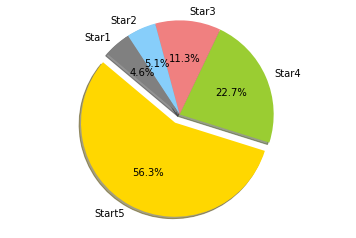

'   \n    So, we can have a conclusion that most people think the Amazon Instant Video is a great product.\n    But, in business pespectives, they need to work hard on figuring out how to satisfy the customer who are not a fan of Amazon Instant Video\n    \n\n'

In [5]:

#########################
#  Your code goes here  #
#########################

"""  
     We need to use values_count to answer this question
"""
overall = df['overall'].value_counts()
# now, we need to create a pie chart
overall1 = np.array(overall)

labels = 'Start5', 'Star4', 'Star3', 'Star2','Star1'
sizes = overall1
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "grey"]
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


"""   
    So, we can have a conclusion that most people think the Amazon Instant Video is a great product.
    But, in business pespectives, they need to work hard on figuring out how to satisfy the customer who are not a fan of Amazon Instant Video
    

"""

### Q3. Draw histograms of review text lengths by class label (15 pts).
+ add a column to show the length of each review
+ add a column of labels 
    - if overall $\geq$ 4, label='F' (Favorable)
    - If overalll < 4, label='U' (Unfavorable)
+ apply **[top-coding](https://en.wikipedia.org/wiki/Top-coded)** to review length column
    - if legnth $\geq$ 3000, clip the value to 3000 (i.e., upper-bound it)
    - if length < 3000, use the value as it is.

In [6]:
#########################
#  Your code goes here  #
#########################

# First Part:
review_length = [] 
for i in range(len(df['reviewText'])):
    review_length.append(len(df['reviewText'][i].encode()))
# Inserting a new column into the existing dataframe is simply do the following code
df['reviewText_length'] = review_length

# Second Part: Pay Attention to the Detail
Fav_unFav = []
for a in range(len(df['overall'])):
    if df['overall'][a] >= 4:
        Fav_unFav.append('F')
    elif df['overall'][a] < 4:
        Fav_unFav.append('U')
    
df['Fav_unFav'] = Fav_unFav

# Third Part:  
for x in range(len(df['reviewText'])):
    if df.loc[x,'reviewText_length'] >= 3000:
        df.loc[x,'reviewText_length'] = 3000

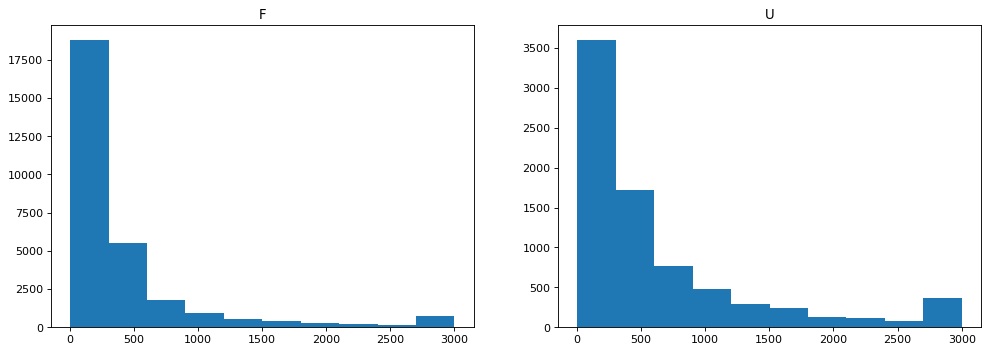

'\n    What does the chart mean?\n    1. In the favoriable and unfavoriable, most people will leave 0-500 review length. \n   \n\n'

In [7]:
# Here is the data preparation
dic = {
    'length':df['reviewText_length'],
    'F_U':df['Fav_unFav']
}
dic1 = pd.DataFrame(dic)
# In this step, we need to subsetting data
dic_U = []
dic_U_length = []
dic_F = []
dic_F_length = []

for a in range(len(dic1)):
    if dic1["F_U"][a] == 'U':
        dic_U.append(dic1["F_U"][a])
        dic_U_length.append(dic1["length"][a])
    elif dic1["F_U"][a] == 'F':
        dic_F.append(dic1["F_U"][a])
        dic_F_length.append(dic1["length"][a])
        
dic_U = pd.DataFrame(dic_U)
dic_U['length'] = dic_U_length
dic_U.columns = ['F_U','length']

dic_F = pd.DataFrame(dic_F)
dic_F['length'] = dic_F_length
dic_F.columns = ['F_U','length']

# Creating the histogram
plt.figure(num=None, figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(dic_F["length"])
plt.title("F")

plt.subplot(1, 2, 2)
plt.hist(dic_U["length"])
plt.title("U")
plt.show()


"""
    What does the chart mean?
    1. In the favoriable and unfavoriable, most people will leave 0-500 review length. 
   

"""

As you can see from the above figure, both favorable and unfavorable reviews have similar distributions in terms of the length.

The *helpful* attribute represents the fraction of users who found the review helpful, e.g., 2/3. Let's see how the distribution of this helpfulness variable changes by the class label (F or U).

### Q4. Draw a boxplot showing the distribution of helpfulness by class label (10 pts).

In [8]:
#########################
#  Your code goes here  #
#########################
" Do it later"



' Do it later'

- Draw the boxplot (5 pts).
- Provide your interpretation on the above plot (5 pts).

## Part 3. Feature Extraction (Bag-of-Words)

Before extracting features, for simplicity, let's drop the columns we will not be using.

In [9]:
# remove all the columns except reviewText and overall
df.drop('asin', axis=1, inplace=True)
df.drop('helpful', axis=1, inplace=True)
df.drop('reviewTime', axis=1, inplace=True)
df.drop('reviewerID', axis=1, inplace=True)
df.drop('reviewerName', axis=1, inplace=True)
df.drop('summary', axis=1, inplace=True)
df.drop('unixReviewTime', axis=1, inplace=True)

For supervised learning, we need class labels $Y$.
To get started, let's generate the label $Y_i$ for the $i^{\mathrm{th}}$ review as follows:
$$
Y_i = \begin{cases}
0 & \mbox{if overall < 4} \\
1 & \mbox{if overall $\geq$ 4}
\end{cases}
$$

In [10]:
"""   
    supervised learning is trying to find the trend from the existing data 
    In this situation, we want to label our data differently
"""

# creating a label for each review in the dataset
df.loc[df['overall'] >= 4, 'label'] = 1
df.loc[df['overall'] < 4, 'label'] = 0
df.head()

overall                                         reviewText  \
0        2  I had big expectations because I love English ...   
1        5  I highly recommend this series. It is a must f...   
2        1  This one is a real snoozer. Don't believe anyt...   
3        4  Mysteries are interesting.  The tension betwee...   
4        5  This show always is excellent, as far as briti...   

   reviewText_length Fav_unFav  label  
0                159         U    0.0  
1                186         F    1.0  
2                134         U    0.0  
3                141         F    1.0  
4               1300         F    1.0

Recall that in the bag-of-words representation each document (review) $d_i$ is expressed as a feature vector of length $|V|$, where $V$ is the vocabulary. That is, the $i^{\text{th}}$ document $d_i$ is represented by
$$ d_i = (f_{i1}, f_{i2}, \ldots, f_{i|V|}),$$
where $f_{i1}$ corresponds to the frequency of $i^{\text{th}}$ word in $d_i$.
We can __convert each review in your data to a feature vectors__ using scikit-learn's [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).   In `CountVectorizer`, you have an option to specify the vocabulary you would like to use for composing your feature vectors. If this is not specified, by default the `CountVectorizer` builds the vocabulary by including **all words** in the collection of documents. Let's try and see how many words there are.



In [11]:
"""
    In each documents, we have features we need to consider for processing the review.
    V is the vocabulary 
    
"""

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit_transform(df['reviewText'])

vocab = count_vect.vocabulary_

print "The size of vocabulary V is {0}.".format(len(vocab))
# this means we have around 54045 features we could consider to process our documents.

The size of vocabulary V is 54045.


This means that we need a vector of length <font color="red">**54,045**</font> to just represent a document (or a review) if we use **all words** in the dataset as our vocabulary. This is too many features, and let's try to reduce the size by removing irrelevant words from the vocabulary.

### Removing the stop words

To remove the stop words, we will use the **natural language toolkit (NLTK)**. See [here](http://www.nltk.org) for details. There is a pre-defined list of stop words for english. You can load it using the following code. You may need to download the resource that contains the pre-defined stop words.

```python
import nltk

nltk.download()
```
This will pop up a new window in which you can choose which collection to install.

In [12]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print stop_words

# As you can see, here is the list of words you could use. 

set([u'all', u'just', u"don't", u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'don', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u"should've", u"haven't", u'do', u'them', u'his', u'very', u"you've", u'they', u'not', u'during', u'now', u'him', u'nor', u"wasn't", u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u"won't", u'where', u"mustn't", u"isn't", u'few', u'because', u"you'd", u'doing', u'some', u'hasn', u"hasn't", u'are', u'our', u'ourselves', u'out', u'what', u'for', u"needn't", u'below', u're', u'does', u"shouldn't", u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u"mightn't", u"doesn't", u'were', u'here', u'shouldn', u'hers', u"aren't", u'by', u'on', u'about', u'couldn', u'of', u"wouldn't", u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u"hadn't", u'mightn', u"couldn't", u'wasn', u'your', u"you're", u'from', u'her', u'their', u'aren', u"it's",

### Q5. Do the following pre-processings (30 pts).
- **Lowercase** the review texts (notice that all the stop words in NLTK's list is in lowercase)
- Using the set of stop words defined in NLTK, filter out all the **stop words** in our review data. 
- Also, remove all words whose length is smaller than 3. See [here](https://pythonprogramming.net/stop-words-nltk-tutorial/) for how to remove stop words using nltk.
- Apply the **Porter stemming** algorithm (See [here](https://pythonprogramming.net/stemming-nltk-tutorial/) for an example)

In [15]:
###############################################
#    Your code for pre-processing goes here   #
###############################################

"""
    Before you get started, you need to fully understand the question 
    part1: lowercase the review texts
           how? The current dataset is df 
    part2: use the stop words defined in NTLK to filter out all the stop words, how?
    part3: remove al the words whose length is smaller than 3.
    part4: porter stemming algorithm
           
"""
#from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer


def filter_words(review):
    """
    Return a pre-processed review string
    
    Parameters:
    ------------
    review: (original) review text, string
    
    Returns:
    -------------
    fitered: a filtered string
    """
    #########################
    #  Your code goes here  #
    #########################
  
    return filtered

df['reviewText_filtered'] = df['reviewText'].apply(filter_words)

df.head()

NameError: global name 'filtered' is not defined

In [13]:
#part1: lowercase the review texts
df['reviewText'].str.lower()

0        i had big expectations because i love english ...
1        i highly recommend this series. it is a must f...
2        this one is a real snoozer. don't believe anyt...
3        mysteries are interesting.  the tension betwee...
4        this show always is excellent, as far as briti...
5        i discovered this series quite by accident. ha...
6        it beats watching a blank screen. however, i j...
7        there are many episodes in this series, so i p...
8        this is the best of the best comedy stand-up. ...
9        not bad.  didn't know any of the comedians but...
10       funny, interesting, a great way to pass time. ...
11       i love the variety of comics.  great for dinne...
12       comedy is a matter of taste. this guy was a li...
13       if this had to do with dat phan, he was hilari...
14       watched it for kevin hart and only kevin hart!...
15       he's ok. his humor consists mainly of varying ...
16       some comedians are very good, some not so good.

In [ ]:
#part2: use the stop words defined in NTLK to filter out all the stop words. 
# first, we need to tokenize our originial sentence
# Let's try the small dataset first to see how it goes
from nltk.tokenize import word_tokenize
from nltk.tokenize.moses import MosesDetokenizer
detokenizer = MosesDetokenizer()
filtered_sentence = []
for n in range(len(df['reviewText'])): #len(df['reviewText'])
    word_tokens = word_tokenize(df['reviewText'][n])
    filtered_sentence = [w for w in word_tokens if not w in stop_words] # this could faster.But It still requires a lot of processing time. 
    df.loc[n,'reviewText'] = detokenizer.detokenize(filtered_sentence, return_str=True)
    print df['reviewText'][n]
    #It seems like the solution takes too much computing power. You need to find another solution   

I big expectations I love English TV, particular Investigative detective stuff guy really boring. It n't appeal.
I highly recommend series. It must anyone yearning watch ``grown ''television. Complex characters plots keep one totally involved. Thank Amazin Prime.
This one real snoozer. Do n't believe anything read hear,'s awful. I idea title means. Neither.
Mysteries interesting. The tension Robson tall blond good always believable. She often seemed uncomfortable.
This show always excellent, far british crime mystery showsgoes one best ever made. The stories well done acting top notch interesting twists realistic brutal storylines. This show pulls punches enters twisted minds criminals profiler psychiatrist helps northern english city police force. The show looks like shot Manchester called another name show. One episode disc excellent'prayer bone ''seperate disc. Still crime shows n't get much better one either side ocean. It's great show never less well made episode. Unfortunately li

Overacted occasionally funny top sitcom friends running bar involve getting caught silly scheme, one character trying convince others selfish immature acting, broke, getting drunk, getting laid. Perhaps story ideas got funnier season 2 ``Portlandia. ''This show definitely geared towards viewers 20's.
I wish I part cast. This funniest stuff ever. YOU MUST GET THIS IF YOU ARE A DIE HARD & # 34; SUNNY & # 34; FAN!
Who says sitcom dead? Not since Arrested Development sitcom truly hysterical quick paced n't know expect next. It's Always Sunny Philadelphia, originally premiering FX network 2005, revolves around four friends: Charlie ( Charlie Day), Mac ( Rob McElhenney), Dennis ( Glenn Howerton), sister Dee ( Kaitlin Olson); run Irish bar downtown Philadelphia. They get kinds crazy hijinks misunderstandings plain bad judgement, ranging mistaken gay bar Charlie lying cancer. Yes,'s nothing really wholly original show's premise, remains hysterically funny throughout. The second season show fin

I loved season 24. I loved almost everything, even death scenes. I felt like nobody safe, anybody could die! I especially loved episode everyone trapped C.T.U. nerve gas everywhere. I also loved surprise ending Jack taken hostage Chinese still Jack season 4. I highly recommend season fans 24. And I saw season six trailer. I've watched three times I ca n't wait.
I watching season 24 Amazon Prime Video thoroughly enjoy season. The twists turns story amazing, plus shows give mystery, action, love, betrayal, much. It take time get entire season ARE twenty-four 45 minute episodes. But whatever time devote series well worth.
I'm fan I say. I watched seasons 1-5. 5 one favorites, Jack seems going rogue, president despicable character. The various sub plots verge repulsive writers reel least end Jack Bauer justice. This season watch.
By I've gotten 24 pretty deep. I like intensity real time format. I really enjoy watching Jack save world.
I enjoyed nearly seasons 24 probably third year I watch

I used watch kid. We could get atmospheric conditions right tv antenna turned right direction get one station played 10pm. They would show double feature Dark Shadows. It fascinating see much changed treat tv made.
They've come long way since original Dr. Who. I still like latest versions. If Dr. Who fan, episodes give taste origins... OK, corny.
Same review season 5. Too old, short nostalgia real reason watch. Give episode 5 min future reference.
This great example & # 34; Dr stuck ancient earth & # 34; theme shows decades follow. Other time travel much science fiction. It interesting see Dr interacting & # 34; crew & # 34; like captain ship rather active character becomes time. Probably interesting thing episode shows cultural mores 1960s. If enjoy ancient TV gem. If expecting anything like modern Dr probably want skip ahead couple decades.
I always heard read Doctor Who's & # 34; early years & # 34;, never watched. What pleasant surprise. This enterprise winner since beginning. I've

Really? ever met kid n't like watching show whether joe steve past?
Blue's Clues around well decade, 90's gem still shines contemporary times content rivals children's programming today. Educational level attractive wide range ages, Blue's Clues staple educational / enjoyable children's shows.
Granddaughter, age 5, ca n't get enough Blues Clues Season 1. I must say tho viewed later seasons changed Steve's role another guy, n't like. So watches seasons original Steve.
So glad Blues Clues Amazon Prime!! My kids love:) Thank much Amazon! Just wish y'all shows, like Little House On The Prairie, os seasons Dr. Quinn Medicine Woman.
I love program. The kids get involved entire show. I really chuckle little ones really think interactive.
My 3-year-old son likes Blue. His attention span still pretty short, n't usually make entire episode. But, repeats & # 34; clue! clue! & # 34; often throughout day.
Good, clean, moral show. Teaches lot wasting time watching useless junk. Good kids fun adults


This season seemed artsy predilctions actors producers. The battle Ori became convoluted resolved satisfaction bad guys getting butts kicked good guys. I liked first 9 would watch. I would n't watch season 10.
This series always dependable. It always resolved satisfactorily. The characters sensible, disciplined, willing fun.
What morose way end fun series. I always said ever began taking show seriously, would come bad end, I right. It's like,'re ending season sense humor. In fact,'re gon na Asgard letting commit mass suicide're going spring Greek tragedy poor T'ealc. This show succeeded sense humor ( else watch show everyone within three galaxies speak 21st century English? Duh!). Now fades oblivion without sense fulfillment. What shame. Maybe's season going $29! I'd rather buy two copies Season 1! How I pick zero stars?
If've never seen franchise get movie starring Kurt Russell first.Then get 10 seasons ( boxed set 10) .Nuff said!!!
SG1 everything show, intelligent, funny, attractive-

The dated soundtrack hurts otherwise OK 70s crime drama. All suspense scenes marred hokey Dave Grusin score, sounds like dippy 1960s TV show. Some dialogue spoken quickly mumbled I found hard make. Some made bit much Boston accents. I'm Massachusetts. Mitchum's accent n't bad,'s fully real. His performance small-time crook-turned-rat fears going back jail fine,'s Oscar winner. I like depiction early 70s Boston suburbs, replete many horrible vintage 60s 70s Detroit autos period. Seeing made shudder. This based probably George Higgins' best crime novel. I've never read. Do n't expect today's production values film. Everything moves lot slowly, many shots needed tighter editing.
I pleased find Criterion's pre-release list, surprised -'s sort little-known cinematic gem Criterion wonders. In fact, I've looking copy time, first seen Eddie Coyle years years ago, memory film's stark realism mood etched mind like others. This definitive 70's Noir title fully worthy pull-out-all-the-stops releas

Phenomenal set writers seem know keep series action packed characters audience enjoy watching. Strongly recommended SCI-FI junkies world.
I love anything Stargate!!!!! One scifi series left tv... ..sad: (
Season 3 exciting suspenseful season 1 2 even though I've watched series. Truly great Sci-Fi!
The story lines acting superb Season Three Stargate Atlantis. The best thing series varying episodes emotions humor ( Tao Rodney & Irresistible) sadness ( Sateda & Sunday). I really feel actors comfortable characters willing explore. As always, I love extras. The behind scenes commentaries always good. This definately worth purchase.
I love series. This third fourth time. The characters John Shepherd, Tayla, Dr Weir, Ronan Dr. Becket Dr McKay unforgettable. It wonderful space fantasy. Whenever I want escape another world I go Stargate Atlantis. I imagine cool would travel worlds stargate/wormhole meet people course speak language, English. The SG-1 series good beginning Stargate series. In be

This addictive show. Suspense leaves wanting fast forward next week find going happen next.
More fun behind bars, okay run, oops hope n't spoil!!
This good second season. Granted Prison anymore. They broke run prisoners. Added new people mix fit well. This show lot good action, drama story.Has lot intense scences well surprises. The bond brothers done well. The man steals Show Agent Kellerman. A good series.
This first try rent series, unknown actors. Bice relationships characters
From beginning end season 2 Michael Scofield ( Wentworth Miller) brother Lincoln Burrows ( Dominic Purcell) run police government agents want dead. The convicts lives line well since ordered killed. They also want Dr. Sara Tancredi ( Sarah Wayne Callies) dead anyone else tried help Scofield brother. To show guys n't messing around, season 1 regular Veronica ( Robin Tunney) killed violenty end first episode season.William Fichtner plays Agent Alexander Mahone think wants catch later turns ordered kill. Plus's 

Again I really Love show people great story keeps wanting week...
Whiel first season Bones slightly imperfect, partly due real geekiness actors, pleasure watch. Fortunately Season two craetors managed make even better series. Boreanaz 'stigma played Angel Buffy franchise completely gone identify agent Booth completely. Bones social ineptitude also put clear display time. These two main things mange make chemistry even stronger last season.
The show fast paced bit thin story still fun better many network shows. Bones based forensic science unit Smithsonian Institution. The show always murder show solve forensically relationship workers seem work 24/7 adds spice. The stories Grave Digger Brennan's father favorite.
Fortunately, second season BONES mantains high standards achieved int first season.The chemistry Bones Booth improves. Also, additon new female head chief ( Cam) Jeffersonian team clever idea worked nicely. This, adding intriguing plots, superb support roles Ryan O'Neil Stephen

Science fiction one favorite themes. It smaltzy realistic, n't matter long plots moving forward realistically acting decent. More often, Sci Fi n't developed varied plots,, industry imaginative writers, ok. I prefer real science fiction, blurred fantasy mythical beasts vampires, end moving imagination back reality snuffing momentum plot advancement.My suggestions: keep real emotional responses, n't overdo fake shooting scenes, devise unique ways solve problems ( McGiverish), grow characters relationships. There nothing wrong good & # 34; McGuffin & # 34; .If series develop time, I'll faithful watcher. If, episode less enough.
Invasion Earth slow moving Sci-Fi really try hard get first episodes. I would recommend series.
The show done 1990's, looks older. I n't relate characters I n't like gross alien testing. I like invasion stories characters I care watch grow.
Well, I think series would great mystery science theater review. I like campy quality series die hard scifi fans probably wo 

This season on-going story linesGibbs could allowed retire first couple shows bring back active duty.This season several strong individual episodes.Witch Hunt famous Abby Marylyn Monroe Halloween.The episodes Once Hero, Driven, Dead Man Walking Smoked excellent stand-alone stories.Twisted Sister Friends & Loves present McGee new light major steps characters development.Their number story lines, major fun, season.Special Agent Lee Jimmy several encounters less appropriate places lending comic relief.The publication McGee's first book team members upset portrayal.The decision retire creates problems Gibbs; Tony became team leader involved special projects director. These ongoing stories season problems ``resolved ''.Tony falls love.Director Sheppard establishes authority hate arms dealer known`` La Grenouille'' .The producers call ``season secrets ''season five`` season answers''.
I n't television, n't 11 years. When I learned CBS allowing free viewing internet I checked started watching

C.S.I. Crime Scene Investigation - The Complete Seventh Season DvdQuick Delivery! New Condition. Excellent series.HIghly recommend Amazon!!
Am enjoying entire series - get characters, want. Came quickly great shape.
This, way, second review I've written - n't know first one. Having said... Each season I keep saying thing, - show keeps getting better better. I feel show always manages stay fresh interesting I love new season. I ca n't wait release.The first episode season Built To Kill waiting see found last episode season 6 - Grisolm Sara gotten together. My favourite episode Happenstance identical twins seperately killed team try work whether case related. If want total recap episode goes: Built To Kill 1 - Foul play suspected apparent suicide victim still gun hand, flower delivery woman found crushed death middle Cirque du Soleil performance. ( Look special appearance John Mayer.Built To Kill 2 - Grisolm investigates murder rock star, complicated discovery miniature replica crime sce

I bought computer... I love ingenuity men children went. This great inspirational story survival continuity life, good life, healthy life. The actors expression quite believable I say well done. Thanks Amazon.
This re-packaging Original Series Season 1 box set. It includes first two discs first 16 episodes.Only n't want buy entire first season! Disc 11. The Galaxy Being2. The Hundred Days Of The Dragon3. The Architects Of Fear4. The Man With The Power5. The Sixth Finger6. The Man Who Was Never Born7. O.B.I.T.8. The Human FactorDisc 29. The Corpus Earthling10. Nightmare11. It Crawled Out Of The Woodwork12. The Borderland13. Tourist Attraction14. The Zanti Misfits15. The Mice16. Controlled ExperimentFive Stars first season original series great!
This intoroduction sci-fi I 2nd grade. Certain episodes vivid etched permanently memory. Upon watching, I see also emotionally appealing surprisingly sophisticated, science lack ``feel good ''deus ex machina endings mar many otherwise excellent S

Dexter Morgan good day job, blood spatter analyst Miami PD's forensics unit. But's bloody brilliant job, one gets murder. Whatever effed sitch caused Dexter's amnesia regarding early childhood,'s left dead inside, empty shell, calculating cold fish. He co-exists something calls ``Dark Passenger, ''essentially urge compels kill kill. Recognizing predatory beast inside Dex, ex-cop foster father, Harry ( James Remar), took boy wing, reoriented twisted appetites productive cause. He instilled Dex elaborate code ethics, taught target serial killers. He taught Dexter get caught, blend. Dads awesome. And Dexter steadfastly abided Code Harry. His kills righteous kills.This Showtime adaptation based Jeff Lindsay's riveting series books, n't read, well,'s hold? Dexter Morgan emotionally detached makes Dr. Temperance Brennan seem positively warm cuddly. Social cues effortlessly respond baffling puzzles. Perversely, something innately likable Dexter. Michael C. Hall plays stunning complexity. It h

This absolutely one original series around. No surprise Dexter first appeared book form ( see link). If someone told I would riveted book written viewpoint serial killer, well... I would never believe. But Dexter almost... loveable certain morality, believe not.The series different I found equally intriguing quirky.Here's real irony series: someone far normal human traits, really n't understand love sexual attraction, reveal insights means human way stereotypical series n't. It similar way dark parts paintings illuminate light, complimenting. Dexter dark n't simplistic wry sense humor.I pleased attracted books managed get screen well, including Dexter's unique humor certain presence resonates page film. That pleased. What amazing series actually reverberated emotionally touched life ways I never believed possible, considering focus series.This could flop. It brave move put something like air I feared ( I saw first episode) depth complexity Dexter, hiding beneath slick, seemingly inhuma

I bought dvd 5 seasons recommendation back doctor. So, far first episode dry dull. The second episode picked nicely. I fifth episode still unsure show. At times,'s series psychotic serial killer morals. Other times,'s man feelings shows emotions like anger, frustration fear. Oh,'s relationship main character damaged girlfriend. Who feels damaged. Now, I hope considered spoilers, central focus series seems. There things going series, past relationship foster father, relationship foster sister, relationship coworkers etc. At time, I see character developing interesting bizarre person. And course series follow suit. We hope. After, I 6 seasons watch. Can I recommend series, sort. I quite certain everyone. It's growing though. So, I gave three stars. Perhaps I give four, time tell.Ralph J. Fitcher.
One best seasons Dexter besides 4 7 opinion. With great villain awesome story perfect start everyone's new favorite serial killer.
I guess biggest complaint DEXTER n't nasty ENOUGH. The premise 

I watched six seasons I finish series. Every episode keeps edge seat. The roller coaster ride never ending I going miss series I finish. I wish something take's place. Michael Chiklis rest cast step story grab shirt never let go.
This series one classics time. The characters unforgettable painted broad strokes good evil many shades. The themes examine human condition many levels times makes head spin, particularly compare todays events. What show!!!!
Good writing acting make show engaging season season. At end wonder could possibly go next, yet writing team always pulls.
I loved show. I never heard recently I'm glad I started watching. Addicting.
A great series season turned everything upside. Mackey crew fire Forrest Whitaker get bring. This one emotional shocking seasons ever great show. A must buy series love cop dramas. This best cop show. It dark pulls punches. Once watch want see. Show hooked.
Season five sees strike team investigation yet. You know writing good want anything tak

OK, episodes season little much. The social/political satire still strong ever episodes stretching make points. Instead absurdly funny clever, episodes absurd go way say, ``Look, look shocking I ''(`` The Return Chef,'' ``Smug Alert!, ''`` A Million Little Fibers,'' ``Stanley's Cup ''). Still, season offers I believe greatest SP episode all-time maybe best thing I ever seen television:`` Make Love Not Warcraft.'' This episode well-done animation ( yes, excellent SP animation) story-writing I praise enough. Plus, includes music one favorite singers ever: Paul Stanley! Then excellent two-parters Cartman goes future ( Mrs. Garrison scholar guy hilarious!) ``Cartoon Wars ''SP takes Family Guy references animated shows.`` Miss Teacher Bangs A Boy'' takes female teacher/boy student love affair controversy level SP. The positives outweight negatives's perfect, I ca n't give 5 stars matter much I love World Warcraft episode. The cover box ( Target edition) awesome. You see SP boys fat pimply, 

Auschwitz: Inside Nazi State makes compelling viewing. It divided 6 chapters. The first chapter titled ``Surprising Beginnings ''basically introduces us origins Auschwitz initially designated extermination camp Jews, basically house Polish political prisoners later Russian POWs. In fact, first gassing experiments camp targeted Russian POWs.In second chapter`` Orders Initiatives'', learn plans Hitler, Himmler Reinhard Heydrich kill Jews massive scale. Auschwitz prepped purpose construction gas chambers use Zyklon B, form poisonous gas initially used exterminate vermin disinfecting agent. We also learn Lodz Ghetto infamous Jewish leader, Rumkowski seemed controversial character oppressing people, though spared death, end. The crude initial gas chambers Auschwitz also shown, reconstructions.In third chapter ``Factories Death '', documentary explores systematic annihilation Jews put full operation, stretching Europe Auschwitz center extermination. The French authorities also portrayed comp

I liked seasons 24 fast moving action, never bored, always something happening. I would recommend anyone like action movies.
How even come stuff beyond! This show great even awesome included Amazon Prime! Thanks Amazon!
OK, one kind top. Jack Bauer comes back Chinese captivity broken man. Then confronted series terrorist attacks culminating explosion atomic bomb. The show also turned somehow gruesome since early see Jack bite neck kill one captors ( Jack vampire?) eventually kill one friends torture brother. His father also turns enemy. And get know pretty early series. While performance Jack Bauer burned-out particularly well done time distracting show suffers lack motivation. There also unnecessary emphasis multitude subplots tend cause headache contribute storyline. That said bad, simply good season 5. As reviewers noted, loss many central characters also weakened interest series.
I gave rating many reasons, good season watch keeps viewer interested.
In time since Jack Bauer ( Kiefe

This review one slight spoiler terms brothers hunt single episode...'ve warnedThis season Supernatural gives us dose comedy many probably would n't expect show ``scary ''. But scary ramps. Everything escalates. The plot Season One extended greatly Sam tries track others'like '. We get great guest stars ( Katharine Isabelle Ginger Snaps films; Linda Blair.... LINDA BLAIR! Exorcist) witness come back one becomes fan favourite: Jim Beaver's Bobby Singer. We also see became fan favourite episodes'Heart' ( werewolf alert),'What What Should Never Be '( djinns), & lt; SPOLIERS > -- -- -'Tall Tales' ( Trickster, la Coyote, Anansi, Loki, etc) & lt; /SPOILERS) > .Religion comes head, easy see going intrinsic future episodes. Hindu Muslin faith enters center stage, well, given much reverence Catholic Christian dogma. Perhaps greatest achievement season writers merge'monster week 'theme making monster hunts allusion metaplot even fuel on-going episodes. So head's: show quickly veering theological 

Special Features: ``The Devil's Roadmap '',`` Webisodes'', three commentary tracks, gag reel, deleted/unaired scenesThere witchcraft involved success ``Supernatural ''. The show benefited top notch writing, direction performances right dash quirky humor offset horror elements show. The second season show picks right first ended. Dean ( Jensen Ackles) Sam ( Jared Padalecki) located dad ( Jeffrey Dean Morgan) fabled gun fashioned kill demons possession. The trio confront Demon killed Dean Sam's mom find leaping person person finally possessing father almost forcing boys kill. Driving Demon father trio escape gun believing still track creature, find harvested children special psychic abilities plans using`` war'' humanity. Then truck hits Dean's 1967 Impala. Sam injured alive Dean cusp death internal injuries. John makes deal Devil, case, Demon pursuing -- take life Dean's. Before dies John whispers something Dean resonate throughout rest second season.We get three commentary tracks ``In 

Could n't think thing. It bad show ended 3 seasons. Just watched VM Movie. It enough tie loose ends, opened new mysteries I suspect remain... mysteries. The last episode really depressing. Keith's roll especially sad. Always bridesmaid; never bride wearing bit thin.That said; I loved anyway. Logan Veronica - epic saga, spanning vast continents... paraphrase LoVe. If n't watched series sweet, sad, cleaver, romantic, mysterious wonderful. Yep, I'm hooked got hubby watch 3 seasons movie. We grand kids, fun ages. Ah, young. Not! Just kidding. Watching VM made remember I glad graduate HS never looked back. It painful teenager series reminder ( fictional though) vulnerable risk. Food thought.
Wait, Veronica freshman imaginary U! Not fan original Veronica Mars series, I found one hard swallow even harder engage. Maybe old fanboys girls enjoy seeing favorite characters & # 34; aged & # 34; new series, newcomer I found little like engage.
nothing really special... rather etertaining... ..wouldn

With high school completely behind, Veronica Mars ( Kristen Bell) heads college. In spite best efforts,'s stuck Neptune, attending Hearst College living home dad, Keith ( Enrico Colantoni). As result,'s really surprise mystery danger find again.Veronica's well earn reputation person solve unsolvable gets involved one case another. Who behind ``Welcome Wagon ''steals new student's stuff? Who would kidnap monkey? And missing member board trustees? Unlike previous seasons, two bigger mysteries. The first involves serial rapist Hearst campus. And second one begins college dean Cyrus O'Dell ( Ed Begley, Jr.) found dead office.And ca n't leave personal life. Her relationship Logan ( Jason Dohring) creates problems, especially since friend Wallace's ( Percy Daggs III) new roommate Piz ( Chris Lowell) also interested. With going, ever time study? Unfortunately, final season show I fell love right away. The mysteries sharp, requiring concentration follow every week. Yet clues. Veronica sharp se

I've watched 3 seasons, one best series I've seen lately. It's bad ended 2007. I'm curious ended, somehow networks always end good series replace something flops weeks.Enjoyed highly recommend.
Lots chew enjoy whether already familiar characters. Nice flow plotline. I enjoyed much. The writer made mother's addictive personality unavoidable inheritance Veronica's. Will heroine embrace trait weakness always fall prey find way make strength? This consistent psychological thread deepened murder mystery gave audience super meaningful connection Veronica Mars. All characters childhood grappling question: extent unable throw genetic proclivities childhood traumas cultural influences order walk path life?
I grandmother. I really loved TV series watched third time Amazon prepare movie. I pleased many cast members returned movie. I think liked series also. Why fine series disappear view? I n't get. What big marathon trying say girls sex 14! Well bull. Watching Veronica Mars, made virginity serio

If still fan awesome series wait. Your fix Veronica Mars satisfied actors reprise roles give chills made giddy. The fans spoke acted donating Kickstarter make film reality I simply say... THANK YOU!!! I definitely want another movie!!!!
Not bad. Slightly campy geared toward teenagers. A good jokes father daughter. I would probably watch another Veronica Mars movie home ( I would n't rush theater). High school reunion scene reminds I attend...... .funny.
I hope continue make. The pace acting great, I also love plot lines. They n't usual cookie cutter stories hollywood turns, actually depth, characters also depth. Clearly fans love put money make. Maybe smart producer/director/studio see wisdom developing stories Amazon. This first time I've heard film made order fans, I hope's last.
This would great TV Movie. My wife loved. My Kids grandkids want see. The problem 5 offensive words, hand gestures genital cartoons movie. Of course I believe kids see worse school. I n't want one give watch

Once TV Types get WRONG Lying Lying LYING.... whole premise person becoming better TANKS... watch rest internet free.... n't support writers...
This favorite show. I find inspirational moving along funny. Thank allowing watch site.
There good actors good writing concept get much air time- consequences actions.
The second season gets little far away Earl's list onto unrelated adventures still lot fun.
Here list special features set I took staticmultimedia.com: ''Disc Oneo Very Bad Thingso Jump For Joyo Sticks & Stoneso Commentary Creator/Executive Producer Greg Garcia, Writer/Producer Danielle Sanchez-Witzel, Actor/Producer Jason Lee, Actors Ethan Suplee Giovanni Ribisio Larceny Of A Kitty Cato Commentary Creator/Executive Producer Greg Garcia, Writer/Executive Story Editor Hilary Winston, Producer/Actor Jason Lee, Actors Ethan Suplee Amy Sedariso Van Hickeyo Commentary Creator/Executive Producer Greg Garcia, Producer/Actor Jason Lee, Actors Ethan Suplee Giovanni Ribisio Made A Lady Thi

Ok,'s thing show..everyone excellent..I meaneveryone..the story line fine writing good set up.I love parents always show falls short evergetting least little bit close could be..I n't know whyit's disappointment is..it's got gold reasonit's cast lead. Bummer man, I would really like watchthese people..and believe I tried.
What great concept series. Eddie Minnie marvelous together true chemistry.The plot well written story archs delightful watch unfold.Like character traits, wo n't able watch one time.
Not really comedy, sometimes stressful, sometimes insightful. Ends question mark, probably due writers' strike.
Of show I've watches lately, I must say best show today. I'm glad I've copy, I always watch.
When I young man running first rig Oil Fields Kern county California, trouble jobs faster crews I worked. One day man trained pulled aside said ``You n't get... They n't want good operators, want good liars ''.In wonderfully written acted series, Minnie Driver Eddie Izzard test theory, w

This programme surprised veryy funny lots ways. By trying offending gross possible, Sarah Silverman actually achieves opposite: bores us death times. There great lack consistency writing makes difficult watch episode entirety.
I n't know anything Sarah famous Jimmy Kimmel song ``Matt Damon ''&`` Ben Afflect'', small interview ``The Artistocrats ''made think may actually hilarious female comic n't jokes much better woman man... seeing show DVD low price, I figured would look see could make laugh... yes! The show like Seinfeld way's nothing, I never like Seinfeld never, Sarah Silverman Program I watching many years come. It stars Sarah sister, live place, 2 gay neighbors, dog, coffee shop, people call phone, likes cookies parents dead. That's, rest funny little story week go around it.I think Sarah's got ta top female comic world today, underated, check show ya want, wise, reading? Go away.
Liking show depends much like Sarah. I think funny gal, I like show. The show full potty humor goo

I like main character.The person seems like, Mother.His ex-girlfriend hates, brother furious, father dissapointed him.Nobody ( actors, seem clear line're supposed) .So far, 7 episodes, first Season, I n't know, anyone either.Is owner general store, stone beetch? Is IRS auditor stone beetch? There much good TV. I time try figure writers show trying get across. In opinion, dart board office, threw darts, see ones stayed.I'm definately, willing watch 18 hours floundering program.
This well-scripted, well-acted series. Every episode suspenseful believable. It's shame series never completed.
This show depicts events could possibly happen although I pray never, ever. It well acted wondering lasted two seasons.
In word, Trite. Nothing new challenging. It's Oxbo Incident rehashed nth power. Very predictabledialogue ideas. Circle wagons. Pull together. Beware n't agree authority figures face ofdisaster. The walls patience came tumbling! FCH
There several places could n't possibly true would rea

I'm big spending lot time fiction. BUT... The wife LOVES drama. Add dystopian view adores. This right alley would watch another three seasons made.
This caught attention first minutes I started watching. I could wait see happens next. I recommend series. I watches seasons hoping third.
I really really like series. At least got chance give closure story line, I ca n't help imagining COULD done several seasons. Fantastic story, great character interaction, intense political intrigue. You enjoy probably wish could gone 2 seasons.
When I first watched pilot, I saw many pretty people nice hair though suffered nuclear attack far away, one suffered soap water much less styling goods. As time went, people complained lack goods never really makes much dent. The lack gasoline, etc. discussed end really n't affect residents much. Besides concerns, I became involved show realism setting n't bother much. Actors meld characters become interesting human. Jericho Kansas place bombs supposed go safety 

Great writing, compelling characters dramatic situation, reasons Jericho compelling serial television. The story centers events fictitious town Jericho, Kansas, nuclear attack. The immediate concern survival, maintaining basic government structure, medical facilities, utilities. As characters defined, past lives secrets disclosed, roles, old new, formed.Exactly happened mystery, things revealed, evident viewers several hidden conspiracies. The situation gets complex, new characters appear, hazy picture new America slowly takes shape.The key figures Jericho, Green, Richmond, Hawkins families. The ensemble cast great overall, Skeet Ulrich's performance wayward son come home, Jake Green superlative, glue holds much story together. Gerald McRaney Johnson Green, mayor Jericho, brings incredible toughness leadership, situation demands. The wild card separates Jericho post holocaust survival tale, Robert Hawkins ( Lennie James), newcomer town engaged something,, deep.The writing often clever 

Love, show, even watching 2nd time. Jon Rhees smoking hot HenryVlll, era costumes awesome.
While accurate stated. It good however see King energy brings character. The customes sites seem well done also. I'm however big fan explicit disregard wife daughter despite Henry's ``caring ''. It might thing time irritated everytime. He room wife, Queen mistress Anne well. He's suddenly love ca n't live without. He wants divorce wife marriage supposedly legal.All sudden one nighters women probably ca n't even remember name put test. His focus running country issues people around, chasing woman ( skeletons closet cemetary). While enjoyed Johnathan Rhys Meyers acting part's likeable guy. I ca n't help hope story picks series.It promise hope Tudors deliver 2nd season. I'd like see Queen, background relevant issues Henry went time.
I forgotten well acted entire series. Watch entire series beginning renew faith acting community. This series far better movies put today.
This production spared expense

As fan period movies, I could miss Season 1 ``The Tudors ''. Henry VIII, King England known man broke Catholic Church become Head Church England marry six women. Such infamy secured place history, fact daughter Anne Boleyn - Queen Elizabeth I, one benevolvent rules time. In case, season 1 four DVDs entertain almost 12 hours. Perfect time watch would holiday season. I suprised series much sex also twists turns historical background Henry's decision-making pick closest advisors court something I wanted understand better. Writers get sloppy towards end series language sophisticated one would expect Court one greatest kings time. I find Jonathan Rhys Meyers excellent role, perhaps young play king married 20 years Queen Catherine. Maria Kennedy play Queen Catherine Aragon, Queen England graceful dignified. Unlike actress Natalie Dormer portraying Anne Boleyn. Ms. Dormer coarse unsophisticated role someone ( like Anne Boleyn) witty enought keep Henry's interest long, speak fluent French Fren

I loved show start. With Prime I able go back review seasons case I missed. Really sorry new seasons.
Just keep series coming. We love n't find 3 made fourth. We fell love hook line sinker. Well acted, well written, well produced ok cat's darn cute. Keep funny make funny ones. Not happy serious ones though's ok n't go often. Secret developed cast plays real people relationships. Works works fans. More. More kitty... .perhaps... .meow....
Love show. Love every character. These seasons great watch fans show.
The premiss show close Prime Suspect. I n't really care good show. I like actors chemistry, even negative chemistry. Definitely worth watching.
I never seen beginning, watching alll 7 seasons real treat!!! Helped pass snowy winters northern Micigan... .thanks Prime Video
Fabulous!! Another great season. THe negative would n't enough episodes!! By time finished watching last episode wonder poor woman survived season!! Ca n't wait next season!
I 7 seasons Closer watch re-watch ( word?)

Although I would call sci-fi buff I truly enjoy show challenges mindset. Years ago ( probably 58 yrs.) comic strip detective-Dick Tracy- wrist watch also camera communication device. I lived long enough see something similar come life. Long first spaceship went orbit Flash Gordon another comic hero circling distant planets spaceship. Sci-Fi many boring I enjoy seeing imagination men/women become reality.
My husband watches likes. I science fiction I n't really like's fast moving
Eureka best show television. I buy season watch whenever I like. The storylines actors first rate.
Funny, different, find ironic. O brain new sheriff hero episode. A little hokey, fun
Eureka gets even better's second season, get fargo character stark character still around. He goes third season presence missed many. The show remained true's premise still, lots crazy science related disasters affecting people usually sheriff Carter's quick thinking get mess form another. Eureka engaging's great place, filled gre

I finished seeing episode Monk gave announcement show coming next, I never seen show decided give try I grateful made choice. The two characters Shawn Spencer ( James Roday) thirty-something son police officer photographic memory taught father remember immaculate minute details, Shawn's best friend down-to-earth responsible Burton'Gus' Guster ( Dul & eacute; Hill) decide misadventure crime helping solve open detective agency ( Actually Shawn's idea). The main gimmick Shawn uses incredible deductive abilities somewhat scam pretending actually psychic solving cases. Whether police believe psychic high solve rate lands position police department resident psychic. The series vastly hilarious seeing scenes two main actors amazing, memorable first season season one episode finale Scary Sherry: Bianca's Toast believe'll laugh insanely seeing antics episode. The show also four main cast show course'll time try keep Shawn Gus. The extras also nice gag reels, commentaries cast producers, deleted

I grab Amazon deal! I started watching Monk ION Channel weekend marathons. The USA network become known's great character driven shows. Monk another one characters immediate love sometimes identify. I love seeing develops show, coming grips wife's murder eventually solving.
MUST HAVE! Doesn get better...... .unfortunately stopped 8 years! Maybe impressive acting long time......
Just catching series. High end production values good story telling. As good sic-fi, human condition much & # 34; aliens. & # 34;
I started watching series I saw reference & # 34; Big Bang Theory & # 34;. Now I hooked. It's surprisingly thoughtful well-written. Watching Prime let's plow episodes quickly. I would highly recommend series Sci-Fi fan.
When I saw remake Battlestar Galactica I memories original show casting heavy doubt story worth time watch. After making first two seasons Prime Instant Video I see I never judge show quality previous one name. Other names cases show carries nothing original sets apart

new & episodes played flaw. fast shipping. great series makes want see next episode. great science fiction fan.
The first two seasons great, ``letdown ''season. Do n't get wrong, season 3 good, compared sea.1 & 2. The first 2 seasons OUTSTANDING science fiction best. Still worth owning dvd library.
Spoiler related wording ( basically going around spoilers, relating specifically stating): This episode amazing. The two part judging Gaius Baltar really good. The revealing 4 Cylons final five amazing; especially find. It blew mind find. Anyway, episode, last one, intriguing element, music, interesting weird. I n't really understand music, probably meaning. The build series really great. This series top 5. I n't know put. It's awesome. To anyone n't seen episode last one yet, n't skip, important amazing episodes. You'll blown away end episode, I assure. Really, I wonder fifth Cylon. That's question probably echo next season. Great season, awesome series far, ca n't wait watch next season.Oh

Firstly, I never seen show. I love science fiction usually movies I find lot sci-fi shows tv low budget poor scripting acting.This show however looks fantastic, n't tell tv series I'd think movie. Aside looking great story looks engaging, exciting plain entertaining. The whole point download get show get updated happened far, well, I feel like I could jump start watching show. **A warning though, plan buying/watching old Battlestar Galactica episodes prior seasons I'd hold watching spoil. **I recommend taking look. And take look free download,'s good. Here: SCI FI: Inside Battlestar Galactica
Very good serial video excellent visual audio. The continuing story fascinating plots reasonable acting great. Hard downgrade production quality.
Warning! The following contains spoilers. If n't seen Season Three want remain spoiler free, read review.Season Three BATTLESTAR GALACTICA debated controversial yet. Much controversy stemmed number hot button political topics addressed. What show would t

As reviews qualty set show. If disagree post review reviews designed help fans n't purchased seen show make decision NOT whether agree disagree ('s comments section). Moving... Every season every TV show episodes n't stand best come after.The show looks good. The extras include podcasts, deleted scenes terrific extended episode one Ronald Moore's favorite episodes ``Unfinished Business ''. There also 2 episode commentary tracks addition podcasts ported web original broadcast. David Eick's video blogs also included well webisodes ( I never got around watching kind cool). I would appreciate behind-the-scenes type specials I like sort stuff. Fans want episodes pretty well served presentation here.This another really good set. I disappointed n't Blu-ray version ( yet) I find unlikely Universal releasing HD-DVD collapse HD-DVD consortium. The show looks better standard definition broadcasts quite sharp high definition. I'm looking forward fourth final season terrific show. I'm also looking 

sleeping time. The show addictive intriguing keeps throughout every episode. Of course Glenn Close playing top notch, take prisoners ruthless attorney defending people swindled pensions savings corrupt boss played Ted Danson. Who also wonderful job role. As new attorney played Rose Byrne starts wide eyed, world wonderful person. But season end many things happen change views. But way life well.An excellent show well written directed first season. There many characters show thing acting well. Well worth buying rent couple episodes first make sure show cup tea. Really looking forward next season Damages without doubt.
This show full villains good guys always keeps guessing. Each night, look forward watching next twist thrown us!
This series phenomenal!!!!! Glenn Close awesome! I ended watching seasons, disappointed show ended!
Boy great series. I sincerely hated ended. Glenn Close fantastic well rest cast.
This nasty pure trash. Humans treat others way. It thoroughly enjoyable. please tr

The cast great perfectly cast. I watched entire 1st season week second season following week.
This supposed legal drama class action lawsuit. But rather lawyers, characters basically gangsters sides case. Glenn Close gives extraordinary performance Rose Byrne better expected, story script really let down.At heart story basically lifted-from-Enron case employees bankrupt company going former CEO. But superficial resemblence whoever wrote script understood little matters.Ted Danson drags whole piece. Since Glenn Close playing evil character, Danson's character played arch-evil. Mustache twirling evil. And Danson delivers astonishly stupid broadly drawn evil character. And probably close Danson imagines every non-Hollywood CEO. Danson goes way make sure possible way sympathy rich Mr. businessman. And thats really way story work given Glenn Close playing gangster.For series law, little ``law ''law done unimaginatively. They never get beyond depositions. They never follow anything like time

There n't eccentric characters make laugh like Denny Crane ``Boston Legal ''cases neatly tied conclusion episode bow.`` Damages'' follows single case follow case beginning bitter end. ``Damages ''begins Ellen Parsons ( Rose Byrne`` 28 Weeks Later'' ``Sunshine '') bloodied battered walking streets New York discovered police. From series takes trip back time six months earlier case Ellen worked new attorney Patricia Hewes ( Glenn Close) & Associates. It's civil case Hewes suing multi-billionaire Arthur Frobisher ( Ted Danson) hollowing company robbing 5000 employees company pension plans process. Having escaped prosecution U.S. Attorney's Office, Frosbisher must defend claims benefited selling stocks company collapsing getting away scot-free. Frobisher course insists innocent much victim losing company cared employees. We see entire case unfold eyes, double dealings, double crosses underhanded attempts Hewes Frobisher's attorney gain upper hand litigation.`` Damages'' compelling, fascina

This show incredible. Finally well-written storyline hooks immediately!! Damian Lewis phenominal job. I liked instantly consistently watched character grows. Life excellent script writing. I really enjoy show hope continues. Life requires viewers actually brain stimulates deep thought!! WONDERFUL! Keep coming!!!!
Life favorite show season.It well acted, well written, fascinating original premise.The show full philosophy, i.e. mans search meaning justice.Add couple beautiful actresses thrown mix, ``Life ''thinking man's perfect show! 03/01/08I rewatched pre stike episodes week... And, I think best drama year one best ever TV. If n't seen show yet, favor start beggining get addicted like.
Prison changes man, certainly changed former LAPD police officer Charlie Crews. From 1995 2007 served hard time murders n't commit. When DNA evidence surfaces proving innocence, Crews released reinstated force ( also lands serious settlement money). Now Detective Crews finds working new partner even cov

New original shows like Chuck, Reaper Pushing Daisies made tv worth watching last season despite writer's strike. Despite bad movies 2007 Chuck title ``Good Luck Chuck, Chuck Larry '', tv show named Chuck success. It's normal guy named Chuck ( Zachary Levi) works Best Buy type store called Buy More. His life changes inadvertently downloads critical government secrets brain. Two agents get assigned protect. One sexy woman instantly big crush named Sarah ( Yvonne Strahovski). As luck would, also gets assigned pose g/f. While pretending though,'s even allowed date anyone else. She's wants anyway ca n't really date either.While under-rated always cool tough guy Adam Baldwin plays agent assigned protect Chuck. Levi, Strahovski Baldwin work well together. It's Joshua Gomez though sometimes steals show Chuck's best friend Morgan's also co-worker. Chuck hard time hiding family friends's working CIA.The show always many twists turns often funny well. It's probably one best comedy/spy shows ever

Riding Band Brothers wave Fame Damian Lewis great. This great show. Loved cast. Fun watch actors work together. This show, like many, given chance NBC. From I heard many care Crews' flakiness part made show unique cop shows. Well worth watch.
Often give new shows warm, episode 4 5 much better pilot. But Life really knocks park first episode n't go downhill. I'm sorry series n't really make, I loved. Charlie Crews fascinating character, complex, striving. I loved'Zen 'theme. The series whole 2 streams - overarching set Charlie killed friends, week week cases excellent.Watch,'ll want watch rest.
good premise plot. actors believable roles. action high paced keeps interested remaining connected.
Great casting.Fascinating lead character gripping plots well interesting background story unfolding..I ca n't wait next episode.
This good series Damien Lewis, & # 34; Homeland & # 34; fame, playing former LAPD police officer, returns force wrongly imprisoned twelve years. He's received millions do

Prison changes man, certainly changed former LAPD police officer Charlie Crews. From 1995 2007 served hard time murders n't commit. When DNA evidence surfaces proving innocence, Crews released reinstated force ( also lands serious settlement money). Now Detective Crews finds working new partner even covertly seeks answers hell happened.LIFE looks promising cop detective show, mysteries dynamite stuff anything. No, viewing addiction lies watching lead actor work craft. Britisher Damian Lewis simply fabulous wounded, brooding protagonist, trying piece life back together. It's fun watching Crews apply askewed perspective cases. I'm normally fan folks sling zen, Lewis makes quirky integral part character. And's loose cannon agenda slinging zen, better. After, zen helped Crews survive penitentiary. I also like little touches remind us Crews still coping new found freedom, whether's habit munching fresh fruit ( never fresh fruit prison) preference light open air fact still n't furniture home

For pilot great. I need see decide really like series I suspect show make's first season.It entertaining interesting definitely worth watch look second episode.
This good show, really moving. It good dunnit anyone watch. Nice show.
Very average. Not interesting times. A lot eye candy gets thrown keep attention plot slowly unfolds.
It's funny, serious, well done. If looking great entertainment need watch series. Season 2 good.
Another Damien Lewis triumph. I've impressed guy since two mini-series The Forsyth Saga Band Brothers. Band Brothers stand-out performance since Brit playing American officer 101st Airborne. Nicely done coming actor. Just needs right launch pad. Life good choice. It great hook right quirkyness make really interesting like usual drivel American telly... rest cast good well continued good writing show chance succeed shows fail n't CSI Law Order part title. So, want watch something different usual display bullets entering human body puncturing various organs close-up

I huge fan The Bionic Woman The Six Million Dollar Man... sooooI excited skeptical show made. However, I purchased DVD set read reviews. I agree reviewers problem series faced. The comparison original, lack continuity, etc. However, I feel show way harshyl judged. While I see problems show, I feel time kinks would worked... .there 8 episodes I tell find chemistry characters spot right gate. I feel would got better. The show still finding legs strike happened. How long could show gone? That anyone's guess, strike happened, I certainly think would continued several years. I personally enjoy seeing Sarah,,, much colorful 3 dimensional characters... .I say,, I glad I bought set, I would continued watching show based I seen watched objectively, I n't think anyone could disagree.
If Katie Sackhoff hired play Jamie Summers writers fired replaced people capable actually writing good stories, intelligent characters compelling stories might great show. But n't, n't certainly. I also sincerely wi

Chuck Bartowski longer possesses Intersect, still matured confident capable secret agent. As mentors new Intersect, also deal fact team independent contractors bills pay rival companies compete. When, yet, dangerous agent comes Intersect, Chuck call upon resources training stop them.Chuck always curious show, geek comedy dramatic romantic overtones whose tone often spun dime. The show always done good job managing different tones styles, keeping everything grounded though Zachary Levi's earnest-but-sympathetic performance title character. In fifth season, show experiences several additional tonal shifts, Chuck betrayed best friend ( turns fault), surprisingly, life almost ruined final episodes series. For show's always quite warm-hearted entertainingly cheesy, surprisingly bleak tone final episodes comes bit shock.The season - renewed purely wrapped - consists thirteen episodes appears may budgetary restrictions place: previous season villains played well-known actors Chevy Chase Timot

Since seasons DVD I bought DVD Blue-Ray. We loved show I think smart ending. Overall, I'm glad complete series. I liked season 4 better enjoy season well.
We fans lucky get final season. The writers actors knew well pulled stops end saga. I thought season four good little lacking compared previous seasons. This season however excellent. The guest stars impressive always Carrie Anne Moss, Mark Hammil, Bo Derek, many others made pop culture flashback. This season centered Carmichael industries Chuck, Sarah, Casey. Oh also Morgan Intersect Chuck. I little worried would play writers excellent job giving storyline meaning depth. I wo n't go detail interesting ride Morgan Grimes Intersect.Also Chuck Sarah shared lot post marriage problems like starting family finding house. It cool see two try figure married life shooting bad guys. Casey gets love interest Carrie Anne Moss nice touch gruff Colonel, would n't know Matrix reference added. The ending little controversial excellent opinion. Anyo

Love Big Bang Theory! So handy couple episodes downloaded kindle I travel
Our whole family loves hilarious ensemble comedy show.Sheldon eccentric physicist Nobel Prize potential limited social skills. His roommate, Leonard, run-of-the-mill genius comparison; also brilliant, self-aware enough know life physics research. Their social group rounded Raj, another physicist shy talk women present ( unless drinks) Howard, mere engineer group. These four friends fairly content watch science fiction films, collect action figures, chase girls unsuccessfully... meet girl next door ( literally), Penny, aspiring actress ``dumb blonde ''teach four brilliant scientists thing two enjoying life.The characters likeable relatable ways mostly nice one another.You might think characters top, I met enough geeks know people like really exist... really entertaining.Fun whole family; n't yet seen episode n't make us laugh loud!
Big Bang Theory My Favorites library streamed time. Wish I read fine print saw n't 

When series first aired I thought would typical clone series Friends Joey like surprise happiness I found actually talented entertaining cast keep series enjoyable season comes. I like plays seemingly stereotypical lifestyles vastly intelligent socially awkward socially talented slight less intelligent academically always group would think. Many people wondered series laugh track like early 80's mid 90's shows, hear laughter's actually audience rather mechanical laugh track.Still find annoying hear laughter scenes series one might want pass, n't distract's going scenes half episodes obvious reasons laughing. If're still unsure series I'd say get first season especially price's going see whether become fan I highly suspect series'll want pass either way I still say series worth try.
This obviously minority opinion, I especially high Season One THE BIG BANG THEORY. I first confess sitcoms dead bottom least favorite genre show. I barely make room HOW I MET YOUR MOTHER, format I find prett

Awesome series! Will continue watching. The cast seem fused one - course relations outside series maybe act well together. Looking forward future seasons.
This one best shows TV right. I love improv funny.
Season 3 bit better 2. The story lines n't focused Danny Devito character ( Frank Reynolds). Funny enjoyable.
Gets crazy season. I'm watching someone else I'm always laughing. It cause squeamish people choosing things actually'by book '.
While I really loved two first seasons It's Allways sunny, third season excellent. There many reasons: seom degree push irreverence somewhat far even. Some episodes like double ``The gang gets whacked ''simply great, episode sophomoric drug humour somewhat tiring. The themes: gang finds dumpster baby ( OK episode) overall first half season rather good tnds spiral downwards second disc: themes: teh agng sells, frank sets sweet dee fire, sweet dee dating retarded person, mac serial killer... oh boy. And stuff really funny. One point even first two seas

wish nbc never taken show air. one shows see season 1 stand show. best.
There 11 episodes four discs due writer's strike remember happened five years ago.As usual, complete season comes bonus features: deleted scenes, audio commentaries cast crew alternate ending.I understand frustrations fans.There lot catching, characters going back time future's confusing stay connected going present.The medieval Japanese storyline kinda lost me.What heroes besides Adam Monroe Kenzie.I love Hiro, n't mind mention Ando.They add comedic flair show.Hiro heart hero.He believes destiny save world.You would think season explain happened Season 1 wo n't find here.You watch Season 3 find out.Like one comment said, S2 seems like whole different season.Nevertheless, I curious see ends.
It's truely unfortunate quickly show took nose-dive excellent first season. This easily worst season Heroes, fair due writer's strike best writer first season leaving; returns forth season's late save show. Having said's still 

First couple seasons great liked action stories. I missed episodes good wsatch view.
I thought great show ca n't wait watch rest series, They keep interested thru whole show keep coming back see happens next '
Last year entertainment world hit major road block. Movies put hold television shows asked cut seasons short. Many dissapointed fans upset course point fingers wrong people.One shows unfortunatly went hard writters strike Heroes. After incredible first season left extremly short second season sub-par plot. Blame big heads entertainment, blame writters, heck blame people destoryed economy, n't take people tune every monday night see adventures. I give Tim Kring company A effort managed fit entire story span 12 episodes,'s long entire season HBO people! I loved new characters brought show like Maya Elle. Of course I watch Kristen Bell even cheesy reality show. I loved brought us inside Company showed us origins formed. I think downside Peter's story whole second season. I beleive e

This almost perfect comedy series. ALMOST.The writing excellent, ideas good Tina Fey really excellent role LIz Lemon, head comedy writer NBC. However, case first season, secondary characters somewhat unrdeal often unnerving tend distract could perfect. Teke page Kenneth, tends often way geeky good series. Also Alec Bladwin's character way top somewhat unrealistic ( OK, comedy series) improved Season 1. The problem Tina Fey plays whole thing reaslistic comedy kind way secondary characters way charicatural unrealistic IMHO gel completely. However overall improved Season 1 lot promise fro future.
Run bank, LizLemon! 30Rock busts season two sharper ever! Spot's cameos, Seinfeld-esque moments knockout characters writing, deserves every one accolades. Bottle wine one ``Play All ''menu selection, I found laughing loud episode.Do n't miss special features`` live stage'' episode, raising money PAs infamous strike. It's spontaneous fun hear audience laugh along. Bravo! If I patience watch networ

There pattern writing NCIS always fascinating. Ever since ``Bete Noire ''Season 1, series always used's season finale essentially set next season's finale.`` Bete Noire'' introduced Ari Haswari. In finale Season 1, Jethro Gibbs shot Ari cover Haswari's double agent status -- though Gibbs would preferred kill Ari. Because Ari n't killed end Season 1, able murder Kate Todd end Season 2. Because Ari shot Kate end Season 2 -- importantly, WHY chose murder -- able get backstory Gibbs revealed, tragedy surrounding first wife daughter, culminated Jethro leaving MTAC end Season 3. Because Gibbs' ``retirement '', NCIS Director Jenny Shepard able initiate off-the-books operation Rene Benoit, using Tony DiNozzo romance La Grenouille's daughter Jeanne.So get Season 5, culmination Shepard's attempt avenge father's death killing Benoit, though crosses CIA FBI attempt.`` Bury Your Dead'' -- especially final scene -- sets tone season. Though show usual action, interplay characters, bawdiness made show

worth watching season Survivor. She n't win, unfortunately, game plays. She's smart beautiful.
This first season James gravedigger. He great root's great talker's biggest powerhouse play game. He ends 2 idols makes bad move. Amanda one stronger girls play game gets pretty annoying smug. Todd biggest schemer deserves win game anyone else. This season big twist screws 2 strongest players game, Aaron James. Courtney probably weakest player ever play game. She starts game 93 lbs ends 86 lbs. Jean Robert token jerk. Peih Gee supper annoying freaks time thinks's somehow leader tribe. James' tribe great root Peih Gee's tribe tribe hope loses. Jaimee Erik total losers great.
Speedy deliver. DVD received advertised. Opened package; put DVD; push play... It another terrific season HIMYM
This show freakin 'hilarious! The interaction relationship characters make laugh loud!
If fan How I Met Your Mother D.V.D. you.Out three seasons one best. During season things change gang.1. Lilly Marshall get ma

I feel like turncoat giving set four stars, since I generally find series top drawer.I simple reasons. First, abbreviated, 15 episodes, filled 19 four added Season 4. Second, transitional season, Zach Addy, one favorite characters, written series MOST, MOST improbable conclusion episode 15 Dr. Lance Sweets joins cast guest character season. I entirely keen two main story arcs season, return Temperance Brennan's family, especially father, played Ryan O'Neal Gormagon narrative. Two arcs, Sweets' book Booth Brennan Angela's search Brazilian husband pretty good, help introduce Sweets, make Angela / Jack romance interesting constant dalliances everywhere.The first two episodes Season 4, take place London, seem breath fresh air series, promise good things. I also miss early tension season 2 Brennan Saroyan, stable character Zach Addy.
I recently watched seasons 3 6 Bones Netflix I decided I would review season, I want preface reviews three comments. First, I want give SPOILER ALERT. I shy aw

I big bones fan written number reviews Bones well TV shows Movies. This season wasa kind change wind series; previous seasons I would call pristine, stories dealing originalpremise series, But beginning add new characters; Camille one, new boss Jeffersonian.. I likeher fits well. But added Lance Sweets, annoying fellow supposed psychologist.Unfortunately neither great actor idea psychologist supposed. All sudden expert onBones Booths relationships. He 22 started FBI zilch experience. And follows Bones andBooth around constantly injecting affairs. He even threating break partnership!! In later seasonshe really becomes annoying, flashing frog-like eyes around, ending going equally annoying Daisy. I guess heis supposed comedy relief, I n't think funny, But plenty good ( & gooey) entertainment series. Some really good episodes: MUMMY IN THE MAZE, THE SANTA IN THE SLUSH, THE BABY IN THE BOUGH & THE PAIN IN THE HEART. There good ones well. Lookfor kiss Booth & Bones SANTA episode watch exten

Enjoyed series, plots.. They really interesting, I would recommend light entertainment. Acceptable young people.
Do n't know show n't last longer, although... .I Jeff Goldblum fan I've found people. Liked subtle humor, witty sarcasm, character interaction. The premise unique opened show lot episodes enjoyed. Too bad.
Having voices one's head assist one's work crazy. That detective R gets visual bonus. Really fun watch case unfold.
I die hard Jeff Goldblum fan absolutely loved show. I sorry cancelled, n't always way networks operate? This quirky show, based premise homicide detective able talk ghosts murder victims. I would bet millions detectives would love gift help solve murders. For Raines, Jeff Goldblum's character, provides ideal vehicle hilarious, rapid dialogue Jeff known loved. He tries hard fight gift, proves useful, welcomes. The fun occurs ghosts talk people either fights answering answers cover. His murdered partner impetus & # 34; gift. & # 34; Raines tries avoid dealing c

Now exciting sexy show! I would advise taking heart medications watch. You definitely need cool episode!
One well done outstanding show. But victim writers strike action. Shame. Great acting stories. Too, must DVD set.
show excellent watch. Alex made sexy vampire. WOW I liked shows action scene. Excellent writing. Should lsted longer.
This review Amazon Instant Video Moonlight. Compared series, miss much DVD. You extras much often, normally interviews nothing. For reason, think works out.Moonlight story Mick St. James human past. In pilot ``vsaampire killing ''case Mick looks, something Mick finds dangerous. Apparently vampires way living concealing, like attention. This rleationshiip continues show, another one come define it.As far show supernatural, liked. It lot even allowed people things lot shows seem miss. The efffects, amazing, great, acting lot better anything I expected. Honestly, thought show might scream timber fall episodes kept season going answers lot. We get know Mick, 

The 3rd season Earl friends funny crazy previous ones! If like dark & dirty humor,'s show!
While first two seasons successful, third season awful. THe idea changing format slightly understandable creators probably aftaid getting rut. The problem show really good. Until, first Earls goes prison, time stops crossing things list goes coma gets worse, lot worse. Also, previously storylines funny want shock also slightly whole concept work anymore really.
I've said I'll say, one beauties DVD low costs picking entire seasons TV series may missed. Be work related, child related simply time related,'s nice able get whole season watch episodes back back. Like week's release, MY NAME IS EARL SEASON THREE.For yet watch EARL, Jason Lee ( star numerous Kevin Smith movies) stars Earl Hickey, bumbling goofball whose life consisted mostly low end scams, thefts mischief general. Earl's life changes scratches winning lottery ticket... watch fly away hit car.While recuperating, Earl epiphany. Karma worke

This show keeps getting better better. All mythology season long plots super fun watch. And show keeps getting funnier without losing's badass-dom. I love!
Hello, This show absolutely wonderful. My entire family loves watching definately hooked. I would recommend show anyone.Thanks,
I like arc series taken. The shortened season bit disappointing. However even storyline season 3 works.
If n't watched Supernatural shows missing great show! This show rocks! I really hope n't end show 5 seasons like creator keeps saying's going. You keep supernatural stuff going forever! I get magazine I highly recommend. You learn lot stuff actors's going show book. Also hot posters. The music show always awesome! I wish could get soundtrack n't already. I know problems reading magazine. We hope. Once again..I highly recommend show..you disappointed!
This show one best'supernatural 'aka horror related shows time. It's got lots humor season;'s short one still dynamite terms writing acting. The show also br

Yea. This best SG-1 I've ever seen. The thing would put topis tw part time develop last 15 minutes show.
If love Sci-Fi much I, & # 34; ride life & # 34; Stargate SG-1 Season 2 & # 34;. This show never disappoint! It & # 34; jaw-dropping & # 34; action way. The good guys & # 34; always win block buster hit, get upper hand win, feel triumphant right... ..AT HOME! Every one Seasons series part whole... ..wait see comes end! Yes, I highly recommend watching show like & # 34; Stargate SG-1 Season 2 & # 34;. I think may even begin like Sci-Fi,!
There years number great shows followed good first season great second one, including THE X-FILES, BUFFY THE VAMPIRE SLAYER, FARSCAPE. There variety reasons case. With STARGATE, increasingly complex storyline relations various races cultures access stargates. Season One basically stargate-of-the-week format, week individual adventure real connections episode. This format usually preferred network executives, since allows new viewers join show without

One favorite television series time along'The Wire'and'Breaking Bad'.Like'The Wire 'complex, Dickensian study human nature, afraid asking big questions, meticulously plotted like agreat novel, episode chapter much larger whole.Just'The Wire' used overly familiar clich & eacute; 'world copshow jump shatter preconceptions,'BattlestarGalactica' uses sci-fi series, idea human versus robotwars way.This thinking person's sci fi, tradition Arthur C. Clarke, Isaac Asimov. It's, means bea human, morality constant pressure times war, fathers sons, impossible loves, metaphors modern recentpolitics real world situations.My wife, far sci-fi fan hooked 3 episodes, torethrough 5 years shows days. It's addicting.The acting least quite good, cast members areremarkable, creating characters full depth, complexity andcontradiction. The writing terrific, allowing characters tochange grow, always ways make sense, creating seeminglyinexplicable conundrums, find surprising, sometimes shocking -but ultimately 

Well, fantastic Blu-Ray set. It includes movie ``Razor ''addition complete season 4. There couple Blu-Ray features made upgrade especially worth. Unfortunately,'s missing`` The Face Enemy'' webisodes, unacceptable.Basically ten webisodes, combine together form running time almost entire episode. They explain evolution character leads important arc main series, answer question already raised series regarding unheard ``whisper. ''Although writing`` The Face Enemy'' kind sucks, drives batty missing. Just n't best episodes n't mean n't want. They 2013 release Japan ( 1080i),'s really excuse.As far ending goes... I n't care. I feel like made viewers promises could n't keep, series still great, I'm gon na cry. Solid recommendation, I wish Universal Home Video would get act together. Their overseas counterparts *always* outdoing.
I finished Battlestar Galactia series mixed feelings show path took tell story.I enjoyed first two seasons quite bit, third seasons writing started faulter fourth se

Having watched every episode Burn Notice, wife I, along several friends family members, completely hooked.In way show reminds another series thoroughly enjoyed 20 years ago, Stingray. Although Stingray completely radar, Michael always blip number one, still similarities. Michael's skill going undercover improvising role comes mind. Also, Stingray's stories trade'favors', Michael friends often help someone favor, expenses. Both secretive evidently quite successful histories secret ops.One things I enjoy Burn Notice little'spy tips' grace every show. Some make sense, utter nonsense, I'm sure,'re fun.Another thing I like way'bad guys' often come grief satisfying, often funny ways. The late 2nd season episode Michael foils bank robbery hilarious.Whether makes sense time, obviously writers show care, putting good effort script. That makes sins makes quite entertaining show.Season One obviously contains ``origin story ''pilot, big advantage. However, series remarkably consistent throughout r

I fan since first episode. Jeffrey Donovan awesome actor. Plus always looks hot suites. I also really like actor plays Sam. He funny cute also. If like action packed shows got ta see burn notice. There's never dull moment.
Jeffrey Donovan played really smarmy jerks previous roles. It tough want watch ``Burn Notice. ''Glad I. I really like show's concept chemistry cast.
I've often wondered happened Sharon Gless ``Cagney Lacy ''. Now I know,'s still appearing top notch serials.Now Hulu would start running old`` Cagney Lacy'' episodes.
I really love show. It's one'new 'favourites. To honest, I first started watching Jeffrey Donovan, plays lead, Michael Weston. I used watch The Pretender Crossing Jordan loved, I began see like. It's great show I make sure miss episodes. Speaking episodes, season 1 plays; PILOT - Michael Weston, contract agent various agencies including CIA, finds burn notice issued. Stranded Miami, takes case caretaker accused stealing millions boss.IDENTITY - Weston roped

The movie many moments happy sad............ .also loved story line. Of course, Donald Sutherland fantastic actor. I surprised I know expect. Very entertaining! Held interest way. Definitely recommend.
Good title, great cast sick story tell. After reading several reviews, decided watch evaluateSPOILER ALERT- If young male rape consequences seek - movie! Perhaps I read reviews I may picked. Shoulda passed one.
From opening scenes FIERCE PEOPLE ( interplay tribal customs photographed anthropologist father young narrator Finn Earl, demonstrating South American tribe Ishkanani fierce) direction film nebulous: watching dark comedy comparing life New York streets uncivilized peoples, message film serious intent? But story develops fine line entertainment philosophical impact becomes increasingly clear. Griffin Dunne's direction Dirk Wittenborn's adaptation novel may bit careless times strays rational plot development, end strong enough final impact patch holes created.Our narrator Finn Earl 

It took episodes warm ``Californication. ''At first I n't quite sure show trying... maybe`` Sex City'' men? But's actually much. The show revolves around Hank Moody ( David Duchovny), author's bit writer's slump ever since last novel published seven years ago. Hank longs return hometown New York City, remains California former lover, Karen ( Natascha McElhone), lives, along teenage daughter, Becca ( Madeleine Martin). Hank still much love Karen,'s pretty obvious still loves,. Unfortunately, Karen's engaged stuffy Bill ( Damian Young), Hank unwittingly sex Bill's 16-year-old daughter, Mia ( Madeline Zima), eventually ends blackmailing Hank trying take credit latest manuscript. What mess! ``Californication ''also boasts strong supporting cast. Evan Handler plays Hank's best friend agent, Charlie. Poor Charlie wife, Marcy ( Pamela Adlon), experience problems bedroom lead cheating Charlie's hot young assistant, Danni ( Rachel Miner). Handler Adlon amazingly funny screen, play well: They're

Here first season BREAKING BAD. It amazing realize 7 episodes character, plot drama development thorough realistic another show would need least double episodes achieve. The basic plot teacher finds dying cancer thru unexpected situations gets opportunity make great deal money thru manufacturing meth. He make money family able live dies. But show much. Every character addicted something introduction dark world drugs terrifyingly realistic. This honestly one best shows ever air television. It tells story may dark handle superb acting, writing directing make work. These characters believable, necessary intertwining lives seamless.The show also succesfully combines deep psychological profiles character mixed heavy, often disturbing drama. And plot always serves purpose, realistic matter heavy, way gratuituous. And show also get one best duos ever Walt Jesse. When Jesse, Aaron Paul, former student Walt, Bryan Cranston, joins making meth perfect chemistry formed. BREAKING BAD also provides 

Missed shows started began catch season videos. Up season 6 agree, one best shows ever produced TV.
I cant wait see buy 5th season. We watched bought 4, sold, day watched, instantly. This tv entertainment like isnt! The acting superb! The characters amazing believable! take something I didnt think Id interested made real, even though, unbelievable, KNOW love hate characters, love hate changes soooooooooo believable! Cudos guys, real!
My mom 79 years old, loves show rest family. It makes depressed. I think differene, mom always lived cozyness middle class new frankly far removed reality knows. I hand lived poor neighborhoods adult life. I seen metheads, crackheads, tweakers, junkies, name dealers daily basis, havoc rages whole communities. I lived violence seen completely sober mind.When live place like, saying goes ``people quite characters, character ''. When live develope strange mixed feeling empathy disgust people drug culture. Sometimes become num. I remember one time, walking way

If n't started show, I feel sorry. It's, good. I n't want give anything away. I think need buy DVD, ship prime arrives, take day work watch first season. When're done thing Season 2, etc.'re caught. You thank later.
After I completed watching The Sopranos I need new show watch. Multiple friends, coworkers, family members mine Reccomended, I'm fan Bryan Cranston I thought id give try. I ordered Tuesday Thursday! I got chance watch first episode Friday, I started watching show 7:00pm, pilot good, I watched next, next, next, I looked clock, 12:30am! I watched whole 7 episode season one night! I finished watching seasons im currently waiting final 8 episodes August 2013. If thought seasons n't good, still stick season gets darker better.
Looks interesting, price per episode, I lost interest, world I guess. Oh. well.
Having come late series, I felt I wanted able see show uninterrupted short period time order appreciate dramatic flow tat led incredible series end. This excellent Blu-Ray pack

took episodes really get rythem series. From start anyway I definately addicted. But end seaon 1 I knew kind television goes far beyond typical material. It's powerful stuff. By season 2 found self additcted I could n't watch less 3 episodes time. I've seen every season The Sopranos, every season 24, I discovered series I thought TV could n't get better, I definately wrong. This riveting story tellling. The tension, realism, originality, creative visuals makes probably best series I think I ever seen TV. At times gut wrenching. Other times brutally realistic. And times suprisingly heart touching. Never predictable always absolutely top notch exciting story telling. Its bold, powerful simply unlike anything've ever seen. Season 1 grade A, season 2 completely astounding's hard imagine anything coming close masterful achievement series acomplished. It's simply breathtaking story telling I ca n't recommend enough., This rates best television hands. Fantastic visuals, incredible writing, mi

I get suckered lot lousy shows ``hype ''surrounding show glowing reviews Amazon mainstream media. This show another one`` con'' jobs. Sorry, folks, show plain lousy. It's depressing. It goes nowhere. The characters constantly bicker fight. Almost characters a-holes, jerky, uninteresting, unlikable, unsympathetic. In short, show torture watch. And still believing hype, I tortured watching seasons 2 3, hoping, praying, show would somehow get better. It n't. The premise good. It could good show. But written poorly -- unlikeable protagonists, cliched bad guys, story evolve -- promising premise never developed anything good. Even Bryan Cranston ( truly outstanding actor) seems bad. His character two notes,'s either bitter angry. The people bitter angry people get conned watching gratingly bad show.
There's really nothing say. I hooked end first episode. The writing spectacular. The acting great. And craving. The worst part show end. If & # 8217; never seen show, definitely want check. Trust

I wish would finished season, kind let. I going buy books though. I hope money goes author short visioned dweebs dropped series!
The season way short. It kinda n't proper development. Skeet Ulrich underrated actor since Scream. Jericho well written & acted drama, even though political I digged.
interesting plot line. How everyone reacts interesting makes think would massive disaster.Hope nothing like happens makes think.
I would given excellent rating fact show obviously cut short. To bad I enjoy.
The 2nd season jericho disappoint. There new villains including newly formedGovernment new challenges face. The story remains interesting fast pasted.I kept coming back next episode meant still good show. Sometimes secondSeason series good first, true Jericho.
Writing beginning get worse. When writers run write turn sex violence. The story much involved survival turning lot batteling romance. It stay origional direction set series started. Writers making mistake.
Season 2 ends middle season l

First let name fool, yes strippers nudity, average horror flick. This movie HILARIOUS! The political satire utterly priceless I thought cast lots fun. You KNOW ball, shows. This quickly become one favorite Zombie/Comedy classics. Sure, continuity problems,? It much fun cares! Take chance little known gem, wo n't disappointed!!
I n't know film would awful. Turns's horror-parody genre, reminiscent ``Return Living Dead ''( first one, # 2 # 3) amazingly enjoyable film watch. A couple decades later, film similarities tone sheer fun zombie genre. It definitely pays homage scenes number previous zombie films. It linear plot: virus secret govt. research facility escapes, infecting strippers off-site illegal strip club, things go bad worse. However decidedly comedic tone entire film. It used source material French play`` The Rhinoceros'' ( gentleman's nightclub), hence references French European existentialist philosophers, writers etc. In film would get stripper quoting Nietzche, spec ops guy 

The Orphanage ( El Orfanato) tells story Laura, husband, Carlos, adopted son, Sim & oacute; n. Laura adopted spent time orphanage younger. She returns orphanage adult family thing handicapped children many years ago; take care find families. Sim & oacute; n n't much different kids age couple imaginary friends,'s meets new one one day beach cave things start get strange. There's something going. It seems children may never left... The Orphanage able accomplish creepy masterpiece every horror film past ten years tried. That's say n't good horror films past ten years, handful one close top. What sets apart horror films n't rely cheap scares CGI try scare viewers. It's atmosphere works well. In general, I'm fan horror films ghosts. This seems whole different level though. It's also one original horror films I've seen quite awhile, quite relief. I'm sure, I'm kind sick sitting movie realizing reminds movie movie ``pays homage ''three movies one film. I'm saying influences bad thing, origina

I decided buy based good reviews fact Guillermo del Toro -- one fave directors, director fave ghost story -- The Devil's Backbone -- produced this.Well, disappointment. Not part. The acting, direction, scenery, set design, script, music, ending -- worked together, paid off.This starts slowly, gently. But first images children playing game yard fronting large, mansion-style orphanage -- shadows, direction, way action innocent game set -- perfectly sets tone film. It's nostalgic,'s also slightly creepy. It foreshadows lot. Pay attention.Zoom years later. One children'd playing yard, girl Laura, grown son. We find main characters -- mother Laura, father, son Simon -- purchased former orphanage plan set residence care special needs children. Simon,, special needs child: He HIV.Soon, game ``invisible friends ''takes ominous reality. And every scene builds tension, builds, builds, really edge seat mother thrown greatest nightmare parents.The film asks question -- lead viewer -- far mother, m

Why Spanish people make best horror films? They! This, THE DEVIL'S BACKBONE, THE OTHERS favorite horror films. They knack tapping deepest paranoias fears, I love. I've always enjoyed good ghost story - ``good ''operative word. You n't find many good ghost stories lately. There definitely drought, finding film like THE ORPHANAGE like finding needle haystack - forgive cliche. It terrifying, beautiful, heartbreaking. The performances, direction, writing, score, SOUND MIX top notch totally effective. I wish go story plot fear I may give something away, I know stop rent, mood chill. You let, trust. You may even get emotional end film. It's rare find film scare piss make cry time.RENT IT, BUY IT, whatever, long SEE IT!
Guillermo Del Toro, director ``Pan's Labyrinth ''`` Hellboy'', seems determined revive ghost story. Quite frankly, need. Too many `horror 'films excuses filmmakers throw buckets blood gore screen, hurling everything us attempt see sticks, appropriately, makes us sick. Gone sus

I n't ready show end. I wa n't new chapter, traveler part. I n't know eddie lizard show, put minnie driver brilliant. There many chapters choose, end something brilliant? This season great, I wanted continue...
As review title goes, great show. Originally I thought would comedy,'s drama lot irony. Not typical formula show, cool also probably got cancelled. Very disappointed cancelled halfway season ( anyone say & # 34; Firefly & # 34;?) many loose threads never tied.
This series makes glad n't friends like. If average citizens today trouble vote...
I fan top chef seasons, I enjoy reunion specials funny great way looking back best parts season... They NOT disappoint.
This fun mix entertaining personalities obviously talented chefs. There intense tempers personality clashes, I like focus show reality programming.
This another winning season top chef program. As season three, show came flair, arguing, little backstabbing winning talented chefs, matter went packing. I throughly enjoyed sea

This neat cartoon teaches kids read. Good stories twists classics, would recommend series preschoolers
18 mont old recites much alphabet cheers. His fav dvd. Highest recommendation possible. The concept awesome.
daughter loves. sit watch interacts things ask
I decided give & # 34; In Plain Sight & # 34; preview Netflix seamed interesting. After first disk I decided good enough least give chance I watched nextdisk I hooked! This show amazing, episode snitch week goes Witness Protection almost every weekly story hit. The real beauty show ongoing family darama Mary family well shenanigans co workers. As member AA 13+ years I tell family problems related real life show much enough humor make appreciate honesty. If buy Season 1 hooked, I first three seasons soon buy 4 5 completye set. I ca n't say enough show, IMHO remarkable.
I love great show, features strong woman lead.so sorry hear cancelled.such loss viewing public.: (
In Plain Sight: Season OneLow price. Arrived quickly described.
I m

My 6 year old son really enjoying series I like 23 minutes long, quick show watch.
Batman Animated done right. After 20 years without Batman ( stand alone series) came Michael Keaton'Batman & # 34; movie great animation, stories, voice acting. This huge early 90's Fox WB. The great thing brought story villians comic book n't seen 60's TV series 60's animated series like & # 34; Clayface, & # 34; & # 34; Killer Croc, & # 34; & # 34; The Scarecrow, & # 34; & # 34; Two Face, & # 34; etc. Mark Hamill voice & # 34; The Joker & # 34; performance & # 34; The Flash & # 34; TV series villain & # 34; The Trickster. & # 34; It's still better Batman series followed get worse year!
What I say best animation cartoon series I ever seen mention way ahead time came still going strong far stories go directing development especially first 3 season seasons.
This one best American cartoon series time. The production made 20 something minute show movie caliber. The music transitions amazing. The characteriz

Season five fulfilled lot expectations I beginning. While tying everything neat package end, one loose ends. Not enough turn stuck program five seasons. Rodney McKay, John Shepard rest, n't meet terrible demise. The show ends positive note. The evil Wraith, entirely finished, wo n't bothering earth time.I recommend program follows tradition SG-1 set likable characters. Woolsey, portrayed Robert Picardo ( Star Trek Voyager) incredible job station captain. It good see Colm Meany actor portrayed chief engineer Enterprise roles. I glad see Nicholas Pellegi ( X-Files) role starship captain last five seasons! What impressed saga quality writing. If studio charge Star Trek franchise! They seem delivering much terms action dramatic possibilities. There adventure five years Stargate: Atlantis seven years Star Trek: Voyager. The writers fans Star Trek shows writing.I wonder get permission Paramount use beam gimmick Trek utilizes frequently? This show leaves open possibility sequel future films. 

Monk caught first episode. I love show. Every episode, I mean every episode gold. This season different. It fantastic season, Tony Shaloub best. What versatile actor. He seems seamlessly fit part attempts. I read negative reviews season, I say reviewers missing main points, Monk evolving character leading conclusive ending December 2010. Season 7, shows Monk getting away use wipes, every time touches someone something, huge. There steps toward interdependency well. All leading finale episodes resolved Adrian Monk. I one, prefer see ending TV shows I watch. Monk clearly issues,'s makes lovable character, see issues reach resolution ending series viewers want series. Season 7, set parameters resolutions. I believe seeing negative light, need reevaluate show, premise, character.Wasitchu
Monk returns seventh season new cases. From chasing bad guys streets San Francisco protecting parking garage, Monk hands full.
We know goes: Monk gets case, Natalie helps, captain maintains order, Randy st

I really enjoyed watching Eureka. The first seasons introduced key characters lot projects company built town. Season 3 brings several changes including children grown older graduated advanced scientific minded teens. I love seeing new projects results. The roles Fargo Jo change. Excellent show. Very good imagination.
This quirky, fun show watch. Would love smart house. Each episode seem come interesting future device. I look forward next.
This really fun Sci-Fi. The characters well done. When show came, husband I always tried watch missed many episodes. This best way watch favorite series. No interruptions want. Love show.
great writing, cast terrific, whimsical amusingthe storylines interesting theoretical physics... least interestingone shows starts.... seems like 5 minutes later,'s overhave clue ( well $$) cut last season... worth every second opinion
Great program family sex bad language real violence good family show must watch season 1 understand
We enjoy Eureka different show T

One funniest shows I've ever seen,'s proven go distance, profanity seems unnecessarily amped season, opinion, detrimental show. The ``mystery poop ''episode takes show's crudeness new heights ( lows, rather), I still found laughing. The absence McPoyle family season regrettable, colonial-era episode`` gang'' cracks Liberty Bell sort made. Funny stuff.
I n't know. Each season keeps getting funnier twisted. I n't care much time take seasons,'s worth. Everyone show cracks I idea far episode going go. This one best comedies I've ever seen.
The things characters interesting somewhat sordid. They carry show show outrageous things reasons also outrageous. Not everyone - first season without Danny DeVito, joins group things get outlandish. It wo n't take long know show.
This season simply good previous ones. While previous seasons excentric wild, unusual way, attempts go gross-outs actually spolis humour. The cast great bunch low-lifes run Paddy's bar Philadelphia acrazy funny side humour, sim

I shocked. Didn`t even finish it.It mind-blowingly shallow infantile.Only FOX could ruin something great original PB.Never TV history I witnessed descent like thisfrom excellence Season One foolishness Season Four.Only watch season one forget ever made 2,3 & especially 4
So end last show, find Crab-man Darnel ( black guy) n't Earl Jr.'s father. Then show gets cancelled ( I guess). Maybe quit making show writer could figure continue. Anyway, I watched every episode. It ok.
Too bad I find show years canceled. They make feel almost normal.
WHAT DO YOU SAY TO NBC, WHEN THEY CUT A SHOW ABOUT AVERAGE PEOPLE, WHO ARE NOT RICH AND FAMOUS. BUT THAN AGAIN NBC CAN PAY THEIR EMPLOYEES, MILLIONS OF DOLLARS A YEAR, MORE THAN MINIMUM WAGES THAN THE REST OF US GET. BUT WHEN WE LIKE A PROGRAM LIKE ``MY NAME IS EARL ''AND MAYBE ONE OF NBC'S CEO WIFE, OR KIDS DO N'T LIKE THE SHOW, IT GETS CUT OFF.WELL, I LIKED MY NAME IS EARL, IT MADE ME LAUGH. IT SHOWED HOW PEOPLE LIVE THEIR LIFE DAY TO DAY LIKE HOW MY 

Bones best series like crime love storys best series
I love show. But I fully recognize worst season finales show. Thankfully, I still enjoy look forward every season.Bones forensic anthropologist. Well name n't really Bones, Temperance Brennan, works Jeffersonian lab. But contracts FBI works partner Seeley Booth. Together solve crime leaves behind skeletal remains clues. And rest people lab back. This particular season reeling losing Zack flurry interns rushed Jeffersonian take place. But little quirks.Characters: Emily Deschanel: Temperance BrennanDavid Boreanaz: Seeley BoothMichaela Conlin: Angela MontenegroT.J. Thyne: Jack HodginsTamara Taylor: Camille SaroyanJohn Francis Daley: Lance SweetsBooth Brennan great chemistry. They're show works well. The tension emotions keep people coming back, even storylines n't always par. Angela Hodgins kind took backseat time though, since I really like parts, kind disappointing. Sweets little better, although still seems bit unneeded times. And C

Season 3 great show continues decline. And instead one story arc, contains two distinct stories.In ``Villains, ''mass escape villains Level 5, detention facility used The Company house evil people superpowers. Noah Bennett ( Jack Coleman) gets work trying track. He's surprised see new partner Sylar ( Zachary Quinto) trying give murderous ways get back straight narrow. Can catch bad men? Will Sylar remain hero? The second half season found characters run.`` Fugitives'' found Senator Nathan Petrelli ( Adrian Pasdar) heading task force aimed bringing special powers ``protection. ''Of course,'s failed mention unique powers. Leading charge brother Peter ( Milo Ventimiglia). Will Nathan see error ways everyone captured killed? The problem season lay story telling. When show actually good ( back season 1), episodes spent time characters, letting us get know cared. That really drew. Here, forced plot points cardboard characters. Heck, I hard time keeping track changed often. And I n't care cha

I admit I stand corrected. After Michael Pam left Dunder-Mifflin last week, I seriously concerned future show. I could n't see world Michael n't kind crazy, unproductive thing around office Pam Jim play pranks Dwight. However, ``Dream Team, ''treated something surprisingly entertaining funny.The Michael Scott Paper company officially begins Michael's condo. Michael puts together`` dream team'' people kick things. We finally get see happened Ryan got prison fraud, seems, returns cast good. Michael team set find investors fledgling company, run trouble becomes clear Michael clear idea company going. One dream team members jumps ship Pam convinces Michael continue company. Together, Michael, Pam Ryan move open office space building Dunder-Mifflin.Meanwhile, Jim makes bad impression new boss, Charles, Andy continues usual brown-nosing antics. In order change Charles's view, Jim lies soccer-playing abilities. This leads office-wide soccer game Dwight spends entire time trying expose Jim's l

``30 Rock '', NBC sitcom Emmy Awards ( 22) single year comedy series. An award-winning series critically acclaimed series first second year, despite series critics raved, series challenge due low viewership.Fortunately, NBC supported series greenlighted fourth season`` 30 ROCK'' unique one rare delights network television. Humorous, entertaining literally, fantastic comedy solid writing talented cast.30 Rock shortened address NBC Studios located New York City, ala 30 Rockefeller Plaza. The show revolves around crew cast live sketch comedy ``The Girlie Show ''written head writer Liz Lemon ( Tina Fey,`` Saturday Night Live'', ``Baby Mama '',`` Mean Girls'') stars actress Jenna Maroney ( Jane Krakowski, ``Ally McBeal ''). But Liz's boss, Jack Donaghy ( Alec Baldwin,`` Knots Landing'', ``Beetlejuice '',`` Pearl Harbor'') decides add comedian Tracy Jordan ( Tracy Morgan, ``Saturday Night Live '',`` Scare Tactics'') spice show rename ``TGS Tracy Jordan ''.The show focuses goes behind-the-sce

At first I watched oh, maybe 1/2 show thinking hmmm I n't know..then I went back whole show reallygot main character mind's usual cop show wonderful departure..the writing inventive quirky makes interesting. The stories basically stories cops bad guys way treated keeps coming back I find I miss went 2 seasons. They ca n't seem stand good shows Hollywood. There aremany shades grey series tired ol ol 'give spin's sticking willreward.
Excellent story. Outstanding talent overall. I personally like actor's approach Tidwell character & I n't see Dani Reese going ever. UNREAL! Otherwise, another great season Life! This second time viewing series I like much!
When series first came TV friend mine told good I n't opportunity watch. I thrilled AMAZON I watched every single one them..It's great show!!!!!
There NOTHING wrong show. It crafty, unique full sharp wit program mishandled get-go NBC. It also BEST CHARACTER Charlie Crews ( Damian Lewis) television, well best sub-characters like Dani Reese

Life brilliant series lasted 2 seasons reasons unknown. It sad, funny, insightful.
Seriously, I wish series continued past two seasons, magnificent! Please make like!
Cute procedural ( uptight pretty girl detective free spirit male detective) average writing. Magical performances Damian Lewis make watchable.
My husband I really enjoy show. We like mystery solve, many twists turns plot, even humor. The lead character quirky even believable considering survived 12 years prison convicted cop. His search & # 34; real & # 34; killers crime convicted convoluted involves partner's father. The production quality good. Even though crime show ( murder), n't feel depressed watching. It n't dwell gory. I recommend show. Wish episodes. ( We country since 2007 missed show originally ran.)
I episode 11 season far, I absolutely love show. I life ( pardon pun) understand NBC canceled show. Damian Lewis superb, totally nails part. But I guess show canceled would uable accept role Brody Homeland. So NBC'

Season 2 continues great story telling. However series everyone. Quite violent. Show walks fine line.
The cast believable; forcing something n't, viewers could easily detect. The plot twists often surprises viewers could predict. Few flaws surface.
THE INTERPLAY BETWEEN THE CHARACTERS BASED ON THEIR INTERTWINED LIVES MAKES IT MORE THEN A BIKER SHOW. THE TWIST AND TURNS OF THE PLOT KEEPS THE SUSPENSE UP FRONT. NEVER A DULL MOMENT.
show mixes action story pretty well. captures outlaw biker ('ve seen) well. one minor problem. people inland valley california n't use big callege words. obvously written someone education outlaw biker valley.i found show friends mine say seasons better. hardly waitand Katie Segal HOT tight jeans
It obvious lot thought went script casting show. Has ability appeal wide audience. Tragic love story, bad boy soft heart, fall grace, one descriptions could fit well many. Great story line man woman house.
I annoyed missing show initial run FX. However, I'm glad catch

I never really seen many episodes heard really good, since prime offered I decided heck lets see fuss. Well I Season 2 I absolutely love watching. Jax hottie make drool, sure. LOL I grew step father similar atmosphere watching brought many memories childhood back, good bad. Just make sure n't let little people watch, bit harsh.
Casting main character wrong. Mediocre writing, base cop gang relationship. It seems cast MR. Rogers bad ass, almost impossable believer.
Gritty interesting show great bunch actors involved. The story twists turns remind 24 hours, also kept interest run series.
Great show something different tv biker gang sometimes bad sometimes good, looks even women attitudes bad chicks. I love FX pick tv shows keep bringing something different.
I really loved series writers strike. When started showing show strike I n't ever start following. Sons Anarchy n't TV series I care writers strike. The writer's, course, make show whether good bad, strike harm good material.
It initia

I n't going watch series, I waited season 4 (?) start watching. Thankfully amazon instant video I n't wait weekly installments-the suspense probably would felt like killing. I n't think biker show would & # 34; & # 34;, I wrong! This much & # 34; biker show & # 34; intense drama, well thought psychology human motivations/emotions, I totally hooked show. One characters says JAX & # 34; young Brad Pitt thing going & # 34; true,'s beautiful intense. Katie Segal awesome badass biker mama show, queen bee-I ca n't believe's & # 34; Peg Bundy & # 34; wow! Absolutely love Jimmy Smidts ( suave pimp lol) later seasons. Kurt Sutter, writer creator series diabolical genius-I n't say lightly-he puts lot making high quality series story, cinematography, actors perfect music. This show I'm glad I gave chance I'm truly addicted. ( The show Vikings reminds guys medieval boats instead bikes FYI) I hope also give Sons Anarchy chance reservations, set aside ( also reminds Sopranos, filled TV void anyway.)

This premature end really great series. It probably best TV since The West Wing. Like WW great cast, strong writers great directing. The real problem Boston Legal globally besides 3 main characters, continuous change secondary characters seasons. This led loss mainly great female characters indispensable. This line Ally McBeal characters disappeared seasons without much explanation. This main problem series since permitted continuity. Otherwise series perfect. The acting Shatner, spade Bergen simply wonderful. The series end slightly weird manner weird episodes recurrent phenomenon thie series well Ally McBeal. All I say may live happey together miss.
For five years viewers television opportunity watch show interesting, intelligent, motivated times cause week definitely funny hell. It's bad sorts shows never seem catch viewing public. Then, given network televisions desire immediate hit ridiculous choices alter schedules whim,'s easy see deserving show might slip cracks lost amid weekl

The Morse series finds way DNA multivariate mystery fans everywhere.To coin anew oft quoted phrase Britain, & # 34; Never annals Television Viewing many owed much! & # 34; As red Jaguar drifts sunset Oxford legend passes TV eternity. How I wish series could continuedindefinitely Time Man would allow. John Thaw's untimely passing made. As much I liked Kevin Whatley's Inspector Lewis, Morse still ineffable Master always. When comes another? fch
The final true season Morse comes brilliant end three episodes. There would five specials afterward 1995-2000.In Deadly Slumber young girl left brain dead botched operation -- father, brilliantly played Scottish actor Brian Cox, heard openly threatening husband wife team doctors ran private clinic incident took place. Morse, feeling profound empathy tragedy, gets caught case brilliant twists turns addition deeply ethical reverberations. The woman doctor played Janet Sussman, another wonderful performance. One best Morses.In Day Devil, Morse Lewis 

Just I think ca n't get better, go get better still. I love videos sad I n't new ones watch. Keep coming!!!
Very Good program. Well suited cast. Good writing. Keeps watching. Never dull moment, I wish It still happening.
I love loved show. It cheap FOX and/CBS cancel show. The Unit military serial show I ever gotten mostly missions huge part show family life side dish I n't think seasons ever made unfortunate.
The characters stories places, new characters bring anything show.Jonas end stealing christian relic name Uncle Sam.Does feel like season 1.Good suspense though.And season end season 5 mind never happen.
Best show type I ever enjoyed. To bad geniuses Fox tv cancelled. Though grid Unit, existed could dangerous tool wrong hands, I love show.I would like think part Delta Force navy Seals somewhere operates way. However since Tragedy Benghazi occurred way, politicians political motives taking priority protecting American lives, I doubt seriously Team serves justice, Unless benefits p

I LOVE series. I HATE way ``suits ''let end. 5 stars series... ZERO stars`` SUITS''! It disappointment see episodes see story heat, kicked teeth corporate greed end... This n't even cliffhanger... waking middle dream never knowing whole story...
Once, good piece television programming succumbs hog-wall'er, bitch-slap, scripted reality world continues spin control overly fed tow truck drama queens, pawn shops seeing action mid-town police station 11:30 night, wrought cooking/contestant/dancing/prancing/etc. nit-wittery Scooby-Doo ghost hunters. I n't watch much television, hour cringing overt banality currently enthralls keeps masses stupor stupidity, whole body cramps up.This show one note tune going. Christian Slater filled Henry/Edward character admirably supporting cast, pretty much, top-notch, well. Once introduced show, I hooked loved tension built upon uncertainty would manifest inconvenient moment.Smart, tense, well scripted enough salt shake humor insure enough pathos find Henr

My son loves show. He learning Spanish well watching. Amazing. He likes show better dora.
My son loves show!!!! Fun character pink purple. Educational animals also environment.
My three year old grand daughter absolutely loves, learns kinds exotic animals. When asked, says, & # 34; Diego, please & # 34;.
This show must watch children emulates care love animals world whole. Diego also helps spanish words, though I think bigger picture adventures rescues protects animals wild. This show teach children ways certain animals wild ( always actual picture animal episode end show), also plant seed charisma towards animals.
My children love Dora Diego. My 3 year-old full Diego mode right talks TV asks questions seems learning lot. It's fun, educational show.
My 2 yr old grandson loves watching Diago. This great program helps kids learn verbal skills.
Kind entertaining... .somewhat educational My 2 year old girl seems liked. What dad day
My 3 yr old loves show! It entertaining educational. The v

All shows. Did n't like plots stories. Could use imagination series
Like watching show, could dramatic. If cop shows like one. Hope enjoy much I.
I would recommend series anyone wanting new series watch fill free time also introduces new characters Canada.
2008TV14: Interesting interaction characters finally gets show human side hostage negotiation ( aka: SRU). Do n't watch much TV, show like mini-movie series. Enjoy MFJLabs 4x
My husband I love off-beat shows like & # 34; Life & # 34;, & # 34; The Finder & # 34; others ilk. But I said long time I miss & # 34; Hill Streets Blues & # 34;. This HSB up-dated HD. I think law every police person entire world kind, patient, understanding willing give folks benefit doubt character Greg Parker. He also orders bad guys deaths last resort. My father highway patrolman sheriff I know good law-enforcement possible. This show huge heart lots grit.
Flashpoint intense fast moving action. I watch I using treadmill great. It hard stop without finishing 

Great show loved since day one. It's like mission impossible Italian job wild child good way. The cast gels well together I love cast feeds missions good.
Great episode; episode one got hooked. Season 1 one best. The season caused love Leverage!
The creators show really struck gold winning formula. It's fine, strong ensemble cast. Hutton effective lead somewhat flawed, highly eccentric ``mastermind. ''Aldis Hodge Alec always edgy frequently hilarious. Beth Riesgraf Parker brings equal amounts sheer gorgeousness sheer CRAZY role, never`` top.'' Put everyone together get sense balance cast member nicely complements contrasts others, true rarity shows mind.The basic concept also stronger many ``expanded basic cable ''shows. Case point, Rob Morrow / Judd Hirsch vehicle`` Numbers,'' every single episode offers unsolvable, baffling crime solved Morrow's idiot savant brother steps wraps everything tidy little bow concocting mathematical formula. Movie week, amusing. Weekly TV show, tedious pr

I've loved Shark Week since's inception, years I've come truly appreciate sharks types. That said, I n't put THEIR environment anymore. It's,'own ', dominate I'm good. Still, I love learning, seeing watching experts try understanding laymen. That, I think, Shark Week, although always bring attacks fore,'s, viewers, rubberneckers heart want see blood water.I hope watch, learn express appreciation apex-predator seas.
I loved shark week since 80's I kid school! It helped ways fear movie Jaws! They deadly, strong, determined. So people psychos must live lives knowledge racing minds souls! This episode I n't seen! It well pieced together make interesting story care attacked ( accident). I repeating ( excuse sir) Mr. Mark R. says call! I think needs put away somewhere safe. I decided watch realized passion I criticize! We lucky feel way! Looking leg really shaking head remains steadfast. If n't hundreds people produced decades shark weeks would never know brave man others. Also ask anything 

An interesting drama imperfect love triangle. Joaquin Phoenix plays Leonard, man perhaps early thirties, living apartment Brooklyn parents, Jewish couple small dry cleaning operation Leonard works. Leonard story behind: engagement girl broken years ago found genetically incompatible, tried kill past,. His parents, worried, try set Sandra, nice daughter fellow ( apparently wealthier) Jewish businessman. Though terribly enthusiastic Sandra, starts going, attracted ( seemingly earth person like Sandra would attracted obviously troubled person like Leonard unclear, though I suppose things like happen, though usually, real life). But Leonard Sandra start meeting knowing, meets Michelle ( Gwyneth Paltrow, great), impetuous, beautiful, messed-up neighbor. Leonard falls Michelle quickly, soon realizes sees basically asexual friend, feels sexual attraction whatsoever. In fact, Michelle relationship married man, wants Leonard go order see would willing leave family. A normal guy would realize ho

The young man ( played Joaquin Phoenix) lonely, self-esteemed gentleman constantly pushed parents get runt. Though good looking, soft spoken intelligent, falls easily wild spirited young woman neighbor ( played Gwyneth Paltrow). Till end movie surprised changes luck straw! Good Sunday fun day movie watch.
This movie offbeat enough keep watching. Several good actors enough character development worth. Compared blockbuster super-hero/vampire movies, I wish Hollywood made movies like character development acting. There actually nominated Oscars last year. Lets hope trend continues.
James Gray one interesting directors appear film scene past years. His gritty style reminiscent Sidney Lumet's, easy comparison since Gray's first three movies crime dramas, set blue collar areas New York surrounding areas. Like Lumet, Gray makes downtrodden locations ``character ''movies.Gray uses dusky style TWO LOVERS, crime movie, romantic drama.Gray regular Joaquin Phoenix stars troubled young Jewish man, 

Yep. I thought House M.D. Season 4 absolute dreck. Just hated. But, I'm avid fan Hugh Laurie medical dramas I could n't resist checking Season 5.I ca n't say I'm loving personal storylines -- House/Cuddy romance, Cuddy/Baby Mama -- I'm still totally diggin 'medical mysteries! Even, I enjoy original characters drew -- Foreman, Chase, Cameron -- play significant role Season 4.If n't enjoy ``Survivor ''gimmick Season 4, give Season 5 chance. You'll remember loved hate House.
Season 5 shows signs House's premise may wearing little thin. The premise course every episode involves someone getting sick, several failed attempts save said person, House hears says something makes realize actual disease/problem saves patient. While cleverly intermixed number side stories, usually involving personal issues, season premise wearing little thin. Most time I n't care much case season I knew pattern n't surprised. This trouble premised shows, eventually get used pattern, get little tired it.Similarly, s

This show great: wonderful cast tight scripts really intriguing premise. Each show stands also arcs characters full season. Well worth watching.
I like Tim Roth actor series character engaging someone talents. There nothing connect human level - warmth even cold humor.
Am I missing something? An entire season one ( 1) disc running time 60 minutes.No thanks, especially $31.89
Tim Roth stars Dr. Cal Lightman, no-nonsense expert lie detection heads The Lightman Group, Washington D.C.-based team likeminded professionals help solve crimes mysteries analyzing facial expressions behavior various individuals involved.Lightman partner, Dr. Gillian Foster ( Kelli Williams) primarily assisted young protegees, researcher Eli Loker ( Brendan Hines) Ria Torres ( Monica Raymund), newcomer specially chosen innate ability spot lies without prior training.Of course, negative aspect finely tuned nuances human behavior means seeing things family friends, even might always want -- Lightman learned hard way

I hate say, I aware good series weeks ago sister-in-law told give try. I seen series available purchase never felt compelled watch. But recommendation wife I sat watch least one episode. Holy sh...! The experience much better expected almost funny.The premise series truly interesting. Dr. Cal Lightman one world's preeminent authorities deception detection. He studies micro-expressions people's faces determine lying emotion dominates asked different questions. He company huge team people help use methods help different organizations private individuals find truth.The cases presented episode varied always engaging. We typically get two cases per episode, allows creators blend Lightman's sidekicks. The thing I I love illustrate emotions characters series experiencing showing slow motion also showing still images public figures facial expressions. Many times I found laughing, public figure spared.Besides main plot lines episode, also get little little see private lives characters, I always

Be ''waurrrr'' surprise ending make sure never cut weird bones. Also, defending crossing arms face may work werewolf, could ( potentially) help survive movie!
As MST3k sort show within show within movie format, good look part one part ruin entire episode.The movie: Even though movie 90's, basically ignores movie advancements since 50's ( like character development, plot, camera angles, lighting, etc.). Yes man-turns-into-monster plot ( case five men turn five different monsters) already used 1956. I first thought colorized ``Mad Monster ''I realized actors`` Mad Monster'' n't strange accents. So yes movie bad although accents nonsensical soundtrack funny enough make slightly watchable.Segments: The last two Mike Crow hilarious. I like Pearl presented movie one word introduction - effort producers used make it.Riffs: No outstanding stingers good job Mike bots start end. They course fun pointing monster one character's hair different every scene.Overall: Not classic good episode.
This # 

This ``indie ''? movie English female radiologist, convincingly played Lena Headey ( Cersei Lannister The Game Thrones),, along extended family, experiences bizarre occurences violent encounters. I shall refrain spoilers.It filmed mostly dark, partially lit scenes stark, icy cold, bright settings ominous droning music; intended build sense foreboding slow... .did I say slowww?... slow, sequence events building... hopefully... climactic finish, ties. But alas,`` denouement'' falls flat open-ended, leaving viewer wondering.Lena Headey Richard Jenkins carry movie make worth watching.
Plot: woman seen coworkers, family, bf creepy eery music played. Everything kinda appears black white actually... although may gray rainy London backdrop. Anyway, sees woman driving looks like. She follows. She car accident. More creepy eery music people.Comments: This movie tries heighten suspense horror aspect cheap things like music people showing startle someone. But gore starts. Not much. You get see dea

dishy soap opera based true events i.e. secret lives filthy rich? If names faces real people attached shenanigans, show would never leave netflix q people would getting arrested.The cloud Buffy still pervaded main character played Eliza Dushku show creator Joss Whedon much I hated show original run, I feel obligated pay attention every episode far Eliza Dushku's character sounding like idiot lines utters, taken context actually organized business raping induced-amnesiacs, well... makes wonder happen say... starlets manufactured pop singers - made rounds bloom youth, outlived desirability ( five years standard Dollhouse contract), really survive've? There lot references WW2 sex crime victims including Amy Acker's facial scars. There veiled references type personalities responsible Matt Keeslar's character lines uttered Reed Diamond's character Alpha. This thorough deep communication disguised girl action figure enteretainment. It invites ridicule's impossible much thought experience wen

Over past fifteen years, one made interesting television Joss Whedon. BUFFY THE VAMPIRE SLAYER helped revolutionize television, making empowered female hero staple television, popularizing long story arc introducing concept body count. ANGEL little innovation right, still managed roll several seasons excellent consistently fascinating television. And FIREFLY brought new ground blending Western Sci-fi, brought grittiness genre later BATTLESTAR GALACTICA took new heights. DOLLHOUSE, however, far challenging adventurous series. Is consistently successful? Absolutely. Does represent Joss Whedon's best work? Here answer gets dicey. Speaking strictly basis shown far answer would ``No, ''honest accurate answer would,`` Potentially. ``It secrete DOLLHOUSE considered long shot renewed. The fault largely laid feet executives FOX. This show, unlike virtually every show FOX ever done, cutting edge adventurous, taking risks unlike anything else'll find commercial TV. Had show placed night week Frid

Perhaps best book adapt movie. Seemed choppy n't work well. I like many movie adaptations case I'd say book 10x entertaining.
One reasons I love John Grisham writes lawyers, writes smart people. People win strength quick wits. This time's white female law student black male reporter solve mystery save day.First, murders two supreme court justices threaten dangerously tip balance court due president's appointment two different sorts positions. Denzel Washington investigative reporter following story.Julia Roberts plays student wrote The Pelican Brief, detailing sinister plot drill oil wetlands area pelicans breed. What two investigations one another? Well, Supreme Court must rule preserving wetlands prohibiting oil drilling. But surely one would evil enough murder, right? Wrong. There's decidedly liberal slant story, adventure investigation, cleverness courage involved, make compelling story. That law student beautiful falling rapidly love professor additional complication. Will stick l

Among many films released year treated huge blockbusters. One week DVD doubt WATCHMEN. But movie may sought film, also leave many behind wo n't get store time copy. So instead, take risk watch something bit human, bit funny bit sad. Why watch THE GREAT BUCK HOWARD? If've never heard seen film n't surprised. As I said, blockbusters tend take space multiplexes around country 18 screen complex offers 4 films time. If HDNet, may caught premier night ran. If, now.Colin Hanks stars Troy Gable, young student college studying lawyer loves sees future father sent. Realizing desire live life, takes heads LA begins searching job. This results meeting Great Buck Howard, search new road manager.Buck Howard ( John Malkovich) low level celebrity side life. At one time notable performer featured The Tonight Show Johnny Carson 61 times, finds playing regional theaters half packed audiences. But least people fans, recall glory days moment bask glow celebrity come lives.Buck strange character. A mentalis

Ca $h 2008 French caper film starring Jean Dujardin, Jean Reno, Valerie Golino, Francois Berleand Ciaran Hinds.Jean Dujargin ( 1972) works essentially French films. He nominated French Oscar ``OSS 117 ''( 2006). Dujardin plays small time grafter whose brother killed sting.France's finest actor Jean Reno ( 1948) best known American audiences great role Luc Besson's films -`` La Femme Nikita'' ( 1990) ``Leon ''( 1994), released US`` The Professional'' ( Natalie Portman's first film). He nominated 3 times French Oscar. He active US films including appearances ``The Pink Panther ''( 2006, 2009),`` The DaVInci Code'' ( 2006), ``Rollerball ''( 2002). Reno plays legendary grafter joins forces Dujardin steal $12 million Euros South Africans.The beautiful Valeria Golino ( 1966) best known Americans Tom Cruise's girlfriend`` Rain Man'' ( 1988) Charlie Sheen's girlfriend ``Hot Shots ''( 1991)`` Hot Shots! Part Deux'' ( 1993). Golino plays police Lieutenant may may take.Francois Berleand ( 1952) p

To see signs one's life one need look. Have seen today?
At first, dialogue bit jarring -- I quickly adjusted grew appreciate merits.This show fantastic characters, three-dimensional antagonists. Jack favorite character, despite antagonist, goes real identifiable struggles. This incredible fiction.The series ends ambiguous note -- n't really work series finale -- 13-hour journey something I've watched three times start finish delight.
This series I found TV accident. Became fan. Told two friends, became fans,. When eagerly waiting new season, would rehash past season, making possible plot's, know, really. Then announced date came went, researched, went wrong. Found cancelled. That first realization TV become like business,. Business. So disappointed major networks. They managed, Kings, create possible alternate future world, involve space ships aliens even magic. So, watch series, judge, n't excellent addition network line-up.
The series loosing steam season storylines running shorter s

always like spend tome learning special skills like survival, show little better, Less pretty good job lasting week wild.
Five stars granddaughter asked iPad, selected Amazon Instant Video App, searched Olivia! In four days watched least three times! So, five stars observation. I watch Olivia likes much.
Olivia one favorites granddaughter. She enjoys interactions brother, well laughs lot cat's involvement. It good family cartoon toddler depicts family dynamics ways solve problems Olivia may encounter. A good buy.
Such fun show kids watch. It keeps entertained teaches things!
Olivia, book video form, favorite three little grandgirls. It intelligent cartoon message subtle enough amusing. Even adult, Olivia watchable. Two stories gave us enough time prepare dinner.
Perfect ages 4. My 5 year old daughter loves! Very good-natured funny without dumbed flashy. I also n't feel like're trying sell anything.
Better Off Ted outrageously funny. Great acting, witty banter, crazy ideas, not-too-far-

Butters becomes pimp seeing potential business opportunities pays girl $5 first kiss means shutting others making fun. Butters taking hold business opportunity boys required read controversial book school. Etc. However, awhile South Park becomes tiring - best kept week dosage.
After, part, lackluster season 12, I looked forward season 13 favorite show especially seeing many favorable reviews ( usually, I get see South Park episodes released DVD). Well, season 13 better season 12, solid previous SP seasons. My favorite episodes ``Dead Celebrities '',`` Fishsticks'', ``W.T.F.``, ``Fatbeard '',`` Butter's Bottom B* @ ch.'' Most episodes good really funny moments ( i.e. ``Pee '') others either blah (`` The Coon'' & ``The F-Word '') stupid moments ( i.e.`` Whale Whores'' ``Pinewood Derby ''). The deleted scenes ( disc 1) excellent addition. The deleted ending`` Fishsticks'' disturbing brutal. Kanye West feelings hurt aired episode, would felt ending used? Here run-down season 13 episodes.Di

Targeted primarily young girls age thirteen, ``H2O: Just Add Water ''goofy appealing premise tap love mermaids. You love mermaids, n't? Three sixteen year olds discover mysterious glowing pool water underwater channel upend lives irrevocably. This adventure long range repercussions girls find transformed mermaid! Needless say, must avoid contact sea keep flippers secret. There plenty humor surrounding changes, show never really addresses fundamental questions really care. What happens rains? As n't enough, though, also powers water well. Rikki ( Cariba Heine) boil water, Cleo ( Phoebe Tonkin) manipulate, Emma ( Claire Holt) freeze. That would useful party, huh?`` H2O: Just Add Water'' ran three seasons Australia shown recently Nickelodeon stateside. Season One consists 26 episodes ( approximately 24 minutes) total almost eleven hours 4 DVD set. This release also edited 90 minute film puts together salient plot points Season One singular feature. This Bonus film nice, I suppose. But wat

This another indy films good difficult watch. Fanning young girl verge adolescence, natural talent singing many children lose. She lives vivid rural milieu father heavy drinker absent mother. Her friends include neighbor boy wonderfully lively group southern blacks, accompanies elvis singer. It warm evidently going become extraordinary beauty.However, introduced sex early age. This, reviewers claimed, early sexuality - nothing titillating whatsoever. Indeed, completely unprepared, theme story nearly breaks spirit. It possibility healing extremely, graphically realistic. Fanning's performance, opinion, oscar-worthy.Warmly recommended. Just prepared stark realism.
Not since MONSTER'S BALL I seen movie made want conduct nuclear strike Deep South hang myself.Since I've south, I wonder anyting coming Hollywood ( Sundance) trusted. To filmmakers, south n't region people culture, genre pushed mutated exercises human depravity despair. I'm sure people live horrible lives...'s everywhere. And I

Mutant Chronicles entertaining well produced movie Sci-Fi, Steam-Punk, Zombie, horror, Post-Apocalyptic elements. This lot enjoyable I expected be.No plot spoilers; movie's back story little weak, n't really detract much movie hints ( verbal visual) help fill questions. Once action starts, fairly easy get story. The world 2700s divided four corporate blocks, fighting control remaining resources planet. This literal fighting armies battling old fashioned way, leads surrealistic opening scene. The story follows band soldiers attempt last ditch effort save earth zombie like mutants fighting inadvertently unleashed. There really n't subplot minimal character development beyond's needed build viewer rapport main heroes.The fighting action good special effects decent enough sell futuristic steam-punk technology. The outstanding cinematography uses effective camera angles, lighting, desaturated colors ( except blood certain uniform colors) enhance mood feel gritty environment.This watchable m

If's one thing I say... n't listen commentary. The writer n't's effects stuff director stroking ego quipping Ron Perlman.But... believe actually fairly competent movie looks good, lots action, n't really feel like anything've probably ever seen. It's noir-esque flashes color sort like sky captain feels like competent sci-fi flick. You wo n't care characters, plot kind generic n't really make sense,'s supposed... popcorn flick never made theaters TON recognizable stars. The impressive fact imagery n't cgi scaled models green screen acting.I, honestly, watch lot ``B ''movies. This B+ movie... meaning n't typical made sci-fi channel computer graphics's really fleshed enough A movie genre. I probably would've shelled 8 bucks see theaters's really shame never made theaters. It probably go all-time flop n't really deserve treatment.
My regret I see theater. The graphics, gothic modernity landscape, acting, storyline excellent. Sure, mission, hold seat even start road. Ca n't wait next instal

I thought plots weak & # 34; humor & # 34; funny. The actors good job n't seem much work.
``This rubber government meets actual road human beings. ''Or not.Being produced people gutsplitting`` The Office'' gives mockumentary/comedy ``Parks Recreation ''lot live. Fortunately first season solid little intro promising series -- first couple episodes bit scattershot comically, really takes middle season. And Amy Poehler nothing short amazing.Ambitious Leslie Knopes ( Poehler) middle-level, rather clueless manager Parks Recreation department. When nurse named Amy Perkins ( Rashida Jones) tells vast abandoned pit caused loutish boyfriend Andy break legs, Leslie smells opportunity.Her goal: fill pit turn nice little park`` even takes two months'' ( Amy puts). So forms little committee including Ann, cynical, lecherous Tom ( Aziz Ansari), indifferent crush ( onetime fling) Mark Brendanawicz ( Paul Schneider), perpetually bored college intern April Ludgate ( Aubrey Plaza); committee overseen an

This strange movie. It Independent film shot small budget, characters ultra quirky marginals,'s sense wonder two actually get together, really wrong'woman ', ca n't love? But whole thing strange porn thread runs throughout film. And ending plain flat painful Tom Arnold creep father century. Tom Arnold hit home run creep category.The director, writer, lead female Marianna Palka. Jason Ritter ( John Ritter's son) lead male actor. The film meanders back forth Marianna's apartment, video store Jason works, Jason's car lives. In opening montage, Marianna walks video store goes sheepishly erotica film section. She quickly chooses four movies. Jason tries convince one choice bad one, take movie. He leaves renting fourth movie, leaves three films. Jason stalks apartment building.The film claustraphobic, apartment small, Jason stays welcome, two end close eachother, car sleeps tiny. The place somewhat open video store. Both characters strange habits. She wears baggies hands open DVD's, hates ha

Season 6 arrived midst much outrage departures Mary Birdsong ( ``Deputy Cherisha Kimball ''), Wendi McLendon-Covey (`` Deputy Clementine ``Clemmie'' Johnson), Carlos Alazraqui (`` Deputy James Garcia '') .But let's get real minute. Each characters represented one-note solos, much like Neil Young's ``Cinnamon Girl,'' much less effective way.Kimball:`` Is n't? ''If're like, stopped caring.Johnson: ``Round round get around I get around''... yes, Deputy Johnson got around, joke grew long, gray beard.Garcia: Set-up low-rent Hispanic jokes.'nuff said.We still Dangle, Travis Junior, Wiegel, Jones... core ensemble...'s close enough rock roll. We also`` former sex slave Cindy ''... wonderful gorgeous Wanru Tseng... glory days series may past, show around another season nothing sneeze. ESPECIALLY season opens Dangle proclaiming ``I thought canceled!`` Reno 911 acquired taste. I thought movie really missed mark, true failure far. Season 6 wo n't displace prior 5 seasons ``best season ever'' ANY m

The character actors, plots, themes, setting interesting stimulating enough motivate regular episode viewing. Therefore, I give satisfactory overall rating.
This series ran 11 episodes years ago, Jerremy Renner bacame big star. I like I like looking Amber Tamblyn,'s dating David Cross, old enough father, dating, old enough grandfather.But enough imaginary love life. The Unusuals refreshing fun take cop shows, I enjoyed, high praise since I find cop shows dull predictable, except wonderful British ones, like Foyle's War Midsommer Murders Death Paradise. Get ROKU 3 box get much.
Understand, I fan cop shows. There three ever held attention, even, long: Dragnet, due droll acting script; Car 54 Where Are You, due acting humor; Law Order, due plots ( though acting good). Else, I'd much rather spend time something else.Because Jeremy Renner, I picked series watch Amazon Prime. I could never forget portrayal Jeffrey Dahmer, wanted see Renner play something normal, see'd act. So, although I dis

I pleasantly surprised show. I choose show strictly looking good series Amazon offered free AmazonPrime members. It really good show. The main characters well cast. The drawback us music, way loud. So I turn volume, scenes. It bit frustrating. But show well worth time. It centers around group detectives New York City. All quirks faults detective believeable. I recommend show. Well worth time watch. I'm sorry one season.
Interesting idea- actors well known almost appear acting really badly- times seems like want show tank.A bloodier, much, much less funny Barney Miller I'm sorry say-B U T - I'll probably watch episodes... must SOMETHING I see
I liked series lot appeared course n't last. A bumpy bits characters, acting unusuals make work great little radio bits background.
I like group misfit characters assembled NY police detectives. The stories good characters interact well. I wish one season watch.
The unusuals, gently unusual. Rules? They bend every way. Straight? Nope. But honest pa

This funny series music great. The actors really good voices, dancing, acting abilities. This fun show.
I hate show tunes, love show! I think's greatest strength's cast, even writing little choppy still make care.
This show amazing. So many talented performers putting great musical-comedy every week. Seems impossible. These actors writers best TV. I'm much current television, show surely brightens evening. Everyone give chance. You think shows? You're probably wrong. Have n't loved program much since Buffy went air. Instant classic. Up Buffy, Twin Peaks couple landmarks. Give shot.
With lot hype behind teen musical/comedy/drama series ``Glee '', many people catching`` American Idol'' wondered new series would. The series created Ryan Murphy ( writer ``Nip/Tuck '',`` Popular''), Brad Falchuk ( producer ``Nip/Tuck '') Ian Brennan would gain attention music part, would prove become successful catchy music ( actual talent sing), witty storyline well-cast characters.The series proved become

22 Episodes 7 Discs, released September 14, 2010WOW. SEVEN discs ``Glee ''plus two hours bonus features complete first season set! Well, better since tried release season two parts begin offering $10 rebate already bought`` Road Sectionals'' half season. ``Glee ''began piggy-backing viewers tuned`` American Idol'' grew. Who n't felt like outsider high school? Theater majors, choir members, outcasts across country followed show religiously nostalgia evoked pretty soon, larger demographics joined saw entertaining. There never quite musical TV show like one seem get enough ``Glee ''.Along nominated 19 awards including Outstanding Comedy Series, Outstanding Writing Comedy Series, acting nominations Lea Michele, Matthew Morrison, Chris Colfer, Jane Lynch, Mike O'Malley, Kristin Chenoweth Neil Patrick Harris, show ran away opening skit Emmys! The premise Spanish high school teacher, Will Schuester played Matthew Morrison takes Glee Club full underdog misfits slowly team work helps rise great

I n't watch Glee originally aired. Guess I many shows watch. Since I told DirecTv could put satellite dish, I'm enjoying Amazon Prime watch shows I previously missed.Glee awesome show. I watched Seasons 1 4 I'm waiting Season 5 finish I start watching. I decided watch 1 4 I wait. It kept getting better. I think get involved watch series instead weekly installments. It's nice see voices mature get better.Burt Hummel best dad ever.Sad Cory Monteith gone... amazing see many people's lives touched.
A nice change typical TV brought back musical sense. Glee touches types discriminations without focusing much high school model. In fact, teachers best supporting characters, especially Sue Sylvester ( sometimes steals show) la Jane Lynch first stood ROLE MODELS. The creators tapped Broadway stars pull one worked. The nice thing songs n't stick one decade. In fact, cover songs generations remember even're updated. This arguably one hottest TV shows several years visiting A list actors actresses 

TERMINATOR SALVATION: THE MACHINIMA SERIES first launched web series comprised six episodes, chances've spent $1.99 per episode iTunes, XBox Live, wherever, may've thrown away good green. For dark (, long ago), machinima, term combining words ``machine ''&`` cinema,'' cost-effective still developing medium utilizes video-game engines characters narrate stories. In TERMINATOR SALVATION: THE MACHINIMA SERIES, visuals generated game engine Terminator Salvation video game. Regarding quality graphics, key words probably ``still developing medium.`` The super-sexy Moon Bloodgood lends vocals play Resistance fighter Blair Williams, live action film either woefully underused mere afterthought. Here,'s fleshed bit takes kickasss action heroine role prevalent Terminator franchise. Blair Williams someone remembers life like Judgment Day, yet still young vibrant enough adapt lethal post-apocalyptic environment learn fight. In six episodes, see grit resourcefulness full fight. I'm clear exact timel

The show funny, interesting full new things n't see elsewhere. We learn mandarin words talks china things culture. The characters interesting story. We one books daughter read.
My son I lot fun watching Kai-lan. It shows son work together solve others' problems, friendship good conduct. Plus teaches Chinese ( Manderine), language I've interested learning since thee 6th grade. LOL
My son 5 years old loves show. It educational teaches great social skills!! Clean fun!
She watches TV, occupied Kindle Fire whenever I watching something else TV.
A great show teach kids emotions. Teaches treat friends. We big nick jr fans
I'm nanny 9 month old 2 year old show peaks interest.
The kids enjoy moments educational material.
I learn Chinese. When problem, There solution. To reveal solution, Kai-lan always sings song.
My daughter I watch show often I must say equal watching Dora learn spanish. I enjoy learning Chinese language way. Good show!
My kids I love Kai-lan. She's wonderful example friend sh

I discovered little gem. I seeing USA network couple years, however, I taken time watch. Today, I watched 2 episodes season 2 I would guess I absolutely loved I saw. I huge fan sort happy ending character driven ( though deep) type show. The stories simple yet realistically believable. There certain continuity well. The two stories I watched also involved much older Henry Winkler playing father. I wo n't go details story-lines, however, I say show worth time, money. However, price charged manufacturer. There 12 - 13 episodes sets USA make season. It's shows. The shows great, price ridiculous. That say I wo n't purchase sets, price. I wait sale get used. I refuse pay $10 - $13 tax shipping season less 14 episodes. The good thing Amazon sources sell used copies great sales. So, wait,'s well worth time investment show.wasitchuRead reviews Amazon.com, look wasitchu.
I enjoy watching reruns show I'm glad I purchased. I received timely manner watch.
This show probably ranks one top three USA

It's years, I n't heard theme song radio since forever. But, time pass Friends ended, I find popping Friends dvd collection player regular basis. Despite promising television shows currently air,'s still substitution Friends. To honest, I ca n't stand watching Friends episodes shown TBS WB commercials shortened scenes.Friends: The Complete Tenth Season shortened season, 17 episodes. The famous cast, immersed acting projects, still found enough time hectic schedule put together fitting capper all-time classic sitcom. Thru course season 10, witness ascension abrupt demise Rachel-Joey romance, end Ross's relationship Charlie, Monica Chandler's struggles adopt baby, Phoebe's marriage, Phoebe's choice new name ( Princess Consuela Banana-Hammock) Mike's retaliatory new monicker ( Crapbag - first name ``Crap, ''last name`` Bag''), Chandler Monica's decision move suburbs, Rachel's new job offer,, last, resolution Ross Rachel off-again, on-again romance.There's really need go outstanding chemis

19 Episodes 5 DiscsHaving never watched ``Saving Grace '', I n't know really expect series. Academy Award winner Holly Hunter heads cast Grace, detective happens guardian angel named Earl. A show like could easily get preachy turn certain people, I surprised find presented even matter people could stick it.Grace flawed character angel. Grace n't sure believes n't pray. Not perfect lots issues well tough job facing homicides, bombings, near-death experience makes someone root. Holly Hunter down-home kind girl distinctive accent clearly dictates believe better anyone else. The short version opposite every stereotype naysayers might expect easy relate since n't answers.Holly Hunter's wit, enthusiasm, sense humor things going around attractive charismatic qualities. She pulls serious acting chops emotion whenever needs one case Grace needs convince alcoholic one trick breaking three year sobriety get answers. Hunter never shies away challenge always manages bring mood back light place full

Always enjoy movie Jeff Daniels. He n't disappoint Answer Man. This great feel good chick flick.
[ SPOILER ALERT] I really liked film. Well, last 10 minutes. The end flimsy sort let, I'm giving 3 stars. It seemed... rushed, perhaps,, ending could crammed last minutes. During movie, curmudgeon, Arlen, likable. Not, dispenses fantastic wisdom throughout movie ( indication, course, things screenplay writer working head years). But end, Arlen tells everyone's never really talked God, followed terse explanation lacked sort sentiment, made everyone feel foolish believing, readers book, viewers movie. The thing believing God's never think. God n't'talk ', things, magic create, art, beauty,'s God. We n't need God come give us explanation life definitive way. Had Arlen said wrote questions subsequently wrote answers questions understanding arrival answers indeed higher power, magic movie ( character) would remained alive. As written,'s schmuck n't believe anything,, God, nothing except woman li

The premise brainless, model, Deb, accidentally dies, presses button accidentally sent back earth. Unfortunately,'s sent back body overweight lawyer, Jane, good person ( I know lawyer good person) .The main actress, Brooke Elliott great job playing woman still sees model living world perceives overweight lawyer; seeing character evolve self indulgent model someone building conscious entertaining. She forced ethical dilemmas weekly funny, sad, sometimes touching. There also plenty ``big name ''special guest stars playing really funny characters.Truthfully, plot I'm surprised n't another fluff show n't. This show leaves feeling good world, hopeful; I n't know does.I guess I add first couple shows n't good later shows lay ground work, watch knowing show turns something special quickly.
They really missed opportunity here.The background story great; model dies, comes back body overweight, brilliant lawyer.There's real storyline. The model going crisis changed identity, client shows problem

My daughter would sure give five stars. As mom I give three. I never allowed watch show year, four. It n't bad I thought. She seems enjoy characters crazy funny.
I hate I think horrible show. Makes want hurt writers creators.
This good season, I think things slowing bit. They done better job past.
I personally think better family educational cartoon shows young children. This n't program watched often house.
This good show. I would rather watch something showed case solved one n't solved
Just watched several episodes layout factors crime draw one try figure. I watch!
I like series reason I liked watch ones. How solve cases
I find true crime true life events interesting love watching husband watches things.
This series listed'suggested viewing. 'Fault reading suggested. Thirteen episodes later? Possible reasons interest military medicine forensic pathology. The episodes offer reasonable account several cases I actually remember. The reenactments ability follow actual thought processes i

The son Williams film troubled rediculous hates everyone everything life including. But anti-homophobic [...] uses first 30 minutes film nearly 30 times. It seemed film hating everyone kid far control help... Williams must needed paycheck pay heart surgery... film bottomless pit insult whacked kid mistreats everyone including dad... dad seems caught selfish rediculous life.... way Americans?? Sure seems. What let. What insult actor take role try tell us genuis homophobic film put... would say word [...] used instead fag word...? As gay male something Catholics would love see bigots sure give great review. For open minded free thinker... waste life time. I gave two stars acting BUT... ( butts come sizes) I doubt Amazon post.
It amazes amazing actor star crap sometimes. This one works photo shop... .crap!!!
Robin Williams good role,'s first time balanced bit humor serious subject. But, since I ca n't give 0 stars, I give deserves, even though laugh two, reality HEAVY drama tragic story l

I read Heroes canceled. I'm sad see show go. I must admit I'd never heard show couple months ago, spent last couple months watching episodes back back. I hooked watching season one, disappointed season two short ( writer's strike), season three picked things, season four's share surprises.I really loved show gave flesh bone characters, even switched good, bad, good. The cast fantastic,. And, Sylar ( Zacary Quinto), one creepiest villains I've ever seen screen. I would n't want run street.This show engaging television I've seen ages.My thanks brought us remarkable show.
The addition Robert Knepper, evil intentions, entire carnival cast master stroke.... kudos writers....
I love series... keeps edge seat! Can hardly wait next series: -)
This show started great seasons went got little confusing much going, finally cancelled I admit I disappointed ended
This new kind series I sure would last many seasons alas, pulled never get see ending.I would put X-Files far new thinking breaking new gr

I bought watched 8 programs, available currently Amazon. The channel decided cancel program. I n't understand thinking. The exciting SciFi packed loving relationships crew menbers hoping travel solar system. It's adventure action packed. Since Amazon selling additional 5 programs made available I search internet I could see free bad quality. I hope Amazon makes additional 5 shows available I really want buy watch Amazon video demand library. It's well worth money buy watch 8 shows currrently available.
I'm really enjoying show, great acting unique storyline well developed charcters right away. Hope one stays around.
A prime example excellent idea, exceptional design, award winning props promising storyline compelling cast utterly destroyed poor directorial & storyline delivery, slow pacing & bad direction ( doubt prompted misguided producers) barraging audience endless flashbacks every episode.There thing much realism. We know slowly things occur real space translate television audienc

The show awesome, bearing sea bitch place Discovery invested heavly years fine tune cameras, crews really make show cool. Who would thought show crabbing would hit? I like story lines growing new fleet vessels thier crews, good mix future seasons. I glad showing crabbing works nuances fishing impacted mininute minute nature ocean floor. I know Discovery trailer boats alone I know work hard fil quotas. Also I glad discovery mixing USCG thier presence fleet patrol. Very cool, glad producers thinking outside box.
one favorite shows, thankful amazon provides us, great entertainment, n't amazon would miss show cut cable cord summer
Psy-Max corporation start selling Nirvana, miracle drug eradicate addiction. Nirvana works producing endorphins brain. Unfortunately, corruption, scandal, murder threaten derail project. Meanwhile, mutant creature attacking unwary victims, piercing skulls, sucking brains! Could connection Psy-Max murderous monster? BRAINIAC low-budget remake, loosely based origin

The U.S. Tara ( All Seasons) wonderful; I thoroughly enjoyed! Toni Collet incredible actor, supporting cast Tara made work show enjoyable. I wish Tara still made. Watch show;'s really good.
This show revolves around main character-Tara, multiple personalities. It takes good actress able pull convincingly great job. One personalities guy even pulls. I think award winning show. I'm disappointed n't last one season. I highly recommend show.
This show interesting depiction & # 34; really & # 34; dysfunctional family. Toni Collette truly wonderful & # 34; morphs & # 34; different personalities.
I love show, I ca n't believe ended three seasons. I think main actress get award.
Trying address mental illness tough context I applaud effort. The shortcomings ( opinion) mental health patients disregard medications may make less stressful caretakers. I understand husband agreeing absence medication I sure I like idea children ( asked opinion birth) find coping mechanisms dealing parent obviously i

Well,'s one good thing laid. I get watch LIE TO ME. Yes, I find trying determine & # 34; emotion & # 34; characters displaying. See well, I dare.
Cal Lightman favorite character. I see lot although much better reading faces I. This show e favorites.
What rich characters Roth amazing!!! Too amazing real!!! course TV!! I enjoy divergent plots, different emotions players go slowly reveal history. Keep coming!!!!
One things I've spoken time time invention DVD great television shows given second chance. Where networks tendency seek quick fix, show needs hit 3 weeks, DVD gives viewers chance sink collective teeth show really find like. And discover gem DVD, begin watching show. Such case LIE TO ME, second season available DVD.For n't started watching, show focuses Dr. Cal Lightman ( Tim Roth), head The Lightman Group. His company business researching know someone lying. Cal come point simply looking person speak recognize tell tale signs indeed lying, human lie detector. The show simply invo

enjoy show, lately show interesting early shows. Cal seems much insaulting. wish bit human like.
For people truth subjective Dr. Cal Lightman ( Tim Roth). In second season popular series ``Lie Me ''Lightman associates use skills reading people separate fact fiction helping solve variety crimes disappearence amateur poker player win againt quartet professional players determining executed man really kidnap children murder ( last facial expressions words indicate otherwise Lightman's testimony helped get executed) .The second season marred inclusion wealthy former client Clara Musso ( Melissa George) becomes benefactor The Lightman Group Cal gives pays ex-wife half group order help law practice prevent moving away. George marvelous actress character Musso annoying intrusion adding nothing show aside eye candy. Her three episode story arc mercifully short probably n't help character introduced one weakest episodes bunch ( although allow plenty verbal sparring Roth Lightman Jennifer Beals 

Do n't get wrong. I really enjoy SOA. Very good show, BUT would even better kept small talk minimum. They constantly one one conversations boring side. Especially Gemma Tara, Turning soap opera action.
This show rocks every way -- writing, acting, action. This show predates & # 34; Breaking Bad & # 34;, good. There's even character starts & # 34; good & # 34;, circumstances bring bad side...'s great!! Watch!!
I started watching Steven King recommended I like Steven King novels pulls lot weight book. Well I'm hooked! You wo n't fall asleep watching shows. Fast continuous action keep glued set tab. My wife thinks I'm crazy. Do n't get caught facts details sit back enjoy. Not weak heart. It's adrenalin pumping action definitely raise blood pressure.Lots foul language violence aware.
The stories really done. People give 5 stars closet soap opera fans. I want like, times, man, top BS, bit much. I guess takes get ratings.
one favortie shows buy seasons..im glad seasons now.i recommend anybod

finished watching UK version..... still good acting lots action, story full big holes ending weak...... disappointing great season one!
This one best seasons opinion contains road trip episode. There scene Mac takes Charlie buy first pear Charlie eats entire thing, sticker. One favorite scenes entire show.
Best show ever. If like watching total degenerates please best moast hilarious situations love show.
Nothing sacred spared series characters writers made handling topic funny! Over I play episode -and I do- get bored. It good series.
This season one favorites. The series really hitting stride, BD releases, bonus features hilarious.
12 Episodes 3 Discs, released September 14, 2010 ''It's Always Sunny Philadelphia'' debuted 2005 fifth season coming DVD. The series created Glenn Howerton, Rob McElhenney, Charlie Day ( recently appeared ``Going Distance '') three hold writing producing credits. They also star Dennis, Mac, Charlie along Dee played Kaitlin Olson Dennis Dee's father, Frank 

I sooo wish show n't cancelled caught like Dora. I stand Dora toddler loves Kai-lan. She loves music animation much. Kai-lan adorable. Our toddler crazy mood swings sing Kai-lan's songs dealing feelings REALLY help.
My five year old son loves show. It teaches social skills Chinese time. Nice clean program age!
Not good hit Dora de Explorer least according son's opinion... maybe graphics need little improvement storyline... overall I think decent cartoon... teaches kids possitive things good behavior... something's common anymore.
Grea Educational Show For Your Kids. Teaches About Interactions With Friends And respecting Their Feelings. Helps Your Children Learn Respect.
This show cute. My 8 month ok loves. And I love prime. The 2 year old like well.
I fun learning Chinese. When problem comes, The solution comes Kai-lan`s head. You also fun learning Chinese.
My daughter really likes show. Lots bright colors lovable characters. It's similar Dora Diego teaching frequently used words langu

Screenwriter Guillermo Arriaga's big-screen collaborations director Alejandro Gonz & aacute; lez I & ntilde; & aacute; rritu produced trio highly accomplished films -Amores Perros,21 Grams, andBabel- juxtaposed several storylines, tied together characters damaged souls search redemption connection one another. Although two public falling-out, Arriaga still appears strongly influenced former partner's jumbled filmmaking style takes director's chair 2009 drama. The chief problem, however, Arriaga n't really show I & ntilde; & aacute; rritu's passion audacity attempts pull considerable demands non-linear narrative conviction. Moreover, Arriaga screenwriter lets Arriaga director script ultimately feels predictable contrived despite strong performances cast.There looks four separate stories outset, eventually transitions two. The first involves Sylvia, manager upscale, seaside restaurant Portland, extremely pained woman prefers casual sex followed self-inflicted punishment. She obviously an

This ended hours well spent, I hope people get chance share film someone. This released locally, anywhere really 20 screens month thing, make release posters buzz great.The story follows lives two families twelve years, edited non-lineally see consequences actions early shapes becomes shared tragedy. Outstanding performances everyone ( nice break-out showing Jennifer Lawrence), beautiful score, elegant filming, powerful landscapes great editing make worthwhile time investment. The Blu quality reference material beginning end, ocean scenes burning desert trailer set made popular ads artwork. Line definition gets tested immediately opening bedroom scene: Theron outdoor lighting - nothing left imagination anymore. The DTS mixed eloquently, especially airplane dusting scenes even brief explosion sequence. Even I rate film less five, main supplement near-perfect documentary film making would still give highest rating. * Making, 43:27 minutes. A lodef director-narrated piece covers every fac

My daughter loves. One day dancing alone. When I asked dancing, said n't put weight:). She learnt FBB.
My son loves show! It's fun, upbeat entertaining. I think's great small children love music dance. Plus, teaches great way learn rhythm rhyme.
I want go concert. There I admit. That's much I like show. Its nice break animation kids like get dance.
I love show daughter, watches learns music, plus's always moving/singing/dancing watching. It really cultivated love music.
My son autistic really really likes bright colors music works really well.
My four year old loves show. When son younger also loved. Unlike lot Disney stuff I wo n't let kids watch alone anymore I'm sure pushing sex four year old daughter. The fresh beat band fun kids get dance along sing I n't worry message.
Cumberbatch plays dysfunctional mathematician need serous personal development. He fish water, forced role ill-equipped play. The plot far fetched although familiar; course I ca n't discuss. The resolution last epi

This Orwellian distopia type drama set near future. For like type storyline,'s quite good. The acting Benedict Cumberbatch top drawer usual. You must pay attention, number sub-plots going constantly. My wife I episode two, already hooked.
This good mystery. I believe enjoy movie good whole family. Very good acting movie.
Suspenseful series. Where Volume 2 available? I looked Amazon.com find? Can anyone tell I get subsequent volumes series?
Watched basis seeing Benedict Cumberbatch earlier production disappointed. Ok, I disappointed subsequent season watch. The Cumberbatch character returns much changed England attend brother's funeral. Everyone must personal ID card order buy anything, get transportation enter, including home. He meets brother's wife instantly attracted. What follows story intrigue conspiracies keeps guessing good guys bad guys. The end 5 episode series unpredictable rest series. Four stars I really wanted see another season.
Enjoyed acting kinda disjointed ended badly

Eddie Murphy long ways away box office days, goes show hard stay top stay relevant. IMAGINE THAT follows trend starring kid-friendly flicks, except one n't good SHREK films, good DR. DOLITTLE even DADDY DAY CARE. That IMAGINE THAT watchable due nice interplay Murphy little girl plays daughter movie.The story elements could n't trite unoriginal. Workaholic investment adviser Evan Danielson ( Murphy) intent climbing corporate ladder barely finds time 7-year-old kid Olivia. When separated wife sticks babysitting Olivia, Evan agrees -, love daughter - Olivia, cute peculiar, match work portfolio. Olivia's favorite thing world googah, blue security blanket also portal imaginary world invisible friends.For Evan,'s hard work kid incessantly talking silly nonsense. But really nonsense? When Olivia's make-believe princess friends end dispensing savvy investment tips, Evan decides ought spend time daughter. Er, loves her.Kids may like, probably, Yara Shahidi cute earnest simply good Olivia. But s

The third season Californication continues along Holden Caufiled-esque journey Hank Moody, still drifting, perpetually drunk rudderless one insane situation next... This season falls backward job college professor accidentally destroying hard sobriety predecessor, far successful famous author. His casual attitudes sex, drugs relationships starkly illuminated disapproving stares teenage daughter. This season features Hank romantic triangle older woman, much younger woman T.A., continues try finally win heart mind true love Karen. His sad-clown sidekick Charlie Runkle back hilarious ever, provides great comic relief Hanks depravity. Binge watch!
Lots twists turns, irreverent truly & # 34; California & # 34; style. David Duchovny shines stays true character... .a guy may never want know!!
If take swearing sex, would show - thin, thin story line. I would watch another episode FREE!
names hollywood want play show... .while far fetched human behavior becomes hilarious watch characters antics

I really liked SG-1 I liked Atlantis even. And watching Atlantis second time I decided go ahead try watch universe. I agree somewhat like BG although honestly I loved series. This almost work watch. It complicated annoying dark. BG dark moved right along. Atlantis exciting fun almost campy. I could watch I things still enjoy. SGU demands attention I waste time watching's fun. I'll try keep going n't get ship soon I'll quit. I'm episode ``Life ''far overall series sucks. Half way season, one moment joy far. I'm going skip last episode season one hope season 2 better.
Did n't fun quality characters original Stargate Series. These characters self-involved, much unnecessary sex, little self-discipline. Overall characters people I would choose spend time. plots n't resolve satisfactorily. Was disappointed.
This series cancelled time.Two great years episodes.The series great cast actors, stories, special effects, music.It different SG series I enjoyed; however, SG: U favorite one SG series.W

Great series. It great getting see people best worse given circumstance
Too much attention placed two male type major characters. I sick end season. Needed plits
Season 1 brilliant. I liked originally aired, forgot great. Sad lasted 2 seasons, I expecting movie later.
This outta typical review lovers show probably used... surely enough, I love movie, SG-1 & Atlantis... stand one.Why? Well, I ca n't put enough emphasis word BORING. It sums shows. The first episode looked promising. The SGC discovered dialing 9th symbol Stargate could possibly take somewhere even Pegasus galaxy. There large team Earth another planet far reaches two galaxies, attempting discover dialing 9th symbol leads? Out nowhere planet comes attack sudden aliens, whomever beamed Scotty make run gate mystery 9th symbol leads to.Upon escaping gate, find unmanned alien space ship losing power falling apart. From first couple episodes, sometimes interesting things going, part lot boring dialog characters I, I know many vi

This good. Not quite good Stargate SG-1 equally adventurous. A wide variety characters. Some love want kick pants's makes great series different personalities. Quite concept space ship traveling outer space knowing's going ever able return home.
This show quite different Stargate story line one show followed accordingly. The plot lot suspense mystery quite intertaining. Would recommend show.
Interesting concept suffers uneven dialogue writing stupid plots.A certain mad scientist gets annoying tantrum throwing. Sci-Fi dumbed right eyes.
I love/hate show. It's one best ID detective shows n't use actors recreations, cameras following action. That's cool. But seems like half episodes based stories n't ready prime-time. Like n't wait long enough things resolved built big drama leave viewer hanging middle maddeningly little follow-up,. The episode ``Cast Thousands ''prime example. It's builds... nothing, ends abruptly. They might say's things real world're reflecting hard reality. I think's 

Having begun later series ``Midsomer Murders '', good estimation, I hesitated watch inaugural series. But I found Series 1, based novels Caroline Graham, better later fare. The plots implausible, silly, often rely bonkers villains bizarre motivations. But appeal`` Midsomer Murders'' idyllic, quintessentially English villages. Midsomer fictional English county surprisingly high rate violent crime. Its administrative center Causton, Detective Chief Inspector Tom Barnaby ( John Nettles) partner Detective Sergeant Gavin Troy ( Daniel Casey) based. They constantly called country villages investigate gruesome murders defy tranquil surroundings. There 5 episodes Series 1, originally aired Britain's ITV 1997-1998.The novelist Caroline Graham adapted novel ``Death Hollow Man ''. The famous Anthony Horowitz wrote adaptations`` The Killings Badger's Drift'' ``Written Blood. ''Douglas Watkinson wrote screenplays`` Faithful unto Death'' ``Death Disguise ''. Jeremy Siberston Baz Taylor directed epis

While ``Sanctuary ''clever science-fiction show,'s never especially compelling. Much time, I find falling asleep halfway episode. ( If, point, I happen switch time-shifted TV show DVR DVD, usually n't nodding,'s question fatigue.) Every week, wild not-entirely-half-baked storyline thrown, lot crazy business ensues, end episode, whole Sanctuary team sipping tea Helen Magnus' office. While show touches upon interesting topics giant abnormals living earth sort collective Gaia-like symbiotic relationship, every week sort thing fired way en masse. Sanctuary blends steampunk, religion ( Kali, one), abnormal myth ( vampires, werewolves, etc.), historical figures ( James Watson, Jack Ripper, Nikola Tesla, etc.), science adventure together funnels concoction throat. It's little hard swallow. **1/2 *****.That said, I glad see loss one regular character season ( hint:'s worst actor show) introduction new one. The whole Cabal storyline wrapped entirely quickly.Despite issues show, I also watched s

I quite enjoy Daniel Tosh think rough spots season one make fun, especially crassness inflated ego develops TV version.
Tosh.0. I find humor pedantic crass. I know many people enjoy show. So like humor bawdy side maybe one.
equal operunity insult.if like south park & family guy like Tosh.not much say
Tosh.0 best youtube commentary type shows. I ca n't believe funny. I peed.
Watching episodes Prime subscription awesome! Daniel Tosh hilarious I laugh loud watching. He gifted comedian tell crew work hard find funniest clips internet enjoyment. Season 1 4 free Prime members... I wish season 2 3 free well. Daniel Tosh become fast favorite mine... right Joan Rivers!:)
This made Daniel Tosh famous. Edgy funny, series getting feet. Season 2 better gotten everything working. This season success inflated Daniel's ego ruined show.
Nice idea show -- real comedian ( instead vanilla entertainer) leading audience clip show. But producers spend way much time Tosh enough real content.
Tosh funny. Not o

The story V adapt well. The dialogue parts boring. The teenage love interest, well dry stereotypical teenage drama. The teenage drama often detracts main story line. It tries create 24 sense urgency times, fails. I could explain, bottom line far better choices. Season two barely made canceled. Do expect third season.
I ca n't understand 7 bad reviews show I read whatever. I'm average sci-fi fan thought'V '25 yrs ago'ok' updated version terrific. And ultimate compliment season 1 get mere glimpse aliens'really 'look like yet show compelling creepy utterly entertaining. The show totally made perfomance Morena Baccarin plays'Anna' alien Queen. She beautiful, creepy, deadly almost wind rooting quest wipe Earth! Her counterpart Elizabeth Mitchell FBI Agent Earth trying expose'V's' also terrific. It battle two Mothers actually drives show. The supporting cast Joel Gretsch Father Jack, Scott Wolf self serving journalist, gorgeous Laura Vandervoort Anna's daughter great additional characters sh

This film extremely well done historically accurate. One could wish Hollywood could put forth films quality.
I admit right upfront exactly genre I spend time viewing. I watch accurate historical relationship period. Wow! I think whoever first spoke word & # 34; epic & # 34; gotten done watching film. This movie really brought table. I ca n't even begin movie honor peasant description.What I, happening upon experience, start highly recommending get long, international version comes 2 discs. I also suggest allotting two nights view savor offer. I lent friend tried & # 34; binge & # 34; view one evening came back squacking & # 34; long & # 34;. Last, I always use sub-titles dubbing never sounds right. ( Except maybe & # 34; Brotherhood Wolf & # 34; actors bi-lingual dubbed parts.)
Do n't like subtitles movies. Most Asian movies turn completely.. They idea entertainment
movie great. love historical, costumes. acting great. story great historical information. much enjoyed heroes.
Red cliff 

I absolutely Stunned This Movie directed John Woo... This film beautiful film I say deservers *5* Stars!!! It beautiful retelling Red Cliff Wars 208 AD China. All actors werereally Great. I wish I whole version movie, alas, I American Version runs 148 minutes. I hear thismovie actually 4.5 hours long. But I like American Version well ( hear English)
John Woo's huge historical drama battle epic, set 208 A.D., international hit last year new Blu-ray. Available two versions, tighter 148 minute cut condenses original two-part, nearly five hour, depiction massive battle ended Han Dynasty clear overview forces changed face China forever. The longer version allows much character development methods strategy employed conflict Han warrior's attack two warlords stand way. ( Spoiler alert) An attack failed warlords banded together defeated overwhelming forces Han emperor heroic campaign ``unrivaled history. ''Woo justice extraordinary scale story intimacy men involved. The result massive beautifu

Based price existing reviews, I decided try ``White Collar, ''Season 1 believe, worth 1,900+ pennies. The story revolves around classy master thief ( played Matt Bomer) strikes deal FBI agent ( played Tim McKay) caught twice, order avoid going back jail. The agent works FBI's white-collar crime division New York City master thief provide criminal's perspective case. Catch thief confined two-mile radius ankle bracelet needs locate missing girlfriend. Tiffany Thiessen (`` 90210'' fame) stars agent's wife. Great cast works well together. Solid, believable scripts kept interested jonesing season 2. Could filmed L.A. I know, looks like NYC.
12 Episodes 3 Discs, released July 13, 2010 ''White Collar'' series charming con man, Neal Caffrey played Matt Bomer, escapes prison three months go four year sentence search girlfriend appeared trouble last time visited. FBI Agent Peter Burke played Tim DeKay originally put behind bars quickly finds. When faced several years behind bars due escape, Caff

Enjoyed much. Good stories, different usual fare. Acting good enjoyable.
90% shpw better good. It really gets attention. Personally, I like Kate! But choice. Buy set sorry.
If pilot representative whole show, would 5-star review. The pilot well-written laugh-out-loud funny. After couple episodes, 3 stars. By end, whole Kate music-box thing rendered almost unwatchable. I ok suspending disbelief, come, suspending disbelief suspending IQ n't thing. The woman walking around playing clue games someone supposed take seriously, fact serious jeopardy? If bit boring dumb n't underpinning much show, would n't trashed whole show, does.P.S. Took heed comments yes, get better Kate died! Raised two four stars.
Great info Joan. Stuff I n't know. Really show determined star! Definitely recommend.
She interesting life I pleased hear defended daughter. The daughter wanted acting career rich Daddy. Considering fact adopted child I believe appreciated Joan Crawford mother anything else. She self made woma

It's full two decades since Meg Ryan emerged series background girlfriend roles become America's Sweetheart 1989'sWhen Harry Met Sally..., strangely conceived 2009 comedy, still undeniable twinkle spite age-defying cosmetic alterations face. The screenplay last work late actress Adrienne Shelly, wrote, directed, co-starred 2007's agreeably idiosyncraticWaitress, common supple dexterity balancing off-kilter elements stories something deeper. This time, takes darker, less whimsical path exposing insidious nature marriage dissipated lack communication. Her ``Waitress ''co-star Cheryl Hines ( Curb Your Enthusiasm) takes helm directorial debut, lack experience may attribute fact feels like filmed stage play despite Nancy Schreiber's expert cinematography.The brief story focuses married couple, Louise Ian, day unexpectedly cross paths bucolic vacation home. A high-powered fortyish attorney, comes home find house showered romantically rose petals Ian writing Dear Jane letter. He decided thirt

I'm going say front: I Trekkie. I've seen one Star Trek film, honest I ca n't remember one ( one 90's ones); I remember I n't overly impressed. Not cup tea, could say. However, I've enjoyed J.J. Abrams's films ( n't watch TV; sorry folks!), loved Chris Pine SMOKIN 'ACES, I figured STARK TREK sure-fire delight. I right.I wo n't rehash plot, IS one,'s convoluted I could n't possibly hope get right; involves time travel, sinister-looking Eric Bana ( underused underwritten, unfortunately) grudge pretty much everyone, especially Spock, played jaw-dropping aplomb Zachary Quinto ( also much-welcomed Leonard Nimoy; I told weird plot). Along ride names Trekkies recognize: Dr. Bones McCoy ( Karl Urban finest); Uhura ( Zoe Saldana); Scottie ( Simon Pegg, also underused); Sulu ( John Cho); others. Bruce Greenwood delight always rugged Captain belies Kirk matter, Anton Yelchin manages steal scenes Checkov ( much recent TERMINATOR film) .The major star special effects, I must say, lacking. This hear

Allow preface review saying I'm huge fan Star Trek. I n't hate stretch, sheer volume information Star Treklexiconis intimidating exhausting. I absolutely adore science fiction I know full well Star Trek's place significance within genre. It perhaps even palpable viewers like 2009 re-boot original iconic crew USS Enterprise placed capable hands hugely imaginative filmmaker; J.J. Abrams. Abrams admittedly hardcore fan series either, clearly respects stories greatly, I think gave ability take risks characters well celebrate effectively. He clearly brought team well, generative. Abrams likely please hardcore fans surrounded informative writers, also please mainstream fans, time making money leaving chance create endless sequels wide open, rest Hollywood indulge. As film Star Trek indulgent, science fiction fantastic seamless visual effects best I've ever seen.I'm going get bogged summarizing story order avoid spoilers going many details. The film works origins tale new actors playing origi

Mind, review coming someone could care less STAR TREK series films. I went along friends see, I really enjoyed first forty minutes, rest film rather weak. I n't care characters. Maybe's. Science fiction least favorite genre. I say: acting well done. I surprised good. Bravo actors. As rest film, well, lets say I wo n't seeing again.See must. Trekkies get lot film I. In fact, I'm sure'll blast.
I love movie! It great special effects wonderful story line! It movie missed!
On one hand, studio bankrolls remake'reboot 'case, I feel need lament lack creativity, lack original thought work Hollywood studio system. Ca n't anyone come anything new original? But'reboot' good ``Star Trek '', I kind wish J.J. Abrams helm. His new film adds richness depth ailing mythology bringing back life going back beginning.`` Star Trek'' introduces us Kirk ( Chris Pine, ``Bottle Shock ''), Spock ( Zachary Quinto, TV's`` Heroes''), Bones ( Karl Urban), McCoy ( Simon Pegg, ``Shaun Dead '',`` Hot Fuzz'', ``Run, Fat

Not I thought would... name little misleading. Perhaps I thought selecting review.
This informational video several different islands. Gives brief look. I would liked little info. let taste different areas.
Not much look. A straight ad. Some pretty sights worth time took watch
Very disappointed would n't recommend! It downloaded good n't worth ones time!
I want go every island paradise featured video. I n't remember right one fantastic. More places add bucket list.
A series images several ``vacation ''islands narrated superficial descriptions, akin ( poorly developed) commercial informative travelogue. A locations popular, several remote absurdly expensive. In conclusion, series`` teasers'' entice spectator seek info sources, interested.
I disappointed travel advertisement dressed like movie. The movie okay, I would downloaded I known.
This looked like advertisement movie entertainment. I simply could watch seemed complete waste time!
Too long get going I watch completely long start, s

Intelligence wit. Unique among young children's pap passes entertainment. Kids love parents wont hate.
I personally ca n't feel cozy animal rip face real life... However, kiddo loves trouble gets every episode. ( As someone like chimps, I give 2 stars; -))
I initially got 19 month old son show. Not soon I realized quite entertaining watch well. Great morals, beautifully illustrated, great writing.
Cute show. We love music monkey antics. We enjoy watching nine month old grandson ten year old grandson laugh.
We ca n't get enough Curious George house. He's sweetest, mischievous, cutest little monkey. Always ttys fix mistakes. Great show!
A fun kids show entertaining adults. Who could n't love little monkey. Helps problem solving.
We've reading long time favorite monkey stories grandchildren, love watch Curious George adventures kindle. We adults laugh right along, stories always make everyone feel calm relaxed bedtime, making restful evening.
Because curious george. Lol much fun! He best 

Sexist, hard drinking, mama's boy, spy capers. James Bond wan na. This taken seriously. Duh. Took awhile get series. Some gags felt forced first. They funny stuff time time. Little much Mommie issues throughout show bad.
This smart adultoon ( adult cartoon). Love innuendo subtle blatant. Worth checking
This show absolutely hilarious! I ca n't begin say entertaining Archer uninitiated. If're unfamiliar show,'s animiated comedy dysfunctional spy agency NYC mother main character running, excellent background characters well. Every episode great way fun upon multiple viewings. There's even decent continuity episodes later seasons. Often times first season new shows good enough keep watching really starts shine progresses, Archer great many levels since first ep good better recent ones. If're fan animated comedy spy-satire get wo n't disappointed.
pretty funny animated comedy. could use new characters though. archer mallory favorites show. n't seen latest season looking forward watching.
Li

Archer ( 2009) animated series radical activities agents top secret intelligence agency. It deals mature subject matter, wicked, irreverent, crude, snappy manner quite shocking hilarious, though doubt program offend many. Laced profanity, nudity, manner lewd sexual homosexual references, racial charged jabs, well characters engaged sexual acts, Archer blatantly intends face provocative, offers apologies. With almost every character warped, demented, self-absorbed, world Archer one seriously messed place, featuring favors 60's spy craze, cold war sensibilities. Espionage secret agents exploded popular culture 1960's, largely due massive popularity James Bond films. The spy craze inspired spoofs, none even close level insanity found Archer. Created Adam Reed ( Sealab 2021), Season One contains ten half hour episodes, originally broadcast FX.Sterling Archer ( voiced H. Jon Benjamin) agent ISIS ( International Secret Intelligence Service), security agency engaged nebulous surreptitious act

I've enjoyed every episode. Extremely well crafted acted. We need quality programming like; sets bar high.
I watched every episode long running series wish gone even longer. Brilliantly done engrossing look WWII many behind scenes scenarios I unaware. The acting stellar.
Most especially war time. However, situation home aggravated. This BBC series, written A. Horowitz, compelling fictional account Detective Chief Inspector Foyle's investigations domestic ( region) crimes WWII. Highly recommended PBS crime/mystery/war drama fans.
Michael Kitchen Foyle, soft-spoken perceptive detective English village WWII. He sidekick, along driver ( comely Honeysuckle Weeks), solve murders take pretenders society. Watch carefully, note clues, may able work. Addictive, ca n't wait next series.
The stories acting great, equipment, cars, uniforms telephone etc. true period, great mystery.
Same rating I gave series 2, love officer driver... I try figure it..most time I'm wrong.
Part fun show realism. The s

My addicton Agatha Christie Cavid Suchet appeased -. I watch every day never tire reactions suspects. Do n't expect reality. Sit back enjoy.
Poirot & David Suchet... get better. The scenes rich decor time, adds enjoyment.
Herccule never disappoints withnhis & # 34; little grey cells & # 34; I love watching settings put together care close possible real thing. The clothes, hair, trains, cars, jewelry -- perfect.
Poirot one favorite Agatha Christie's characters. David Suchet makes character come alive. Never dull moment.
One favorite detectives - He n't drive like violence. Does carry gun n't take bad guys physical strength. He's Poirot solving cases National Importance psychology.
I love, love Poirot series. Only wish rest available Prime. The time period, buildings, trains, planes, cars. All make fun watching. You really get feel period. And course, mysteries worth watch...
Well done adaptation excellent actors bringing characters life. The lack fund raising interruptions commercials a

Although sometimes trite simplistic, series almost always entertaining. Sometimes, though, plots little convoluted included information known Poirot, revealed audience.
David Suchet's portrayal Poirot brings Agatha Christie's detective life. The settings beautiful, costuming spot, casting true, BBC quality series. I HIGHLY recommend Poirot hope enjoy much I.
It's hard rate season. Overall's great, good. I one problem, episode'The Case Of The Missing Will '. They fine job episode, quite entertaining, yet I could rate episodes individually one would get one star. Why? For simple reason threw Agatha Christie's story trash wrote. The'Missing Will' series absolutely nothing original, nothing all.Other I would gladly give season five stars.
Best entertainment. There kinds series today. I hope make Poirot's old age!
David Suchet best actor I've seen portray Agatha Christie's Belgian detective Hercule Poirot. I love art deco sets costumes. The video quality good. I enjoy seeing Christie's stor

I greatly admire Dame Agatha Christie wonderful work amateur detective genre take Poirot small doses. That said, David Suchet wonderful actors series make sparkle. I always think Suchet makes obsessive-compulsive personality well-defined glad another wonderful actor Tony Shaloub character & # 34; Monk & # 34; humanizes condition. The realization every person personality traits insufferable nice. But Poirot's character really fits period writing well Suchet brilliant. The episodes seem faithful stories era captured amazing detail sets wardrobe. It strikes truly professional labor love. I enjoy watching series series one episode sitting becomes cloying. I appreciate smaller doses.
Although Peter Ustinov played Hercule movie someone else ( I forget) - perfect Poirot. And episode retires leaves everything Hastings really entertaining. Every episode winner - even though made 20 years ago.
This best made television. No American made show series comes close. The dialogue, sets, wardrobe, ligh

Kiddo loves show I. She's almost two n't watch hours tv ( co-view), times places ( traveling)'s nice enjoy show. Especially one makes think dance! She loves Milli Geo like crazy. Particularly episodes sing. She's learned show count past ten, one hundred ones tens! She's learned shapes show. How many almost two year olds know trapezoid? Or octagon? All Team Umizoomi kids! My complaint's toddler day's reactive,'s LOT OH NO! type over-dramatics show. While make fun, days gets upset easily nothing, almost gets stressed -- especially kitty well episode even though asks loves one! So overall's great ton fun, please co-view rare days's bit much OH NO! drama.
This great, family friendly, show helps kids shapes counting. It's fun entertainment kids love.
My grandson enjoys request series. The characters portray helpful making good choices. Nice see something reinforces values!
Have n't watched show long time. It's still fun watch. I'm glad got add prime.
The simplicity defining moments one rela

We get HBO, I streamed Roku box, also Amazon. Not much say wonderfull series.
I n season 6 actors showed true ability perform dynamic show like Sopranos.
I found show completely captivating. We become psychoanalysts watching, ca n't help pick apart psychology women involved. One feels horribly sorry women, insecure desperate go looking prisoners marry, horribly taken advantage, almost every time. All excuses make're different... ca n't help fall love ( yeah, right!)... fascinating stuff. I wish season two.
This work goes free woman could marry stay husband life prison. To. I wish two best. However, one thing n't sit well me.The wife wants biological child husband. If Florida n't allow conjugal visits, would allow semen travel across prison walls? I believe Supreme Court said marriage fundamental right; however, absolute procreation. Let's face: children raised house one income parent never free likely face lots poverty. Further, sexual violations drugs common prisons. What man-goo dise

When Parenthood first came, I wanted watch, real-life got way. I fan family-centered comedy/dramas past ( thirtysomething, Once & Again, Gilmore Girls) yearning something similar years, something intelligent writing, great acting, realistic scenarios. But I watched pilot none rest series. After, time sit hour-long show days? When I saw show pop Amazon Prime, I gave shot -- I'm happy I. This one intelligent, realistic, heartwarming shows long time. When I finish one episode, I ca n't wait see happens next.All actors terrific, crotchety Craig T. Nelson youngest members clan. ( Someone incredible job casting!) Every character well thought multidimensional. The writing realistic. People talk one another, multiple conversations going --'s even realistic so-called reality shows air.Parenthood real-life drama's huge break real life.
I think show well cast interesting plots intrigue real, everyday parents. The acting superb. The viewer happy, sad, angry joyful episodes, good tv entertainment i

``The Eclipse ''surreal walk shoes Irish villagers. Some criticized piece somewhat disjointed confusing. I must heartily disagree! It simply limited time life interesting people Ireland Literary Conference lives rode little rougher disturbed supernatural.For forfeited pieces heart bloody chunk time losing someone dear, movie inspire. Our psyche, often partnership dreams, work regret, pain, loss, guilt loneliness gifting us real visions touch hug loved one, possibly even share meaningful words. In 2006 sister died fire. On, years, I experienced sound calling name night shortly I fell asleep. This happened several times, waking, impelling bed look. In fact, many years, I opportunity exquisitely hold infant daughter, died SIDS 5 months. I held preciousness arms played several times matter years. This always seemed occur twilight sleep. At first, I experienced ruthless expeditious loss, magnified I awoke, realizing dream; couple years, I unexpectedly became grateful privilege spend time. S

show teaches kids much. great fun home school generations family wonderful
Little Bill wonderful show learning life, general, young child's perspective. Having 3-generational family makes show interesting, bigger attraction show addresses'cross-section 'U.S./or world. The children families varying ethnic backgrounds... something U.S. based shows lack altogether. It culturally sensitive n't dwell upon children'abundance.' It creative, easy understand fun. And absolutely violence... quite true Bill Cosby style. I would recommend child background anwhere! I wish Amazon would offer entire series, would great thing option families mine search kinds shows little ones.
What say, child love's show. Little Bill friends, learning read goo g school, bed good.
Wonderful stories child's perspective. I like Little Bill supportive relationships children adults. Little Bill good friend happens Cerebral Palsy wheelchair bound. The stories deal openly compassionately common issues arise around special n

Okay, like title says. The Grand Children love Movie. I admit, I loved. Get entire family I bet'll like.
Great funny concept. The background material featurette make seeing movie much older viewers.
If entertaining small kids wo n't scare make laugh. If entertaining big kids age ( 58 years) wo n't scare make laugh. The director knows tickles funny bone. I loved movie.
set dvd's gift friend overseas,'m sure going disappointed series cancelled
I forgotten great show. I start watching show first came. Then work stuff I missed last 3 seasons.
The continuing saga socially inept marshal holds interest worthwhile entertainment. Interesting characters captivating situations.
Great service arrived pre-determined time condition promised issues contact retailer
We Binged watched whole series year 1 year 4.5. Really loved writing actors. Almost addictive wish managed keep going years... least 7 full years. But good whole show went top good standing. But like good book's's. Onto find something else

... might expect Milius. Almost every event ring authenticity, sub-plot ( centurion's troubles wife children friend, Pullo) sometimes drags attention away historical facts. So approach telling story largely two women either profit lose changing circumstances; splendid job bringing robust life men women often viewed legends..
There thousand reviews, I reiterate. This show cancelled primarily expensive produce see watching episodes. The show well done element involved top-notch everything works. What show illustrate REALLY like live times. As walk around Rome today even view coliseum, aqueducts small area ruins left; begin see civilization like. Roman ruins spread Mediterranean countries see feel country's overall reach subjects. The Series makes great use costuming military structure upon Roman empire based. This series offers different overview get reading book ( Rise Fall) watching old Roman Legionnaire films Hollywood. You might notice following: *Romans maintained ultimate arrogance

The entire series 1 & 2 brilliantly written, directed, performed produced. The set design, costumes, integration historical fact fiction make compelling viewing. The opening animated graffiti live action integration sound design also set stage episode. Even though series I enjoyed watching front episode! The acting cast brilliant, HBO really know produce -this series one best highly recommended!
This show great. The historical setting true life characterization brutality era realistic. It smacks face continually talk good old days. Corruption mendacity part history. When look much changed -- larger government corrupt is.knight68
First program series OK great. Evaluation depend whether watch programs series
Rome Season 1 seemingly realistic depiction way life would era ancient history.There enough blatant brutality throughout show make glad ancient history.The social political intrigue supposedly took place time history rivals present time.It good show, historically speaking.Also, cours

I watched twice, make sure I really got test perceptions. The first time, I watched big blocks three hours consecutive days got tired, kind waiting get Caesar's assassination end. The second time, I watched episode separated days, much much better way. Like good films, I saw much sure get even better subtleties nuance repeated viewings.The plot follows Caesar ends Gallic War, crosses Rubicon revolutionary ( demagogue psychopath whatever), becomes dictator, ending murder. However, rather single character, Claudius I Claudius, story omnisciently follows several lives revolving around Caesar. You aristocrats ( supporters opponents), soldiers, normal riff-raff Rome. In many ways, main character really Rome, Caesar best shadowy figure, others appear reappear suddenly.The principal characters honorable Centurion Vorenus troublesome sidekick, brutal legionnaire Pullo. They entirely fictional, actors portray good, came bit plot device, get viewer certain places illustrate things occurring. The

I careful give much away review, ruin experience first time viewers. If like Jane Austen, like Pride Prejudice, sense humor, amused. Very well filmed, creative, mostly well acted, I really liked. If already seen television, I warn one letdown, Amanda Price's rendition Petula Clark's DOWNTOWN edited discs, least U.S. version, disappointment. That probably done due copyright issues. Also, one note non-British viewers, Elizabeth calls Miss Price Miss Spencer, says name ``tailored undergarments ''reference Marks Spencer, British Dept. store chain, recognized quality`` undergarments'',, course, Marks Spencer label. The joke make sense American viewers.
PRIDE AND PREJUDICE WITH KEVIN FIRTH WAS OUTSTANDING.. TO MAKE A COMEDY OUT OF A. SERIOUS DRAMA IN THIS CASE IS UNFORTUNATE. THE LEAD ACTRESS WAS NOT COMPREABLE TO THE ACTRESS IN THE SERIOUS. VERSION.. THE ACTOR PORTRAYING MR BEASLEY WAS EXCELLENT, AND MR BENNETT WAS EXCELLENT.. THE ACTOR PORTRAYING MR DARCY WAS GOOD, I WAS NOT IMPRESSED WITH

This season SP n't solid many others. There episodes I think little weak like ``Medicinal Fried Chicken, ''`` Poor Stupid,'' ``Insheeption, ''`` Creme Fraiche.'' But season may lack consistency, makes WOW moments. I n't think I've ever blown away watching animated show I seeing uncovering truth Cartman's father ``201. ''`` Mysterion Rises'' also gave ``Of course! It's obvious! ''moment. This season also offers quite old school Looney Tunes cartoon references brought back childhood memories. Season 14 good though consistently brilliant past seasons. I reducing score extra star egregious censoring`` 201'' -- one exciting SP episodes ever. What could Kyle others end possibly saying warrant entire thing bleeped? And bleeping every mention Mohammad annoying bit baffling considering name bleeped ``200. ''Why bleep DVD dangerous? Still, I guess lucky episode included since available online n't aired Comedy Central since.Disc 1:'' Sexual Healing ''-- So clever. Saying lot people think went Tig

It's Wonder Pets... Friends Animals 4 crowd alike. Good Messages, catchy tunes... Kids seem really stay engaged watching
Same, save missions different introduction play. Kids still like counts.
My grandson loves Wonder Pets I love listening sing song. He's going 3 March loves watching animals even dances music. He says makes happy!
though songs get bit repetitive. Wonderpets cute show follows three classroom pets help various animals ( real imaginary) need. Each episode two different segments follow pattern easy younger children follow. There nice messages's age appropriate younger children ( 4 2 year-old love show). There fighting little conflict, teaches children work together towards common goal. The songs catchy get stuck head,'s good change pace Dora.
I jealous I n't get job like. It would n't Sunday without episode MythBusters. Rarely I disagree methods testing myths.
Well, OK watch home, get kicks watching zany enthusiastic odd balls ( never thought I'd ever use words) try tear 

1 Disc Widescreen, released August 10, 2010 ''Tapped'' documentary discusses question whether clean drinking water basic human right commodity bought sold like. Stephanie Soechtig gives behind-the-scenes approach bottled water industry tries control profit precious natural resource wastefulness happens P.E.T. bottles.75% planet covered water, 1% drinkable. America's largest bottled water corporations bottling natural waters everyday selling back 1900% cost tap water. Some states like Maine, California, Michigan fighting back trials Nestle, bottler Poland Springs water rights community water.When many documentaries focus dwindling natural resources, loss water would much frightening oil. The truth companies like Nestle, Coca Cola, Pepsi n't want realize bottled water cleaner, purer, healthy tap water. They come magical natural springs public sources tap water. It completely unnecessary cost consumer budget creates waste hurts communities live around refineries pollution.The question lef

Remember years ago still funny plus I missed episodes I glad freeeeeeee.
I find show funny cases true life. Its nice watch something thats reality show. Daria shows bad whoever whatever want.
If Daria fan, love spoof high school, families, stereotypes, etc. I loved show originally aired I love owning well. It's 4 stars spoof close truth comfort
Another season fun show! I n't realize much I missed show I middle season. Daria's dry wit observations n't dated, still play true years later. I wish things air today like show!
My two year old loves gabba watch episode every day. I like guest stars musical guests I like show tries teach proper social behavior.
Our toddler loves YGG. The music fun loves dance. Her favorite thing Super Music Friends Show, hehe. Her favorite episodes season 3 Treasure, Circus, Bugs. For reason terrified Superhero though. This toddler's favorite show knows songs heart, I since likes ask sing & # 34; Gabba songs & # 34; bedtime. Treasure Blizentrapper one favorite 

Metropia 2009 Swedish production flown completely under-the-radar, despite fascinating innovative animation accompanies pretty basic science-fiction storyline. I came upon searching Vincent Gallo films Netflix. The availability Metropia story. You get DVD stream Netflix, purchase copy DVD Amazon, yet Wikipedia claims film released North America Paramount Pictures 2012. Hopefully last piece information true might garner film exposure.The plot pretty standard sci-fi fare. The story takes place Europe, 2024; world running oil Europe's underground subways connected one large underground tunnel called The Metro. Roger ( Vincent Gallo) lugubrious call-center worker, paranoid using Metro, begins hearing voice ( belonging Alexander Skarsgrd) head. Soon tries turn Roger girlfriend Anna paranoia continues growing. After seeing model whose face graces bottle dandruff shampoo uses, Roger follows. The woman's name Nina ( voiced Juliette Lewis) involvement gets entangled conspiracy involving Trexx C

THE WILD AND WONDERFUL WHITES OF WEST VIRGINIA ( 2009, 84 minutes) one interesting documentaries I've ever seen. Briefly, chronicles White Family, gargantuan clan whose layabout, criminal personalities prompted comparison Hatfield-McCoy feuds 19th century.Here follow animadventures several generations family, including matriarch sadly departs film due stroke. Among last words, ``I ai n't snortin 'pills ''notices IV hand. It drew tear eye. This family called local law enforcement`` one ten worst families West Virginia'' - law knows first hand.Among relations several ( former?) prostitutes, drug addicts, one - ONE! - works proper job moved Boone County Minneapolis raise brood. The young men rutting bucks tendencies make glad compare Charles Manson; shootings, stabbings murders common.As anthropologist, I saw two things, I think others miss: folk different ancestors centuries ago, calamities entirely making. They work could coal mine - everyone Social Security Public Aid? They n't enough 

Though last 10's reign Doctor, done SO well. I started watching # 9 Chris Eccleston. He FANTASTIC ( hehe) definitely warrior, soft spot big enough Rose Tyler enter. After regeneration # 10 ( Tennant) see warrior remain, loving side. Tennant's range emotion, depiction complex character must travel alone, longs companionship - hands incredible. I n't think one episode I n't wind tearing little episodes end. You got ta love Time Lord passionate love humanity. Doctor Who # 10 Brilliant!
episode little black white, focuses much master eating. love old mans acting. watching see time lords like.
These episodes best David Tennant Doctor Who series. I love cheeky humor.
The David Tennant specials loving celebration heartfelt farewell salute endearing Doctor EVER.Must see. Must love. Must!
I friend Doctor Who long time. In specials, works people normal partners. This makes spoilers tried succeed fail.
This andDreamlandfit Amazon calls seasons 4 5.These absolutely beautiful watch ( HD) David Tenn

Just finished watching ``Ondine ''DVD - feeling would good - is.Colin Farrell become great actor - good one - great one -'s real difference. And Neil Jordan smart enough surround hugely complimentary cast I dare say handsome talented Dubliner absolutely relished working with.Set fishing village Southern Ireland, Farrell plays Syracuse ( nick-named`` Circus'' previous clown-like antics drunk) goes fish every day, life sea seem beaten boat hopeless wreck. But something almost mystical happens... The gorgeous Alicja Bachleda plays ``Ondine ''- woman literally fished Sea Syarcuse's trawler nets one afternoon. Maybe's magical sea-creature - maybe's. She ca n't remember - mysteriously - seems'aware 'enough want see'other people'. And whenever sings boat, bountiful things happen catch - therefore fortunes.Recovering drink, broken marriage another drunk ( great performance skill Dervla Kirwan) trying keep sick daughter alive ( sensational touching turn newcomer Alison Barry), Farrell's charact

Show great, kiddo loves - deserves 5 stars. What sucks Seasons 1 & 2 used free Prime, Amazon secured Nick Jr shows used Netflix, moved Season 2 purchase rather free stream. Also, Season 1 shows Prime option computer, PS3s Roku, shows purchase option.'s?
7 month old grand son jumped, & smiled whole time Yo Gabba Gabba on~he n't watch much TV, show perfect.
Are f'ning kidding?! excuse hipster parents seem cool. I sorry nothing show every brought, kids world joy. I put day 1 half year old 5 year old. My youngest watched like 5 minutes vomited, older one begged turn, HE BEGGED!!
Good clean entertainment little weird side sometimes. But kids seem like stays!
My kids love show, especially toddler, fun songs music throughout show. The bright colorful characters quick stories keep attention. This show partly created member 80's rock band show features different band like Devo, Weezer, etc singing fun songs. We like Aquabats lot! But warned, songs catchy, stay head find waking singing humming w

Season 3, last season Gavin Stacey, unfortunate end great situation comedy. Not since best addictive television comedies like Seinfeld Cheers, show worthy dedicated following -- sadly America n't even know. I happened upon Gavin Stacey couple shows, I watched 3 seasons 3 days. The best aspect show truly talented actors wholly inhabit characters. The annoying, off-putting, characteristic show, particularly comedy, actor constantly aware's -- audience watching act. His/her, ego full display completely thrilled opportunity strut stuff show. That n't happen Gavin Stacey. Some characters top, believe, even love idiosyncrasies. Gavin Stacey two nice people, might know. They genuine sweet innocently funny. But characters surround -- families friends -- straight-up crazy, funny, flawed, sweet, loving, honest people -- like aunts, uncles friends. Pam, Gavin's mom, mom-ish -- loving prince son, sexy husband, sometimes trying n't, giving selfish, fussy warm -- simply funny. Smithy, Gavin's best f

The show great. But granddaughter ordered automatically without permission. I since learned block ordering. All press watch - I payed
I 9 year old son. We used watch series younger - one favorites. Recently, began watching prime video subscription. We enjoy much ever.
This show entertaining n't educational. The shows used forerunner game make believe. For example watch show space put card broad helmets jump refrigerator box space ship...
Very lively wondrous. I n't mean sound like advertisement, really bring smiles giggles.
My kids love backyardigans watched years. I think's good show teaching kids use imagination. We go anywhere dream going!
These characters wildest imaginations music dancing cute!!!! I used thing I little, hanging backyard brothers friends. My kids like lot's blessing episodes free, considering Netflix n't showing anymore due contractual problems Viacom. Love Amazon kids.
The Backyardagain's catchy tunes fun adventures definitely entertain 3 year old 16 month old dan

Did n't think I going like & # 34; new & # 34; doctor... BUT I DO. I think great writers developing characters
I love way English focus personality less physical perfection. It allows whole family enjoy timeless classic fans life.
It first introduction Dr Who opens door many. It good episode.
I kind skeptical, mainly I really liked Christopher Eccleston Season 1, Season 2 disappointment.
I chose rating gave something I missing everyday tv shows. The relationships magnetic Doctor Who charming makes feel apart adventure! This everyone!
Great stories, characters, plots. Even better original series ran PBS back eighties!
My grandchildren fond classic retelling Dr. Who series! I used watch old ones mother, look forward enthusiasm. It's great something excited adults family dread!
I liked Christopher Eccleston better, David Tennant OK. The stories good. Big change end season.
Long live Doctor. This series never low although highs may height. A bright spot TV become overly derivative full non

If BBC produces, I usually give chance. This drama mystery tense absorbing. It based true events way represents ``boring ''documentary. It make appreciate far medicine societal attitudes advanced relatively short time period. I watched episodes sorry series ended.
Watching like watching ER set London 1906. The production values fabulous performances would expect -- great. Do n't miss.
Interesting history early medicine. Kind sad hopeless back.
This solid show I avoided watching ran two seasons. Watched I low good programs passed's frustrating see first rate production end quickly. I idea pulled plug, UK programs often short runs, fine show could nice long run. It five star lasted.
I really loved watching series reality life London many years ago. The situations heart breaking things actually occurr life. Amazing cast!!!
When sister-in-law daughter, health care field, highly recommended series, I interested. My husband I previously enjoyed viewing historical series including Call Midwif

The drama well acted look London hospital World War 1. It served people could n't afford private care shows difficult, degrading circumstances people lived. Nurses' doctors' lives portrayed showing private & professional sides lives detailing history times.
Wonderful period piece London medical care available turn century. Particularly interesting compare past present medical training
Season 2 great Season 1. Love taking look back medical history. Season 2 graphic terms surgery blood adds experience. Viewing history doctors, nurses, administration early 1900's shows rough dedication something else.
I disappointed came end. I invested time interest characters wanted see. I enjoyed watching progeression medicine London period comparing today's doctors nurses.Would like series vein.
I truly hope another season wonderful series. Season 2 explores story lines relevant current times, kind disappointed. I liked historical sense episode, feeling almost immersed temporal environs 19th century h

Excellent series. A bit bloody parts children, realistic. Medicine come long way! Very good acting.
Some series hard watch's sad, truth living back difficult sad. Each episode adds breadth depth characters, I'm enjoying thoroughly.
Realistic portrayal state medicine England, premier hospital London, dawn 20th century. The frailities physicians; committed, brilliant & brash exterior conflicted flawed inside. The strength nurses; stoic, selflessly devoted work patients... backbone hospital. Television best.
Love characters, style, history. Do n't miss great series;'s worth time and/or money! Do!
Enjoyed watching London Hospital based journals, interviews real cases. Highly recommend watching show. Hope appear Amazon Prime.
I love hospital shows one dandy... seeing medicine evolved treat. The actors, scripts details period terrific.
There sex gratuitous violence, swearing people plotting ruin. It story dedicated people best horrific circumstances. It superbly filmed, characters complex li

This first time giving Foyle's War 4 instead 5 stars. It n't stories n't great, following resignation, seems emptiness Sam Milner. By 4 stars, I'm even saying episodes merely & # 34; good & # 34;. They better; eye watering 5 seasons. I late discover series I took first 5 seasons weeks instead months years. I may merely showing anxiety nearing end line. With season 7, I'll pace better. I hope helps.
This enjoyable series. Having always interested time period history England I started watch. The characters well acted personable. They lots trials yet still humor humanity.
Foyle transitions peacetime, find cold war government MI6 shielding criminals prosecution & # 34; greater good & # 34; like military police officer. I find puzzling Foyle stays MI6 becomes obvious. Maybe thinks least make aware hypocrisy.
I anxious view series I wanted see happened American promised hunt. This series begins return England. Is series American venture?
I enjoy experiencing fictional life hero abides person

- Nate Ford: ``Let's go steal Department Defense.`` - Parker: ``Is n't... treason?`` - Nate Ford: ``We'll give back.`` These well-meaning crooks must go thru lot ear wigs; maybe Costco sells bulk. LEVERAGE made thru three seasons, bodes well TNT viewers aspiring career criminals. Shows like one WHITE COLLAR even BURN NOTICE go ways gratifying inner grifter. Me, I've taking notes, case day job n't pan. I'm close mastering ``Fiddle Game ''`` Vegas Wakeup Call'' scam.The end Season 2 found incarceration beckoning Nate Ford, mastermind made sure everyone else team got away clean. Season 3 finds still behind bars, seems okay serving sentence. It took learning fellow inmate framed Nate call cavalry turn tables shady warden. But, stir, things n't quite revert status quo. Not Nate promptly blackmailed mysterious beautiful woman ( Elisabetta Canalis) given six months take Damien Moreau, shadowy financier notorious, high-powered criminals globe. It always means season galvanized ongoing plot thr

I watched episodes I think's horrible teenage daughter loves show, teen soap opera
I take Kindle I'm visiting I spend time watching movies tv shows... After going must sees, I stumbled upon show. I hooked could n't put. Good clean entertainment hint intrigue. I'd recommend young teens thru adulthood.
I started watching Pretty Little Liars.While currently something like season 4 I believe, I trouble getting halfway season one. What ridiculous show. I started watching nothing else. Even n't reason enough continue. My complaints ridiculousness inconsistency show many list. The stupid decisions girls make border insulting intelligence audience. No matter target viewer. The romanticized relationship English teacher ( would least 24) 16 year old student irresponsible. I ca n't image parents thinking show ok viewing young teens adult finding entertaining.
Seriously, one BEST SHOWS ON TV! By far best show ABC Family, pure simple! I'm hooked! Ca n't wait new episodes! So addicting! Ca n't wait 

The show bit racy I usually watch, Betty White worth weight gold! She hysterical worth watching.
I watch. I think sense humor important thing give life. This sarcastic - humor way I like.
One hope series out-lasts & # 34; network's & # 34; decision-makers. There n't enough sort entertainment years, comedic, yet blatantly offensive alienate prospective audience base. Betty White cornerstone character-based comedy great many years, entire cast complement one another & # 34; nth & # 34; degree. Ca n't help hope've got many seasons ahead! Jane Leeves storied career, production company formed Peri Gilpin ( Roz, & # 34; Frasier & # 34;) accomplished comedic, well dramatic actress. Wendie Malick Valerie Bertinelli's talent speaks! There also unannounced surprise guest star nearly every episode serves add hilarity. You go, girls!
Great series
Not nearly funny could great cast have.. A well thought punch line make great show. Maybe new writers might help show. And got It's okay actors otherwise

Policy makers politicians versus real source power symbolized four leaf clover. Watch season come conclusions. The 1% powerful...
Intriguing times, smart people sure dumb. Startied liking first couple episodes, lead analyst investigating conspiracy haphazard, would killed early. And would filthy rich widow investigate husbands death alone continues investigate even direct death threat. The show plot weak unbelievable.
Great story idea. Great ensemble actors. Terrible script, editing, WAY telling story. Puts one sleep, identification characters, backstory justify hanging watch long mimic-BBC pauses meaningful looks. Yawn.A Gary Oldman Alec Guinness Ian X ( really,'Ian 'actors know love), hold viewer's interest, long Brit-like pregnant pauses silences, alike baffle average audience. Yet actors rarely see TV film, need something; need LINES, least meaningful blocking. Since long pauses silences n't seem add plot, since backstory establish empathy characters, one left waiting waiting waiti

It pretty good show. If gone longer I would watched end.
The acting story line great! It keeps intrigued. You enjoy series highly recommend.
The series started OK, three episodes, I lost interest. Hard figure point characters interact. Not much suspense, particularly end episodes keep viewer coming back. Yawn.
intriguing, goof story line, nice setting hook... leaves imaginary blanks viewer fill instead completely obvious.
I watching work got little hooked good season full 5
The acting Rubicon bit stereotyped; villain easy spot, nerds nerdy. That said, story develops slowly enough twists keep interest going. This series compelling & # 34; Homeland & # 34; watchable.
This series draw given details track episode episode. It shows realistic version intelligence gathering community works decisions made often wrong destructive. It shows lengths rich powerful government agencies go order perpetrate hoax general public cover really. You wo n't know bad guys end. Very intelligently written wort

This show intelligence annalists might seem dull, someone served long years military resonated. The personal interactions characters made move slow, I think acting good enough pull. I could n't help thinking might like I tried position military intelligence years ago. It also made think must like intelligence annalist time leading Iraq wars. I wish time least episodes ending seems condensed. Would loved could continued second year, shows cost money sponsors today want cheaper entertainment masses like & # 34; reality TV & # 34;,
How one get radar? Smart writing. Lots intrique good character development. Reminds updated, Americanized version Tinker Tailor Soldier Spy.
I forced sit 5 episodes make sure I n't mistaken feelings show. The cinematography pilot brilliant main reason I gave series time I ever, even paled quickly lackluster story line turgid pace show. Five episodes nothing, absolutely nothing going, little happening makes hard point one thing stands problem, blah I ca n't see 

This presentation one best Astro-informatives since ``Cosmos ''( 1980 TV mini-series documentary). There new information well organized speculation well done.1 What Happened Before Beginning? We treated prevailing theories including`` Big Bang'' well done visuals.2 Are We Alone? Chances put prospective. And find E.T. critters.3 Is Time Travel Possible? That depends follow Einstein's relativity theory buy space-time. Going back little tougher sale. Morgan handles perfectly.4 How Did We Get Here? Chicken egg. Speculation life may environments. Get periodic chart.5 What Are We Really Made Of? More great speculation. We see collider could Texas. But event eye opener quantum.Again one things made documentary palatable Morgan Freeman, Narrator 11 episodes, 2010-2011. You may also recognize Paul Davies ``The Big Questions ''1995 TV series documentary short.Cosmos: Carl Sagan ( 7 DVD Set)
Freeman straight-A student science, kid, brings genuine passion importance science education. This series 

4.5895 starsI'm surprised tepid reception got, loss! I howled laughter many many times incredibly droll film, especially Kline scenes. The guy never funnier, except maybe Wanda. This kind humor probably waaay dry many, like Wes Anderson Jared Hess off-beat, smart new writer/director,'s something here.I'd go far compare Withnail And I Death At A Funeral ( original) sustained yet muffled hilarity, two funniest modern movies I know. Not The Extra Man great,, mind open funny bone n't mind tickled various obtuse angles. I laughed film movie I've seen year two, I like dry,, sure.Ames' characters endearing frustrating, ring true satiric excesses. I liked everyone, even Reilly's campy voicework somehow fits, particularly beach scene. The cross-dressing might little weird, weird lead unique laughs, scene Spankologist gorgeous moment: watch face first kiss. It glows joy memories much younger days's actually touching, made even better subtle brief.There's lot heart film, I'm surprised folks n't f

I wonder people actually live Oxford think murderous activity associated locale British detective mysteries? Oxford would rank right St. Mary Mead Midsomer among dangerous places live England.Once murderous forces work Oxford time seems focus mathematics mathematicians. The story well crafted held attention way. The acting good involves viewer activities emotions characters although easy identify. The major roles well done Elijah Wood graduate student, John Hurt famous professor, Leonor Watling significant female interest, Julie Cox frustrated female interest, Jim Carter determined police inspector.The scenery settings great job enhancing mood movie work together create entertaining evening's viewing. There partial nudity bedroom activity limits adult audiences. This one children. All told well done British mystery.
Good acting interesting story line plot. Keeps guessing throughout. I would recommend anyone interested mysteries.
My big problem film simply flow. It's like composition me

This classic British murder mystery touch Davinci Code. Good characters plot development twists cooked spaghetti. Just needed time seasons TV beginning summer fluff movies.
I could n't watch past 30 minutes... .actually, 15th minute I went make tea n't help, way. The acting terrible, believable... .skip,'s worth. I ca n't believe pay 9.99 watch demand came originally.
None characters appealed, mystery drama anything else. I think writer trying & # 34; deep & # 34; ended dark...
It's snobbish clich & eacute; pronounce book film material based much better film. But case, I'm trying demonstrate literacy recommendation. It's sincere opinion.This movie n't make grade. It graduates merely pedantic completely far-fetched. Like book, posits serial killer playing abstruse mathematical games Professor Seldom prot & eacute; g & eacute; Oxford's Mathematical Institute. However, film throws sorts extra glancing mathematical references - Fermat's Last Theorem, Fibonacci's series, chaos theory. A lot

There something say series highlights star sex appeal ability escape violent situations without real chance escape. I say's okay entertainment.
This fun find. I usually n't go women lead characters'tough-guy 'roles, n't play way. Character easy identify like fun characters like Auggie make great interplay funny 1-liners. Casting, writing acting good story lines interesting well played. Into season 2 glad stumbled across one.
Do n't know accurately portrays real CIA, I imaging internal politics back biting probably far target. I like Piper Perabo makes fun watch.
I covert, black ops kind woman. This something I watch. It extreme way. Light, humor, drama. No stupid. Wish choose like.
series really good, watched first 2 seasons.then got season 3, amazon wants charge episode. amazon starts series ==== episodes FREE FREE FREE FREE
Always fun watch, never improbable. Keep list fo sho mo, dont take go!
Premise totally believable I'll go fantasy silly, tired, NCIS cute crap, turned. Seems Brit

I n't watched TV since 2007 watch DVD's. I go product description ( anything new) sounded pretty good. It's bad show. Although I could without bad language showing people retching. ( That's entertaining I want entertained.) The main character talks little fast I back subtitles see said. But overall n't bad show. I enjoy 2 main characters ( Jim Medical Examiner). Good chemistry good laughs drama. Sorry say, personally, n't anything get overly excited's bad show. I likely buy second season. It entertaining enough. I would probably rate least 3 1/2 stars, almost 4 stars.
Glades enjoyable watch actors play interesting characters well. The surprising thing watching 4 shows I know fully predict story. The writer's formula overly simplistic repetitive. Humor saves scenes middle weak thread get like main characters actually care. There needs bit intrigue mystery currently exists. We'll see seasons develop.
Enjoy watching series Amazon prime since longer exists production. I able see series sho

One wonders characters various TV shows rarely seem cross paths. For instance characters VEGAS LAS VEGAS never seem run folks CSI. I wondered I watched season one THE GLADES. It would interesting witness intensity David Caruso came smart aleck attitude GLADES 'Jim Longworth ( Matt Passmore) .Longworth transported Chicagoan came town Florida health reasons: caught sleeping someone n't, could ended dead stayed windy city. As homicide detective gets chance see enough dead bodies without worry one own.The character Longworth endearing one. He jokes cracks wise crime scenes time taking note everything around. Those finite pieces information others glance noted solves murders would difficulty with.Along side Longworth two police characters provide yin yang. Carlos Sanchez ( played Carlos Gomez) coroner helps Jim along field friend well. The two may give hard time definitely work well together. The second Colleen Manus ( Michelle Hurd), tough cop Jim's supervisor intent keeping tight reign pr

Imagine cross ``Twin Peaks ''`` Murder She Wrote,'' set quaint Maine town weird things happen every week.That's best description I come ``Haven, ''paranormal crime show loosely adapted Stephen King's novel`` The Colorado Kid.'' The first season starts rather mediocre note string one-off ``troubles, ''slowly develops mysterious arc grows intriguing powerful time passes.FBI agent Audrey Parker ( Emily Rose) sent town Haven find escaped murderer... soon arrives, finds guy dead... death physically impossible.Not Haven bizarre people strange weather patterns, Audrey finds connection place -- old photo woman looks like. So decides stay Haven, partners local cop Nathan Wuornos ( Lucas Bryan) solve local crimes searches hints past.However, turns`` troubles'' returning Haven thirty-ish years -- mysterious aging, outbreaks madness sanity, spontaneously rotting food, horrible deaths related artwork, shadowy ``Dark Man ''(, one Stephen King fans thinking!), deadly shapeshifter, fiery deaths, polte

Not bad scifi series. Prefer Fringe due character development less predictable. It finally improve last couple shows.
Haven awesome series. Stephen King awesome. I love anything everything Stephen King. I three seasons awesome.
This new favorite show. I ca n't believe I never seen show, I ended buying three seasons daughter I watched several times. I n't want give anything away show I'll say Watch It!! It's amazing! regret! Watch three seasons back back! Then watch!! I Ca n't Wait new season starts fall!
Just finshed watching DVD set show. I loved! The show started slow first episodes quickly gained momentum. I got story line really enjoyed development characters going story arc, I recommend series anyone likes quirky well developed arc line thier series.I hope season two good.
I happened upon show wow I hooked. Great characters fun theme. I would like see.
This one show want watch week.. The first season quickly lead second season awaiting see third season..
Haven excellent Sci-Fi, my

I could sit ten minutes series. I big fan BBC comedies, however, scale'The Last Of The Summer Wine, As Time Goes By, Keeping Up Appearances. This waste money. Thanks!
Jam Jerusalem totally entertaining! I smile laugh whole show. I would reccomend show womem 40:) It priceless.
If value story draw one enjoying story wishing characters lived block, Jam Jerusalem terrific success. My hope BBC decides one show worth bringing back later time.
This British sitcom life small English town Clatterford penned Jennifer Saunders Ab Fab fame. It I enjoys cast's British Comediennes. It revolves around eccentric group women involved church guild small town. Sue Johnston plays Val central character nurse town doctor happens husband widowed first episode. Her best friend, bitingly funny Irish woman Tip played brilliantly Pauline Mclynn. She works medical dispensary Val knows medical secrets entire town. Dawn French ( French Saunders) plays Rosie town's lovable split personality warmth humor. Joanna Luml

another good show... I'll follow season one hope n't get expensive Amazon.The plots intriguing. They good start. Could classic, keep.
Here's another promising show got short shrift television network. PARADOX aired across pond 2009 BBC. Set shot Manchester, England, DVD package appropriately Region 2 persuasion. Too bad show's deaders. When've got British sci-fi television fare freewheeling face DOCTOR WHO, TORCHWOOD, PRIMEVAL,'s difficult compete schtick plodding police procedural slow burn gratification. LIFE ON MARS, fellow sci-fi police drama, able get away minimalist sci-fi premise. But PARADOX stingy long reveals concerning overarching conundrums. The plug pulled found audience. Like. I stumbled across tardy fashion. Maybe n't Subway franchise Britain fans launch last ditch save-the-show campaign.There elements 24 FlashForward even MINORITY REPORT. It offers plenty mind-warping philosophical moral quandaries us wrap heads around. Only, I wish water cooler moments. Me springing co

The BBC creates best mysteries television afraid delving & # 34; Dark Side & # 34; leading characters. Wallender comes mind series whose lead character fairly seriously flawed, even point uncomfortable watch times. Well, Touching Evil makes Wallender look like walk park advised. It dark almost lighter moments following episode first seems get darker. I'll give away details prepared. You'll enjoy series ( make & # 34; become enthralled & # 34; & # 34; enjoy & # 34; n't right word) like book ca n't put. I give four stars's Really Good Show ( apologies Ed), fun watch.Hope makes sense...
Again like parts series, I happy good story line... watch series..
I found season 2 good 1 enjoyed series. The stories gruesom places hard watch I liked everything series.
It interesting watch t.v. shows Europe & far shows come time.
The characters drama well written easy relate. I watching British TV drama right one better new ones. Robson Green actor plays main character bit top shot head die. Now back j

Fantastic movie! Love set-up... Romans vs Picts. Great action adventure movie. This one's ``Agora ''favorite movie year. Do n't buy many dvds anymore, one's keeper. If liked`` Dog Soldiers'' ``The Descent '','ll love one. It's Mr. Marshall's best movie yet! Do n't mind reviews middling negative. This movie thoroughly enjoyable start finish. Brisk pacing, fantastic fight scenes, great acting, sexy men, one beautiful woman, one evil woman lovely landscapes, beautifully filmed. What guy want escapist movie? Fully satisfied.
I remember seeing advertised like 20 minutes disappearing forever. I assumed, going, gon na complete trainwreck.I greeted surprisingly watchable movie. Somewhat ordinary story - general-guy army stuff, hero captured. Hero escapes - general-guy gets captured. Hero guy goes save general guy. You've seen & # 34; movie & # 34; before.The action entertaining though. I make claim knowing historical accuracy one way another, uninformed self found fighting scenes plenty authen

Modern conspiracy theories common days,'ve us forever, evidenced theories missing Ninth Legion Roman Empire. Centurion explains happened Ninth point view someone there.Our hero, Centurion Quintus Dias ( Michael Fassbender) becomes part Ninth's destiny Picts overrun garrison. He escapes, discover Roman governor Brittania, Julius Agricola ( Paul Freeman), committed general Ninth Legion, Titus Flavius Virilus ( Dominic West) eradicate Pict threat. Their secret weapon Etain ( Olga Kurylenko), mute Bringantian scout. With inside knowledge,'s long Dias acts Virilus' right hand man Picts. SPOILTURION: If know Roman history, know n't going end well.Legendary Roman discipline fails face devious Picts surprise betrayal leaves handful men alive. When discover Virilus captured deep enemy territory, Dias ragtag band form desperate rescue mission. Along way men bond betray one another, falls privation violence.This gritty movie likable characters. Children, prisoners, even cooks murdered matter expe

could n't hold attention, overuse graphic violence killed storyline might good given era story
Weak story line. Cinematography poor. Sets, make costumes none well done. It cheaply made movie. And I love good show tells stories times long ago. This & # 34; Rome & # 34; HBO
I glad I came across movie! There pretty much non-stop action beginning end. This movie definitely favorite list.
The plot simplistic great deal violence. It's loner ca n't find place anchor battles along way. In end finds significant settle's down.Acting OK, academy awards.
I'm saying perfect film. Had I seen ``The Eagle ''( n't perfect either, pretty close copy many ways), might impact. Still, great movie, relies natural sets, minimalist acting, great action progress story. It enough unexpected twists keep moving, offer resolution end.The fighting brutal, despite obvious CGI bloodbath, palatable tension. Even Olga Kurylenko plays creepily-hot unstoppable hunter way requires lines big impact. Dominic West, pretty muc

Re-creation east coast cop shows thinly veiled California setting. Every Actor equally thinly veiled veiled New York / Jersey mush-mouth conflicts geological location attempted thus reality show. EXCEPT Tricia Helfer, wrong...
I really enjoyed series would recommend anyone likes dramas. It Cia Police department. sorta like real day cowboys. I realize watched second season first matter. story lines good.
To honest show half bad, I watch's free prime like I something also catch episodes. I started watching early Sunday morning house still quiet since I sucker cop medical shows I gave shot. The acting ok, story lines ok cast also ok. Nothing write home entertaining free, suspence, easy going cop show main charachter good look.:)
I guess public felt show dark. I may one, I loved show. I glad find episodes Amazon Prime watch whenever I want. I especially thought Dylan McDermott Omari Hardwick eye candy females.
NO SPOILERSSeason 1 good Season 2 even better! I n't know product placement, tim

There three characters THE DISAPPEARANCE OF ALICE CREED: two kidnappers rich young woman grab ransom. Most story takes place single setting, apartment criminals hold girl captive.Not wanting spoiler,'s I'm going reveal story smart, fast-paced British thriller writer-director J. Blakeson filled surprising plot twists, well superb performances Gemma Arterton, Martin Compston Eddie Marsan.This, indeed, one intense, grittiest caper movies I've seen years, I recommend highly. Michael B. Druxman
A trio strong performances highlights three-character thriller England. The film wastes time establishing familiar kidnapping scenario.It's happens Alice taken elevates beyond routine crime caper. There unexpected plot twists unexpected climax. Gemma Arterton's Alice complex victim, extremely good job difficult role. Martin Compston Danny, ``gentler ''kidnapper dominated older partner. He uses boyish charm belie darker nature. But Eddie Marsan mastermind dominates film. Marsan's inspired performance 

This show continues one freshest shows ever -- Gavin Stacey great -- Smithy'Nessa priceless.
Not bad banana bunch... fantastic show excellent actors magnificent job... Entertainment's best!
I love British comedy. My fault seem anxious pull trigger move. Knowing one season remains tough. This show really legs, Fox TV comedy. & # 34; Us & Them & # 34; I read correct. But anybody give Nessa edge Ruth? Doubtful.This show plenty laugh-out-loud moments. It really magic. Do favor dial.
John Cleese makes show. He brilliant delivery comedic acerbic wit! He makes show opinion. What great actor comedian!
The comedy slap stick character interesting I really think I said enough thanks
I watched Fawlty Towers first came, I loved, I loved. How John Cleese contort body strange configurations beyond, plus recurring streams clever invectives entertaining astounding. The characters accomplices farce, brings spice mix. Highly recommend.
Who could n't love zany FTs? classic British comedy loved thousands (

These later seasons Poirot really best run. Poirot portrayed author intended filmography excellent.
Most entertaining Poirot around. Longtime fan Agatha Christie print tv presentations. My favorite detective 20th century.
I seen episodes quite, I'm watching. Always enjoy Poirot episodes.
Poirot amusing ingenious handling various mysteries engage. beautifully filmed andthe vintage locations alone worth watching.
I rate way H.P. legend comes detectives. This series short. I see aging longer requires associate Mr. Hastings still solves cases unique way. I recommend love good mystery solved ways Poirot.
I n't think I objective. I love Christies stories David Suchet perfect Poirot. If know means enjoy series.
As I've said reviews series, wonderful.What I n't understand last Prime series 6 I'd pay see Series 7-10. What's Amazon? Anyway, love Poirot'll love.
The Plots consistent character matured, added overall enjoyment. The change regulars added & # 34; newest & # 34; fun.
Summer series oft

We loved series. The acting outstanding. Each actor/actress well-cast roll. The writing series exceptional. We could n't wait watch episode.
I enjoy Downton Abbey, upstairs downstairs others. I'm really enjoying Lark series much well. It's filthy foul. Yes scandalous goings. But use imagination...'s overly violent. And's people violent human killing viruses machines. I really enjoy watching clothing, earrings etc worn, especially kindle fire HDX. Beautiful
Seasons 1 2 outstanding, episode extremely interesting, time passed quickly. However, I would judge season 3 good good seasons 1 2.
This charming story wonderful characters delictdful Dorcas beautifully done. I ca n't wait tk see story takes episode. I hope BBC continue thF story.
I still season one, far fun show watch. I like idea two towns competition. This idea good, clean, wholesome entertainment.
I love series! It's addictive- almost like soap opera, wholesome. My husband enjoys series,.
Liked one first episode. Interesting char

Interesting story line. The characters real-life shows good bad persons actions. Hope show continue sometime.
Great series, I love characters great storylines. Very enjoyable watch. I highly recommend. Ca n't wait watch season 2.
Quality video good; sound,. Story easy follow. Characters fascinating. They merely types. Still, seem familiar, even eccentricities. Heartwarming episodes, usually.
My wife began watching series Amazon Prime, I quickly drawn, well. It reminds bit & # 34; Little House Prairie & # 34;, set English countryside late 1800s. There several quirky characters quickly grow know love. Each episode self-contained, resolution moral social lesson. My biggest complaint appears many modern shows, take hot issues time project onto people time. I sense strong push women's liberation empowerment, I saw later espisode & # 34; Little House & # 34;. Women shown best rebellious independent. Many agree, yet I certain quite issue tiny villages England. I also see socialism communism p

This great idea series, movie. I think people turned constant time sequencing first episodes, I almost stopped watching it.But turned surprisingly interesting story.I never thought Sophia would turn manipulating homicidal maniac, towards end series became clear never intention living peace human population. It seems stalling plans invade Earth worked out.I liked suggestion ancient drawings Europe weredepictions Guardians protect us invaders.This could great long running series writers spent time, producers serious making story, trying something.
I loved show even got wife. Now repels tv suggestions I may. Why? Because canceled series! So Ive got The Event ( I would feel guilty I said great people went paid per episode price, I'm prime member I included). The Event, along The 4400 mention another great show canceled without closure, lot different story lines potential great stuff. That reason hate rating, producers executives n't deserve positive credit shows great writing acting cancel

I liked series, would preferred continued since story, I disappointed ended.
It awful lot flashback first episode; I almost gave seriouly. It got thinking apocalypse? So part started pretty slow. I'm post apocalypse movies, especially something; I believe would actually take place matter's super natural. But, I see show n't get picked's next season many flashbacks 2nd episode thing.
The Event Season 1 pretty good. I wished continued season 2. But long drag age old myth aliens living amongst humans? The flashbacks flash forwards annoying times keep engaged whole season due nice action packed drama scenes.Having said, definitely worth watching whole season Sci-Fi series four stars!
Very slow start whatever plot attempting build?? Acting sub par. Could even make past 30 minutes pilot.
This series originally suggested friend. I found hooked first episode. It's totally unique premise aliens invading society repercusions associated'good ''bad' alien influence. The action around'feel 'series 

One good things show actor Stephen Dorf. Although show plenty flaws, I kept watching primarily. However, last episode show, I completely reincarnation one favorite shows, original LAW AND ORDER set NYC. The problems show manifold. The worst trying hybrid original show CSI show. So instead excellence team Jerry Orbach Sam Waterston gritty New York scene, technicolor mess show trying infuse us coolness hopped LA scene. All missing Horatio CSI Miami sunglasses cement truly unbelievable show. The CRIMINAL INTENT version show also ruined constantly reinventing concept worked. It became unwatchable Jeff Goldblum helm. My recommendation skip show stick reruns original, especially ones Waterston Orbach primes.
Well I sort like way show plays episode episode...... far I read info shows still downloaded...... In episode number 9 ZUMA CAYNON Det Winters fatally shot Mexican Drug Lord...... .then well HOLD PRESSES episodes still waiting viewed Det Winters living. He noted episodes 18, 20, 21, 22. 

The movie ``Freakonomics ''based best-selling book name. Several documentaries, different directors, show economics work daily life. Cheating pupil tests, drop crime rates USA, incentives potty training, pupil achievement, interesting nuances economists deal featured. A lot economics predicting behavior people, dicey. Overall provides light interesting way looking dark science. The movie good ideas scripts move well keep interested.
Occasionally movie comes along, based book, inspires people run pick copy actually read. It n't happen often today's world people tune visual experience opposed reading one, happen's wonderful. Such case FREAKONOMICS.Based best seller name, book written economist Steven Levitt journalist Stephen Dubner. It focused Levitt's research causality numerous topics explained via economics tabulated information. The interesting thing, states, seeking reasons various topics people think things connected something else turns case. Trust, less complicated think easier 

Mirren outstanding, stories excellent. Like Morse Lewis, lead characters fascinate viewer crimes takes back seat character studies.
Helen Mirren absolutely best actress. character thorough professional cast real life-sometimes respectful bosses oft times.
Helen Mirren portrays character Dectective Jane Tennyson conflicted yet dedicated cop first installment Prime Suspect. Great story line great character.
Helen watched forever hard bitten role finds way good old boys world detectives, cops bad guys. She strong, sexy, effective solving dunits. Helen da bomb! This timeless drama captures re-captures imaginations threads way one crime another & # 8211; & # 8211; dramatic detective better taking us along adventure. Helen tops.
Helen Mirren usual good acting job. A crime show police carry guns. That marvelous.
Helen Mirren draws us character expands depth extraordinary acting. Supporting cast keeps pace. I thoroughly enjoyed ride!
Tells story solving cases life detectives. I tired living sh

Gareth Edwards wrote directed sci-fi movie two people reluctantly traveling together alien-infested Mexican wilderness reach border U.S.Visually, movie great. The green Mexican jungles gray skies rivers create brooding setting two protagonists travel. You never know alien beast emerge almost-primordial landscape attack humans. If want enjoy cinematic eye candy, watch movie solely purpose.If're craving satisfying story,'ll better served checking gritty sci-fi feature. This movie basic problems structure create bafflement wonder end. There moments internal logic film setup first half broken second. That's bad. If movie better put together sense wonder, could gem.You see,'s movie wants really hard deep character study two young people dealing fear uncertainty want lives. The aliens highlight sense isolation world. And even truly great scenes near beginning make us understand inner turmoil're facing. But structure story prevents us ever getting point go sorta interested characters loving c

First new'monster 'movie, thematically, challenges viewers beyond standard tread action/horror flick.This good thing bad thing - depending type movie expecting. Since I expectations - I pleased. ***spoiler warning***I really enjoyed character study two disconnected people trapped behind lines, speak, trying get back home. This happens backdrop new life form accidentally released planet space probe, life form clearly alien incredibly large. Try picture walking 10-story high building tentacles.More meets eye - interpretation open several fronts.The immigration issue immediately leaps forefront. Strange aliens crossing Mexican/US border; call action'defeat' unknown. The gigantic wall fairly obvious stage prop.This message made clear end film Scott McNairy ( Andrew) Whitney Able ( Samantha) witness tender interaction two gigantic creatures. Each singing different, humpback whale-like song. I suspect director implied male female, juxtaposed main characters. It questions whether danger ``mon

I went Monsters low expectations. It,, devised, storyboarded directed Gareth Edwards, also worked visual effects artist. How good could possibly? Every good monster movie less monster us. Humanoid monsters like Predators Aliens easier use canvas worst human traits. But monster n't bipedal focus shifts human survivors. Cloverfield love affair rekindled Super 8 boy connecting father. Sure,'s giant creepy monsters tearing people,'re excuse tell good story. And Monsters tells good story.The plot posits fast-growing plague squid-like monsters walk land crab legs. Invaders Europa, Monsters' breeding cycle physiology mystery State-side scientists, resort old-school tactics: carpet bombing wall building. It n't work, becomes clear humanity n't yet accepted're losing war giant monsters hundred feet tall. Our protagonists thrust man's land Mexico United States effort reach home.Mind, characters involved n't particularly likable. Samantha Wynden ( Whitney Able) rich girl jetting Mexico avoid pend

In Monsters, take story 6 years NASA spacecraft crash-landed northern Mexico. ``Something ''craft infected local vegetation, morphs, somehow, organic`` terrestrial octopus,'' 3 stories high.These things really come night ( hide water day?) attack people reason ( eat? ``monsters ''certainly need food) .It seems like`` damage'' attributed creatures collateral damage caused airstrikes chemical attacks ( get sense first 2 minutes) .The story follows news photographer ( Scoot McNairy) given assignment getting daughter ( Whitney Able) employer Mexico ( quarantine zone expanding). You never find daughter,, surprise! They miss last ferry, hoof ( publisher father n't send jet undetermined) .The movie really social sexual tension two. The ``monsters ''really minor part story, although background plot. Now, n't bother much, I'm horror film fan. I interested sci-fi dimensions.McNairy believable photographer. Able comes across naive needy. The trip US border eventful, viewer constantly waiting shoe

It show special effects acting average. The movie moves along good pace, si slow well put together
Spoiler Alert: I think surprise end sealed. I think I get point making (?). But, n't explain deaths occurred tentacles monsters. It seemed like displaying non-aggressive inquisitive creatures, probably attack provoked. Yeah, explained death couple's parties, guys went guns blazing ( save family?). But deaths? Some gaps plot. The wall open. It looks like gated opening much open. And would point? Why girl Mexico anyway? Why Dad want home migration? Why passport necessary get ferry? The man already seen, allowed purchase ticket. Another family coming US clearly Mexican ( sans passports obviously) .Well questions, excuse gaps story n't precision, romantic dance end somewhat profound.
I would like seen monsters Monsters, movie. I would liked movie tried paint USA fortified place rejects human refugees. That honest. There reason people want come country. A fairly good movie away time, nothing I

As much I love series buyer aware Amazon slow downloading videos buy season pass. If want fast choose ITunes. They quicker.
A brilliant rendition Stargate theme, Universe, -Not unlike Terminator: The Sarah Chronicles-burned emotional flame thats ofspectrum folks mainlining T.V.People seem difficulty conflict andprogression described 10 emotional states.I'm going leave last episode unwatched andadd suggestion I Terminatorfranchise- Not much time passed theactors still pick without hitch. Do it.Hell, I'd produce. Or least Book It endof show continues paper...
I really like science fiction especially space exploration. I wish one season made showing returned earth found another planet habital live.
What great series, I think best space-faring TV series since Star Trek Capt. Picard. I'm sure people suggested let's hope either Amazon Netflix brings show back!
Was n't fan various Stargate series. Not bad, far. But I never found various spinoffs particularly engaging. Collectively speaking li

OMG SO AMAZING. paper weights made!!!!. salt. nut crackers car doors. aaaahhhh. watching raw materials du ped hoppers fun watch, even high. industrial music makes viewing much better. best episode ever everrrrr.
It taking 7 8 minutes show tooth-pick made time engine made! If think makes sense, watch. I stopped.
While automation mass production taken manufacturing sector many industrialized nations,'s eye opening watch things made. Whether big small, delicate delicious, high art high speed, pick season series watch amazed. It's fascinating watch common things see made. After watching, however, one thing I really want know someone come ideas machines make machines?
This one best shows teaching things made.I ended Netflix subscription canceled show.Amazon picked. NOW YOU HAVE DECIDED TO CHARGE FOR IT.This deal house.BRING IT BACK ON PRIME FOR FREE!
These stories VERY scary. They get amazing video stories hauntings. I think series couple others made believer paranormal. The video frequentl

Acting good - plot varies episode episode - watchable series - well produced, one better shows tv
Fast-paced exciting, tough honorable John Luther carries us dramas filled pitfalls twisted plots. Ruth Wilson supporting cast immediately relatable true. I enjoyed drama completely. And I look vehicles Idris Elba.
Idris plays role quite well displays great range. Oh, I mention's hot? Well, case I n't...'s hot! The show like crime shows. I n't think I would like; turns hooked first episode.
The main character complex engaging; foil, young woman elegantly subtly seduces simply Shakespearean nature. The mysteries well crafted challenging, smoldering embers midst Luther lady friend make entire work well worth watching.
It's pity n't black male characters balance characterization Luther handicapped temper despite superior intelligence. Anyhoo, show much watchable usual BBC fare including Doctor Who. Of course, I prefer The Wire okay long continues introduce frightening English villians every ep

Fast paced. Good acting interesting characters. A little difficult understand say. I'm episode 4.
I could n't get The Wire, despite hearing Idris acting excellence, I saw Ruth Wilson show, I took bait. I've watched first season three times ( something I never) I'm hard time holding restarting season two, I want save precursor year's season three release.If like good television, acting, writing, stories -- hell like good things -- watch.. show.
I found show pretty fantastic, however took little get flow. Alot going quick pace sometimes's hard follow. In end however overall season fantastic.
We enjoy series's different interesting. The addition female murderess & # 34; helper & # 34; makes interesting.
It touch go first episode whether would worth watching. I get bored intense characters want fill screen egos I began get interested watched entire season. As usual, main character manages solve complex crimes spending almost time personal issues.
& # 34; You know man nitroglycerin, & # 34;

I like show lasted one season reason get invested. But fairly good show.
Nice interplay leading characters keeps series worth watching. Law order fans might enjoy series addition humorous sketches keep tension female ADA male defense attorney moving right along. I never heard I saw Prime glad I. If second year season available I would definitely watch.
It enjoyable, well paced, mean spirited, overly salacious gory. Probably n't make past first season. It satisfying know'whodunnit '; end show real perpetrator give away scene. I liked Rob Morrow role. Supporting characters, subplots, never really developed. If find Law & Order violent like crime drama, definitely worth time.
Think best combination Law & Order NYPD Blue. We cops/mystery fans loved.
A enjoyable story lawyers relationship. The competition humorous. I wish like.
Watching sides legal case awesome, last minute able see truth amazing. I wish writers/creators would today simply bring show back let us see would today. Thanks one 

This good series interesting go back watch beginning I know many things changed. My daughter wanted order I watched. I noticed many things I missed first time. Interesting!
Love love love show shock amaze meet yet historical figures & # 34; unique & # 34; backgrounds would learned school ld friends previous seasons return.
I never angry life Syfy canceled show. It one faves. And I love. FX bit dodgy times. Because TV. But TV subject matter, I think pretty good. If n't like supernatural fantasy creatures, show n't.
THIS IS A VERY INTERESTING SHOW ESPECIALLY IF YOU LIKE SCI FI SHOWS. IT HAS SUSPENCE AND MONSTERS IN IT. THE ACTING AND STORY LINE IS GOOD ESPECIALLY FOR A LOW BUDGET SHOW LIKE THIS ONE. TOO BAD IT GOT CANCEL IT ONLY HAS 4 SEASONS
I love show! It kills four months year. The whole cast actors writers unbelieveable knack thinking outside box. When I first saw episode, I could n't think fit story line. But n't matter time Ian Tracey playing Adam Worth Dr. Jekyll Mr. Hyde. He abl

This one amazing movies, rather documentaries I ever seen. It's really like documentary,. It gives SO much insight people, people work places like, ignore every day,, fact!!!!...... .I'll leave see. DO N'T MISS IT!
My wife I enjoy almost every paranormal show TV. This one takes premise seriously, outside choices & # 34; hunters & # 34; make, found fairly believable. I wo n't list shows n't appreciate one...
This show little scientific approach ghostly investigations. I would recommend show everyone.
This investigation one interesting one, especially era cue experiment. This show one better's genre, still.
I enjoyed approach study paranormal. I feel shows like entertaining & fun watch.
I enjoy watching brothers using high tech equipment prove disprove presence entities buildings, homes even abandoned amusement park.
I love good Ghost Hunting show Klinge brothers know bring. Lots excitement.
This team led two Kling brothers entertaining still using science based theories paranormal.Excel

I like detail artwork. I wish I could converse animals. I liked moved around world. It everyone.
GREAT kids show! This required watching kids. Girls learn smart strong, need world.
This cutest show. Too bad made 4-5 episodes. I like characters son really enjoying well.
Both grandsons love show. They watch one Kindles iPad. The streaming perfect picture sound quality great.
My grandson loves Blues Clue song Joe episodes singing along loves even
My daughter likes spin-off Blues Clues, prefers regular show Joe Steve.Cute idea, great & # 34; settling & # 34; bedtime viewing.
This great show - I n't know spin-off Blue's Clues, I wish four episodes. Fantastic!
The kids loved! I n't actually watch kids entertained film. If kids, I certain enjoy.
I often watch child watching usually entertaining like torture. It boring I glad stopped 4 episodes.
Fun, educational, entertaining! My 3 year old grandson LOVES Blue's Room - even requests see show!
We preferred old Blue's Clues hosts Steve Joe. It n

As major motion picture release, considerable star power, I'm surprised reviews written. Be may good show. It's interesting story, based unsolved case, film makers pointing fingers.Here's scoop. Ryan Gosling plays stoner son prominent New York family owns lot sleazy property mid-town Manhattan. He meets girl ( Dunst) ``one ''marry. He's family business drawn back low level collecting money various nefarious property owners. She wants kid. He n't. He's unbalanced due witnessing suicide mom child. Next thing know, Dunst Missing ( dead) best disappear.This good movie. Not great. But much going reads well. First performances. With Gosling, Dunst Langella main three characters, acting great. Kristen Wiig good role small. Phillip Baker Hall usual great character part. All secondary characters hold well. As movie spans years 1971 ( I believe) 2008, great attention payed sets, wardrobe, hair styles, music, etc. It's interesting story producers/writer/director saying things went even though cas

If're old enough remember TV landscape dozen years ago,'ll remember airwaves littered every week crime stories ``inspired ''`` based'' true events. This entertaining, yet exploitative, sub-genre straddling line thriller docu-drama since shifted cable TV part, generally, quality type film marred unnecessary camp factor. I mention preface talking fascinating feature ``All Good Things, ''film award winning documentarian Andrew Jarecki, negative association -- incredibly positive note.`` All Good Things'' employs everything overdone genre, despite familiarity story telling, stands richly intriguing superbly acted drama. In truth, I loved ``All Good Things!`` Based real New York missing person's case involving wealthy powerful real estate family, ``All Good Things ''introduces us Marks clan. Ryan Gosling plays David Marks little interest patience family business. Meeting young woman, Kirsten Dunst, completely removed society set's raised -- sees possible escape. But happiness fleeting coupl

I big fan Langella, delivers amazing performance ice-cold real estate baron. But I digress film one meticulously researched ``true story ''films I time find. Jarecki impressed volume time material put, I think even critics film watch supplements alternative viewpoint whole project.The picture quality great, albeit clarity overall benchmark Jarecki uses great deal darks, retro-footage varying focus points. The DTS crisp, outer channels mostly score heavy ( haunts scenes right), stand-out exception thunder murder scene ( excuse, disappearance night). The story appears solid theory Durst's life might transpired thirty years friends lovers killed. The supplements outstanding include: * Deleted scenes, 4 @ 5:21 minutes. Low-def, glad cut seemed place. * Truth Fiction, 26:07 minutes. A documentary process researching film finding much truth possible. The amount self-accolades great everyone work ( I loathe) really hit 18-minute mark. Worth watch. * Back Time, 22:48 minutes. Interviews real p

huge Judi Dench fan, chemistry Geoffrey Palmer delightfully funny. n't miss!
I sure happened Rick what's-her-name & # 34; Casablanca. & # 34; However, carrying thought step, I sure Judy came.
While series shows age laugh track,'s still fun see seasoned performers trading witty quips barbs.
I love watch show mom. It funny. I feel like ab live lot show.
I watched years ago delightful watch enjoy first season.
It mildly funny, romantic comedy, British television show. Not terribly funny good acting.I watched entire series I generally dislike romantic comedy genre. Even though love story sorts, show n't mushy highly sexualized like many romantic comedies present day. I recommend females 35 55. I think group might enjoy.
All time best comedy series I've ever seen. I enjoy watching &. All acting good & Judy best. The writing super. Definitely classic.
This kind program whole family enjoy. No foul language, violence nudity. I found series improved first season till last. This program & # 34; 

For anyone grown kids see humor show. I enjoy watching poor Lionel deal three women one house. Lionel nature discuss certain topics women house sometimes enjoy putting spot. This show humorous. Enjoy. I plan watching.
I love series. This last season became bit contrived usual, stick flow show one would expect. Great show watch want relax escape good clean viewing.
Season eight another great season fun endearing characters. I know good things must come end, I plan savor season nine enjoy long lasts.
This series one favorites. The actors compliment balance humor family's everyday life without falling pit & # 34; canned laughter & # 34;. Each show makes want continue next see happens. Overall, really funny show make glad watched. I highly recommend BBC series one best.
I love series - love story line - love actors - love type humor. Probably I fan I 70 years old relate well
I wish actors watched & # 34; La Fea Mas Bella & # 34; woujld learned love scene. Judy Alistair particularly need he

I think great follow around special needs child. Obviously retarded. Wait, wife looking shoulder said word retarded offensive... well I told idea saying retarded offensive word retarded. WTF hit. okay last straw, I want abusive marriage.
Its weird name kid kids show. I n't particularly care show, characters voice whiny annoying, kids like I suffer. Over good kids show, I n't care, well... I adult.
The grandkids really love Caillou, Especially four-year-old identifies Caillou always four years old. This great babysitting tool grandkids get tired want watch TV.
This cute show lots good lessons kids. Very educational younger 4/5 year olds.
Normally I avoid television background grandchild anything Caillou family welcome!
Although adults find Caillou bit whining child, curious boy takes children fun adventures.
Caillou four-year-old boy ( name) interacts family, friends, classmates goes different adventures. Caillou sister named Rosie two patient parents around. It's classic American famil

What disappointment! I avid Nova viewer 10 years ago thought I'd give try. It changed serious program intellectually curious adults program school-aged children. Even narration changed serious, deep, masculine voice metrosexual male non-threatening, elementary school teacher's speaking style.
simply quality production interesting subject matter.PBS. I ca n't wait next.Dr George Tomes
It's Nova,'s around forever,'s grand daddy science shows around. What's like?
I enjoy informative series science subjects, If n't seen, I highly recommend do.Always informative interesting shows
I think 10 episodes series, I watched two, really good. I watched one elevators one dogs. Both VERY interesting well done.
I've never watched Nova I n't enjoy. The best Science program around. I'll watching Nova cause get old.
nova presents learning new things interesting media presentation. With nice visualas well great speakers etc.Just interesting watch learn.The topics varied wide makes everyone happy.
This stu

Oswald shows friends act one another, show little young house I'm glad's made comeback. The sweet words one another show kindness kids see tv, way older kid shows project ``friendship ''
I'm sure exactly I always really liked show kids. It calm n't annoying songs. The characters funny odd. And kids always really liked. And voice Oswald Fred Savage! That first drew show.
The stories positive friends help get life. My son loves I bear.
This nice mellow show. There fun lessons learned characters solve small every day problems questions.
I love watch Oswald especially I'm trying calm rowdy bunch. Call able lessons learned peaceful way I love Grands look ways say bleep head turn like show.
My 5 year old 2 year old love series. The pace little slow's appropriate age group show made.
Keeps one year old entertained much. There could little education show.
My kids ( 4,2, 1) LOVE show! And I love actors favorite shows voices ( Kevin, Sguiggy, etc). Bring forth seasons!
My daughter loves Oswald k

Interesting information whole family watch. They research information different topics leaving ( time) conclusion.
I like series historical information provided. The subject matter interesting fun follow along track various & # 34; mysteries & # 34;.
What I hear news similar happening Chicago, many gangs many deaths. We situations Detroit fat cats spending money.
I really enjoy series. I hope I catch episodes soon. I liked every episode I seen thus far.
This show phony ghost hunting show. First, Brad Meltzer. Why need stand front field mathematical formulas suggest higher order intelligence nothing anyone math? The onset stories sounds interesting Brad gives set. The problem Brad nothing!! He sits front green screen investigation. He team ``experts ''totally laughable go`` discover'' truth. One guy writing notes whole time ( scribble scribble). The chick usually nothing. The guy driver seems like still learning job.Most time investigation, take red herring find left field began. So fin

For children Staten Island, Cropsey bogeyman fears nightmares, escaped mental patient supposedly lived tunnels beneath ruins Willowbrook Mental Institution periodically snatched children streets. The stories differed detail - said carried axe long knife others depicted hook hand - could doubt fear instilled young minds. Of course, children grow put away childish things, including fear eventually come realize urban legend. Teenagers actually played around tried scare woods Cropsey supposedly hid. Filmmakers Joshua Zeman Barbara Brancaccio two children grew hearing legend Cropsey. As teenagers, assigned local boogeyman rank myth - changed summer 1987 young Jennifer Schweiger kidnapped murdered, body turning woods near Willowbrook. A local derelict ( former orderly Willowbrook) named Andre Rand accused crime. Suddenly, number older missing child cases reexamined light Schweiger tragedy, forcing Zeman, Brancaccio, Staten Island residents wonder bogeyman childhoods fact real.And Zeman Branc

I know History Channel faced lot criticism recently viewing schedule veered away classic historical content shows entertainment pizzazz. To mind, ``Zombies: A Living History ''seemed perfect show bridge gap. Tales zombies undead lore cross international boundaries inherent part ancient history cultural iconography. And documentary presentation begins, acknowledge various interpretations zombie legend across globe. From Scandinavia, Asia, Africa -- show introduces number prominent historical references ( Draugr, Golem, Jiang Shi, Ghoul, Hoodoo, even Frankenstein get mention among quick topics). But subjects brief, best, soon becomes clear purpose production really n't traditional history subtitle`` A Living History'' becomes focused. The program's fundamental positioning seems take Romero film ``Night Living Dead ''amidst era Cold War paranoia catapulted zombie menace new age.As experts piece analysis, get couple scientists even archeologist -- primary experts popular authors horror fic

Watched Dr. Who since kidlet, Matt Smith excellent, Jenna Louise fantastic replacement Karen - course Daleks ultimate evil beings climb stairs! You either love Dr. hate, either way ignore! I'm 100% Whovian course I going recommend series - Peter Capaldi new Dr., watch fun games!
Beginning Clara, I really hate character. Idk Matt dont acting chemistry, kind forced. I like Matt chick plays Clara.
favorite christmases, especially christmas carol one. waiting happen way done better ever could dreamed...
... specials truly enjoyable. If've thought giving Dr Who try, I highly recommend Matt Smith specials especially one Clara. The chemistry Matt Smith fantastic. I miss 11th Doctor.
Terrific beginning Clara unusual Dr Who Christmas special. The BBC really outdone special turns special conventions's head. A unusual companion introduction's like none've ever seen. Ca n't believe'll wait autumn find happens next!
$1.99 2 minute trailer 2011 Christmas episode!!. What!! charged two minute preview 

This season begins The Doctor black mood, hiding Victorian England. He n't help people. He n't want meet people. He couple old friends'll recognize carry messages occasion. And someone crosses path may met, knows word shake dark mood.This certainly one best Christmas specials ever, I might even argue's best ever. Superb start finish.
This Christmas special. I love nods classic Christmas stories, without straiht-up parodies.
Best way watch Dr. Who... really looking forward rest season! ( Easy set watch!)
almost fanatic comes viewing DOCTOR WHO.will enjoy issues doctor. watching season 3
Love Christmas specials. And Christmas Carol become yearly favorite home. It wonderfully different telling old classic.
Great way fill gap new episodes come, I highly recommend love Doctor.
I never watched episode doctor year friend told I'd like. I read couple books I younger, n't care watch TV show. Since available online I checked. My friend right. I love show really need catch next season.
I've watch

I loved BBC mini series. If like Downtown Abbey,'ll like one,. Cranford's wonderfully filled characters draw.
This one ladies. The morals dignity ladies wonderful, feeling stressed blue? watch episode, makes fall love simple life
While best story around demonstrate strength womenin restrictive society favorite scenes like reaction women Matty's store missing. That scene alone best demonstrating friendship social mores.Do n't mess original film save space Amazon -- -it's fair!!! Would love see original.
The characters depth story lines kept interest. Of course, cast wonderful Judy Dench superb ( usual)!
If like Judi Dench, love program? I love male characters secondary storyline.
Well acted, well written joy watch. I would recommend like period pieces. Good show sit back relax enjoy.
Wonderful costumes, characters care carry long viewing. A shame episodes.
Here series sleeper. The cast great - could like Judi Dench, English fans recognize James Carter Downton Abbey Capt Brown. Another s

I think great movie, exceptional movie. This adventure held interest right end. I find hard believe woman could things movie probably held interest. Thanks
[ Featurette] Salt - The Ultimate Female Action Hero great video good behind scenes features. I big fan Angelina Jolie Liev Schreiber chance I get see good thing. I enjoyed Video Featurette would recommend others.Thank reading review.
Yeah... movie sucked balls... literary main character none. More proof action movies woman main protagonist work. I mean someone told Jolee action movie called Salt, I expect porn. boobs... nothing... movie sucked.
Suspenseful high energy following unfolding story worth. You surprised ending I
I give 5 star rating, mainly discussions stunt work involved film, featurette. I impressed fact Angelina stunt work ( actually imply, I sure case), demonstrations done. Interviews Angie stunt directors/coordinators informative. A little plot aside stunt work might good, sometimes fine line teasing completely givi

I love Ancient Aliens series I think producers spend much time & # 34; experts & # 34; questioning & # 34; think & # 34; .Who cares & # 34; think & # 34; past giving viewer HISTORY place talking? I n't need know & # 34; aliens probably blah blah blah. & # 34; Just give facts know, & # 34; opinion & # 34; .Just 2 cents...............
Whether one believes earth visited Aliens past, one must ask & # 34; What If? & # 34; A great perspective many issues explored series.
Do n't fooled - NOT new Teen Titans. Not anything wrong show, mind, program decidedly geared solely toward younger generation. This true despite fact revolves around teenaged superheroes. For one thing, adult Justice League never far away action. Batman makes frequent appearances, Black Canary team's trainer, Captain Marvel practically member,'s slew cameos virtually every prominent hero DC universe ( quite lesser-known ones). So disappointed ``Justice League Unlimited ''replaced show younger cast characters, n't be.Unlike m

It hard stop watching. I saw twice TV could n't find. It greate see whole story.
We like anything paranormal twist unable get show. For one thing,'s British British seem different way presenting plots. This show also geared towards young people older dirt.
I think young girls ( maybe 12 - 14) would really like series. It mystery, steamy girl/boy interaction adult parts tooooo hokey. All around I liked series I watched I decided bit advanced 9 yo grandchild.Thank.
Is good Nickelodean series teens parents. Remember UK production, USA.They make small series based book, good quality product!
Originally airing Nickelodeon, House Anubis ( 2010) engaging mystery adventure program set boarding school England. Extremely well written, series serial format, typical episode runs 11 minutes, ends kind cliffhanger crisis. Featuring enjoyable characters, interesting locations, numerous mysteries, spooky situations, fun entertaining series great appeal children young adults, also appreciated adults.Th

Vanishing really 3 half star movie I opted 4 system. To start, film could easily torn apart,'s looking. On side coin, musters series pluses envelope get outside box. We're talking typical Hollywood,'s indie film went script revisions.The premise apocolyptic. If, either skip film go easy concept. Basically's lights world one morning everthing's mess. Only people seem left ( 5) worlds colliding. The viewers job try figure eerie menace threatens lives. Seemingly simple right? But, remember forbidden terrors lie within us. Add dose unknown get creep fest opens many doors psychologically.It's guessing game disappoint open doors everything alien invasion The Rapture. All actors put good show adds new spin fear. Watch twice'll really get proper world ending aura competently displayed film. Leguizano always good film nature I hoping bleak style.A film provokes thought squashes traditional cinimatic ideas I'd catagorize it.The blu ray sharp really holds appropriately dark scenes ( right tv). I 

The time I spent watching movie I could spent something else. It actually takes real effort make movie bad. First foremost movie mainly backup generator long stay running. Apparently's best plot movie offer. There's also locked room ('s sub plot) maybe saving next movie one ever bothers find's behind door.Other bunch people running away shadows looking flashlights work. You think entire city gone could stopped Radio shack got cart full flashlights batteries haul around. Maybe even stopped Sears got new generator? If else failed least could stop supermarket get matches lawn torches. Sadly hour main characters n't bright. Probably worse survival group history survival horror ( I think's trying) *spoiler here* wonder none survive.The monsters movie shadows. They creepy first 5 minutes plain boring. No scares, real sense danger found movie. Only afraid shadow maybe maybe. For reason I remember another movie people running around trying find lights keep n't vanish dark. I forget called n't 

Putting aside another film unlikeable characters dumb things unexplained end-of-humanity non-plot, I still hoping Blu would stellar extras picture quality ( darks shadows). Unfortunately, special features worst inclusions I seen film like, thing giving higher marks 7.1 DTS.The story follows four people wallowing idiocies trying survive unknown catastrophe leaves city ( played Detroit - better character everyone) devoid people. Some bad CGI shadows follow around trying gobble sans clothing. I would say typecasting occur Hayden Christiansen walking around hood barely showing face several sequences, followed someone holding long green glow stick baring resemblance certain weapon Hayden might carrying franchise. But anyway, supplements lodef I listed bad ones first: * Alternate endings, 3 4 8:20 minutes. Please take advice skip. They different except one alternate camera angle different sunset - nothing changes film. * Revealing 7th Street ( making), 7:04 minutes. Talking heads & really ba

The reviewer show said perfect; Sarah Shahi gets'shine 'show opposed rather'dour' character presentation cop show ``Life ''. And'shine 'awesome -- gorgeous, sexy spunky character work,... show seems say`` Mediation'' second coming n't'win'. Sarah's relationship ex-husband DA ok I like interacts characters short skirts'meat 'program Mediation results'win, win' situation folks headed Court lawyers interesting believeable. So I found Sarah '10 'hope finds another series matches dazzling beauty personality, I found show'dumb''light 'continue watching 6 episodes. And reason, I got show Target month ago 6 weeks could buy Amazon.
The premis sounded great couple episodes, I found I care main character. She pushy manipulative. I found family drama bit overboard.
I Drop Dead Diva fan. I also enjoyed Legally Blonde. This however, I could slept. Even free, n't really worth time.
Fairly Legal fairly predictable, semi comic legal drama. The lead character, however lawyer negotiator uses skills sexin

One word: WOW! I always HUGE fan original BBC version; LOTS trepidation I decided give US version chance. Boy I glad I. I really feel show good UK counterpart, different many different ways. There similar storylines show begins, vary enough keep fresh interesting. The actors series brilliant give depth emotion characters play well. I ca n't wait season 2 start. I love UK US version equally, something I n't think possible. Way go SYFY... .you truly aced show surprised!!
I liked watching original UK'Being Human 'I would n't call fan. I loved show's concept over-arching plot kept hooked first season. Unfortunately also lot sketchy characterizations unconvincing moments plague high-concept show ( especially one starting). While I would n't call U.S. remake ``better ''original ( I'm sure necessary original still airing available U.S.) manage avoid's pitfalls pretty entertaining show's right.The story'Being Human' revolves around Vampire Aidan, Werewolf Josh Ghost Sally share apartment tryin

This show available Amazon'On-Demand 'I decided try pleasantly surprised get hooked series right away. The show centers around vampire, were-wolf ghost. Both vamp work hospital decide share apartment. They find shortly moving place haunted female ghost murdered fiance. I highly recommend series anyone enjoys good paranormal story line. I thoroughly enjoy series hope many seasons come. Good writing character development. This American adaptation British series still running four seasons. I'm hoping American version holds well.
Maybe show relies heavily character development little storyline development. The show starts rut first one two episodes -'s bummer. The lead male anchor attractive slightly self-centered,'s's got going far. Will I pay complete season? Not sure - I'll see I find something else better.m
I like Sam Witwer ( Aidan) Aidan Turner ( Mitchell) plays tortured vampire much better U.K. version ( original) Being Human. Sam Huntington ( Josh) n't whiny werewolf Russell Tovey 

Love shows, addictive. I amazed hole people dig without realizing. I love animals could see overwhelmed I followed impulses. I would like see people get counseling animal hoarding underlying depression issues.
This show somewhat tragic exploits people likely mentally unstable. These people probably love animals unable see actual harm behavior. I doubt understand hoarding animals n't providing safe instead allowing disease fester. I also n't think understand impact lives sacrificing nutrition health care buy food cats/dogs etc.They're allowing animals better homes families give love attention instead trying divide attention among 80-100 animals. In end cases adopt majority pets see majority pets go kill shelters embarrassing and/or humiliating person completely. I also doubt people stories ever get loss large cache pets. There better way receive help rather ``airing dirty laundry ''speak.As pet owner ( My roommate I three cats collectively), I find shows painful watch. Both conditions p

I special needs son programs n't get see enough one day pretty much nut. So blessing saving grace able right fingertips show quality awesome, better tv actually.
My two year old daughter really likes show, I find hard watch. There plenty better options entertaining educational. ( Sesame Street, Curious George, Caillou, Leapfrog series)
I found program well constructed, informative entertaining. What engrossing series stalking problem anyone could find involved without provocation. It also enlightens audience problem viewer, informed, could actually help future victims stalking contacting state legislators help create new laws stalking possibly increase severity pre-existing laws. Stalking frightening experience leave victims traumatized even physically hurt killed. It last days, months even years. For one woman took 50 years nightmare ended stalker died. It needs acknowledged dealt early possibly gets control. For watching reality program actually enlightening hopefully help create law

My grandson downloaded show tablet. He watches lot, knows songs heacts show. It keeps content one hour, lot active 3 year old. The morals storyare good characters diverse.
My boys age 3 5 absolutely love Diego. It's educational show teaches Animals. I love season available Prime.
'm knocking dora, much dora watch around mama starts go crazy. kid sick video limits extended, pray diego favorite dora! plus,'s educational.
Good clean colorful fun four old. I always sure entertained learns world lives.
I purchased Go, Diego, Go! series granddaughter! She watches Kindle, interactive stories. As toddler, learns problem solving skills, names many animals, compassion well. She simply enjoys music, action, vivid colors. Go, Diego Go! entertainment little ones,'s learning process well. I would recommend parents, grandparents looking something special children! Two thumbs!!!
My daughter loves show. It's great extension Dora cute songs. She's always singing & # 34; Click & # 34; song & # 34; Rescue

I & # 8217; halfway first season, far & # 8217; good. It & # 8217; full action, corruption, violence, suspense, decent enough plot carry show along. Even though I found parts show pretty annoying ( i.e., unnecessary narrations & # 8220; overused & # 8221; detective & # 8217; play well others), I & # 8217; kept watching actually starting get drawn plot. I think I & # 8217; finish season see ends. Too bad & # 8217; second season.
This series close really happens Chicago. high guys think good n't lower guys think bad good guys. It's hard see greasing's palm see happening daily. This good series never know's going happen next. It's filled adventure, drama, humor.
**Spoiler Alert. There may spoilers, want remain Being Human ``virgin '', n't read below.It little tough watching American version knowing BBC version 3rd series, BBC version original simply set stage SYFY.Do n't get wrong, American actors fine performances great, british cast``'' roles. It's almost like Americans renting. The BBC

Absolutely fabulous! Great cast, n't change thing! The show perfect. I amazed Aiden Turner's performance. Love!
As engaging & # 34; Torchwood & # 34;, series makes care deeply characters. Well-written, well-acted, always surprising. Highly reccomended!
Absolutely fabulous! The relationships characters keeps wanting know's going happen next. The & # 34; hillbillies & # 34; show conniving city person I've ever known.
This season even better first. Characters developed, ending season totally satisfying - leaving us wanting even.
Watch disappointed & eye candy nice! Great show!! Ca n't wait next season
Same review I gave season 1. No mystery happen I like characters.
A worthwhile series US Marshall amiable gunslinger Kentucky. I enjoying would recommend others.
Great show! Fantastic story lines. The problem I graphic violence. The scenes Mags poisoned Loretta's dad cold blood, awful. And scene smashed son's hand hammer made sick stomach. The lines great, witty, funny times, violence much.


Love show. Great writing. Great acting. Never disappointment. The wind climactic finale first rate four seasons. Ca n't wait Season 5. Right The Walking Dead Breaking Bad.
Raylan continues try settle back'holler 'distracted father's illegal dealings Aunt Helen's desire everyone get along. Every show filled interesting characters, new plot continual interweaving regular characters love hate.
It ongoing story. Like soap opera without much soap aliens far. I'll watch season 3.
Great series I n't want end. Good themes plots everyday episode. I believe casting made perfect. They certainly waiting.
I give series five stars categories. The program well written good story lines. The acting great continuity characters well done.
I really tried get one n't. I n't think writing acting bad anything like, n't.
The consistently entertaining series I've seen. Love cast story lines. Witty dialog funny situations. I've seen 4 seasons waiting 5th.
I admit, I interested show simply type show. Modern day 

I enjoyed first season series writing got better second season. You could also tell actors fun roles.
Having finished Seasons 1 4, I'd say one favorite series ever. I adore Raylan anxiously await cavalier attitude Season 5.
I heard good show quite time I n't time start watching series. I glad I started! It's really good. I enjoy story lines I love main charachter, Raylan!
Entertainment, twists, laughter drama rolled one great show. I started watching Season 1 n't stop I got caught.
Great show action, suspense, comedy, romance, everything else grab attention. Enjoy. Our new favorite seris.
This series I intend continue watching see Season 3 available. The characters story liine well-devloped since beginning.
acting great-i south feel home way characters depicted dialogue rings true
I deadwood fan, So Timothy Olyphant playing US marshal brainer. He excellent Seth bullock, And good Raylon. I like writing series, All actors convincing. The setting Kentucky think hillbillys dumb, You would 

Raylan Givens ( Timothy Olyphant) classic western gunslinger modern world. His character complex, well developed hugely entertaining. Boyd Crowder ( Walton Goggins), nemesis equally complex entertaining polar opposite moral compass. After watching one episode'll find saying & # 34; one & # 34; find receiving end all-night'Justified 'marathon session.
The side like soap opera addicting want find happens next. The good side plot interesting well written. You feel people almost real sometimes, know. It kind like modern day & # 34; Gunsmoke & # 34; US Marshall fast draw right far law concerned.
This show, I recommend watching episode 1, season 1, best writing, best characters, best casting, best story I ever seen television. Unbelievably good. Each character fully fleshed; KNOW, REAL.
Every category expect see series TV - This surpasses. The writing & # 34; new & # 34; - actors justgreat characters - interesting understatement. Appreciate delivery great show day age. Keep work hand.
It def

Rylan Givens shooting bad guys girl. Solid escapism. Well defined consistent characters. The plots simple reasonably effective.
I first heard show NPR's Fresh Air. The reviewer gave great ratings started watch got HOOKED. Check, great series. PS, I saw pilot FA review n't appeal. After watching 1 1/2 seasons I'm board.
Life holler... little scary, little world. You never knew going sink next. But Marshall, knowing small town like back hand, fearlessly WENT THERE! J S
I like cowboy, hillbilly, deputy marshal. How one person get many life threatening situations beyond? It credit writers.I enjoyed seasons 1 & 2 started season 3. I'm hooked!
Justified great story done well good actors. You ( men) willl identify Raylan like Wynona.
This entire series started quite slowly respect kind story line I almost dropped three four episodes. DO N'T MAKE mistake. The story simply takes six seven episodes point I'm binge watching.
This great show anyone likes westerns, modern day slant. Lots humor, bit

As History Channel continues veer away actual history realm reality television, one unusual competition type programs ``Top Shot. ''Do n't get wrong. There nothing particularly unique format show mirrors countless elimination programs across television landscape. But subject matter guns recreational shooting, show really caters widespread sport n't see embraced often traditional programming. Thus, lovers target practice marksmanship show call. It's exclusive club, however, love reality competitions never shooting range also bit fun. The show expected reality quirks either embrace loathe. There's quick cut editing dramatic affect, enthusiastic obvious commentary host (`` It's hit'' Survivor alum Colby Donaldson might exclaim despite fact've watched impact), eliminations based much politics game-playing opposed outright talent ( due team competitions) .Season Two ``Top Shot ''n't reinvent formula first season. It, however, try liven things. This season sixteen competitors ( 14 men 2 wome

Quentin Dupieux's RUBBER many things: existential horror comedy, commentary filmmaker/audience relationship, obscure dream-like ode non-sequiturs. It's rather straightforward story -- tire malevolently comes life, ignorantly ( perhaps) kills everything path -- framed Greek-like movie-watching chorus wise-cracking, fourth-wall-breaking sheriff ( encourages one deputies shoot prove nothing real). And, may expect, none really makes sense.The acting solid, ultimately inconsequential -- perhaps film's biggest flaw. When star mute piece rubber, need solid directing interesting visuals keep audience's attention. Initially, Dupieux delivers; open scene beautifully orchestrated, killer ( pun intended) scenes well. But n't really add. Which largely Dupieux's point, course;'s making statement. The problem, message n't come across clear. RUBBER worth watch fans off-kilter comedy, anyone interested philosophy film-making, n't movie everyone. If title review ( quoted marvelous opening scene) appeals

A qroup observers ( audience,) invited remote location watch something amazing. They given introduction place says things happen ``No Reason, ''handed binoculars. Afterward, stand watch tire comes life, explorers surroundings, learns kill`` psychokenetic abilities.'' This supposed go time, things get hand keeps going on.When Rubber first hit marketing trail, knew tire Mr. Oizo behind ( check music, Attack Analog Worms). I looked music saw confirmed, decided little exploring. Since Analog Worms video came, I always laufghed, figured, could harm? Before answering anything movie, I think I really note everyone might people know right cuff. I say I really would gone tire rolling around killing,. It pieces odd plot make like experiement, humor n't tire loose.If, would bore people quickly.The tire, coupled music, odd way. You could almost say alive burst attacks specific things, seems funny. It also funny see tire way explores, basically playing king road anything path. It likes stomp, able,

I chose rating shows put human factor executive people. It also shows lot hard work, vision see possible lives achieve much country!! I would recommend people watch show. It encouraging heart warming!
Great show! Good family show! Would recommend people ages good watch. Let's sit back evaluate things life.
opening episode really got hooked. I like character development twists turns. Lots double crossing going little town.
Keeps interest. Good plot line. Since I watched one episode difficult give detailed review.
This. Scenery wild ocean spray. With enough cliffhangers keep guessing along way. Would suggest following begin gin skipping episodes, tend set people next episode.
I enjoyed story line messed around cousins half... I enjoy challenges faces scenes country. Watched seasons hated see end.
I still watching series look forward episodes. The characters worth time interest. The plot lines deviate normal police drama.
I much enjoyed getting know characters drama. Good see something n'

I enjoyed series, well paced kept interest. Not bloody much foul language show could teens older parents uncomfortable. Good stories.
I really wanted like could n't get. I noticed several seasons I may try.
Excellent show, smart plots, good writing, terrific cast. The scenery spectacular. The & # 34; wild west & # 34;, Ireland Jack classic lone cop flaws fighting crime corruption. Season 2 even better, I'm hoping another season.
This interesting show great scenic views Ireland. It deals mature subject matter butdoes without resorting profanity graphic scenes.
Single-Handed Irish television series. .It filmed west Ireland, focuses life member Garda S & iacute; och & aacute; na ( police), Sergeant Jack Driscoll. It said series partially inspired garda corruption County Donegal.Garda Sergeant Jack Driscoll transferred Dublin remote area County Galway'd grown, father sergeant. When investigating suspicious death eastern European woman, locals, including father, seem think everything would 

It's like watching HD screen. Best part, commercials. And music show got interested show Victorious.
Next iCarly, far favorite comedy-teen shows. It's shame cancel show I n't watch NICK often I use Victorious iCarly. Now Sam & Cat.
show best episode ever love think must have.thank
love show along icarly, ever need watch tv laugh also dont flip channels!
An interesting journey crime drama. Sometimes story drifts aimlessly usually gets back track. The ending season 1 leaves good starting point season 2.
A total whodunit. Keeps guessing throughout episode. Gradually learn detectives crimes consume.
Awesome - absolutely pulls - resist - THE KILLING show vibe. The 2 stories dark - long CSI shows glamorized crime dramas gritty mysteries. Thank Danish TV allowing US import treasure. Crime solved 46 minutes - I love following characters story - interpersonal relationships - realism episode. The characters allow develop & # 34; time & # 34;... really appreciate pace - I'm tired & # 34; instant 

I Like show story line lot twists. It keeps guessing finally solve case's surprisingly tragic.
There many crime television shows nowadays, ID ( Investigation Discovery) one favorite channels. But I admit, watch enough shows, might start believe everyone either killer killed. It's matter time.Luckily I n't quite come conclusion quite yet, I tend somewhat selective I watch. I used work all-night shift grocery store night crew manager, I learned early following immutable fact: never turn back someone n't know. Bad things happen, particularly 3AM. A lot people say, ``Watch back. ''I say,`` Keep back always wall, especially're dangerous location. ``And bad things happen show hours day, especially night. I've watched one episode far -- beginning another -- far, I really like show. It understated; cop shows,`` The Following,'' show officers running around heads cut like over-caffeinated chickens. And n't forget donuts. But. The officers show take time, talk may may happening, take action acti

So whole season solving one case, n't really happen, mystery roles next season. So I one enjoys getting closure case; n't happen. I hoping would solved case opened new one.The casted actors ok. I liked I continued watch show. The writing good, story Enos losing son end show new partner bond looking. Great ending show.I like based Seattle portrayed city living style well.
Great story line, like book unfolding went. Then killing completely shocked, one tv shows I would watch happen often.
first season great could wait second season came. first season great whodone
I like loger storyline rather every episode another solved crime. They solving realistic timeline.
I'd like say TV series something going Mireille Enos' winning smile, nice sound track, pretty good photography. But three qualities could compensate astonishingly bad script, relentless over-acting, producers idea. This Seattle, godssake - LA, Chicago, Philly - SEATTLE.The plot stolen Twin Peaks. There murder, course solving sordi

Having read, watched, researched samurai, one really express intensity life honor true samurai lived. Their education included much. They looked cultivated art beauty, within without. And honor, art. This epic film, although minor plot holes, small village 13 men able create trap magnitude short time, still echoed true spirit samurai, gets 5 stars. There glossing brutal life death situations found, chasing chased 3-foot razor blades. There also none fly-by-wire fights over-the-top blood sprays. Samurai n't believe life meaning, believed one GIVE meaning, boy film show spades. Yes, somewhat dark, several scenes one see care grace lived. Also, time, samurai pretty much'titled ', training desire pursue ascetic life often required. That shown well. Those enjoy stories historical significance deeper meaning really enjoy film.
13 Assassins contemporary version Kurosawa's ``Seven Samurai ''( 1954), inflated I guess, adjust times. Although theme different, basically small band warriors intent 

Wow. This one best samurai movies I seen long time. It starts slow final battle awesome!
The strength story alone carry along viewers. But fully appreciate tale'Assassins' crafting, understand Samurai - machinations power, political infrastructure shared heritage.In period, prior West's forced entry Japan via Commodore Perry, samurai culture past zenith. Peace ruled land long warrior class mostly name alone - tasted real combat. Fewer still wanted. Luxury prestige often chosen stark training ascetic life. And ultimate glory, die battle, considered poetic many carried'daisho '( two swords), literal truth past.Additionally, absolute loyalty without question honored else. The entire structure governance based concept, without, chaos would ensue.So unspeakably horrific monster, born family Shogunate ( warrior ruling class), promoted Shogun's primary advisor - inconceivable retainers would anything rid human cancer; without bringing terrible shame dishonor families. And, default, destabiliz

& lt; strong > Jsan-nin Shikaku & lt; /strong > ( Takashi Miike, 2010) Takashi Miike long one Japan's innovative, versatile, original directors still managing one prolific time. Despite, managed labor relative obscurity home country almost decade exploding onto international scene & lt; em > Audition & lt; /em > 1999. He experienced brief period worldwide notoriety, releasing smashes & lt; em > Visitor Q & lt; /em >, & lt; em > Ichi Killer & lt; /em >, & lt; em > The Happiness Katakuris & lt; /em > slipping back obscurity. Why happened, world likely never know, matter time took notice. Another decade later & lt; em > Jsan-nin Shikaku & lt; /em >, released English-speaking countries & lt; em > 13 Assassins & lt; /em >, kicked second, hopefully enduring, wave Miike-love west. & lt; em > 13 Assassins & lt; /em > film Miike's growing obsession historical-drama subgenre, quietly built reputation releasing fantastic movies never received media coverage bigger, showier releases.Plot: Lord Nar

This series truly heartbreaking watch. The hell addicts families endure, real human tragedy.
Its expected. Watching likely make feel better situation. If aint broke n't fix.
When episode ``Intervention ''covers two individuals, I usually find one person's story compelling's negligible. This episode showed two stand-out people. I think student could write great paper comparing contrasting two. Both interviewees troubled troubling father-son issues, otherwise,'ll seen quite different. Honestly, I think Middle America relate one other.Josh morbidly obese. But's straight, white, probably middle-class guy. Unlike many lonely, fat dude, woman life though called broken. Josh's father one`` My house, rules!'' tyrannical fathers. The work never says anything,'s funny father named Rex, means ``king ''Latin. A study suggested although fat men look jolly good-natured,'re mostly angry possessed many demon. I soooo wanted hug Josh, also get treadmill time. Josh's two younger brothers thin unfortunat

I understand going, I enjoy 70's/80's grindhouse stuff, n't it.. Okay,'s world gone wild, places, Halifax, Nova Scotia?? ( renamed scum town). My mother would turning grave. The scenes make absolutely sense extras seem know're extras, ca n't act, especially ones moms kids; looked like shopping Saturday instantly begged movie.. The two sadistic brothers intimidating Corey Haim Corey Feldman... This movie n't fun, campy witty,'s sadistic, low budget completely pointless. I've seen lot bad movies, Troma films, I doubt even would produce something horrible.
Non-existent budget, bad acting bad way even type movie - I seen grindhouse-type movies liked - plain worth $, n't even bother renting.
Shameless! At least,'s sort I envision trailer flick - throwback days scene clips overprinted salacious titillating titles. & lt; g > Talk old school. Charles Bronson must smiling somewhere 70's 80's anti-hero crime fighters made comeback sorts.Funny thing, low-budget monstrosities new headlining theate

This one worst movies I ever seen. I love Rutger Hauer, even talent wasted totally stupid obnoxious gore fest. I love grindhouse cinema I love really crazy twisted films, one simply left bad taste mouth. I totally hated every comical silly troma film I ever seen, film much like troma movies. Yet interesting ideas film I sometimes like. But got rediculous hokey I simply could n't take anymore. The movie totally wierd ride felt sci-fi. Sort like Mad Max meets Japanese extreme novies. I n't agree thought better Planet Terror. That movie seemed classic grindhouse feel, one felt cheap totally silly. I gave two stars simply Rutger Hauer deserves respect balls even dare sorry mess film.
Hobo Shotgun ( Jason Eisener, 2011) What possible say Hobo Shotgun title n't already tell? I mean,'ve got hobo,'ve got shotgun, reasonable infer would n't movie unless said hobo people richly deserved said shotgun turned. Am I wrong? Not according Jason Eisener, Rob Cotterill, John Davies, wrote script homage 

A tale justice retribution, Hobo With A Shotgun ( 2011) n't break new ground. It takes situation common westerns, places modern urban setting, innocent stranger arrives town, tries right thing encounters injustice, discover police corrupt. Attempting move make honest living, man reacts violence threatened, taking law hands, embarking path bloody violence destruction. Spoilers follow.Arriving city passing train, Hobo ( Rutger Hauer) witnesses The Drake ( Brian Downey), sons Ivan ( Nick Bateman) Slick ( Gregory Smith), abusing man wearing manhole cover around neck. The Drake underworld leader, man, happens brother, dropped manhole, decapitated using car.Spotting lawn mower sale pawn shop, Hobo decides save buy, try make living cutting lawns. Outside arcade, Slick attacks prostitute named Abby ( Molly Dunsworth), knocked Hobo, takes scumbag police station. Instead arresting, police chief turns Slick loose, brother attack Hobo, toss dumpster. Fortunately Hobo runs Abby, gives place stay ni

Definitely aimed early mid-twenties crowd. Fairly crude humor, lots butt fart jokes easy watch entertaining.
I would like say show hilarious I look forward finishing season 1 soon possible.
I thought would funny, I'd fall asleep let boyfriend watch. He n't think funny, either. The timing n't right, premises seemed like SHOULD hilarious.
Workaholics definitely everyone, stupid funny get. If like Half Baked, TV show.
Ike Oden, DVD Verdict -- The scenarios episode less typical sitcom fare: boys scheme pass drug test, boys lie girls order get dates, boys spend night locked office, etc. Workaholics knows well-worn territory intimately filters haze drugs, pop culture obsession, frat boy perversion. Scatology, substance abuse sexual deviance drive Workaholics' creative engine gratuitous gross-out humor serious philosophical personal issues protagonists. Pop culture approached similarly solemn face, meaning boys n't reference Nickelodeon's Double Dare, Dateline's ``To Catch A Predator ''The In

along seeing great things people pawn..some laughter good show! ..I enjoy! ..chumlee funny!
My Husband & I became hooked Harrisons year & ca n't get enough airs! I ordered 1st 3 seasons ( Amazon) & saving Season 4 & 5. I viewed Pick Pawn & Polish honor Old Man's 70th Surprise Birthday '57 Chevy! We get American Pickers, Restoration & Pawn Stars 1! As gruffy Richard Sr. acts, still shows love Son, Grandson & Chumley special way!
I love watch guys learn much. They also give real price things shows. Ca n't wait available Prime.
This could great show. It usually stumbles finish line.Tries hard cute. Tries hard charming. Takes seriously.
This nice blend & # 34; reality TV & # 34; PBS's Antiques Roadshow. The seller items chosen always interesting, seems never end. I'm beginning wonder items & # 34; plants & # 34;, seems pawn shop gets never-ending stream interesting historical objects. Real item sellers, show continues remain interesting, shop characters interesting Antique Roadshow's exper

LAST NIGHT tightly woven tale explores psyches four people one fascinating evening. This initial directing outing Iranian-American writer Massy Tadjedin ('The Jacket ','Leo') also created story script: film fine doubtless hearing her.Joanna Reed ( Keira Knightley) beautiful young writer married commercial real estate developer Michael Reed ( Sam Worthington) appears happy marriage despite struggle two careers. Michael takes Joanna company party observes soft spoken Michael paying attention one co-workers, sensuous Laura ( Eva Mendes), act Joanna feels indicates unfaithfulness least suspicious behavior Michael's part. The seed doubt planted, Michael leaving business trip Philadelphia next morning coworkers Andy ( Anson Mount) Laura, friction Joanna Michael Michael's reassurance overcome. The next day Joanna sops coffee encounters old flame time spent writing Paris - Alex Mann ( Guillaume Canet) - agree meet evening. Chemistry resurges evening Alex Joanna dine Alex's publisher Truman ( G

story line. enlightening life within & # 34; family. & # 34; presenttion women probably street husbands.
It okay. Same thing. When seen one wives reality show,'ve seen.
Petty fights arguments season long. Karen stinks n't add relevancy, high school drama. Her dad mobster, one afraid Karen. She's delusional.
I've giving one star reviews basically & # 34; Real Housewives & # 34; shows horrible. This show also kinda horrible bad I think potential better show long term future seasons seems scripted. These actual people connections Italian Mob. Sadly never get see speak husbands jail talk real crime. For looses two stars I sat see Mob Wives I wanted learn & # 34; The Mob & # 34;. The best part show comfortable wives crime. They n't take law seriously quite scary women. They fight someone saying cheap eye shadow's meaning insult less product. It's still bad scripted reality show entertaining others I've seen.
This might worst reality TV I've ever seen! I n't know exactly I expected, much dia

great lot parts two show due timing. doctor best
I expecting lame ``Pirates Caribbean ''rip episode. Well,, alot, also. There fantastic plot twist true form, Doctor delivers life lesson panache. The best episode season, imho.
Like everyone else, show best! It's convoluted episodes keep mind reeling, good thing.
It's Dr. Who - else say! BBC getting really good certain things - drama, British comedy Dr. Who.....
My whole family loves Doctor Who!! Our conflict one makes best Doctor?? Number 10 11 amongst favorites!!
My wife I Whovians. We love show rewatch episodes often. Such great show I sad see Matt Smith go. Must want complete set!
Imagine one old favorite TV shows resurrected ton special effects huge production budget. Here go new Doctor. I really like new Docs, strengths. Matt Smith takes baton keeps things going-you wo n't disappointed. ( I predict.)
Kind lagged parts. Some episodes lame. More inter-personal relationships rather action thought provoking shows.
The adventures Dr Who

Here 'winning formula: The Doctor + Amy/Rory + TARDIS = excitement, originality, variety, emotions, suspense, River viewer happiness & satisfaction.Trust, I'm Poppy!
Doctor Who series Six brings us Doctor ( Matt Smith) traveling time space leaving hints returning take Amy Rory back time space. Meanwhile Amy Rory given strange blue envelope time place corridantes bring Utah present day Earth 21st century. Once place requested letter discover Doctor waiting car things. And seems like happy reuion River Song also meets. She blue enevlope telling place time others. After exchanging notes discover Doctor several centuries older left last time.At picnic nearby lake take everything Doctor saying seems well strange man appears beside truck waves Doctor. The Doctor looking crestfallen tells Amy, Rory River happens next happen anything stop. An astronaught arrises lake Doctor goes speak. Rory noticed bears Apollo program marking came 1969. What happens next rocks everyone watch Doctor dies good.

I already reviewed detail, title omits ``Season 1 ''moniker. In brief, I said, near top time viewing list. Great acting, great story, great cinematography. If I using term`` great'' redundantly, substitute couple ``fantastics ''. Of course, expected appeal like car chases shootouts, BritLit, Dickens, romance, costume drama fan, enjoy.
This probably favorite great BBC dramas. A classic story, beautifully made, splendid cast characters. I love many actors beloved BBC shows. Amy ( Claire Foy) evil Lady Persephone ``Upstairs Downstairs '', Mrs. Meagles ( Janine Duvitsky) zany Jane`` Waiting God'', Mr. F's Aunt ( Annette Crosbie) enduring Margaret Meldrew ``One Foot Grave ''. ( I think Annette Crosbie lot fun playing part movie!) Most delightful Mrs. Clennam ( Judy Parfitt) plays adorable fun loving Sister Monica Joan`` Call Midwife'' .I've watched ``Little Dorrit ''many times, I still always cry wonderful happy ending! My one complaint Amazon's broken fourteen short episodes. Originally PB

I read review post. Some good points definatly negative n't divulge episode listing set, I'm glad's review. Still happy get Christmas hopefully year. The price 16 episodes bad. And least seems going chronological order rest Season 2 hopefully portion Season 3 follow next.This seems norm ( volumes rather Seasons) DVD releases current tv programs, wether History Channel stuff like Family Guy, American Dad etc. Season 2 AR still 2 episodes air coming days, would waited complete Season 2/Abreviated Season 1 set would probably waiting least another 3-6 months release.So sounds like good set money definatly get along American Pickers Volume 2 Pawn Stars Volume 3.
Its best American stuff history art restoration one.Also dad son learning business together! Family!!!
I love rick son. Brettly hilarious I love kowboy. The things restore amazing. Their work incredible.
Cool show, neat see take trash turn gold. I love watching work guys. It obvious guys use poor guy rick. If I I would fired majorit

``Everybody, end day wants come back bestshot. ''A true story four combat photographers ( even filmed theactual area) documenting end apartheid South Africa. Thismovie shows us side war rarely ever see, side thephotographer shooting camera instead gun. This goodmovie deserves watched, slow moving throughout movie. This movie seemed constantly evolving, much like characters. Taking pictures starts way makemoney, win awards become famous. Next, becomes movie whichthe photographers defend work, finally becomes much morethen taking pictures. Their work becomes way educate restof world happening part world.Overall, good slow moving movie. I recommend, youmust mood watch. I give B-.Would I watch? - I n't think I would.
enjoy Cody Joe... entertaining show adults teens. Learn something, get entertained, enjoy family time
I loved. The 2 starting gel together. enjoyable watch 2 work situations. It seems real survival stories TV
Great season glad bought. Its nice option purchase season like watch

Originally, I particular inclination review BBC production ``South Riding. ''But seeing program, people tending fall either love hate positions. This perfectly pleasant presentation far perfect yet plenty recommend well. So, reviews, I felt compelled chime middle ground present pros cons miniseries. To rate five star level indicating top echelon quality might seem set unreasonable expectations. While nice, hardly level original`` Upstairs, Downstairs'' sublime recent version ``Bleak House. ''Everything ca n't five stars classification loses meaning! Conversely, even n't particularly care program -- many solid elements ( especially performances) would elevate beyond dismissive one star. So I, standing squarely middle -- 3 1/2 stars rounded three convincing actors ( strong Anna Maxwell-Martin, always reliable David Morrissey, increasingly entertaining Penelope Wilton) .If three part miniseries guilty anything, much story compress limited timeframe. Ostensibly tale covers entire town's wo

So think graft corruption brand-new products modern society? Let Brian Unger lead around wonderful nation discover two things shaped states: 1) Water... lack. 2) Money... willingness share esteemed lawmakers Washington, D.C.Unger takes us coast coast border border; discovers often seamy goings gave states individual shapes. He interviews citizens, drives highways, rows lakes eats lots barbecue! He discovers little islands rebels declared independence great land, partially kidding! Colorful, scenic, interesting entertaining, fascinating DVD Amazon.com painless way get little insight amazing nation grew.
By Jim Clark, publisher Lee County Courier, Tupelo, MSYou probably never heard state Jefferson. It may exist paper certainly rests minds hearts many longer call Northern Californians. In 1941, counties area ceremonially seceded. What stopped real movement America's entry World War II, notion rekindled recent years.That's one many interesting topics coveredthe recently released DVD set, H

About 3.5 stars,'s. I expected little low-budget work, given supposed documentary made young adult film-makers still school. However, camera work pretty decent. I like Blair Whatever Project, really anything similar- I thought terrible example mockumentary work. This film kept engaged time, due subject matter skillful integration CGI. The characters, suspend belief ( meant real,) likeable, well, believable, although much time spent fleshing, still nice job. I grew listening later finding collections fairy tales, much stretch, minus incredibly large troll dwarfed landscape. That particular one I could n't imagine secret long, although admittedly maps Norway show sparse population centers much area. All interesting modern take film called wild population indigenous creatures, & # 34; conservationists charge. Or specifically dialog: wild animals, hunters kept check. There scene two dragged, trolls came play, got interesting. Decent film, waste time- watchable children. Who knows, perhaps 

If n't like reading subtitles, forget one...'s Norwegian.I n't mind film awesome... I know's subject upcoming remake ( 2014?) I n't see could improve one.If anything, seeing well-known actors take story make much easier suspend disbelief.The effects well done... story decent, always providing buy myth creatures sense fun heroes coming terms folklore ``real ''... The`` found footage'' angle well-trodden path ( Blair Witch, Paranormal Activity etc) I enjoyed movie.
I spend really good moment watching original, surrealistic cleverly made Norwegian fantasy movie cheered end. Below impressions, limited SPOILERS. ``Troll Hunter ''`` found footage'' film, like ``Blair's Witch Project ''. Three students try make documentary film certain Hans, reputation dangerous albeit never convicted poacher. Pretty fast, discover reality hunts game infinitely dangerous exotic bears also works secret agency Norwegian government. At moment courageous trio decides discover truth shady organisation.This film ex

This droll troll story takes place Norway I guess country, small though, contains trolls. Like intergalactic aliens, Norwegian government wants keep presence wraps, distress populace. Three film students local college begin investigate believe illegal bear killer. Illegal bear killers must licensed state. The film shot style began earnest ``The Blair Witch Project ''1999 seen many times since, usually films involving sinister plots. This first person style always challenges. For example, cameraman keep lens focused action time running life. They actually pull pretty well. It turns hunter n't looking bears lone authorized government hunter trolls. Now trolls come many different sizes ranging large ginormous. While trolls dangerous ( really like eat Christians), killed, primarily sun ala vampires bright flashing artificial light. Some turn stone explode. After chased days students, Hans trollhunter finally agrees let students come along hunt. He's fed government continually keeping publi

Troll Hunter presents different perspective horror genre I found refreshing entertaining. The performances ( Swedish dialogue English subtitles) convincing method reminiscent something like Jeff Corwin Experience Ghosthunter. Personally I thought FX ( i.e. CG trolls) surprisingly good, fact better I'm used seeing lot domestic horror. What really hooked creativity regarding mythology ( e.g. aversion devout Christians etc.) fascinated coupled element suspense information legendary creatures revealed within Jaws-esque adventure/horror setting.Regarding originality film I think V. A. Musetto New York Post nailed said; ``You'll want catch clever movie Hollywood ruins everything dumb remake. '':)
What want know: > Filmed Blair Witch Project ``found footage ''style > Yes, mythical trolls menacing people movie > Comes cheeky, lots fun > You'll never look Scandinavia quite > High production values, good special effects > For creature feature fans lots easy clear pictures variety trollsOn side n

I find program interesting enjoyable. I learned lot cat find solutions something everyone. These great people. They willing work resolve cat's issues. It affirmation hunman charactor.
Jackson Galaxy regularly confronts frustrated cat owners - problems aggressive cats attacking owners and/or guests, cats peeing walls floors, cats chasing cats dogs, owners worried cat attacking newborn young child. ( Observation - problem cats never outdoor cats, I remember, live houses. Always apartments.) Jackson's solution invariably involves exercise problem cat, usually adding/moving litter boxes, possibly adding scratching posts, closing hiding locations used launch sudden attacks, proper holding cat ( like baby, one back), occasional trip vet insure underlying physical issues. Despite predictability, program interesting rewarding - Jackson always solves case, least's claims.
I enjoyed account P40's action ww2 much I could say I & # 34; enjoyed & # 34; historical account war. Thoseace fighter pilot

This awesome show. It really makes stop & think people experienced & mentally ill people streets today. Everyone people lucky alive. God watching get experience! You would n't wish worst enemy! I wished 1 season, start watching find made alive!
I wrote seemingly title examined sociological viewpoint, one begins recognize patterns, realizes stories tragedies, women victimized also victims. Truly national tragedy.
Personal supernatural stories told celebrities, crisp clear HD!! I love show look forward seasons added. Keep good work amazon!
This heart filled series feel victims. Some attack people fighting nature. But first survied fight life. Someone told fight life prepare die, fighter submit stay alive.
Yes, 9/11 horrific us I'm sure ca n't imagine. I began watching 9/11/13 remember happened, part way thru I turn descriptions forth terribly graphic disturbing. Do n't watch movie sensitive graphic descriptions horrors day.
These stories amazing-a terrific series right. THAT HAVING BEEN 

Glades great show. It real shame ended show major cliff hanger. Shame network! Why cancel good programs keep trash?
getting things right show worth watching like show I stay amazon long time.
I enjoy show. It's low key, characters good chemistry, stories entertaining obvious. It's fun watch Mr. Passmore speak American accent. All time I thought everyone else accent.
This good detective series quirky guy comes Chicago florida get away something.
I enjoy show much. It's lot fun I'll continue watch seasons available.
After waiting annoying number months, finally get find things stand Longworth & Callie: Callie's considering filing divorce Ray, ``recently released prison ''husband! While Callie re-evaluate landscape regarding son deal things, Longworth solve murder case involving niece Cuban mob boss, inherited title 10-year old murder father, prevent mob war rival.I love Longworth goes way annoy suspects asking impertinent questions helping fruit bowls snack trays, Daniel, younger two`` D

Whatever History A & E,'re really messing order shows. Only 2 Discs: From 2010: Disc 1: Hobo Jack/Laurel & Hardy/Frank Flips & Mike's Breakdown. Disc 2: Pint Sized Picker/A Nanner Pick/Danielle Goes Picking & What's Box? /Have'nt ordered Volume 4 yet V.4 2 Discs & stuck 2011's like Pawn Stars. I've tried email & write get replies. Stay tuned...
Good show. I hate scripted shows portray reality. Would got stars n't seem fake.
I find allittle bit picker us. This also helps us learn value things may think worthless.
Love learning rusted gold. Interesting people collect & boys think outside box create new use old item.
Their love history stories behind items pick infectious. It makes wish I paid better attention items grandmother's great aunt's homes.
These guys make show lot fun watch. They top anything, trying next big thing, couple regular guys, odd quirks () traveling countryside trying buy stuff resell profit. This realest auction, buy/sell reality shows pretty entertaining. It makes w

Had I watched R.J. Berger I likely would given Teen Wolf shot. I old enough remember MTV broadcast music videos! The migration ``reality time ''welcome one. However, I really like direction MTV taking edgy comedies like aforementioned`` Hard Times R.J. Berger ( deserved 3rd season) ``Awkward'', along drama's like`` Teen Wolf ''( watched Skins) .Re: Teen Wolf. The writing good, enough plot twists keep one guessing occasional moments fright keep heart rate. Also, Crystal Reed ( 23-years old real life) n't exactly hard eyes! Give one chance.
When I heard MTV plans update cheesy eighties movie ``Teen Wolf ''modern serialized drama, I ca n't say I filled optimism. As network trying establish successful slate scripted programming, however, sexy suspenseful werewolf thriller made sense. I n't know MTV could get right creative force put project together interesting way utilize budget effects necessary make stand apart supernatural crowd. I think's fair say complete reinvention source film oppo

Suits great comedy lawyers NY. It fast paced witty. Kind like Gilmore Girls lawyers.
So I enjoyed watching Suits enough order whole season, fun captivating, characters drew lives. This n't wholly unique show, characters similar people've seen TV. It's got super attractive slick Harvard lawyer almost-was-a-deadbeat genius fighting corporate machine, sort Rags-to-Riches-to-beat-Goliath story,'s written well enough actors fantastic enough's worth watching.
I really like show.My argument show far's heavy use G.D. In fact, I n't think's episode yet n't dropped. It's like & # 34; fracking & # 34; Galactica ( easier take) .The subject matter dark, & # 34; top & # 34; series made adults. It would show could sit discuss 15+ crowd ( might want skip sex scene two, n't egregious) study & # 34; gray & # 34; morality...... cursing puts. I know I know... & # 34; hear worse school every day, & # 34; n't mean I bring & # 34; in-home & # 34; too.I especially enjoy I'm pegging every plot twist happens. I

It fun getting acquainted character, one filled role scheme show ( law life) perfection. The writing perfection.
I watched 30 minutes realized's. It good show's line White Collar. Their good acting fair writing C+.
Great series, looking forward type show. Love series get future episodes become available.
I enjoy main storyline episode along continuing back stories. If like lawyering shows serious character development... Suits.
What great series. If like lawyers always bet underdog. Would love see genius memory feats, exceptional way well. Just great show watch TV interesting.denzil.
This favorite. Too much fowl language degrading others.
It let go, grabbed.
A times year, I power watch new series. I Mad Men Breaking Bad. I late game, got caught, watched broadcast TV. I trying series. Every episode done well characters depth. Outcomes never predictable. Well worth time.
I HAD NOT PREVIOUSLY WATCHED THIS SERIES, BUT NOW I AM IN LOVE WITH IT. THERE ARE SO MANY SURPRISES AND IT IS JUST A G

Like many shows based really unlikely scenario. ( I'll let find watching),'s's called entertainment. The characters interesting stories sometimes twist turn's keeps involved. If would like different type lawyer show try one.
More like 3.5 stars's why:1) I gave four I fan continuing watch show. I enjoy characters, acting, overall concept. And, surprisingly, I really like Louis Litt character.2) I tempted give three stars story formulatic show-to-show: Case comes. Seems impossible win. Harvey & Mike figure something cool win. Yay! Throw occasional character development... So yeah,'s one reason I'm head heels, also keep mind I'm binge-watching shows, formula may seem apparent perspective,
I n't heard much services neighbor recommended. My husband I love HBO Showtimes shows hestitant show USA.The first episode quite good. It moves along really fast,'s interesting, entertaining. We moved season 2.
Love show... Great characters LOVE Harvey! So trendy like great chocolate hard outside soft lu

Great character development, dialogue wit. I love facial expressions Lewis always screwing somehow redeems. There always good plot line.
Right bat, let say acting series great. I think actor plays Harvey Spector, Gabriel Macht, great job portraying high functioning, successful psychopath. People get wrong idea character traits psychopathy: fearlessness, ability shut emotion, ruthless pursuit goal, necessarily bad things context. If need great trial attorney side, guy like Harvey man, hands. Even decision hire guy law degree, bar membership running law associate psychopathic trait. Psychopaths n't care breaking rules, laws, mores suits. It's important remember psychopathy, like every personality trait lies along sliding scale high functioning totally screwed up.But I problem basic premise somehow pretend attorney get away high power world New York Corporate law. ( Not say n't done real people - - forever. Sooner later everyone gets caught.) The fact EVERY lawyer works firm goes Harvard 

I love Harvey! Donna Mike Rachel Louis Jessica. What entertaining show. No one better even THINK cancelling show... I'll sic Harvey!
Really enjoying show... ..just suspend disbelief premise go. Great writing acting, I really like characters!
This show exceptionally well done. Very credible, cocky lawyers course done entertaining believable way. We really enjoying series.
Gabriel Macht amazing series. And I've Gina Torres fan since Firefly days. Stories wonderful.
I never watched Suits, six days ago. I logged Amazon Prime saw I could watch first two seasons free membership, I hooked!
So glad Amazon Prime offers series. Really enjoyed first season. It witty entertaining, really good choice.
While looking new series follow, I happened upon & # 34; Suits & # 34;. The unrealistic setting someone never college, never mind law school becoming associate top New York Legal Firm, seemed ridiculous. However I lost initial thoughts viewing episodes. The Partner,, Harvey played Gabriel Macht, hot s

Is n't incrediably stupid I ca n't give stars leave?? What moron makes one write something? Is lower intelligence taken control machine? Oris simply really, really group people sat board room trying come ways justified highly inflated saleries? Living new world Internet reviews, good, really, someone dribbles show song changed life?? I n't think.... Think way, punks taken control suffer! If anyone feels start written stumped insane reviews like I -- rebell machine!! That like good name band... BTW, I really like show, clear 5 stars!!
This show surprised. I thought would boring predictable. I still first episodes first season entertaining, characters likeable acting fair. It's lighthearted pleasant watch stressful day.
watching second season one episode alone least four uses G** D**n. Why necessary? It ruins well acted, enjoyable show.
I really enjoy show. It seems smart witty. The humor quick relentless. Each character well developed
This fun stimulating way expand understanding modern

I really n't understand show brought back. There many characters every one irritating, none sympathetic. There's constantly much uproar turmoil among around plots confusing uninspiring. The leader, doctor, pompous inept person agenda promote specially gifted people calls ``alphas ''generally antisocial even dangerous unless alone get behave civily moments per episode. The special gifts already boring -- example: close`` strong man's'' arteries pumps. I ca n't stand ``Gary ''human fiber optic reader. He's neither engaging cute, never funny, thorn side's special wait, special! He n't care. He's specialer. Just character alone annoying I n't plan spend time``'' watching. This show vanished along ``3 inches '', show guy telekinetic powers could far 3 inches. At least humorous potential. This show interesting car ads. By time's've forgotten advertised. I n't I requested review show.
First episode two bit predictable,, Wow, gets going, gets going!! Most def worth.
This pleasant series worth 

Another modern, real-life take X-Men style story little sprinkling cop drama. This season nice setup, good build throughout season ending sets interesting start second season.This story line something could go years stories. Since person alpha abilities, pool different interactions almost endless.
Good show. Not violent lots humanity common sense themes. Lead actor excellent autistic kid awesome.
Alphas well written show superb performances. Many people choose focus fact one season ``Heroes ''never able accomplish; show people extraordinary powers use good, still entertaining. That valid point definitely worth noting, thing makes show shine overall quality. The writing fantastic; genre bloated one, stories enjoyable feel fresh.The crux story psychologist Lee Rosen, played perfection David Strathairn, team government sanctioned Alphas, people amazing powers, trying keep humans alphas safe. His team made wonderful characters startlingly organic. When interact, never comes dialogue, inste

I guess Olivia show, mom whipping post. I'm nearly 60 I n't believe I've ever heard mother actually utter phrase: & # 34; She's still age hitting cutesy phase & # 34;. Really?!! I would love see show hands many adults think's cute see child slap adult? This one extreme cases I've seen watching program, 80 percent'parents' allow back-talk, snarky attitudes, tantrums, etc. Not, mind, buy enough concern us. These'entitled 'ones believe needs handed silver platter. It makes ill see catered children, foolish adults. I'm sure needs spanking kids moms.On hand, young ladies show fabulous poise, good manners, upbringing. I think pageants, viewed done correctly benefit involved. Maybe need test mothers maturity levels allowing children enter, I like watching older kids,'s something tolerable small doses, Watch risk! lol
I'm speechless horrified. All I say Thank God world far away world. I feel sad anyone would want subject child craziness. But, involved crazy sub-culture must certifiable.
This o

The show well done. The featured stories give background without going overboard. It's hard watch! Definitely make clean closets.
This show makes think many people living next door hoarder idea. Shows extreme cases steps taken try fix situation.
Roy looks like mountain man. He's earned bunch patents, property Redwoods kinds beat cars. He's accrued 20 MILLION local fees. Now clearly one would able pay. ``Hoarders ''tries clear cars equipment gets stuck mud! If guy genius, n't lab, rather heap junk!? The show never says hoarding hurt redwoods way anti-green.Now Loretta trip! She looked like Marla Gibbs crack! She pregnant show concludes saying healthy baby girl. Still, I'm seriously worried mother's nuttiness may hurt child eventually. Loretta n't wan na throw away nothin '! It funny, exhilarating, see sistah-gurl relative snap walk disgust. Her husband stood side, regardless. He must loved strong, extreme passive tendencies. Many non-hoarding husbands show threaten leave, guy never indi

I like show. It's little different cop shows I like difference. The characters make show, course, story lines fresh,.
Ordered season two thinking series would get better. This show mostly drama, much humor, really funny show. Basically another police television show.
Great show! Really get!! Funny smart makes really root characters!! I recommend everyone!!
I'm afraid I hooked series. It's got great writing nice twists plot. I'm afraid's hard turn!
Love... making fun life great way stay sane!! Hilarious guy.!! So much truth.
Louis C.K. one best comedians alive, undermines breadth talent. A lot great stand-up comics longer us, Louis C.K. one best alive;'s one best period. In 2010, FX gave Louis TV show complete creative control. The show, fictionalized version day-to-day life, titled Louie's one television's acclaimed shows. As huge fan stand-up, I bit disappointed first season. I found lacking something I could n't quite put finger. I enjoyed format immediately; story interwoven stand-u

I thing better year. I ca n't believe stopped creating wonderful shows. I miss. Why something great comes along discard. Great show guys. We need like.
I love show sorry cancelled soon would hope came episodes fifth season ended.
So I finished fourth season commentary. I loved. As usual, commentaries included producers, directors, writers, actors season treated visits recurring characters Mark Shepherd ( James Sterling) Wil Wheaton ( Chaos). I'm going thank Wheaton. When hear season finale,'re going love even more.Regarding commentaries, Film Students LOVE; mentioned previous seasons, discuss created various shots, types film ( MM) used create certain illusions. But fans film students love well. From fan perspective hearing discuss acting choices regard actions, facial expressions, words always nice. But also give behind scene anecdotes various sequences fact nearly killed Kane ( jokingly) fight sequence, window bouncing meant take kind pressure. Fun listen to.Definitely something get 

After first two seasons, I lost interest. The doctor going solve case. The show lost appeal.
I've enjoyed watching show three seasons third season problematic. Hank cohorts map. Also, medical conditions getting bizarre. This episode man passing every time gets front new painting case point. The answer became complicated I began lose interest. This also happening characters' lives. Plus way many characters plotlines. Someone needs put brakes series implodes,
episode yet another chapter Hollywood desire make everyone agree homosexual relationships roses rainbows. I could care less I hate ANY TV show injects morals politics lineup.
They keep clean, engage humorous story lines, many wonderful characters personalities dramatic developments. Nice Family Drama
This one favorite sleeper shows! When I first watched I thought really stupid! Now I able watch beginning, pilot, really good. Hank medical Micgiver, brother real pain ass, interesting see Hank, Divia, Paige control. Oh, let's forget el

This weird, mystifying world live, n't startled dangerous supernatural items scattered globe, artifacts activated raise hell grief unholy aggravation. Frequently mere existence jeopardized artifacts. Down thru ages man, Warehouse existed store objects, located era's powerful nation, especially-trained Warehouse agents called upon collect safeguard. Today's version, vast Warehouse 13, sprawls somewhere blasted nowhereness South Dakota. And Warehouse Agents Myka Berry Pete Lattimer may sometimes come goofballs,'re exceptional job. Season 3 retains lightness goofy humor, maybe's catch wholly unprepared crushing Sturm und Drang closing episodes. This season tremendously hoists quality pushes actors characters someplace've yet been.Myka's emotional departure Season 2 finale left rest Warehouse 13 staff seriously gutted. In Season 3's opener, ``The New Guy, ''time elapsed, time enough's decided recruit new Warehouse agent, except everyone still misses fudge Myka. But comes likable ATF agent 

5 stars continued excellent acting regulars & guest actors. Myka, Pete, Artie, Claudia could better pairings actors & characters. Suspend disbelief & enjoy!
A new Agent shows Warehouse, new threat emerges, one could destroy Warehouse. In riveting Third Season, see Warehouse team taken new heights, new threats,, end, new beginnings.
I could n't always catch broadcast came. Now I watch comfort home whenever I like. Going seasons enjoying much. Hope Warehouse 14 show near future. The actors good job nice see former Star Trek crew-member make appearance, former role course.
After almost allowing H.G. Welles activate Yellowstone Caldera Myka leaves Warehouse. In absence new Agent Steve Jinx added team. But investigation involving lost Shakespeare Folio Myka rejoins Pete Steve get bottom mystery. But one case tip iceberg. Someone unimaginable resources knowledge's mission destroy Warehouse ruling Regents well, including Jane close relationship one Agent Particular. Warehouse 13 continues's c

Do n't know I love show ca n't wait see Abby Kathy next. Hopefully Dance Moms continue protect kids.
This another example terrible, awful mothers ANYTHING two minutes fame, even sacrificing children process. Often times guilty right child abuse, looser's desperate fame, even allow human blimp named ``Abby ''abuse everyone, every show without ever thinking anything close love pride protecting beautiful, talented, wonderful young girls give much trying please everyone else. The people get car accidents view carnage, ones watch god awful, disgusting program clearly demonstrates low parents sink cash fame.Just AWFUL.
Well I'm almost embarrassed say much I've enjoyed Dance Moms. Some think's like approving child abuse, take kids least one loving parent ( matter misguided), seem love Abby ( maybe little less asthe show goes) want. Meanwhile, reason I love emotional back forth. I love Moms ( equally - Christi Holly favorites). I'll contemplate I enjoy much.Also, first season Abby wore almost 

Oh, deep, dark secrets picturesque Haven, Maine... finally see light day Season 2. With father dead, Nathan Wuornos ( Lucas Bryant) assumed mantle Haven Chief Police, tenure promises ephemeral. The sinister ridiculously influential Reverend Driscoll ( Stephen McHattie) - whose weathered mug gives Lance Henriksen's run money - means oust. We also meet presumably authentic FBI agent Audrey Parker ( Kathleen Munroe) whose memories shares central character, ``fake ''FBI agent Audrey Parker ( Emily Rose). We knew something give,'s fascinating watching two Audreys interact long lasts.In Season 2 HAVEN's expanding mythology finds even hooked. Have heard already? Let ***SPOILER ALERT*** rest paragraph. Every decades, supernatural plague known`` The Troubles'' resurfaces,, time, woman currently know Audrey Parker appears always someone else's memories. Now Haven PD, Audrey juggles current cases even digs mysterious past. Who Lucy Ripley? We get answers.You patient HAVEN. Regarding overarching p

I really like show. I watched soon I got dissappointed. The charcters developing nicely mystery still. I want get third season already. Fun show draws. Good chemistry leads help keep watching.
Great season, great show. Lots twists turns.This series make think one thing happening turn whole premiss upside.
Hoping season two great season one..You n't know week week next... If second season good fist worth waiting...
Haven paranormal, mystery thriller type television series airs SyFy. This great follow first season! Haven home & # 34; troubled. & # 34; Some residents cause weird things happen. Most n't even know capable. Audrey Parker, local police officer, somehow immune. She crusade help Haven citizens, troubled, find is.The town full great crazy folks. Nathan, another law enforcement official son Chief, partners Parker little something heats. And Duke, always forever something shady, gives hand n't learning dead father.This great, adult, sci-fi series. The roles well developed, like-ab

I loved show wish three episodes! Zen honest cop Rome -- watching brilliantly maneuvers around rampant corruption maintain integrity fascinating. Shot Rome, show authentically beautiful Italy. A truly unique drama Rufus Sewell wonderful Detective Zen.
Decent drama good actors, difficult follow. Not type suspense Broadchurch Whitechapel mysteries.
I think I watching Italian 007. I enjoyed intrigue, fast pace, romance. At times, I n't sure Zen could trust, manages find right clues right times. I appreciated Zen's reputation good guy fact protected mom. The writer () cleverly worked bit humor romance lighten moment. I hoping many seasons emerge.
The latest detective featured BBC Masterpiece Mystery collection Aurelio Zen portrayed laconic efficiency underrated actor Rufus Sewell. Sewell varied interesting career, oftentimes seems pigeonholed films nefarious villain. It's nice see Sewell take television work ( John Adams, Pillars Earth) showcase greater range versatility -- ``Zen ''perhaps

I love project runway! I dont like episodes unconventional materials... stupid..clothes candy... please! designer ever designed stupid materials. And... really need say negative things designers design guests design guest runway... hurtful told person designed something love designed something think ugly whatever..when guest obviously loves.
My wife warning season judges favored Anya. Towards end became obvious even I recognize. They judges added subtracted things challenges help Anya. If designers make two dresses, one Anya's terrible, decided one dress would judged. At fashion week Anya's collection nothing under-designed pajamas! Either Josh dramatic tastes Viktor meticulous tailoring! The season still worth watching, judging unfair I left bad feeling! And second season row unfairly judged!
Fun colorful. Letting mind go watch people go dreams. Drama fashion one.
reminded old time horror flicks. The fact much film n't English actually added spook factor. It made ending much interesti

With convoluted plot, manic energy, slapstick shenanigans -- lightweight, enjoyable, ``Flypaper ''plays like equivalent elaborately staged murder mystery dinner. You're really meant, however, follow clues logical conclusions able deduce central conundrum. No,'s best let silliness unfold around. To thoroughly enjoy comic mayhem, one let go reason go flow sitcom stylings. Most, I think, willing`` Flypaper'' certainly stacks deck astute cast notable performers -- gamely hamming maximum affect. Patrick Dempsey Ashley Judd headline piece, impressive supporting roster includes Tim Blake Nelson, Pruitt Taylor Vince, Jeffrey Tambor, Rob Huebel ( always welcome presence), Octavia Spencer ( ditto), Mekhi Phifer, Curtis Armstrong. No one gets much actual characterization, really, cursory quirk two -- exist play possible suspect overly-plotted comic thriller.As ``Flypaper ''opens, get brief introduction varied members staff quaintest little bank're likely encounter. Judd teller Dempsey jumble tics

Jenna's character surrounded even awesome characters. This comedic portrayal average teenager average content. It quirky definitely underlying tone realness amongst top drama. There character everyone identify one way another.
We awkward situations, poor girl endures alot. She's brave sole I love see way bounces back embarassment. At end day, need afraid, cares everybody else thinks!
I'm MTVs stuff mostly... .well could likely guess I got awkward free prime I bored. I watched first season I liked I'm still watching. Now're corny teenage settings reject girl falling popular kind jerk gets better person setting, n't watch. If're curious helps give shot!:) also actually one shows antagonist likeable learn well.Good luck hope helps!
... girl kind fun, friends. However,'s believeable girl much ball, able survive riors life, would continue lured meaningless sex boy treats lightly. She much substance, little. Maybe'll wake, meantime, believeable.
As good little teenager I, I would n't liked s

Very funny show. A little racy times, still pretty cool. LOL'd many occasions. Reminds ABC's Suburgatory, latter quite occasions ridiculousness, whereas one's bit realistic.
I n't expecting I would like show - I'm well teens, I thought I would n't able relate characters much less sympathize them.I wrong. Jenna slightly awkward teen ( though nearly awkward thinks), actress plays handles role deftly. I find rooting Jenna even makes stupid, teenage, hormonal decisions, mostly I seem remember making one two ( twelve) myself.In short, show entertaining, light, episodes short enough n't tried already, go ahead check.
15yr old Jenna sleeps popular jock summer school school starts back, acts like n't know public still keeps secret booty call. The teenagers show look like college students least dialogue often witty fast paced. The awkward situations funny n't happening. If remember high school mortifying everything could, like show. The adults confused teenagers. Guess never old & # 34; awkward

An interesting documentary Werner Herzog Chauvet cave, discovered southern France 1994, earliest best examples prehistoric art ( paintings cave walls almost exclusively animals). An avalanche blocked entrance 30,000 years ago, helping reach late 20th century pristine form. The cave closed general public, available scientists purposes research, avoid contamination fragile place. Herzog able get permission French government film inside, though severe restrictions ( although first one, previous films inside cave made French crews). Herzog filmed 3D,, decision seems justified: since many paintings done irregular, curved walls cave, much better idea look three dimensions. Watching DVD, lack 3D makes still interesting ( overlong) TV documentary.The movie includes interesting interviews scientists involved research cave. Most seem slightly eccentric. There one scientist showing us ( badly) cavemen would throw spears catch game. Another dressed cavemen-like animal hides, plays US anthem bone f

Explorers find new cave ( Chauvet Cave) France. Inside numerous incredible drawings animals, especially horses - individually groups. Animals depicted also include lions, wolves, rhinoceroses, ibexes, mammoths. Some even shown motion, 8 feet. Carbon dating establishes paintings completed around 32,000 years ago, though ( done top others) 4-5 thousand years later others.My rough guess - earlier paintings done 750+ generations ago. That certainly makes viewer wonder predecessors - talents ( primitive flutes found similar sites), think, live? Narrators tell us Neanderthal Man also lived area time, left drawings artifacts. The fact evidence man found, except small grouping stones hand-prints within cave, especially eerie.Footprints 8-year-old boy alongside paw prints made wolf - walk side side, made thousands years apart. Numerous bear claw-marks walls, well skulls floor.Thankfully French Government taken strong steps preserve study site, film crew allowed make excellent recording.
This ex

I like sleep I crazy dreams =) They talk things make good points. Gods probably aliens, definition. Talked pretty interesting points, like 50 ton statues get moved? How make lines laser precise? Stuff like really intrigues.
I really enjoy History Channel's'Ancient Aliens'; I think theories interesting. The way public schools soon'common core 'crap teach history, nothing surprises.
The first two seasons Ancient Aliens, along The Pyramid Code, epiphany, paradigm ancient history completely rocked.The third season, despite highest hopes, best rehash ideas first two. At worst, part, push package far past believability,'s almost set Zahi Hawass rest established liars make look need wearing foil hats.This season disappointing previous two ground-breaking. I n't know much information currently available Egypt governments seem hampering digging questioning established theories.I always taken dim view Biblical stories basically silly unfounded ideas preached religion origins humans. However, gap

This quite departure used know History Channel programming. I open new ideas, series often goes far deep end unwatchable. This season 3. There season 5. 5 SEASONS.
Fascinating intriguing. One best series tv. Makes question beliefs. Interesting intelligent. Amazing. TV must watch
The stories great gets us think possibilities else. There much learn past learn future.
I consider open things. Being closed sometimes prevent seeing obvious. After couple seasonsof Ancient Aliens I think conclusive distant ancestors help building, living maybe even developing human race. This series certainly get's thinking came. If nothing else, wonderful history lessonof past.
The first part review familiar Von Daniken and/or crazy hair dude: _________Part 1It's quite hoot. I recommend watching random selection episodes titles n't begin describe mishmash tall tales magical myths unfounded falderal contained within.For example, LDS,'ll get kick episode entitled ``Aliens Old West ''unconvincingly inaccurate ri

This little movie boasts big ensemble cast, including surprise cameo performance. I happy see actor quite. The film offers nice look portion United States particular interest. One opportunity see hear people Durham, North Carolina. The way regard respect well appreciated.I would liked give movie another star. There couple weaker points. The movie,, charmingly well-acted plot solid. I wish could pulled-out story line adding time, even shortened, robustly develop plot. For, ending may questionable even possible let down.Colin Firth arrives Durham traveling small town Texas. There, company developed town, employed people even added recreational properties. Now Durham wishes renting Ellen Burstyn's emptied tobacco warehouse. He wishes utilize store company's hazardous waste, comes conflict town, Burstyn, niece Patricia Clarkson. While three personally tackling several conflicts, along town, another side issue occurring.Amber Tamblyn along Orlando Bloom, one city's police officers going col

My husband I really enjoy watching show. You get see different types weapons witness skill marksmanship compete.
History Channel's marksmanship reality competition returns third season ``Top Shot: The Gauntlet. ''In somewhat polarizing second season, many viewers either delighted disappointed inclusion additional non-shooting gamesmanship surprising sources emergence show's controversial contestant yet. Purists may want see show geared toward best talented candidate winning,'s necessarily way contemporary reality programming. There nothing particularly unique format show mirrors countless elimination contests across television landscape. It seems inescapable! With subject matter guns recreational shooting, however, show really caters widespread sport n't see embraced often traditional programming. Thus, lovers target practice marksmanship show call. It's exclusive club, however, love reality competitions never shooting range also bit fun. The show expected reality quirks either embrace

I like new way suspense You watch cast become alive start happen.
I little trouble following plot, ending shocking surprise, definition good mystery. The younger lead treasure talent. He gives show's flavor excitement.
This series bares hallmarks good British dramas: interesting, well developed rounded characters, complex relationships various characters plots twist turn usually predicitable. The mid 50's costumes, props, settings ambiance capture sense era, well real news footage headlines day.
Plot got muddled I recall. Not memorable. Forgot I watched. I n't think I watched way.
The writing series supberb. I rate right alone Mad Men. The timeand social issues perfectly well played.
Would love review I've finished. That take time far I really like lot look forward!
Do n't know I watched episodes. I kept waiting something happen. Seemed move slow taste. GuessI'm hooked old British shows.
Excellent show feel era, excellent plot acting. The BBC always great show past truly fascinating us

An entertaining, light comedy centered around family doctors. With good cast, series fun watch & satisfies complicated. Maybe bit much animosity & # 34; divorced parents & # 34;,, characters constantly thrown together via family & work,'s unavoidable. The actors well-cast &'s never boring.
Too bad n't renewed. Liked watching give break episodes Damages. Liked actors.
Great show! I know cancelled 1 season. All characters great, especially Stockard Channing Henry Winkler. Loved show wish still.
THIS WAS ONE OF MY ALL TIME FAVORITE SHOWS! EVERYONE OF THESE ACTORS DID A GREAT JOB WITH THEIR CHARACTERS. THEY ALL INTERACT REALLY WELL TOGETHER. GREAT SHOW!! SADLY, I WAS UNAWARE OF THIS SHOW WHEN IT WAS ON THE TELLY, BUT I WOULD HIGHLY RECOMMEND IT.
If family friends family dealing problem children might wrong side law I recommend watching show's always age appropriate give parental advisory beginning program I'm glad actually come program good parents raising children would want see go jail p

Prime Suspect Pilot- want need neutral, try? episodes quality? one season?
WATCHED EVERY EPISODE. THIS IS A GREAT SHOW! PURCHASED THE SEASON. I WISH THEY WOULD PUT IT BACK ON THE AIR!
It usually takes least one season show & # 34; hit stride & # 34; Sometimes takes, usually third season show becomes & # 34; fully functioning & # 34; I seen even full first season show yet ( asked review????) So, 4 stars sort & # 34; tentative & # 34; rating, certainly GREAT potential. I'll keep posted.
Maria Bello good show. She one tough cookie,'s smart.Too Bad cancelled show. There one season show, entertaining.If one cop shows like NYPD Blue, etc, like one well.
The stories generally interesting good characters fair acting. It Americanization earlier British drama name. Do n't expect season 2
think got weary elliot stabler's old-same old week week, surprisingly, n't seem miss season. I've watched every episode every season, including one. The two new detectives fine, frankly, I would happier used Ice

Prior start 2011 television season, nowhere could turn without seeing Zooey Deschanel endless promotion Fox's new sitcom ``New Girl. ''As longtime fan Deschanel, seemed like ideal fit brand quirky charm headlining weekly series. Advance word`` New Girl'' quite positive critical consensus generally welcoming. The massive advertising budget put program paid well making ``New Girl ''one season's early break-out hits. But amusing pilot initial glow worn, became easier discern working. First, viewers reacted poorly Deschanel's wide-eyed girlishness thinking represented women negative light. I personally disagree I see Deschanel's shtick might bit over-the-top. But I continue love Deschanel find absolutely hilarious, I'd like shoot person coined description`` adorkable!'' More problematic, however, Deschanel front center rest show suffered comparison. Early plot lines uninspired cast members seemed ill defined.The basic premise ``New Girl ''pretty straightforward. After break-up, Deschanel t

Terra Nova proves Fox dominating networks terms new fall programming, also redefining landscape television. With monstrous budget, brilliant performances beautifully rendered CGI sequences, Terra Nova demonstrates TV might put every movie theater business. Who needs megaplex free blockbuster entertainment homes? Instant gratification seems major theme surrounding Terra Nova. The pilot episode extremely efficient; establishes routine, emotionally connects us character, gets us heart action within first twenty minutes. And action,'s aplenty. At first glance, show mash-up Jurassic Park, Avatar, Wall-E ( fun everyone, right?). On closer inspection, striking similarities sophisticated TV predecessors, LOST Battlestar Gallactica. Nerds, rejoice! Run two Star Trek vets produced Steven Spielberg, piece sci-fi good hands. Terra Nova instantly takes throne mainstream, also fair share cult-favorite cred.Where something like Avatar fails, Terra Nova succeeds keeping intimate focus core characters.

Awesomely funny. Variety videos. Good humor. Rob great host I enjoyed every episode. Never boring. Awesome.
This program really sick. You n't laugh exploit show full people getting injured. It also rated R language violence. I ca n't believe MTV would put program watched revered young adults.Even though say n't try home, impressionable young people would try stunts sub stain every lasting injuries. This program trash opinion. MTV creating series ashamed profiting others pain. I fell companies sponsored program hang heads shame also.............
Would agree w/ host half hour & # 34; belly breaking laughter & # 34; -- 22 minutes actual content, including banter host guests / panel. Also wonder 1/4 time medical attention required injuries, really laugh minute. But interesting see strange things people gets harm's way, kinda liking looking wreck pass car -- tough look....
Great show. The guests interesting. The comments clips funny. WARNING!!! Do watch stand sight people getting hurt. The 

OVERVIEW: The comedy series ``Archer, ''created Adam Reed, first announced FX fall 2009. Reed credits inspiration show personal experience unable muster charisma hit beautiful woman; later fantasized suave, debonair spy would always right moves. I absolutely fallen love`` Archer;'' I ca n't get enough continuous wit exceptionally clever dialog. Unlike animated shows, ``Archer ''utilizes complex plotting well character development, allowing viewers watch rewatch episodes without sacrificing entertainment value. I personally humbled various cultural references employed writers -- goes show involved intellect must creating comedy. I fully understand much show's content may deemed offensive viewers, enjoy,'s best keep mind`` Archer'' written satirical manner. It fair warn, however, series earns TV/MA rating quite well use crude language, violence, sexual situations; basically,'s probably suitable children anyone n't fan sort comedy.The storyline centers around Sterling Archer ( H. Jon Benj

It refreshing Tim Allen back TV. The thing missing couple eyes peering backyard fence.
Tim Allen's new show definitely Home Improvement appeal, however's much, MUCH funny! I n't think I laughed much since I watched Mike Molly! This first episode keep getting funnier funnier! Watch entire season,'s completely worth!
Best TV series I seen since Seinfeld! I n't say lightly. Very funny clever. I n't laughed loud watching television, long time. Highly recommend:)
Tim Allen. He surrounded good cast show works. Very funny entertaining. We stumbled across accident keep coming back. The bad thing half hour program Amazon charges hour program. This frustrating. We highly recommend show.
I love show! It cracks wonderful humor. If liked Home Improvement, like show well. It full humor family lessons families.
This show funniest show prime time. Actually, maybe funny show. Love. Love Tim, wife, girls, everyone. And importantly, I laugh loud! Great stress reliever.
Tim Allen one favorite actors n't d

In ``Blackthorn ''Sam Shepard plays`` James Blackthorn,'' mysterious American, lived Bolivia nearly twenty years, decides go back came. While preparing return, however, James loses everything - horse savings - young Spanish mining engineer Eduardo Apodaca ( Eduardo Noriega), shoots James ``mistake.`` Set early 20th century, film's story tired outlaw drawn one ( probably last) adventure particularly new, except one part. The outlaw exile fact Robert Leroy Parker, better known Butch Cassidy. While following story ``James ''Eduardo, film tells us intermittent flashback sequences really happened Butch Cassidy, Sundance Kid Etta Place South America.Spanish director Mateo Gil's film works better character study James Blackthorn western, beautiful on-location photography charismatic Sam Shepard, almost single-handedly carries film. The main story Eduardo James, pursued Bolivian industrialist's posse ( overlapping story George Roy Hill classic), fairly entertaining, though slow-moving often in

I decided watch series mainly I'm huge SMG fan ever since Buffy Vampire Slayer. I wanted watch something little recent done. I impressed, I rented first episode check immediately bought whole season keep. Sarah course plays twin sisters one recovering drug addict named Bridget one well trophy wife named Siebahn ( I think's right). Bridget witnesses murder goes run avoid getting killed, makes contact sister winds staying. After Siebahn suposedly kills Bridget decides assume identity ( hence name) hide plain sight. Well, seems one think plot twists every turn. This show excellent writing truly great cast especially Sarah playing dual role. I highly recommend show SMG fan even mystery fan. The side never season 2 bad, series deserves better. Anyway check, wo n't disappointed.
I love series... maybe producers could re-kindle Internet series.The pilot sets tone remaining episodes season. Bridget tricked believing Siobhan taken life drowning.
I would say new fav show. I never fan old one one

I love show! Mark Harmon crew really great chemistry together screen. I happy hear Mark signed season 11 rest crew. Each show reveals little bit character. May show live many season... Sad day end reign.
Best show television, I would argue. I would recommend trying start begining... huge requirement, give lot background characters - Danozo Gibbs mostly. I've watched since Season 1 watch stop airing, case I'll rewatch! I definately recommend anyone!
I love watch NCIS..this time I cheated..could wait DVD come out..so I purchased Amazon watched ROKU... What great summer I watching instead waiting DVD come late August.....
Since travel often, I miss episodes NCIS. It joy sit watch entire season sequence. Loved year's addition Jamie Lee Curtis herinteraction Gibbs -- Lily Tomlin McGee's feisty, outspoken grandmother. It pleasure see familiar NCIS characters reveal. McGee Gibbs showed human sides characters. The Season's finale wow -- especially Ducky's walk beach.
This one current TV shows 

I seem much minority comes show. We get offerings late herein boondocks I apologize delayed entry.While show well written supporting cast excellent, star spends far much timesmirking and/or grinning like cheshire cat, often inappropriate times. If grinning widely, shestares space. Ms. Montgomery better actor I assume direction.To really impacts progress story.That said, supporting cast quite good, stories better average kind showand production values superior. Worth look mildly enjoyable.
Unforgettable awesome show shows female detective remembered every possible detail clue homicide colleagues trying solve. Poppy Montgomery Dylan Walsh excellent actors. I ca n't wait season 2 show start July 28th.
I like premise show, however, I quickly tired couple episodes watching time flashing back exact time place, remembering right detail right time break case. ( It get's rather exhausting.) The cast first class yet acting, unfortunately Dylan Walsh partner falls flat, I find character annoying 

I watched orginal Nikita I decided watch one, I dissappointment. Some shows tv right waste one.
This show manages strike right balance need keep viewer eager watch another episode/the next season need actually get closure get things done within episode/season. The evolution terms new characters roles existing characters also positive, keep seeing main characters new entrants also worthy interest. I liked first season, one even better.
For saw old series, enjoy new re-make. In time unending re-makes, one pulls exceptionally well.
There seems tendency think ANY TV show watch like automatically warrant five star review rating. I never felt would accordingly rank various shows I watch regular basis 3-5 stars ( falling 4 star designation). I say preface comments second season CW's ratings challenged adventure ``Nikita ''show improved substantially since debut. I loved Season One, n't get wrong, ( largely due incomparable Maggie Q) number elements never quite gelled truly reach potential. So

What PBS viewer pour enhance enjoyment Prohibition? In posing question, I n't mean suggest documentary, directed Ken Burns Lynn Novick, needs help go easy. But seems correct celebrate freedom get one's buzz. The freedom, course, vastly important buzz, Prohibition notes closing words. Here, writer Pete Hamill, one talking head among distinguished roster, says n't drink three decades. But, hypothetically,'d proud touch stuff public protest legislative attempt deny fellow citizens right.So pour? Whiskey -- excessive consumption, 1800s, provided early impetus temperance organization -- fine choice. You could also mix cocktail called scofflaw. In nifty aside, documentary mentions word coined denote common criminals kept boozing Last Night. Watery domestic beer would also work; passage 18th Amendment became possible partly World War I-era vilification German-Americans, names like Pabst Schlitz Anheuser Busch. Want concoct something bathtub? Terrific. The notes Soft Scrub bouquet impart histo

Even though show contains many elements I actively dislike reality shows, I still end glued screen engaged contest. They go many different places tasks fascinating. It's bad show us exotic places many quick cuts back forth. I'd like camera stay location 3 seconds.
Never knew The Amazing Race much fun watch. Been lot fun kids watching!
Ca n't stop watching... Incredible!! This must see like watch IRT!! HONESTLY INCREDIBLE DRIVING EVER!
I love reality show! If like watching reality fan big trucks snow, show you-Every episode action packed though season 8 right, even repeats worth watching.
It starts okay seems get bogged lot & # 34; drama & # 34;. Why people risking lives like?
I think truck drivers guts drive roads. The margin error slim. Your life danger every inch way. I admire people.
We've seen original Ice Road Trucker franchise travel arctic territories Canada Alaska since 2007. With ``IRT Deadliest Roads ''adaptation, first season took us poorest non-icy road conditions India. To

Remember ``Northern Exposure ''? Same concept doctor choice practice Podunk, girl, opposite hemisphere. They're even New York. But...'s cute. Like Hallmark cute.
real unique -- lead female wears spike heels ( women grotesque look unless dressed 4 men, say network execs) --'s real different, female lead spike heels. u know else different? hair. real different. longish ( women's hair flirt breasts, say network execs). eye makeup. lots lots lots lots ( womens eyes ugly w/out pound per eye makeup, say network execs) .but wait, get unique part u say! ok -- unique part -- woman goes town feels ( first) superior says clever superior things. unique! ( suburgatory n't clever superior.) wait,'s...'s boy... oh,'s SO unique.
I hooked whole series. Can wait next season view. Very well done extremely informative.
Ingredients: many swoshy sounds, light flashes scenes, many raised eyebrows someone says something ordinary, acting, staged meetings boss man calling via telephone, incredible leaps logic, 

We could left unresolved cliffhanger, luckily final episode season manages flash us beginning happy ending closing credits. Things looking pretty bleak right moment, clear Magnus clandestinely something pretty grand clever headed towards climax ``Sanctuary None. ''And wild ride season. We finally meet Feliz, masterfully portrayed Carlo Rota; sure comes handy need BIG favor. We treated couple appearances Tesla, Kate resurfaces well. Biggie gets involved creeps wrong side tracks, leaves us guessing right end. Will unexpectedly goes rogue, hurts watch. We also get another episode Will Magnus trapped together yet, always leads interesting dynamics revelations. Overall, final season absolutely unique show remained true formula general unpredictability expansive diversity episodes.
I've loved Sanctuary since first season, bitterly dissappointed discover final season. I'm guessing interviews actors extras n't expecting axe fall either.Having said like first three seasons'll love one brings gr

This far best program PBS, I avid viewer 35 years one comes close reporting done PBS. I enjoy watching wife kids.
good idea chance castaways return game even get voted first time.
My husband I started watching survivor simple boredom never knew would get soooooo hooked! LOVE IT!
I love show, started watching recently. I ca n't believe I never watched till. I bet enjoy!
Overall entertaining season. There several stand-out characters big moves. I highly recommend watching season fan show.
I never big fan Boston Rob I never cared Russell Hantz. made season Survivor exciting. I could n't wait see happened next I never expected Boston Rob well. He played terrific game!
``cry baby island ''show called. Add lot fake drama & overacting, one ends semi-entertaining show.
Great set players introduction former & # 34; stars & # 34; tainted greatly. Boston Rob showed world true lies deceit. This made see show longer game real life played.
I living overseas years Survivor television show, I'm catchi

Occupant ( Henry Miller, 2011) What I thought I getting I pulled Occupant Netflix Instant Streaming I actually got two entirely different things. There times bad thing. A terrible one, even. But Occupant one times -- billed typical horror/thriller revolving around young man basically squatting New York apartment order get valid tenancy ( think Repulsion, I) ended actually vicious --, funny -- satire absolute idiocy New York City's property values, mention property laws, even stupider. I expected I would enjoy; I certainly n't expect love. But end day, found four-star rating, still automatically lands movie list thousand best films time ( far, I given 701 films four stars better). Is really good? Yeah, I think is.The story: Danny Hill ( As World Turns' Van Hansis feature debut) grandmother big, gorgeous rent-controlled apartment Manhattan. Or, well,, anyway -- grandma shuffled mortal coil frames movie begins. He quick confab grandma's lawyer, lets know grandfathered amount money paid pe

This intimate thriller vein similar The Thing, wonder intruder sick, telling truth others ill outside, whether two people holds hostage going take ill, turn zombies something else. This keep wondering right end, even another unpleasant twist.Nice work actors great location Wales.
I enjoyed. It nice short sequences movie climatic points. Setup shots design unusual Anime... looked little like screenshots.
This great X story. If anyone knows Japanese imagine heroes approach genre get flavor. Great anime good story. We!!
Like many long time X-Fans, I'm afraid I found one immense disappointment. I know's easy fall hyperbole, honesty, may well single boring cartoon I've ever seen.On plus side, purely technical level animation superb. About subtle tattoo flaming skull, technically superb. Oh, almost chicks drawn giant racks,. And I say ``giant '', I really mean giant. The kind real world could achieved truly industrial quantities silicone.Actually, aside fact everyone keeps clothes, style ani

This classic television best. There every often, special people pass world find niche, love, wonderful time sharing love knowledge others. Julia one rare people get excited excites, better. No spin, politics, BS, gentle, lovely, brilliant woman teaching everything need know French cooking, much. Simplicity best.If're 40 go fast burger somewhere; probably wo n't & # 34; get & # 34; show -'s slow, YOU,'s black white -'s like? If're 40 retired, bon appetite!
I live show, makes feel better everything life. Good writing plots steal shows.
It convenient able watch phone. I love show glad amazon offers especially free prime membership.
great show, oldie goodie. I would recommend watching show need good laugh.
Every season ``Malcolm In Middle ''great! And sometimes best influence kids show really BAD role model. It draws line acceptable unacceptable much better looking good role models.
Malcolm In The Middle best Non SciFi series TV hands. There's something everyone, young, old,, married, sing

Still enjoying. What secret many years NYPD? I think great characters allow us get know, old recent. I also love NYPD lingo. I work series, getting lot rhythm going percussion.
Great character development great actors. I like addition John, PAA. adds lot show.
Love cast. Human, family interest great police stories. Dennis Franz best!!! Television never.
This may true life goes pass crime deals personal stuff comes everyday life.The actors great.....
This another great season NYPD Blue. Andy Greg remain holdouts first season, writing continues shine make show seem like continuation early seasons. Connie McDowell becomes focus character draws closer Sipowicz. Baldwin ADA Valerie Haywood continue relationship. John Clark, Jr., aka Zack Morris, takes role Andy's partner following discovery Danny Sorenson's character killed end Season 8. NYPD Blue one favorite TV shows, I really wish'd eventually get around releasing entire series DVD's.
My wife I say enough good things NYPD Blue season 9. 

Mark Pellington's I MELT WITH YOU less traditional narrative film something experimental; something akin visual performance piece necessarily much plot dialogue. However,'s say dialogue plot n't exist. They're're strong, far performance concerned, ensemble pretty impressive.Richard writer ( always excellent Thomas Jane), Ron financier ( terrific Jeremy Piven), Jonathan doctor ( The mostly under-appreciated Rob Lowe) Timothy question mark ( completely unknown Christian McKay) four old college friends 44 years age made pact meet every year Spring Break getaway family work pleasures/stresses cause week together private Land-Of-Do-As-You-Please. Multiple glasses alcohol ingested. A smorgasbord drugs swallowed, snorted, inhaled injected, partially gift Jonathan doctor. Richard brings human party favors young nubile female male company ( included former adult star turned serious actress Sasha Grey). 80's Music played constantly loudly. They laugh reminisce sensation freedom reality current l

Finally technical problems resolved! SPOILERS: Chaos reigns Hell Wheels. Just desserts delivered Swede. Rewards loses come others. While Bohannan's guilt rage lead go far.
I watched many westerns Dad one best! It tells beginning railroad people lived besides main story Civil War Veteran looking revenge toward men killed wife son. I wait Season 3 start Aug. 10th!!
You know, I've got Dad thank getting Westerns. Starting likes Gene Autry Roy Rogers, going onto John Wayne onto shows like The Lone Ranger-The Rifleman onto Gunsmoke-Wild Wild West like. I'vw watched pretty much life enjoy much. Heck, time two- I've even picked novels Louis Lamour-Robert B. McNeill-Zane Grey others read. I guess part wishes I existed days I could roam plains see beautiful splendor outdoors. Anyhow, love Westerns, I happen talking friend one day viewing Streets Loredo recently. I told I enjoyed could n't find new Westerns I n't already seen point ( I 45 years old, mind). He recommended Hell On Wheels. The thing

I truly enjoyed watching series- much going. The setting backbone ``Hell Wheels '', convincingly brings strange community ( camp laborers western frontier, Union Pacific Railroad expanded upon slowly extending reach across United States) life. I could feel filth desperation world, well aching backs blistered hands men worked bone merciless`` walking bosses'' .Equally strong actors cast bring characters ``Hell Wheels ''life. The two protagonists, Mr. Bohanan Mr. Ferguson, absolutely fantastic. Though deeply flawed, I could help find rooting... even though oftentimes odds, making somewhat muddled viewing experience. But means complaint. This result brilliant writing ( acting), involved process deserve commended efforts.The thing holding first season back five stars tired cliches ( wild eyed preacher, angry Irishman, etc.), well absurdly gratuitous violence I feel included simply's trendy thing cable TV nowadays. I problem whatsoever violence media, I thought much well placed`` Hell Wheel

This n't favorite show, husband sure like. If watching something different, safe bet.
I loved series AMC! I preorder soon became available. It suck one friends played Native American show get killed put. If n't seen it..! It's really great! Highly recommend!
This movie good. I wait buy second third seasons Hell Wheels.
There things like show things definitely dislike. But first tale set shortly American Civil War, focusing Confederate veteran seeking several men deceased wife wrong. Turns people gone west work railroad company looking reach Pacific Ocean certain point. Of course, tale branches several subplots layered relationships. Colm Meaney, might remember STAR TREK, best known plays investor stake venture hopefully make fortune. The outfits looks things feel right though dialogue times feels bit modern. It's slow beginning's're developing several subplots eventually overlap. There's good coverage relations Irish former slaves well done great deal truth era ( sides competing simila

The nature series entertaining enlightening pass lot knowledge. This series curriculums elementary school.
The doucmentary good. Interesting great detail. The poor video quality made hard watch. Interesting Harpy Eagle, I go websites get detailed information
I love Nature cable TV local PBS station watch I happy see Amazon Prime sadly lot episodes. Hope add point.
great nature show... heads animal planet channels similar discovery etc. watch
The particular episode I watched odd animal friends heartwarming different see animals grow together would usually enemies.sometimes's like humans n't yet taught hate n't know n't supposed friends.
I like series. Each episode interesting downright fun! They're controversial.
It's hard know really going wars, look back 20/20 vision documentaries. This series gives voice truth. My parents said real knowledge truth Viet Nam war raged on.I'm nurse many years I've thanking Nam war vets care I knew terrible home-coming received I truly admired appreciate

A Lonely Place Die movie best seen knowing little possible,'ve avoided learning plot far, watch movie. It plays expectations conventions appear morph genre genre actually staying true story. It's adventure tale moves along briskly without dawdling n't without rushing, either. The, slight missteps apparent contrast assuredness rest film pass, quickly forgotten. The Scottish Highlands setting verges beautiful familiarity reveals strangely beautiful alienness film progresses. The action stuntwork film remains human level effective.
If looking movie add movie night, try one love. I watch Netflix, thinking may poor entertainment, I wrong. Its starts 5 hiker's mountains; hear cry seem young girl crying help. Then everything spirals hill, I wo n't spoil movie wo n't disappointed. Although, I felt ending could better, still great movie.
It focuses group people hike mountains find young girl buried ground... alive... dig try get safety... TRY key word... someone hunting.
This good popcorn thril

I accidentally started scanning I ca n't rate. Sometimes movie starts I'm trying slide selections.
I watched performance I's entirety. Interesting watching movie sub titles. Intend seeing whole movie.
... totally surprising life brothel turn century bed roses ( brothel today except maybe Nevada houses seem always camera trained smiling whores), depiction lady's first encounter sadism shocking, mood pervades rest flick. The symbolic & # 34; emerald & # 34; confusing.
This movie makes absolutely sense. It's bunch 19th century hookers. Thought might interesting topic go aspects history --. It's hookers. Do n't waste time.
Very slow moving plot one. Trying tell many stories really showing anything really grabs.
Did n't hold interest turned film first five minutes. That's impression slam film without viewing longer.
This movie odd yet I could n't stop watching. If're wondering'd like know film ( IMO) cross History Channel docu-drama, late night poorly made soft core porn Moulin Rouge ( & lt

scary reminder quickly little people become curiously efficient! well directed/acted relationships, like real life, dependent domestic occurrences... invisible command mature deal consequences.
Just need. Another deeply depressing downer dealing death child. This time Ethan ( Thomas Dekker TV's ``Terminator: The Sarah Conner Chronicles ''), 20 something dad custody 3 year old son. He divorced alcoholic, skanky sleep-around wife ( Lynn Collins). The film set fictitious Angels Crest, Montana ( filmed Alberta Rockies), occupied small close community gorgeous people, least 50.The town diner everyone gathers exchange gossip. The diner run Angie ( Mira Sorvino), sympathetic big sister type. We know rough sledding early Ethan takes 3 year old wilderness build snowman. The poor kid falls asleep dad decides leave truck track deer. I mean, kind wildlife mountainous region, would think guy never seen deer. When Ethan returns truck 10 15 minutes later, kid gone. Somehow managed escape car seat, ro

Love people, history lessons fun. Three generation shows deep love well real conflict. We often wonder women life.
I enjoy show much. It interesting watch various items come sale negotiations take place seller pawn shop owners. Some sellers value product value product pawn shop owners sort trying make profit. It entertaining.
Very entertaining. I think Chumlee really cool. The old man hysterical. They're good. Keep coming. Voila!
Very entertaining, enlightenment articles really worth. I'd recommend program anyone old memorabilia lying around watch program.
My whole family likes show. We love different historical finds. We like know object worth get monetarily one. The family chemistry fun watch. We recommended show friends family.
The people & # 34; reality & # 34; tv fake encourage youth laziness inability use intelligence anything staring dumbly television.
Viva Las Vegas! Where else would find characters like. Entertaining educational bit real life drama.
I really enjoy seeing trink

& # 34; Whatcha? & # 34; Watching Phineas Ferb, probably.: -) It's nice episodes available demand scour TV listings see. Each episode great many layers explore everyone, kids adults.
My 6 year old son loves Phineas Ferb excited able watch n't cable. The episodes play nice smooth Roku box.
This great show kids. It one need reviewed. Your kids watch.
I like show, Candace gets nerves. She drama queen yells waayyyy much. I think Phineas Ferb really cool, creative smart though. The villian Perry also cool part show. The villian almost likeable. Which good. He's bit misguided.
I cheerfully admit childless adult enjoys show. Kids ca n't appreciate much makes show funny. The songs great characters. I recommend show enough. It truly creative deserving time.
This far favorite Disney show. I think imaginative smart. My wife I like much kids.
If like show'll love Phineas Ferb season. It's fun whole family... even grandma!
Mom loves show pure genius Phineas Ferb inventions. Son ( adult, started wat

I also watched Bag Bones DVD based novel Stephen King. I bought book years ago bargain shelf Barnes & Nobles. I read quickly loved. When miniseries aired back December, I things going I n't get chance watch. Bag Bones good, several things changed left book. I love ghost stories, I naturally love despite's flaws.
This Stephen King adaptation much entertaining colorful many reviews let. I'll admit, important elements novel missing mini-series. The single-mom character much complex fleshed novel, stranger, interesting images scenes book n't make movie. However, I thought ghost-story-mystery aspect film old-fashioned deliberately paced, I thought entertaining. I like fact movie slows tell story without lot quick cuts abrasive sound effects. Pierce Brosnan's obsessive grief comes across completely credible, opinion, performance goes long way making events believable. Is higher-end King adaptation? No,. However, I think fun engaging. You might want give chance're fan kind atmosphere scriptin

Penny Marshall guest starred show. The small part perfect. Portlandia everyone, humor acquired taste I enjoy quirkiness characters.
The humor clever funny personally. I get big & # 34; & # 34; way. I prefer comedy laughing loud time holds interest.
I used live Portland, kind get self-conscious posturing Portland denizens; kind phony, heart sincere well-intentioned. Carrie Fred nailed lifestyle-I remember waiting line hour famous pancakes supposed organic, natural healthy, dense corrugated iron. Enjoy easy-going spoofing seeing sites Portland-it really beautiful place.
I love crazy actors!'ll anything laugh, impersonations west coast portlandereeer's extremely funny!
In continued, playful lambasting hipsters, progressives, weirdos Portland ( mention smaller sister Portsmouth, New Hampshire, ahem), Carrie Fred marvelous job bringing fresh fun sketch comedy. Not pickle eggs, cucumbers, assorted inedible objects, also give concept funky ``pickling ''treatment.The chemistry two downright ma

I thought would nice little film eat get healthy vegan. Not much. I known went grocery store showing n't considered vegan product. Did know Oreo's vegan? Yep! Wow, healthy... That's I realized film maker n't much interested spreading message get healthy eating vegan, interested proving eating animal products contributing animal cruelty. Yeah, n't even get started soy crap ``discover ''. Soy health food, people!! Personally, I already know animals raised food treated. I read`` Diet For New America'' many years ago totally opened eyes. I interested seeing. I understand wanted prove point, I n't like idea forcing people see sort thing without warning begin. It felt like filmmaker's justification vegan fact animals raised food treated badly. It n't health. The message I got ``become vegan animals suffer ''.And, n't know anything else,'re going watch believe ALL food animals treated inhumanely.I stop watching movie half-way, maybe n't fair give review, I think's important people know going,

ladies real gets's I love show. season entertaining full drama, I ca n't wait see season 3!!!
This pretty good. I hope women hamming show I ca n't really believe grown women would act way.
Too much fighting, much say, say. These grown woman 40's. I believe carry. We hate Karen Ramona, terrible woman. Happy know eventually leaving cast. We like drama show ridiculous old woman.
The women start become friends, Clearly making money know shoe drop. Makes want show family
In honesty, I see one cat jump behind door, I'm going shoot television. I ca n't bring understand anyone, ANYONE, would think good idea. As film director, justify building suspenseful sequence around animal sort, especially cat, making noise dark corner popping think're see something really terrifying? It's beyond comprehension.That said, stupid scene like one mentioned would enough entirely write horror film. It happens often horror films'd basically write. What CAN cause write horror film would fact n't scary. I'm struggl

Quaint, enchanting, cute - n't words normally associated films haunting, apt describing The Innkeepers. If're wondering even considered horror movie, I assure earn horror chops said done ( although I think trailer oversells scare factor). What I took away movie, though, rather poignant sense melancholy. You n't going find many horror films run gamut emotions one. It's unconventional really impressive piece work writer/director Ti West.The setting historic Yankee Pedlar Inn, final weekend closes doors forever. With one floor open three rooms booked, young Claire ( Sara Paxton) Luke ( Pat Healy) employees left see inn final days hours. Their focus, however, trying prove venerable old hotel indeed haunted - supposedly ghost Madeline O'Malley, young bride reportedly hanged lover abandoned wedding day. Luke created web site sightings ghost, Claire seems fixated making contact Madeline inn closes doors forever. Claire quite character - young, unfocused, highly excitable, incredibly cute. She

After waiting nearly two years, Ti West's follow-up critically acclaimed genre masterpiece, ``The House Devil '', finally. Giddy excitement like child ready rip open biggest Christmas present, expectations sky high. The movie masterpiece, unique, one-of-a-kind thriller, perfect. I one horror faithfuls believes`` House Devil'' THE best horror movie last decade movie better come close sort greatness. Does ``The Innkeepers ''reach lofty heights vanish thin air like ghosts portrays?`` The Innkeepers'' tells story The Yankee Pedlar Inn. After one hundred years service, The Yankee Pedlar Inn shutting doors good. The last remaining employees -Claire ( Sara Paxton) Luke ( Pat Healy) - determined uncover proof many believe one New England's haunted hotels. As Inns final days draw near, odd guests check pair minimum wage ghosthunters begin experience strange alarming events may ultimately cause mere footnotes hotels long unexplained history. Along ride actress turned psychic may know lets old ma

Wow, boring movie, cover great reviews fantastic movie's best horror film year, let, kept waiting horror come, n't, wife fell asleep interesting, characters fine acting good, story par, could consider movie anything waste time, sorry I bought paid full price, trying hard, special effects nothing special, scares, say old time creepy, really, old time horror movies relied atmosphere story development nothing like movie, n't waste time, though movie might bore death.
I find bit torn opinion The Innkeepers. There's lot enjoy's also fair amount dislike film. Director Ti West's story aging New England Inn final week operation tone unlike horror films. There lot elements n't seem surface like would mix together well, enjoyable cast makes film eminently watchable.Claire ( Paxton) Luke ( Healey) couple twenty-something loafers work Yankee Pedlar, New England inn hundred years old. With owner vacation, Claire Luke employees still working near-empty inn final week operation. With guests attend, w

The folks made movie trying scify horror story that,1, n't show understanding science ( ca n't clone human red blood cells-they dna), and,2, tries go horror'The Shineing 'rip off.What succed regurgitating anti abortion propaganda, disapearing good christians rapture bit.A'mad scientist' wants clone people, project protected soldiers anybodies guess. A woman fertility doctor ca n't children steals one cloned embrios implants womb womens toilet. Cut'seven years later '. The boy heals dead mouse. Mother takes boy see'mad scientist' religous conversion kills family go heaven. He smothers wife pillow smothers little girl teddy bear. Their bodies disapear leaving thier clothes behind, like people church.'Mad scientist 'trying clone jesus! Wants boy forgive! Shoots mom whos body disapears. But, oops!, boy n't Jesus,'s anticrist. Movie ends asking satan'knock knock' joke.Do n't waist time; theres nothing new well done.
Excuse cheesy line, I'm Not Jesus Mommy n't good film. The film Kimberly de

I love watching show, gives feeling cleaned house top bottom without actually anything.
My granddaughter ( 20 years old) I watched whole series marathon nighter. We laughed heads. Have n't much fun TV since liked Disney.
A colleague asked I view season overlap specific medical interests. With heroine addiction types substance abuse, decreased ability body's immune system infectious disease becomes difficult treat. I much doubt I would able accomplish interventions. There seems much darkness light... death n't intervene! Yes, I understand addiction absolute need intervention treatment. Diagnosing infectious disease process substance abusers requires treating conditions...'s body/mind. It past difficult observe one intervention certainly accurate portrayal'real 'one.Recommended? That's good question I n't glib answer... considering intervention? Substance abusers? Those interested human behavior? Perhaps one episode interested finding answers questions.The review Season 10. All episodes 

It interesting movie. Very beat. Make mistake horror movie little sick twisted. I read description film paranoia anything like. I n't want ruin movie others I wo n't give away story. But,'ll need strong stomach one end may still shake head. I gave three stars unusual. It type movie due nature film. Family drama? Really?
SPOILERS: An unusual mixture genres, ``Kill List ''moody film hitman takes series assignments kills thanks tell honor. This, needless say, disquieting hitman gradually realizes assignment surreal turns.`` Kill List'' ambitious, moody, sometimes meandering, thriller combines genre horror takes left turn territory ``The Wicker Man ''.`` Kill List'' n't everyone pretty powerful film director Ben Wheatley tends take material could conventionally explored give unique twist.END OF SPOILERS: I enjoyed ``Kill List ''moody thriller may everyone's straight forward, easy digest explain mixture thriller horror film crosses two genres quite effectively.The special features purchase 

I absolutely ca n't get enough Vera series hope continues long, long time. I first found _____ wonderful marathon, since found series Amazon Prime - yay! For us love quiet escapism, series us. Dark, moody, atmospheric, soulful bits music enhance scenes ( rather overpowering compensate lack content). Beautifully well done._________________________________________________________________________________________________________________________Oh gosh, dislike dark, moody atmospheric, stay away fabulously dark wet set-in-Seattle series: The Killing -'s FABULOUS attributes! I self control sat watched entire season two days wait whole year produce third season - aughh. Oh, well... I always watch starting Season 1, Episode 1 -'s twisty, turny I-KNOW-who-did-it, aha! - I never! __________________________________________________________________________________________________________________________I live US British series I watch delighted eye extra added bonus VISUAL CONTENT countryside, vill

I liked Vera's unglamorous real. I like working relationship Sgt. Joe, seems devoted family man. Vera tough cynical, really cares & # 34; & # 34; victims. The dialogue little difficult understand American, I listened closely enjoyed mystery.
The characters setting show fabulous. The scenery beautiful intensity episode gripping. Great watch!
I looking forward back story character Vera. Well acted well written. There great contrast ugly crimes investigated beautiful scenery.
This superb who-done-it type show. The outdoor views unique beautiful. There's enough curiosity main characters make care. It's high quality're likely enjoy.
This woman unlikely lead series, delightful watch complexities. An interesting series combines sensitive humorous. Well worth watching.
Quite good show - love personalities interplay -- - wish seasons episodes.
It keeps three year old daughter's attention. She loves action actually follows along adventures problem.
I choose rating grandson learnedSo much team oo

Interesting show, I could without smart-ass comments non-winning participants middle winning bidders run. We make mistakes perfect, shut.
The show n't bad, n't great either. The concept experience really interesting show, however use foul language repeatedly excessive fun family setting.
Hoping seasons appear & # 34; Amazon prime & # 34;, 10 episodes free entertaining makes glad I never decided go shipping business!
This probably best season dance moms! The moms dramatic dramatic kids dances amazing!
It gives good laugh watch moms behaving badly except Holly.I understand Abby's coming abusive toward girls. Yes, real world tough time learn. Right need nurturing abuse hands someone look to.It also seems lot staged moms. If someone n't want talk aspect private life's one else's business. Respect leave alone.It's fun watch Amazon video I nothing else I would n't watch regular Lifetime.
This show good admit. It's guilty pleasure, really enjoy watching. I wish season 3., Like
Sorry, n't care

We really enjoy show wish Prime.. Moves fasts brings back memories people true craftsmen.
Always dig work. A interesting way learn history machines & society's urge preserve.
This show used everything one could hope Reality TV. The characters real, setting real, & # 34; action & # 34; showed real process.Sadly, season, producers rolled new over-wrought title block new production outline substituted fakey acting dialog old idea showing process & # 34; Restoration & # 34; used good.Now show devolved another gabfest, largely waste time.Its sad.
This show good window society decades ago. It's fascinating see objects past come back life,'s interesting learn original purpose.
Thes guys fabulous work, old nearly scrap pieces, like new.Almost good new, depending customer wants would like yo be.Sadly, see little actual restoration, interaction gang crew.However fun watch, watch characters.
Rick crew amazing work resoring items past .I work trades really appriciate craftsmanship envolved restora

If liked Doc Martin probably like thought characters numerous quirky endearing. It robust commentary life corporate world ( least somewhere). The quick asides marvelous fantasy quick episodes. The episodes get better go.
I usually like & # 34; musicals & # 34;, I saw Smash available prime-I figured not.The story line got first episode, 2 aspiring actors/singers vying role. one looking first big break Midwestern town wanting get foot door.Enough said, good story line, interesting characters yes... good music
It long wait get SMASH dvd wait well worth. I fell love show first second first episode Katharine McPhee singing intro SOMEWHERE OVER THE RAINBOW. I love theater excited tv show actually going honestly display went production making musical. This show different tv. The cast amazing. Debra Messing, Angelica Huston Jack Davenport stars known tv roles roles like nothing ever done. And get Megan Hilty Christian Borle direct Broadway theater world. All shine. Borle Messing particular gre

I bit skeptical show, I n't seen many TV shows musical number thing well. But ``Smash ''pulled. It's classic`` show within show'' story, helps lot. One favorite musicals ``Kiss Me, Kate ''classic genre.My wife I loved pilot. The characters interesting, writing clever,'s good balance drama humor. And song dance numbers certainly worthy Broadway. I read Spielberg said show well wants actually take show Broadway. It would interested see happens.Give show chance. You might get hooked.
Once I got started watching, I could n't stop. I watched 2 episodes day looked forward every day. I hear show cancelled network FLOORED!! Here's hoping something pike. I spent weekend watching ALL Season 2 I bummed.
This cute show goes behind curtain. Nice actors, well done enjoyed season, Hurry season 2 please.
If love world musical theater, may enjoy smashing romp aptly titled SMASH. With stellar cast including Deborah Messing, Katherine McPhee Anjelica Huston Spielberg producing,'s talent invested it.The t

I really enjoyed watching season look forward many! Bring full moons, witches ghosts!
This great series fun entertaing twists turns. The humor bad's good. A good investment time.
picks right last season liked Season 1 like Season 2 ( far least)
I really enjoyed season 1 I could n't wait season 2. I'm glad see continued season 3 I looking forward comes. I could without music/songs playing ( geared towards 18-25 group) get little graphic sometimes. But overall I enjoy characters stories. Looking forward next season.
I love monster movies. Always. I probably always. As critic, I tend give bit pass comes hard,'s I soft spot heart mind. There's something noble exploring highs lows `the creature '; usually,'s `a creature' creation, almost always implies audience going go soft character. Plus - nature - `the creature 'almost always underdog stories appears's always menace known `mankind' seeking wipe face Earth. Such life.But, whatever reason, BEING HUMAN never struck chord. I could n't say s

I surprised series. Tried thinking I would cringe turn. I joyfully surprised acting, writing chemistry. I became addicted watching Amazon. Not cable tv, I pay episode season 4 ( yes loved season 3 well!). It good watch something good family values bonds Friendship, loyalty honor love. Human positive values. Go watch first episode get addicted fun clean way ( despite bit blood; -))
I liked British version actually really good version. Highly recommend. Plus free prime.
The video quality excellent ( HD). You make sure good connection. I love show. I hooked ever since came. It True Blood ( totally different) True Blood year long hiatus. Great Show!
This one best series Sy Fy channel ever developed. It based BBC series name ( check) distinctly American flavor. Basically vampire, ghost, werewolf live together. All attempting stay touch whatever humanity left since basically monsters know. I started watching series first came I buy season becomes available. If horror humor check, show!
I lik

This show different concept.Everyone alcatraz missing something like 40 50 years, one one tthey start showing, n't aged, bad still now.Sorry series cacelled.
A midseason replacement FOX Network, crime drama Alcatraz ( 2012), cancelled 12 episodes produced. Although series outlandish premise, stories follow particular pattern, program features fast paced action, time bending story structure, interesting characters, ruthless villains, level violence often strikingly graphic network television.Alcatraz prison closed Federal government 1963. The premise series, executive produced J.J. Abrams ( Alias, Lost, Star Trek), rather closing, 256 prisoners 46 guards Alcatraz, mysteriously vanished without trace. Emerson Hauser, young police officer, one first discover disappearance 1963.The FBI anticipated 302 persons vanished, referred ``63 '', might someday return. In 2012, Emerson Hauser ( Sam Neill), FBI agent, heading operation tasked handling unique situation. The pilot episode shows SFPD det

This surprisingly great series. Our hero, Raylen great. He hero type. He n't things according book. Please watch enjoy.
We love Justified - addicted! It worth watch without commercials - even fast forwarding - pain - best way watch series.
Too much unnecessary foul language gratuitous sexualized scenes language mars otherwise excellent series.Love accents... love plots.Only nitpick? The shows depict drive Lexington ANYWHERE ELSE Kentucky maybe 30 minute drive. That reduces realism natives bloodliner've actually lived places like Harlan County, Breathitt County, Jackson, Frankfort, Louisville, etc.
The first season best, based characters parts played overall story. Season two became less characters gore violence. We forced watch first three episodes season 3, gore violence sake. We wo n't waste time watching.
Season 2 Justified brilliant television I believe come remembered classic season Justified. Season 3 works find feet juggernaut Season 2.In episode, open Trooper Bergen dead, Quarr

This favorite show shows tv. Love, love oh yes, love lot.
I totally hooked Justified. Timothy Olyphant one sexiest men television. The backwoods drama entertaining. I hardly wait next season!
I love show main characters. It adult themed drama family show. So I would advise allowing young teens view.
I enjoy show I watched tv 9pm 10pm ugh
Well, I watched season 1 2, I see story ends. A soap men. Still aliens resurrections's good. Prime way watch show like.
I enjoyed every episode three years show happy three seasons. Each episode extremely well made continues Mr. Olyphant's Lou Gehrig like record appearing excellent movies television shows. I yet see anything Mr. Olyphant appeared wasnt superb ``Hitman ''`` Crazies'' Justified Television Series.Of course years episodes well two preceeding come highest recommendations. View everyone way.
We really looking forward coming. Many parts many great actors actresses still enjoyed, lacked edge storyline believability first 2 seasons. Now, really

I love show. I bought I watch I get channel. Harlan County could McDonald county Missouri far I concerned.Love guy played old police show, glad got another series, plays well foil sheriff, quite friend, wuite enemy.The thing stills?
Im Very happy purchase. I glad Amazon movie/dvd products buy rent.
This really great show. I ca n't wait watch. There's n't anything else like TV.
The writing continued well done. Same acting. The chemistry actors little better season well.
Timothy Olyphant awesome. The way plays deputy marshall makes show. All plots, intrigue, life altering events happen. He handles every situation equally prejudice. Sort like mid life crisis gone astray...
Ca n't miss minute!! Great drama good humor. Raylene US Marshall Bad Ass gentle side bad friends.
A bunch people told start watching Justified. I finally conceeded I glad I. It's great show. I LOVE main charachter, Raylan show quick, witty, surprising full action. Start Season 1 enjoy!!!!
This one shows get hooked HAVE 

Want sit glued chair, watching episode episode? Then Season 3! After friend recommended Justified, I watched / enjoyed Season 1 - right came DVD. So, I started watch season, thinking I would see I remembered. Wow - grabbed, I wanted see episode, one right.
I love justifed. I season 4. I dont know I going finished
This season starts exceptionally violent point I wondered people Kentucky use guns kill including law enforcement. The primary enemy season especially despicable tiresome onscreen. The pregnant ex-wife Raylan gets less screen time Rylan gets owner bar others stays sister. Still entertaining episodes occasional humor catch viewer guard. One episode exceptionally violent yet well done. One stupider criminals town conned thinking kidneys removed order get back, must rob many places pay criminal took. If goes police, criminal Staes destroy kidneys. That one disturbing episode well done, I felt exceptionally sadistic. So far I finding things like show dis appointed also. It makes m

We started watching Justified first season hooked. I love depth characters acting superb! A modern day Western sure!
Justified highly underrated show, give go. Do n't get wrong, I'd give five stars, watching season 4, season 3 n't quite measure, season 4 good. Still great set find quickly running season ready next.
As usual web woven spun spider web Raylan n't spiders definately trouble heart either. Why I love show real, really! I adore supporting cast writing makes come back!
The writing, directing,, acting show amazing. I wish I could talk eloquently Boyd. What's fun everyone seems understand even though's set hills Kentucky one would expect little education. I think Boyd favorite character followed Raylan. Now,'s actor. With squinty eyes facial expressions, often n't say word know's going head. And, everything come mouth riddled humor sarcasm. If get smile, lights room. I love show wish n't coming end. But,.
Action packed show! Star, Timothy Olyphant, HBO's Deadwood, US Marshall Ke

Outstanding show watch. I Look forward episode. May reflect true actions U.S. Marshals service show.
Good Leonard material. Good guys problems dumb bad guys theirs.The banter Raylan co-workers good, especially boss, Art Mullen. His dialog sheriff peers also good flippant time except Rachael Brooks provides anchor sanity job probably makes person flippant.Raylan tries understand opposite sex heart right place, ca n't quite get there.Mostly good acting good writing. Moderately violent may want avoid n't like fair number people shot guns.Raylan: & # 34; Did wake morning thinking another opportunity mess bad guy's day? I did. & # 34;
Very tight start finish. I like transition works people different situations
Westerns never die. This real western set eastern part U.S.A. The Timothy Oliphant flawless. The show priceless entertainment. I love. Hope goes forever. Elmore Leonard's short story achieved classic TV proportions.
typical movie revealing prejudices along way. inspiring story struggl

I found episode enjoyable interesting showing inside secrets white house. Good show.
Start subject add top conspiracy theorists end'documentary 'Puff Magic Dragon VS Godzilla. Is History Channel becoming next Learning Channel - know,'learning' discovering Honey Boo Boo? Or litter children? Or extreme couponing? Is n't fact based history important interesting enough without cater lowest common denominator IQ? If I'Woman Born With 14 Thumbs' ( hoping next prime time slot TLC) would pointed gobbly-gook!
There alot info show really makes think America live. Some things may know, chances know little watching episodes. If n't want invest entire season, pick episode sounds interesting & start. I n't think disappointed.
Fell asleep watching. It rather boring. Do n't remember boring. Sorry.
Another History Channel's increasing roster infotainment programs, ``America's Book Secrets ''one decidedly hit miss. Playing speculation, myth, even scandal, show aims somewhat provocative, often, comes acr

This series entertaining point. The altruistic theme little thick tended slow real plot. The altruistic line always bogs-down story seems always take much air time viewer gets bored wants leave show! Other worth time spent watch! The theme plot well written acted. The amateur-spy aspect played right enhance historical setting events. Conflict abundant helped overcome altruistic bog.
good!! mad couldnt make due death writer. im wondering's project works bring new talent another season. getting, poof, ,like war, good folks dying early.
I took one star series abruptly ended six episodes. Past could due fact time release UK, market already saturated WW II dramas series get much critical acclaim similar-themed shows Also, lead writer died, might made difficult series continue. Either way,'s pity really well-made film, strong ensemble cast.The story set fictitious St. Gregory's Island, serves substitute actual British-owned Channel Islands Guernsey Jersey. The period WW II, German troops inv

Kiefer Southerland returns television TOUCH, Fox original drama 9/11 widower attempting raise emotionally disconnected 11-year-old son. Southerland plays Martin Bohm, whose wife died Twin Towers. His son Jake ( David Mazouz) seems autistic - n't speak ( although provide occasional narration), inexplicably climbs cell towers, ca n't stand touched. But's really interesting Jake propensity mathematical patterns, sees everywhere world around. In patterns, Jake makes connections ultimately extraordinary.The theme TOUCH connected inexplicable ways. A man Ireland takes cell phone video co-worker Kayla Graham performing local club. He tells Kayla's going end superstar, slips cell phone random backpack. By end episode, cell phone video projected massive Times Square-style screen Tokyo - superstardom, indeed! This small example often miraculous interconnections revealed episode. Jake obsessed numbers busses, lottery tickets, cell phones, newspapers, calendars, using road maps people events life-

Tommy Tuppence really dynamic duo comes solving preventing crime. Recommended whole family
The quote sang Tim son took Used Toilet Paper store owner. Yeah, movie extremely bizarre. Tim & Eric spent $1 Billion make 3 minute movie make money back reopening destroyed mall, else. Right bat, people either love movie hate. I stuck middle.First, warned movie disgusting. In first 15 minutes'll experience full-frontal male nudity ( piercing), dismemberment, vulgar language, drug use. It gets worse. If're fine, may ultimately able get Tim & Eric. If ca n't, n't bother watching. The movie plenty funny jokes, although get repetitive; example, constant back forth screaming/arguing gets annoying, Will Ferrell's winking segment hilarious's one exception. And jokes n't funny. It's immature comedy n't go expecting something sophisticated'll truly disappointed. The scene Tim inspects takes Jeffery probably favorite scenes involved. The ending over-dramatic hilarious well. The biggest flaws long, drawn-o

Shooting inherently boring. Other shooting shows like'Sons Guns' finish episode shooting demo. But always successful hit punctuated huge orange fireball explosion. Trust. Shooting like. If I hit bulls eye I find looking tiny round hole piece paper.Top Shot always best production values. They film direct shooting competition extract maximum amount suspense drama.But last season backstory almost swamped whole show. They also teams lived together interacted firing range. But included crazy guy last season tried pick fist fights, kept everyone else awake night would employ underhanded ploy gain advantage. He black lent racial element proceedings. The whole thing hard watch.This season cut dormitory psychodrama emphasized shooting.Good!
Top Shot season 4 brings back everyone makes show good. The challenges still awesome, teamwork nominations still important, whole new array weapons difficulty show increased. There lot moments show I felt challenges much harder ( Probubly one reason gap seas

Tosh.O makes laugh everytime I watch I glad amazon prime avaliable watch thank
humor brutal- ie harsh videos JACKASS variety, His personal deliver smooth funny.
This show really witty I like pokes fun guests without even aware's mocking front viewers. Like nudity!
My husband I enjoy watching together. It's good something light background're something else... browsing Amazon.:)
Tosh intelligent. I love listen excellent verbiage creative references. The writing clean clever. I could stop watching. I would given 5 stars, plugged much businesses. But I liked video redemption's best. attractive man open mind great sense humor. I really really enjoyed.
Not bad. It's show gets video internet one segment invite person one videos show. Daniel Tosh OK job host.
It's funny lot bigger budget, tosh seems lot confident willing push limits adult humor.
For heard show, go watching Tosh.0 understanding nothing sacred untouchable comes subject comedy humor. This extremely funny refreshing ( society hell

I'm first say secret success comedy timing. Well, truth told,'s also secret success matters heart, THE DECOY BRIDE seizes wonderful metaphor puts test two charming leads rather formulaic ( less winning) attempt.Lara Tyler ( played Alice Eve) world famous movie star desperately trying pull wedding nuptials dreams, constantly halted hounding intrusive paparazzi. Her beau, author James Arber ( David Tennant BBC's DOCTOR WHO fame), provides inspiration guise recent book, ``The Ornithologist's Wife, ''romantic bestseller taking place dreamily idyllic Scottish island Hegg. In hopes throwing press movie star's trail, agent concocts believes perfect`` secret'' wedding:'ll travel real island Hegg ( population 79) stage entirely within fairy tale castle Arber's book. To confuse media watchdogs,'ll stage fake wedding, hiring local girl named Katie ( Kelly MacDonald HBO's BOARDWALK EMPIRE) play bride. Nothing ever quite goes planned,, ceremony unintentionally weds James Katie, two find on-the-lamb

The director relies much shock, gore camera tricks create sense tension. However effects used move act distraction. The movies successful creating tension leave lot imagination far scarier fake blood poured place. If movie fact made teen agers, koodos good effort. If however professional production... yikes... good.
Good movie! Liked alot! The story line good. Christian Slater played creepy cop alittle well. The ending good. Definately good buy!
I found interesting start. It held attention sort complex ( everything makes sense end). I n't believe giving spoilers, I wo n't -, give watch. I gave four stars B flick, I lean towards A rated. You murder, perversion possession wrapped film. It's going collection DVD's!
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- ''Playback'' -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- This creepy, genuinely disturbing, graphically violent slasher/horror movie kind demon passes person person via videotape film, sort cross ``Dami

Playback B-Horror film sense nothing new take Amityville Horror. Instead demon possessing house, demon film, keeps spirit alive videotape, someone sees tape, become next possessed killer. The story entertaining n't really anything new extraordinary said cast. The cast, led The Covenant's Toby Hemingway, n't one talented casts I've ever seen, may best looking. There really good looking people film, believe, helps keep attention. The film little dull predictable times, always something nice look. This movie n't original wo n't shock surprise, may entertain couple hours certainly eyes glued screen.
``Now I know reason killed whole family. He possessed. ''While group high school students making movie class begin uncover dark secret involving town's past. When one student watches tape event goes change affects everyone knows. I start saying I surprised much I enjoyed entertained. That said B movie. The acting actually bad effects pretty good. The plot movie cross`` Mirrors'' ``The Ring ''en

show I n't think even uncovers half third scientology also scary people actually brained washed buying B.S. goes.
2009NR: The fact three times many rated'Loved It '( 27), rated'Hated It' ( 9), speaks, part, organizations like successful. If someone make judgement ( good bad) based film lacks content conclusion,'re ripe next level mind-control! Enjoy. MFJLabs 1x
I'm interested Scientology, known members. I n't consider religion ( far), video illustrate's better-described business -- even brutal business, given treatment members. If've read books Scientology followed reports press, n't likely learn anything new watching, interesting enough I stick way end. No big complaints; enthusiastic informational entertainment aspects video.
Our family always enjoyed Masterpiece mystery various characters bring life. Inspector Lewis one favorites, besides Agatha Christie characters. I find interesting stories take place Oxford, part England I'm familiar.
I'm fan show's predecessor, ``Inspector Morse

I enjoyed watching series Prime. It good able watch shows Kindle laptop.
Loved intelligence quotient program. Kept guessing interested. Will recommend others sure good program.
I love good dunnit story disappoint. When add believable characters, fantastic settings like Oxford University London, adds winning combination. My complaint nearly enough episodes. Give Inspector Lewis!
Masterpiece Theaters Inspector Lewis series opinion best television ever created. The characters believable, villains often hidden beneath layers British culture nearly un-catchable, crimes bewildering often quite unsettling. The Inspector British original crotchety, kind insightful inter-workings criminal minds. His partner near opposite brings culture, education, youthfulness team. All scenes take place surrounded beauty land buildings occupy. I really like series recommend fan British television.
I like slow enough understand plot, guns pleasant English country side, polite people.
We loved series PBS. Lewis 

I watched Morse episodes, moved quickly watch Inspector Lewis. I enjoyed. British quality shows production entertaining shows. I especially enjoy scenic shots around London Oxford.The character development stories superb, acting effective. I shall dread ending I viewed last one available Amazon.com. Then I shall start viewing, beginning.The story development series presents realistic picture crimes solved, hard work, astute observation, concentrated thought aspects situation main players. Sometimes helps Sergeant James Hathaway classical education analyse clues Inspector Lewis might miss, due unique background. They perfect match job perform.I suffered sort shock whenever I switched BBC PBS production watching TV series made US, Law & Order CSI series, due abundance shocking graphic crime scenes American productions. I notice British law enforcement personnel make point polite every character production, even obvious criminals worst kind. The US law enforcement methods rougher, I suppo

Love Oxford characters, especially Lewis. I suffer Anglophileness. Plots fun interesting. The way culture classics woven plot special treat. Music wonderful.
Mystery intellectual conversation. Is tv? Yes I miss terribly. I stuck SE corner KS tv. It costs fortune. You pay commercial tv. This one series Prime I watch. The library system CO offers also ( free). Unfortunately, I already watched. I finding entertaining second time around. I limited income. The rental tv programs I would also like watch prohibitive,
Review Season 1 - see - look forward Season 2. Will repeat - state single letdown 2nd season. Enjoy!!!!
Unusual colorful characters. Love change usual detective series U.S. Very addicting. Would recommend.
Lewis Hathaway make wonderful duo. I really enjoy watching work. I n't really care Innocent interested pleasing higher ups really letting Lewis solve crimes.
I love English detective shows! Gives insight English live. Most Detective Lewis' episodes occur right campus Oxford Uni

Since season DOWNTON ABBEY year refreshing come upon intelligent new series fresh, fascinating, well acted takes new stance law enforcement character development serious questions happens person left behind tragic accident.After car accident takes life family member, police detective Michael Britten ( Jason Issacs) lives two alternating parallel lives, one wife ( Laura Allen) one son Rex ( Dylan Minnette). Is one ``realities ''merely dream? These dilemmas Michael faces help two psychiatrists - BD Wong Cherry Jones - psychiatrist deals family member Michael convinced still alive. What reality, dream, effect grieving? Writer Kyle Killen works conundrum along Michael's function detective - partnered detective `Bird '( Steve Harris) detective rookie Efrem ( Wilmer Valderrama) - investigate murders episodes Michael's strangely bifurcated lives add additional mystery.It interesting see storyline develops: nothing obvious first episode except opening story, one shows great promise. Grady Harp

Exceptional thrillers great way taking control audience's ability generate adrenaline hit gas pedal. The Fox TV series ``24 ''solid acclaim run small screen, films like DIE HARD even BACK TO THE FUTURE trilogy make use popular `race time 'formula. The ticking clock scenario also presents actors unique challenge take viewers along wild ride, knowing every second counts timepiece winding `zero.'For merits ( plenty, including solid central performance Stephen Dorff), BRAKE comes bit convoluted. The story? Jeremy Raines ( Dorff), secret service agent, wakes trapped inside sealed glass box located inside trunk vehicle. He absolutely idea got - script provides hints activities beyond events film ( sorry, folks, I found BIG weakness). However, box outfitted attachments - LED clock counting, air supply, cell-phone-type device, old CB radio -'s soon informed captors unless'll divulge physical address `Roulette''ll kill young wife. What `Roulette '? It's bunker location would hold President Unit

I'm hooked The Amazing Race. Just watched season 20. Something good came sick. I trolling Amazon Prime last week stumbled upon show. Seen? Where show television viewing life? This show engaging somewhat ordinary people going exotic spots world compete crazy challenges. I'm season life commitments keep stuck home. The Amazing Race gives chance see places I may never visit lifetime. The contestants qualities everyday person relate. Bottom, line, show lot fun! I'm late coming, raving fan show!
Bopper Mark redeeming characters season. I could n't stand two couples treated season long, n't even get started whiny B**** Rachel. Just plain pathetic, I n't even know Big Brother, I'm sure I need 2 guesses.
wife I completely hooked show. We sit around watch entire seasons course weekend
This season Amazing Race good. Seeing team go last first two legs good. So finale: n't gim three teams racing. At point another episode, three teams pulling ahead others.
This series hooked season-to-season. Phil 

Okay, I uncertain continuing series finding show lose Mitchell's character, George Nina! However, I yet see bad acting whatsoever series I've become seriously hooked particular weird cross Supernatural meets Monty Python I decided stick Season 4. And I'm glad I. Both new actors bring characters Hal Tom show bring characters life continue charm. I n't really think replacements ones've gone, simply new friends right. And course Annie lovely sweet, shows us episode n't quite pushover used. The first episodes season bit shaky many new people coming onto scene, episode one new set friends finally, really click. You get sense Annie found home new vampire werewolf friends three united efforts keep young baby safe supernatural forces want dead. Sorry, giving anything away. If want know I'm talking watch show.Without giving anything away I'd say shunning Season 4, ca n't reach remote without sobbing's time dry tears keep watching. Because one thing show n't ever going dull boring.
When first ki

Detachment follows substitute teacher Henry Barthes begins teaching rough on-the-edge school month; also follows faculty school lives students. It may seem like typical story teacher-class relationship everything works test scores improved ( etc.) cover,'s. Although Detachment focuses poor education system lack motivation students, film strongly focuses feeling detached, lost, alone.The story deep powerful. It take emotion ride, let. Some scenes make depressed/sad ( possibly point tears), scenes infuriate. I n't want spoil main scenes, short transition-like scenes equally effective; example, quick scene constantly bullied Meredith eating restroom alone another scene bullied father, short scenes really got. It leads amazing, although slightly predictable, ending. I really enjoyed showed teachers' side story often feel helpless underappreciated. The cast brilliant, especially Adrien Brody I could n't help amazed Lucy Liu's powerful speech/rant snaps. The film complimented somber soundtra

A waste time $. Do n't fall one. I n't mind waste $1.99 much I resented waste time. = (
If interested history, good show. Maybe sometimes, many negative things. Fast moving. Easy 22 minutes.
This show I look forward. It's light hearted, gives interesting, obscure information different subject matter I n't know facts presented. It's fun.
There lot information public figures past. People tend put certain people pedestal, forget things also, nice brave.
I liked program shows always another side people things put pedestals. I would recommend anyone wants know truth individual religion. Because whole truth never history books. Very interesting informative.
Wow. I thought I going watch interesting historical series learn new things historical figures. I tried watch two different episodes, one Ben Franklin one Abraham Lincoln. I felt like I watching TMZ! Honestly, sensationalistic poo!! I looked ``historian ''narrates program discovered names 2 novels written: one entitled`` Gay Power: An Ame

For reason I hesitated watching film even though I'd heard good things. I finally screened I upset took long. I liked movie lot.Here's scoop. Martin ( Willem Dafoe) hunter/tracker hired big bucks track, hunt kill might last Tasmanian Tiger existence. He heads Tasmania, area's bound embroiled conflict conservationists ('Greenies'), want save trees, locals depend forestry economy. He ends staying woman two kids whose husband, Greenie, disappeared prior year area Martin working. This association causes Martin re-think life.This beautifully shot film. The landscapes breathtaking overhead shots give impression world. The music score dreamy augments sensation. They also inject couple songs ( classical, pop) happen great moments help break scored pieces. Willem Dafoe usual good self. He wears years well certain weariness. He seems genuine watch use tools track set various traps. I like way relationship mother children develops. Neither rushing anything, kids hoot sort make things happen. Ther

Willem Dafoe perfect loner hired track Tasmanian Tiger, thought extinct. The company hired believes tiger ability poison prey bites. It wants animal extract DNA potential development. But competitors may similar objectives.Upon arrival Australia, Martin ( Dafoe) sets base sorts pre-arranged room local family near wilderness Tasmania. The husband/father missing months. The wife taken numerous prescription drugs remains incoherent time stays bed. A young girl 7 brother, maybe 5 pretty much left fend. Martin used guise scientific study Tasmanian Devils gain acceptance local community. Meanwhile, Martin finds middle conflict commercial loggers environmentalists. The missing father one environmentalists.The film bit slow times story multiple twists turns. Martin, used around people especially children, begins find comfort new family. This clearly new. At time, man vs. wilderness angle, sometimes tedious, often results high tension Martin stalks tiger. Director Daniel Nettheim adds additiona

Although I certain people like ``ATM, ''I actually found relatively enjoyable little thriller. As B-movie guilty pleasure, slight film benefits modest ambitions. Thus, limited scope, I think works satisfactorily pleasing entertaining diversion. You want big complicated plot? You need interesting back story? You want character motivation? Do n't bother!`` ATM'' plays simple, extravagant, nightmare. Three young professionals visit ATM booth middle night seemingly mundane decision irrevocably change lives. A menacing figure watches afar. And contemplate, murderous intentions become quite clear. Who? Why targeted trio? Again, plot holds ``ATM ''together sketchy best. You'll get enjoyment thinking, analyzing logic, experiencing. Normally, I might thrown aside intellectual reservations I found cast appealing reasonably resourceful, instance, I willing go along ride.It helps immeasurably movie casts Brian Geraghty, Josh Peck, Alice Eve principle roles. All exceedingly likable, chemistry palpa

The premise ``ATM ''- three people trapped ATM vestibule - created Chris Sparling, writer another confined-space thriller`` Buried'' starring Ryan Reynolds. In ``ATM, ''withdrawing money ATM way home Christmas party, two young men woman David ( Brian Geraghty), Corey ( Josh Peck) Emily ( Alice Eve) trapped ATM booth hooded stranger, whose intent friendly.Though story implausible, way unfolds feels contrived unrealistic viewers would stop caring going. Without revealing much film, I say 30 minutes film things start getting silly. The elaborate story gets, less thrilling film becomes, making us think simpler solutions three characters.With convincing psychological interactions characters ( including stranger standing outside),`` ATM'' would much entertaining. As, ``ATM ''typical case nice concept ruined poor execution.
great horror movie... ..it worth 9.99 spent came...... ..very entertaining... ..good amount blood scenes......... kind twisty ending... .i liked!!!
Okay, 3 folks left phon

The film lasts 35 minutes undivided attention. The background music soothing inviting - demanding. The people interviewed moderator - portrayed spiritual sense needing know know share know. They shared quite bit information matter, geometry, physics, astrology, forth. It informing.I would definitely want see films made Gundi G film, much claim encompass everything - fails encompass address aspect evil - significant reality, brings notion I NOT God. I seek power gives strength go certainly I experienced feeling I carried difficult times I alone. I believe prayer strengthens, yet pray others, strengthens.
The theme boring. The actors/experts boring. There story line. I left movie 30 minutes.
My favorite part film final credits, various mystics spiritual experts appeared little boxes talked personal incidents lives less formal, off-the-cuff manner previous part. I've got ta say repetition & # 34; Who I? & # 34; answer ( & # 34; I God & # 34;) got little old,'s kind concept raised western 

There lot reality shows I enjoy. But one. This one entertaining. I Watched 1st two episodes turned middle 2nd one.It's scripted stupid.i.e. - They really want believe one brother () flooded loading dock ducks would come test duck calls!!! Really!!! Even though opening show, shows local lake hunting ducks... duck calls.If want test calls, go lake? Instead flood loading dock, hose. That take couple days easily.Dumb show.
We laugh people's lives. No different show, calling rednecks. Amusingly, lives different. It's adapted environment people deal. The characters likeable. Lots humor funny show.
This funny watch especially know rich yet rednecks heart still catch food alot things theirselves teaching young ones keep traditions.
I started watching recommendation sister, could n't tell specifics show, would always chuckle talked. I pretty sure I would n't like, I thought I watch least one two episodes make fair judgment. Once I started, I could n't stop! These people know laughing along rest

It's fun get glimpse totally different culture. Glad Christian stand take issues. That's refreshing. Some episodes totally hilarious.
I love Duck Dynasty! Love characters love prayer table meal. The thing I'd like differently Phil Miss Kay would n't talk sex quite much.
My husband watched; loves Duck Dynasty watching. I watch I;'re amusing.
It's interesting see characters show really behind fancy clothes money.I find entertaining though sometimes I ca n't watch like show animals prepared meals.
This November, A & E;'s popular ``Duck Dynasty ''getting actual DVD release. While show available purchase quite time, previously sold DVD-R demand product. That means pressed onto discs purchased opposed packaged sale store near. Well, I guess sold enough units make viable DVD release, n't experienced show,'s coming three disc set.WARNING: BE CAUTIOUS ABOUT WHICH VERSION YOU ARE BUYING! They still sale site reviews lumped together. So read description carefully want new version Bonus disc extra

My grandkids love, gets 5 star rating. Always uplifting message end.
I love show. first I thought another stupid reality show wtf. I watched laughed ass
That funny stuff right. Beverly Hillbillies strike oil, stay land build mansion. The thing missing Elly Mae. Maybe cousin introduce role later series. Si favorite. He hillbilly version Yogi Berra witism's slightly twisted folksy sayings.
I gave gift dad, loves! He watched laughed butt!
This show cute surprise & # 34; hunting sport & # 34; advocate. This give insight families thing along values points view. Love characters & family dynamics.
I'm big fan reality shows I n't watch regularly. I saw 15 minutes one episode much. Scratch one list.
I'm southern,'s always nice see show funny still family values strong belief God!
Love season one! This show amazon tv excellent selection best movies shows smart tv app
Common blue collar family turns hometown celebrity / millionaires series A & E. If n't watched seen, simply must believe, ONLY IN 

Who never asked something made? I wish Amazon would find way get Made America series avaliable. The one took place place showing items made America.
I love whole & # 34; How It's Made & # 34; series, matter show, always interesting, fascinating educational. The producers really know make everything interesting, camera work excellent, especially show slow motion assemblies, amazing!
While I like seeing things made, show NOT really much, much'putting together 'parts already made elsewhere. They show us steps, leaving MANY others important DO show us. And thus,'s short. WAY short. Seeing four even five'things' made 23 minutes? Come! You ca n't expect know firetruck built 1/4th whole 23 minutes!! Not even used 23 minutes one item! It's far complicated build. They barely scratch surface almost everything. That's bad. The good? Well, DO wide variety things get access, sometimes slow critical process ( Slow Motion) understand. That's right. They make explanations n't show us... Though's limit

I HAVE ENJOYED THIS SHOW AND COLLECTED THE OTHER YEARS, THIS WILL FINISH MY SET AND I CAN WATCH IT AGAIN WHENEVER
Mary learns things. Mary rips new orafices classic Mary spectacular venacular. This episode strong stuff. Just face mirror emotional shows woman act way past snappy banter.....
I really enjoyed whole series. I like series strong female leads one great. I sorry see end.
If like series,, course buy. The problem I eight episodes long. And I attribute fact Mary McCormack third daughter real life wanted spend time her.If full 12 13 episode season, I would rated 5 stars.
I vaguely remember episode. I usually like show. I would like say's fact, I really left disappointed feeling empty series finale. Really, could done better. Why tease us years possible Mary, Marshall get together rip away?
In episode ``All's Well Ends '', fifth season series`` In Plain Sight'' wrap. U.S. Marshall Mary Shannon must contend protection one last WITSEC person, comely young model adjusting poorly hidi

Well, Amazon n't make many errors. I n't purchase rather watched. This classic 50's & pure genius Ms Ball & cohorts.
Rebecca ( Sarah Bolger) best friend Lucy ( Sarah Gadon) reunite another year private boarding school. They've waited summer see. They introduced new girl named Ernessa, seems bit strange. Lucy drawn new student, quickly becoming constant companion. Rebecca grows steadily suspicious Ernessa, especially apparent power Lucy. Is Rebecca correct, simply paranoid? Could jealous Lucy's sudden interest Ernessa? It n't help's reading CARMILLA class, book vampirism possession. Still, bizarre things happening, Rebecca haunted Ernessa's hold Lucy. Meanwhile, tragic events & # 34; accidents & # 34; occur, drastically thinning Rebecca's friends school faculty. Can get anyone help Ernessa destroys everything? THE MOTH DIARIES neo-gothic horror film filled w/ teenage anxiety mixed w/ supernatural mystery. Dark fascinating...
When new girl school starts come Rebecca best friend, Lucy, be

I doubt anybody could give historical sit com anything 5 stars. We grew Lucy children watch Lucy grandchildren watching Lucy. A day hardly goes without Lucy line day. This American Icon.
One best memories childhood getting watch show! It n't lost 'charm although days quite distant.
I Love Lucy never gets old. I seeing episodes since I kid even today make laugh. The HD version digitized superbly aspect ratio 4:3 black & white nostalgic comedy series entertain anyone love Lucy. Five Stars!
It n't get better. Funny, original, clean humor. The chemistry worked real life married couple Ricky Lucy. Wish seasons available Amazon prime, NOT two best volumes: - (
My WHOLE family loves show. My husband & I get relive childhood memories watching show parents, get create new ones children. Our 13 yo son laughs hysterically really enjoys time spend together watching. WE Love Lucy!!
Love watching & # 34; I Love Lucy & # 34; family. It's great way unwind end day.
I really like series. It clean, cleve

This movie rates all-time worst movie ever made. A third grader make coherent interesting movie.This movie supposed end world, 4:44am covering last evening morning. To sum movie: -overly extended sex scene. Willem Dafoe gross. It's hot sexy, want sex scene, n't drag... 30 seconds would done rather 5-plus minutes amateur shots.-painting. Lady, get, paint.. paintings suck.-walking. Lots walking purpose. In one scene, stationary camera filmed actress walking one end apartment... 30 seconds. No cuts, one long shot.-lots tv clips interviews... good 1/3 movie serves point what-so-ever.-going balcony looking meaningfully McDonald's across street.-being shocked, absolutely shocked watched person climb 4th story railing jump building death... Dafoe, seconds late yells like wanted help. You watched climb railing said nothing. Are supposed believe n't know going jump? -Visiting friends partying. One wo n't drugs wants clarity end... supposed believe that.-THE ABSOLUTE LACK OF ANY DISCERNABLE SCRI

When Season One ``The Killing ''premiered AMC, instant critical darling. An adaptation successful Danish television series, intense quiet show slow build drama got skin. Those eager easy answers constant action might needed look elsewhere pace`` The Killing'' akin unraveling fine novel breakneck thriller. In premiere episode, young girl named Rosie Larsen found murdered. Each episode represented one day following three distinct story threads. We saw investigation progress, examined painful aftermath girl's family friends, reflected murder might tied local politicians bigwigs. But despite critical praise, included six EMMY nominations ( including Lead Actress Mireille Enos Supporting Actress Michelle Forbes), first season ended note controversy. Fans felt betrayed answers mystery revealed vitriol quite vocal! ( Strangely enough, show canceled uncanceled Season Three currently TV) .Season Two, consisting another 13 episodes, picks directly first season concluded. Enos partner ( invaluabl

It interesting movie, different enough held attention kept us focused. Great acting. I would highly recommend.
A nicely done, sweet romance story. This nothing gentle reminder really matters life n't. It's film deep thinkers portrayal self-help expert makes even nauseating real thing ( amazing, I swear's true). The performances fine wife/girlfriend accept face value's nice way spend 90 minutes. If're looking great depth, complexity tragedy, wo n't find.
Not ordinary movie. It tells story portrays difficulty life travel traditional path 9 5 working life.
At times I thought movie going hit head ``It takes one person ''message, thing made worth watching characters. They deep, clear, eloquent. This movie worth watch.
I love Jenna Fischer Chris Messina altho plot thin kind beat, I enjoyed 90 minutes break. Jenna, could put LOT show, overall, good way waste time recovering flu.
This n't quite rom-com really n't much going funny,'s really drama. It's two people trying work lives together.Here

Eh, ok. Nothing special movie. A waste time money part.Take leave I say.
Vincent police officer, also involved drug deals mob. His involvement mob gets more-and-more dangerous makes deliveries, pick-ups, promises. After gets deep trouble problems mob, son kidnapped. The clock ticks fast time side, situation could tragedy son. Action-Packed, edge-of-your-seat suspense, thrilling start finish. Highly Recommended!
There touching moments film. But wait find. It's waiting part ruins film. What I remember none characters redeeming qualities. They weak, way another.
The French thriller ``Sleepless Night ''movie pulls punches. It n't lofty goals meaningful subtext's perfectly right. It aspires entertain mean relentless excursion action movie mayhem easily succeeds one year's exhilarating adventures. By serving high octane thrill ride,`` Sleepless Night'' becomes () one year's biggest surprises. In case ca n't tell, I really loved dirty film! From plotting standpoint,'ve certainly seen. There g

This movie kept husband & I edge whole thing. Lots death blood. Love actors great job story.
Luke Wilson stars John Felton, real estate agent ca n't catch break. The housing addition works lives fallen bad times housing crunch. Unable get loan, fired job, comes home surprised wife children lash. They leave visit park knock door finds John facing Richie ( Samuel Jackson) .It seems Richie's car wo n't start needs push. John obliges Richie asks go repay drink. The bar end familiar John begins feel bit uncomfortable finds boss fired bar. John takes high road backs away gracefully Richie n't see world way. He suggests John take bit revenge. John declines.Also bar young woman named Tammy John worked real estate agency. Not work, comes affair, main reason boss fired. When Tammy's drunk drive, Richie give lift. This things begin change.For whatever reason Richie evil personified one man. Anyone something John, instance cell phone store clerk wo n't allow make phone call, suddenly ends beaten d

John ( Luke Wilson) sells real estate n't sell enough bills mounting. While wife ( Leslie Bibb) walk, Samuel L. Jackson stops series events, John riding shotgun well dressed Jackson's GTO... man know issues. Jackson acts bit psychotic, confrontational, criminal, much John wants take back home.John, without cell phone wallet, finds uncomfortable position mercy strangers. ( Un) fortunately meets Tammy, office affair threesome take road car. Jackson seems know people. Jackson seems written John's alter ego. He meek mild John holding inside. Only together complete. This becomes apparent Jackson proclaims, ``We together.`` The movie ends twist, one without hints. The movie good, cut ``B ''abduction type films. 4 1/2 stars.F-bombs, sex, nudity.
Meeting Evil surprised hell! When I read description, I n't interested, Samuel L. Jackson, I figured I'd give twenty minutes, I'm glad I! This dark, independent, thriller one edgy, exciting films I've seen year. Luke Wilson plays John, man luck. Sudde

Ouch! Remind read reviews recommended future. Perhaps idea overwhelm viewer sensationalism cover qualities actors. The part'actor '( Allen Daniels) convincing. The plot reasonable seems lose's way within flashes past. If one watches part one, part two becomes almost inevitable viewing. Interesting enjoy genre... recommended serious students military history wander'recommended' without questioning!
No! Watched 30 minutes turned. Too edgy, gross, dragy. Too many good shows fall one.
Interesting characters good mystery. The UK TV mysteries tend run longer 45 minute police procedurals pack characters provide depth story. The female lead shows intellect skills handling woman detective room.
I thought I would never see ``depraved ''serial killer Kevin Spacey American movie,`` Seven.'' However, British managed! Season 2 British TV detective series great, Season 1 charts -- least book. Pure evil!
This disappoint. Ca n't wait watch. I love female star major role. Good watch anytime.
With curren

Black Dahlia features excellent cast working well written scripts. The concept: copycat killer following details long unsolved LA murders, allows wink nod cop shows past remaining fresh. Typical BBC restraint: cerebral still fast paced enough keep 21st century viewers tuned.
One begins feeling sympathy one characters want wasted. An interesting nicely non-American approach characters mix qualities rather simplistic cartoon. Ciaran Hinds always interesting young detective working equally engaging.
I big fan Lynda LaPlant's work wish series went longer. Would like series run longer.
Ca n't wait see Season 4 States. Hoping excellent cast continues many seasons come.
The woman detective really act, photography great, plot thickens...... scary good like I like MURDER
loved story little gory taste yes, yes, yes, yes, yes, yes, yes, yes, yes, yes yes.
Not especially engaging definitely worth'free 'episodes Amazon Prime. Ciaran Hind always good - much else
really like show, series 4 prime, dis

You watch show anyone get good laughs along dose & # 34; could possibly happen next? & # 34; The seasons got better time, especially season 5. Too bad ended. Love see come back.
Silly, imaginative, fun science fiction series. Does contain various adult situations I n't recommend series young viewers.
Quirky show, great mindless entertainment. We slowly going season know last.. n't want end!
We started watching series got hooked. I knew I missing connection shows, I came Amazon save butt, lol. It n't one favorite series, good. Anyway, completed viewing entire season, tx Amazon video!
***Possible plot SPOILERS first paragraph***EUREKA, fifth final season, still throws caution winds, still dares redefine. The Season 4 finale closed edge-of-your-seat cliffhanger, deep space mission Titan sabotaged launch Astraeus crew deployed unknown destination. Season 5 revolves mostly around wayward Astraeus crew, moments events Season 4 finale, return Earth learn four years elapsed things changed alar

The final season, little sad find last season, episodes series. They good run, wonder make special mini series.
One best written TV shows ever. Highly underrated quietly gem. Strong acting, strong writing, pretty good editing end.
Good clean prime time ready family fun. I love characters crazy science. I wish could kept show around seasons.
Perfect blend comedy drama Sci-Fy show. After watching Deleted scenes Outakes, put Season 1 started.
It dang shame took show air. It really well done. I miss lot!!
husband really enjoyed series wish n't ended rewatch seasons
I enjoyed series. Did n't really want end good things must. Worth watching like comedy slight sy-fy twist.
THIS IS SAD TO ME. I ENJOYED GOING TO EUREKA. IS A GREAT WAY TO END THE SERIES. YOU WILL ENJOY THIS AS WELL. GOOD BYE EUREKA
The perfect ending zany series.wraps every single character five years storyline last season
While bit mindless times, characters likable stories pleasant. Occassionally went little top stuff, I recom

There way shut reply function review. If, I would.If kind person easily offended wants slam individual opinion n't follow along masses, n't read. There reviews better suited. DeeLam Lee make excellent points great feel show. If want, I strongly recommend go. Heck, Shinashi n't even write review first episode, felt strongly'll attack total strangers defend. I guess judge thing company keeps, let eyes judge read on.Just warn, read probably hate. You probably formulate ideas lack intelligence want reply numerous times telling bad human I. Likely, want pick apart every word review. It may attempt mirror ``harsh ''one person called review,`` brutal'' another dubbed author. At point, I n't even care*. I wrote offer another opinion besides hyperbole showered upon episode.Finally, review episode. I watched episode series. This episode bad enough I could follow. I'm sure'll want attack too.I writing attack offend anyone... except maybe TLOK. If feel like perspective faulty, ignorant, plain bell

- Korra, seriously sleepy railing morning regimen: ``What's big idea making train early morning? ''( voice drops whisper)`` The morning eeeeevil. ``So I'm familiar original cartoon show. When mention AVATAR I think giant blue aliens. And,, airbending've many spicy chimichangas. Except I saw THE LEGEND OF KORRA Nickelodeon impressed enough I'm incentivized touch base source material.AVATAR: THE LAST AIRBENDER oriented towards wandering heroes theme, something THE LEGEND OF KORRA eschews. Our protagonist Avatar Aang years, I understand, comparison, storytelling darker ambitious. Some seventy years Avatar Aang's turbulent era,'s Korra, impulsive teenager, projected next Avatar, except Korra bend three four elements. Seeking mastery elusive fourth element, determined learn airbending, leaves training outpost South Pole journeys Republic City train stern airbending master, Tenzin, happens Avatar Aang's youngest child, grown middle-age adulthood. Korra brings along wicked awesome polar bear 

We loved Air Bender series glad see offer. We ca n't wait see subsequent seasons.
I really like show, I n't yet seen episodes far's good. It n't elemental quality teaching spiritual fundamentals Avatar something I really liked. I hope I see later episodes. In meantime, great action sequences interesting characters.
I really enjoyed story felt little better Avatar: last airbender. I like tied everything together avatar present day.
These girls reallty learn dance professionally. A shame mothers behave like idiots. Abby Lee job otherwise girls would good
I watched I really like original Dance Moms Abby Lee Miller. This dance studio taught 2 guys enjoyable. I think original Dance Moms better show interesting cast characters. If like Dance Moms enjoy show
Like dancing, kids, moms... dance teacher seriously needs therapy address multiple issues! Also would liked backstory information - i.e. mom could n't make stage performances work - type work's urgent ca n't get? family members sit place?

Though physics brought help police cases ca n't n't solve crime () updates n't given ( thus I seen far.) I think putting together series programs already product shown updates added program OR noted case still cold.
Down earth, real life episodes cold case detecting. Easy follow, understand, leaves make mind outcome.
I like CSI: NY overall, n't seen first season. I started watching later. Since series ended's season nine last year, I felt series marathon order. Season one n't pace I'd got used CSI: NY. It n't waste time watch,'s also favorite season. If getting series I would go head watch. It's bad, really good. Sometimes first seasons like. Watch, keep going cause gets better character story lines become personal.
I Just started watching series I episode 12. I love cast, particularly Gary S. since I live NY I veryfamiliar settings feel home watching. It took getting use though I big CASTLE fan andthat set NY, show seems darker much less humorless. I hope show goes I find bit morehuma

Though times protagonist seems unbelievably stubborn somewhat self righteous, fact mostly right acts amid great deal difficulty amongst population seems likely behave underhand rather totally honest way. I wonder Ireland really like. I would hate think accurate rendition general population, I find acting excellent, stories always interesting, scenery glorious
Being police procedural freak, I found series like nothing I ever seen screen. The starkness countryside painted back drop characters living working. While crime murder come play, I found character development actually made 5-star review.
At times I'm sure I feel show. Worth watching, though. I wish characters actually like.
I loved cinematography program. Excellent characters well acted. Enjoyed three seasons immensely, however I get used Irish accents. Love.
I resisted watching price. I pleasantly pleased included Prime.At first, series may seem slow. An young Irish detective city returns childhood home - simultaneously bleak ye

Of course, I liked much. Where season 3 4 5. With much junk, I understand quit good show going. Keep coming, please.
See review season 1, disappoints end. Watch'll see, terrible lazy.
I hard time trying get story. Not something wanted spend time watching.
I like crimes solved one episode like American crime dramas. That makes plot realistic.
This good series. A lot suspense good acting. I would watch episodes available.
Well done! I enjoyed Season 2 Without Motive quite bit. It engaging, well paced, I interested see season. Seeing Season 1 must, however, I n't enjoy season much.
This series wonderfully engaging - characters well done keeps guessing politics behind scene interesting
This great series. Good acting taunt storyline. I liked much I wondering episodes, apparently 12 episodes max. That would season 1 2 Amazon. There conclusion last episode Season 2 good thing. I really hate watching BBC crime series season ends cliff hanger, guess? No seasons available... That's wrong.If like

A rating PG outrageous. The explicit overreach sexual content beyond pale. This movie children, teens, twenties, thirties etc...... Movie studios need wake responsibility milieu. When Almighty God told us break Commandments, He Meant It. A wink nod given Movie studios live consequences spiritual cost. Must I explain difference love lust get? The acting horrible, story line chopped unredeeming end poor excuse movie. My Uncle fought Great War believe I tell men sit around trenchs WHNING. They fought died win freedom tyranny pushing enemy back Berlin. This movie belongs hall shame.
I love love stories one best ones I've ever seen. It's sad real break heart. The acting amazing!!
This video novel ( I think make season maybe) well done. It slows times keeps moving. used high tech special effects police chase drama,. This deep story deep meaningful relationships. It gives movie viewing satisfaction.
I never thought war segments would interesting love story. Poor acting love story much dead pa

So, basically's another kind ``found footage ''`` ghosts real'' movie. In case, poltergeist, I guess? Of sorts... Not exactly ``found footage ''movie, per se, since characters generally survive.Basic premise team investigators look paranormal activity family's apartment ( moved, activity followed). Weird things go bump night, were.It pretty decent. In end, I n't know really amounted much. Par course, genre, I suppose. It pretty well-done. I n't know whether grain movie real put fact. Honestly, I n't huge fan grain, especially large 60'' LCD, via Blu-Ray. But perhaps conscious choice film-makers lend certain ephemeral authenticity, rather shooting high-def, reality-perfect'video 'rather grainy'film.' Still, I thnk well-made story gripping effects could survive'video 'problem still end something looks splendid Blu-Ray.If like flick, I also suggestGrave Encounters ( n't know ifGrave Encounters 2) good forebear?
When film opens sans title credits focuses guy adjusting handheld camera, I'm 

At risk tooting horn, I'm comfortable admitting I'm far forgiving ``found footage ''films reviewers. I've problem saying I've enjoyed PARANORMAL ACTIVITY franchise, even find modestly creative way. Also, APOLLO 18 flick n't much failure, certainly much critics would believe. And, yeah, even THE BLAIR WITCH PROJECT solid inspiration behind formula recreate episode `The Twilight Zone 'low budget. And much I wanted give AREA_407 kudos bringing unique `found footage' perspective monster and/or science fiction, I really wish someone would've showed filmmakers use tripod track mount much it.See, AREA_407 - strengths - I found difficult watch. The camera's constant bobbing weaving shaking climbing arcing dropping became nauseating second half. At 90 minutes,'s bit long average viewer stomach without healthy dose Dramamine tide. The chief problem - unlike forays `found footage '- quite bit AREA_407 takes place night, confined settings, tightly focused spotlight beam video camera. You n't anyth

I guess main character show celebrity Survivor. Who knew?!? Most often, drama flip. I've seen 4 episodes, I still remember names guys. That's insignificant ( celebrities). Anyway, two guys ( brothers), always's throats. Seriously,'s constant battle. Sometimes, battles entertaining. Sometimes, annoying. In middle noise, renovation. Because I mentioned, I would give show 1 2 stars. But I'm education, I honestly say things I've learned flipping houses. Thus, I give show 3 stars. Like I said, I've watched several episodes see happens next, something keeps coming back. Maybe's super hot realtor keeps coming back next episode?
This show features two brothers flip houses profit Houston, Texas area. Some viewers may recognize one brothers Russell Hantz, one most-hated men reality show, Survivor. Russell's brother, Shawn, seems lot level-headed likeable.I'm honest enough admit I first started watching show hoping witness Russell fail. But time, I'm beginning like wee bit I realize genuinely car

This entertaining show. If seen shows like,. Some videos painful look, squeamish n't watch.
The story line bit confusing times, I enjoyed watching. It takes get used British English.
These shows much better standard U.S. crime shows... ..they're grittier interesting. Less & # 34; glam & # 34; formula driven. Highly recommend it..
It hard keep top flight thing going. Some episodes level first 3 seasonbut still good. Do n't miss!
Commander great show vein trial retribution, prime suspect, vera single handed. well thought.
I love British dramas crime tv. Please make available free video streaming prime members.
Another different interesting series sister country across pond. Comparable & # 34; Prime Suspect & # 34; Helen Mirren. This series another fascinating look British crime, legal system lives female high command.
The series much going -- great writers, wonderful acting ( Amanda Burton good) ca n't seem decide wants -- gritty, police procedural wrapped around complex character light 

[ BEWARE: The following review ``The Asylum Blackout ''contains minor spoilers.] The title tells everything story. Well, apparently. In`` Asylum Blackout'' ( aka ``The Incident '') George, aspiring rock musician ( Rupert Evans), seen working cook Sans Asylum. One night, working asylum's kitchen friends band members Max ( Kenny Doughty) Ricky ( Joseph Kennedy), power failure due storm, trapped inside facilities inmates, start attacking guards.Director Alexandre Court & egrave; ( feature debut) takes time setting character George - serious-minded short sleep - well. George tired clearly needs rest, story unfolds viewpoint. George says riot instigated certain inmate, true?`` Asylum Blackout'' violent gory torture scenes, film's bizarre conclusion suggests, obviously attempts something survival horror, something psychological. While dimly-lit photography stylish camerawork effectively employed represent disturbing situations surround George, also something wrong film's premise.For, order m

This kept coming ``Recommended ''page I've watching lot BBC series Prime lately, I thought, Oh, not.This joint production ITV PBS, designed primarily American market. This explains heaving decolletage lip augmentation ladies, too-long hipster haircuts dudes, one looks world like Bob Dylan mid-60s Carnaby Street phase. Theoretically, movie based novel Jane Austen. But even're`` Austen purist'', would hard class movie anything guilty pleasure, though I could n't tell pleasure derived. If want uncomplicated adaptation Austen focuses love story exclusion concerns, I recommend Gwyneth version ``Emma ''-- least movie occasionally humorous.I'm finding hard find things say production. It hour half. All background, characterization, nuance thrown overboard order connect dots map single-minded simple-minded manner would arrive final destination. The heroine, played Billie Piper, bears slightest resemblance uptight stick-in-the-mud Fanny Price novel. ( Well, okay, perhaps's improvement.) Piper pl

The thing I love show ( covering seasons fact) unique combination extreme simplicity, gentle playfulness, profound depth. IfMiffyandMonkeyhad child, child would Adventure Time! There's also amazing range & # 34; feel & # 34; individual episodes. Just season two alone, spans gamut & # 34; The Chamber Frozen Blades & # 34;, kind affectionately absurdist homage ninja movie craze early 80's, far deeper still almost equally playful & # 34; Death Bloom & # 34;. In latter episode heroes must undertake classic journey underworld. The difference, case's retrieve soul houseplant! In season also get see land Ooo psyches leading characters explored significantly greater depth. I'm particularly thinking season opener & # 34; It Came From The Nightosphere & # 34;, well & # 34; Susan Strong & # 34;, climactic two-part season finale, & # 34; Mortal Folly & # 34; & # 34; Mortal Recoil & # 34;. The mind Ice King particular may well unique television: complete sociopath completely human, humanity's need 

Colin Firth could dishy-er Jennifer Ehle beautiful. Her interpretation erudite articulate woman within contemporary conventions flawless. Mr. Firth's Mr. Darcy wooden, foul-tempered, arrogant soul filled deep compassion. Alison Steadman mother grating annoying, interpretation profoundly affected vapors. Father played Benjamin Whitrow circumspect detached streak common sense desperately needed perfectly & # 34; silly girls. & # 34; I find fault version & # 34; Pride Prejudice & # 34; appreciate length allows dramatic play complex classic difficult interpret. It ends perfect match Elizabeth Bennett Mr. Darcy. How gets suspenseful, joyous, compelling - every time.
It good job telling story- Austen style. It good job staying true original written story.
This lovely show I enjoyed lot. I especially liked Lizzy. I seen many versions ths book, film, tv, read several times. I especially liked one.The mother bit much, father great balance her..all episodes I kept wondering married. Wickham suff

I like sort movie, missing popcorn. I thought actors good. The movie changes venues times, kept getting boring, ( get spend evening bar long intermission ghost hunting middle) lacked annoying screaming ruins many movies tv shows. The ending bit surprising, although overall n't really super scary movie, I scare easy. Not much way graphic violence either, I also liked. It bit like watching Paranormal State episode something. Some music pretty good. Bring popcorn sense humor.;)
I fell asleep twice trying watch. Honestly, could done one episode. I ca n't think single highlight worth mentioning. But I curious Carole done lips. But whining... enjoy episodes. If fakeness... enjoy Aviva reunion episodes. I however finally realize Heather reminded... bothered season. Her face spitting image Lady Elaine Fairchilde Mr. Rogers Neighborhood. And pretty much.
miss kelly jill bit wasnt sure liked new folks. ( carole loved sight love episode ``im definitly coming trip!``) aviva turns wacky wonderful d

Despite terrific acting performances ( Seth Rogen shining dialing goofiness level actually works) whole thing let weird script. At times dialogue rings true times's plain kilter. The whole movie kilter. Trying make Toronto seems sexy seems well... pretentiously like wannabe New Yorkers make Toronto ( sorry, director Sarah Polley, reconfirmed rest Canada thinks people Tarrana) .I'll admit, Making Of extra adds, lighting unique lot Polley good I n't think's yet capable making truly good movie gets bit older gains life experience. The characters written seem stunted adults whose attempts justifying actions seem childish childlike.Also, making artist rickshaw driver? Really,'s part-time job? There're still rickshaw drivers 2012 Centre The Universe? Then explain amount showers Michelle Williams seemed take. We even get women's water aerobics class shower scene-a-go-go runs like Porky's meets health science scene.The biggest head scratcher ( SPOILER ALERT) Williams leaves Rogen artist, get m

I swear Canadians churn kinds movies endlessly; I ca n't say I'm sorry. I enjoyed watching movie, much.Here's scoop. Margot ( Michelle Williams) probably write uses talent write p.r. type stuff. She's married Lou ( Seth Rogen) writes cookbooks featuring chicken chicken. They live Ontario good together. They cool, interesting thing, issues, voids eat. She meets Daniel ( Luke Kirby) flight. He paints, afraid display works. Turns lives across street therein lies rub two become interested one another.The user reviews lukewarm, great watch. First, I like set. Of three main characters, really ``bad ''people. Rogen seems perfectly content though may something fact n't want children. From opening shot, see Margot focus, know crux matter. She generally happy something missing. The finger pointed Rogen villain. Daniel decent guy issues fear sees something Margot. Though respects fact's married, still needs. They n't`` cross line'' still damage status quo.Hat's set directors. Both Morgot's/Lou's 

THE PACT starts disappearance mystery, turns ghost story, winds something else entirely! Its best go knowing anything finer details story. Caity Lotz perfectly cast woman compelled solve puzzle childhood home. Where sister really go? What happened cousin? Casper Van Dien ( STARSHIP TROOPERS, SLEEPY HOLLOW) plays skeptical cop, slowly comes see something odd going. Filled w/ foreboding dread, THE PACT crawls spine like chilly spider, right freaky finale! A wonderful movie lose sleep...
I ca n't believe movie got. It better widely released films genre. When I saw stellar reviews receiving Amazon, I bought copy checked. It lot fun! Some little thrown ( even turned) major plot turn occurs two-thirds way movie,,, made movie stand. The film goes creepy unnervingly suspenseful final act. I n't want give anything away mind check, I say I pleasantly surprised sleeper ( sleeper, least). The acting credible enough, genuine spookiness ( along bit forgivable goofiness). The direction fine productio

1. I love TK's new awareness.2. I would loved see Nico Dani get together. Sad Nico leaving
I enjoy program, ca n't really say. I n't like sports's..... acting ok.... I think's character Nico keeps watching. I find mysterious interesting.
I really loved Season 1, found season 2 less enjoyable. The strength character made Dani fun watch. I'm sure season 2 plots meant humanize bit show, weaknesses. I appreciate, I felt like made weak much happiness tied men life. It bit regression first season character. I'm still watching 1st episode season 3'll see goes.
This series gets bit beyond lackluster stereotypes except therapy part platitudes seem cure every ill. Dani o.k. therapist, I guess, deluded comes relationships. Matt trip memory lane hoping praying do-over past. Nico represents future, I wish, much better prospect mature grown-up Dani looking ahead. These two different men subtext overall theme therapist high-powered clients play games living. Dani, though diminutive size, stand toughe

This show could interesting writers producers ( like reality shows) must think general viewing public plain STUPID believe crap feed us.One example - One mountain men broke snowmobile 10 miles home middle night. Also -30 zero. He hike back cabin ( 10 miles) fetch another motor ( 80lbs) hike BACK 10 miles install. Give break! All could hear wolf howling background. Very bad sound effects. And I guess camera crew hiked back also.Another scene, another & # 34; man & # 34; brother hunting mountain lion coming close residence. They wanted scare back mountains. They rode horseback miles coming across lion. And, yelled & # 34; shoo lion, get away... & # 34; And lion ran never come back again.Yep... I know I wrong trying get rid raccoon's getting trash. I forgot yell SHOO!!!
This show offers depth look takes self sustainable. It n't easy road sure.
If enjoy Mother Nature, enjoy show. I'm sure'll fall love, I think'll get Season 1 Amazon, since's free right. However, appears pay Season 2, I wou

This pleasant movie watch. About detractors totally implausible bits story. The acting superb, drawbacks n't massively distracting. If watch, tell think clown resolution, timing pumpkin seeds, kids babysat, couple kisses n't make sense.
The rest cast -- really weak. I'll grant script gave nothing work, Freeman always rises material. I'm thinking went straight video.
I really like Morgan Freeman; seems especially good movies animals. ``March Penguins ''outstanding,`` Dolphin Tale,'' still ``weepy, ''excellent film. Rarely find sympathetic character Winter, one dolphins Florida still worth rooting for.But Mr. Freeman people? Well usually get along fine. But. He's curmudgeony, curmudgeony enough. He n't think much disabled kid hopping around like rabbit,'s way helpful little girl -- reminds Abigail Breslin`` Little Miss Sunshine,'' surely could n't bad thing -- comes poking around looking inspiration next novel. OK; maybe novel. But least three difficult words week appease mom.This starri

one greatest shows prime t.v. I love plots jims way solving crimes entertaining.
I gave series three stars I like cop shows. This one poorest predictable. Towards end series I quoting lines timing fast I could figure dunit. I successful within first fifteen minutes show.Kiele Sanchez worse. She ca n't act, personality really hard look forty minutes. I kept hoping would replace luck.
I loved show. Have watched episodes stymied I ca n't continue watching without paying final season I would prime fact series going end season 3 unless're willing pay last season
Slowly surely soap opera infiltrated show less less mystery. I hope season 4 washed.
The first second seasons The Glades good third season OK storylines little bit boring.
THIS SHOW IS HIGHLY ENTERTAINING. THE LEAD ACTOR IS ATTRACTIVE, HILAREOUS, AND WITTY. OTHER CASTS MEMBERS ARE INTERESTING, ESECIALLY THE ME. I HIGHLY REC0MMEND IT!
I would rated higher NO SUBTITLES!!! I read previous reviews AND I & # 34; & # 34; noticed DVD-R, pr

glamour attached males mob -what women: wives, daughters, loved ones??? Thats I like Mob Wives series, address question. I could n't completely dip whole sugar bowl'The Sopranos' mob guys different negative psychological qualities make,, I look shows like, makes dig spoon deeper silverware bowl, - could pay child support?! go custody,'re felon?! Not even consider might negatively impact family?! In addition, I'll honest - I love whole fashion thing going! Its like Fashion News Illustrated AND live AND real people:) And Leah DiSimone - I fully, fully lady I 20s 30s, would BFFs - sooo much common!
Why show gone forever? I looking forward next season. Leah favorite! I'd rather cancel OG mob wives.
Good grief girls grow!!!!! You putting Chicago horrible light, We watched Chicago, could n't stop laughing antics crazy. Leah Wolf favorites. Love faces Renee makes.
What song played beginning? I look YouTube I guess tv version different version one Amazon instant video. HELP!
Enjoyed series, Mo

Longmire reccommended us friend. It started pretty slow, I skeptical acting, really picked last 1st season. Some actors recognize. You definately give try.
I really n't enjoy show much. The scenery beautiful, first episode pretty much scared show. I would think fact-checkers editors plot points, missing action.
The scenery actors match ( Lou Diamond Philips great choice) make nice watch. Good acting around story line typically rushed like weekly murder-mystery type police drama. In first episode informed Sheriff n't inform next kin death long time, one would expect rural setting. But I look upcoming episodes, murder EVERY WEEK! According storyline, Sheriff funk whole year since wife died. His favorite deputy, blond woman, even complains's boring compared Philadelphia. But suddenly, soon TV Show begins following lives,'s murder murder murder! Plus prostitutes, drug cartels, everything else! Which contrived preposterous. I assume exponential increase crimes murder county MUST somehow rel

Still entertaining time's television. I missed quite episodes good way catch.
I simply love show's characters. It's way bad Hester dropped show. He added quite bit entertainment value.
Great show, love way feed. dynamics show. would seasons please
I wondering film crew set storage lockers put interesting finds entertain audience? Is conflict buyers manufactured? If I bought locker would great stuff, I doubt. And buy stuff need sell, putting value item item really sells, right. I still enjoy watching entertained.
It entertaining show. I enjoy watching Dave bids people, makes wonder important beat Dave spend much money.
I like show. It's another reality based show makes cheer bidders boo others. It also shows either find trash cash unwanted storage lockers.
hold interest long.it selling stuff storage issues involved part
After watching Storage Wars: Texas,'s refreshing watch old gang. Especially love Yup! Barry. Too much fun!
I enjoyed season Storage Wars ( I season) dynamics bidders. I 

This show addicting! Ca n't wait new episode! Very suspenseful good acting whole cast. Love
I watched show start actors plot great. Looking forward watching new series free Primetime members.
I love Teen Wolf. The show addicting, well written well acted, season 2 exception. Season 2 makes show grow much good way,'s much see 12 episodes. This favorite Teen Wolf season far, introduces us beloved characters ( Erica, Boyd, Isaac), never know's next. The things happen characters makes great balance teenager, also dealing supernatural issues natural way. Nothing feels forced. Every episode awesome get hooked even season one. Some episodes ``moments ''continuity, something I love shows, jokes, horror, kick-ass fights, chemistry, love... everything still, bigger better.This season digs much deeper werewolves recent movie show ( since vampires taken spotlight),'s lot mythology, plot twists episodes keep edge seat.In opinion best TW season yet! ( Currently watching season 3).
One best television

After four seasons I'm still engaged look forward episode. I like & # 34; evolution Evan & # 34; years days poor judgment seasoned partner business. Hank still interesting's good fewer episodes rely highly creative unlikely medical solution rare disorder happens come across. I'm sure thousands left explore plausible knows much happens use Hamptons? I'm curious see season 5 takes us ( spoiler alert) loss Boris.
As usual, characters work well together. Enjoy watching alot. Mark Feuerstein makes good linchpin characters.
I catch every third fourth episode I like. I always like good medical mystery tho '... take worth. There always sort drama going go business.
I began watching Royal Pains one evening, ended enjoying much I started purchasing. It enjoyable series, one I continue watch network dumb enough cancel.
If n't watching show're crazy. It's like Macgyver got Medical Degree sold filthy rich yet's Robin Hood treating patients call home work time HankMed Flash treat like Family. Then's

Constantly evolving plot. Very interesting charactors. You really n't know person change season. Can watched week different plot actors changing time.
This series real surprise. The characters - real! My husband I sit guess storyline going - always pleasantly surprised!
This show great show. It's entertaining, smart. I really hope keep show air.
I jumped top train way back season 1.Was looking something bit different, n't take overly seriouslyand great ensemble cast. It filled bill quite nicely, The premise, Mike pothead ( Sure's better, current term), also hasa sort eidetic memory ( retain everything apparently actually understand allas well.) To support habit, takes bar exam people.Premiere episode ( I give 4 star rating), trying hide hotel theyare holding ``auditions ''newbie lawyers one biggest law firms New York.Once demonstrates ability Harvey, Harvey sneaks firm newkid block.So, lot unbelievable action, Harvey big time lawyer, big time money he'sgoing risk ( I'm guessing) kid`` 

Not really feeling entertainment. Too much arguing bad attitudes plus I n't like rude language. Crap
love series Gabriel Macht great eye candy Good plots interesting characters lots fun watch
This show one favorites. Between movie clips, bromance extreme, intelligent arguments, witty banter, I hardly notice delightfully sexy men beautiful suits. Truly show one gorgeous actors actresses, beauty. Intelligent discussions byplay truly make show must see.
Suits great show. Just enough drama. Each week keeps watching till end sneaks wait till next week. One best features I find Suits --'s funny! The humor keeps getting heavy. It's clever fun show watch.
This series & # 34; white shoes & # 34; law firm filled dramatic episodes well acted.
find show interesting, rather exciting, fast paced, novelty world shows involving lawyers, continue series.
The characters develop nicely second season. Look subtle hints ethnicity. What suppose writers implying.?
& # 34; Your hard work really shined. It's o

These people outdo minute minute basis. Very quick repartee, smart soooo entertaining. Love show!
Really good entertainment. Thoroughly enjoyable viewing. Love characters - even Louis acts like mad rat likable ( rare moments & # 128513;).
Love show,'s smart, funny, serious enjoy intricate plots. Just think way, tactful smart outcome around corner. It's also times realistic enough accept loss justify best outcome.
The original plots, snappy banter, quirky characters continue excellent humorous drama revolving around suits Manhattan legal firm. The arrogant suave senior partner Harvey, cool cerebral Jessica manages firm, boyish brainy assistant Mike, irritating rat Lewish charm. It's worth watching Jessica's wardrobe along like sort thing. The plots thicken return firm's owner Daniel Hartman. It's great show - wonderful watch free Prime.
I gave Suits Season 2 five stars's great show! I love season better season 1 season 1 good.I recommend show anyone loves good laugh anyone loves drama.


The script program excellent. The dialogue fast, keeps feet. Expect unexpected corporate world. Well casted, equally strong role.
Ca n't wait show resumes! It smartly written clever! My favorite character Donna relationship ( whatever may) Harvey!
Great characters, great stories. Been following since came season 1,'s well-written series fresh material story arc.
Again, well done season. Ive seen first three seasons I wait fourth. Didnt think would kind show, boy I glad I didnt judge book cover! Great, witty, funny, excellent show. 5+ stars!!!!
I hoping see season 3 soon. The first 2 seasons hoot. Older lawyer mentors younger lawyer. Or maybe, The younger lawyer tricks teach.
Two guys bringing special skills unique perspectives law office. I like twists turns relationship.
Liked first season second even better. Gets characters pass everything came. Love characters evolving growing. Ca n't wait season three.
This show fantastic. Great writing, witty great acting. I would highly recommend

I think second season falling skies intense's 1st season.. action drama.. wait third installment blu ray..
I kinda interested watched friends. Came home I knew season one watched. I hooked!!!
If like Sci-fi love second season Falling Skies. Awesome show great acting good story.
Thoroughly enjoyed action drama family. We would like see sci-fi like. Would recommend.
This political siren imagination belies depths sincerity enemies allies trusted show truth. First take without warning relates happened countries recent take left. The lies right allies say help order help regardless desires. A perfect story help youth today understand politics work alliances ca n't always trusted worth effort certain point.
One great fun TV show. Hope one Years come. I see SDH hard hearing like season one. One thing. I got Target buck less + tax. The shipping Amazon getting slow. And put tax things. For buck less I hand. And. On something's Amazon well worth. But I get Target/China Mart bucks less I... .But 

Okay, I desperate need program tide til next season & # 34; The Walking Dead & # 34;. Another customer kindly suggested. So happy! I ca n't believe I've ignored tv long, I've seen advertised n't interested. As I wrote, bad. Season One excellent two follow, obviously including one. Now I'm withdrawals waiting season four I'll admit, I end paying I ca n't wait's free Prime account. That's good I find show. That tell something I wait get free eventually pay watch sooner instead. As matter fact I ca n't wait June 22nd! This show everything, scary aliens, especially intimidating'Mech's', family story lines, romance, plenty action, everything one would want type show. I love characters work well seamlessly together. It's & # 34; must & # 34; tv viewing!
We watched season 1 loved watching ( husband) watch seasons follow, hope. This really younger kids kind show, seeing part show based things happen...
This series keeps getting better. The characters evolving every show keeps guessing aliens r

Good old alien invasion idea done original spin I've never seen thought. Seeing something twists turns makes much enjoyable.
As retired science teacher, long time science fiction reader watcher time Ray Bradbury Issac Asimov class-act science-fiction writers including H.G. Wells I find sci-fi shows today sadly lacking credibility. A good example Season 2 Episode 7. The 2nd Mass getting ready leave Charleston hospital base attacked aliens. Although sorely need fuel transport use fuel light whole hospital emergency generators although areas need lighting, chance getting fuel doubt. While lights kerosine battery powered lanterns left burning thus using resources. On way hospital, instead going nearest freeway least major paved road, whole convoy headed one lane dirt road running seems primitive camping area. The road appears losing's bottom due melting snow, vehicles get stuck whole convoy trapped. These situations involving lack common sense increases chance defeat Fighting Second Massac

What continues amaze & # 34; Falling Skies & # 34; much story character development accomplished 10 episodes per season. Whereas & # 34; old format & # 34; TV shows produce 20-25 episodes per season, & # 34; new format & # 34; see 10-13... completely cut & # 34; filler & # 34;! In case & # 34; Falling Skies & # 34;, creators show made pacing art form. In & # 34; & # 34; 10 episodes included set, seems like entire season (!) transpired.For basic plot summary ( minor spoilers ahead), Season One & # 34; Falling Skies & # 34; signed, Tom Mason ( Noah Wyle) boarded alien spacecraft & # 34; fish-head & # 34;. His experiences (, importantly, repercussions experiences) comprise large portion season. Another main plot point: General Weaver ( Will Patton) learns potential alien resistance Charleston. Should lead 2nd Mass, fantasy? Also season, Ben Mason ( Connor Jessup) takes much larger role, history harnessed makes important cog potential alien revolution within.Basically, second season & # 34

A lot people including start something give n't see immediate results. The characters documentaries also human fear unknown deep rooted fear rejection. They want project understanding world game form. They feel know, socially awkward, smile much, smile less. The editing fantastic, I'm sure took interviews material jot entire thing 100 minutes making incredibly fascinating quite worthwhile viewing.Secondly, film good n't exactly take intricacies gaming, takes feels like know may successful, yet. One interviewed folk says, & # 34; I Would kill work Epic EA. Modern Warfare Halo 3 worst games ever created. & # 34; That right derogatory gamers say anyway know? Their conviction makes want believe them.The key point term Indie Game video games involve 1000 people working period year unto five. Imagine two people work entire design. You end richer 1000 people together individually would ever get also attention detail, idea reality resonance must spectacular... INDIE GAME great film. It make la

If ever watched Johnny Carson, sure watch. The two hours show life time background lifetime highlights.Well worth viewing
Thoroughly enjoyed watching, answer big fans oh The Tonight Show. There problems streaming, either video audio.
Johnny Carson icon late night entertainment. But tribute performer,'s testament man. He tells story words actions admits flawed man, father, knows flaws limitations. This candid revealing story dates back childhood parents shortcomings naturally past children. A well meaning individual excelled everything business, failed father, husband. A wonderful engagingly honest look king late night.
Johnny Carson iconic. Since born home State & grew Nebraska personal life n't surprise. He & # 34; good old boy & # 34; made big. That always comes price.
I found FX agreed Season 3 WILFRED! It favorite comedy television today. We may clues unanswered questions final episode posed, particularly picture Ryan's childhood. The final episode great I worried would end show go

I love show & I especially love Piper ~ one sexiest women I ever seen!!
Action, romance, good plots, charismatic actors, around good series. Hope show continues quite.
The series entertaining. I loved watching Season 1 three. The contemporary possibly polemic, I n't think politically incorrect. Also, protagonist, Piper Perabo wonderful supporting actors. Christopher Gorham finally falls love Piper, credit. She real steal! Thumbs!
Pure entertainment -not believed stretch imagination! I think many characters messes continuity
Man episode left edge seat. I hope agent Walker ok. Great storyline enough personal life betrayed stars lives, much drama. I love seies hope continues.
My wife I like first two seasons one. Seems rails us. The main character, Annie, comes lucky instead skilled. The seasons effective showing developing CIA skills. Hopefully season four come available Prime soon see things change.
This show cliff hanger right beginning season 3. There much sexual tension lost love tim

Covert Affairs getting better better I disappointed season 4 ready Amazon Prime!
Love show's international intrigue.Good personal stories well.Acting story telling get better season.
MINOR SPOILERS: Annie ( Piper Perabo) shy showing ``skin ''seasons past, though year takes things new level actually sleeping`` assignment'' new ``darker ''direction series. Furthermore, simmering feelings Auggie ( Christopher Gorham) yet consummated, towards end season learn perhaps quite one-sided. An interesting storyline conclusion season 2: Auggie ( yet) candidate radical procedure could potentially bring vision back, touched upon season 3. However, I believe Covert Affairs`` brain trust'' holding return Auggie's eyesight hostage maximum dramatic effect. I would surprised prior conclusion series n't see ( pun intended) Auggie's eyesight returning Annie hooking! The fact involved production people highly successful Bourne Movie Series several final episodes ( mid-season), evidence intent change series 

I stumbled onto series first episode n't missed since! Looking forward Season 4 next month.
Been watching episodes since beginning. It good point episode 1.
This great addition series, I think lady great actor, portrays secret service good manner
Finished watching Covert Affairs season 3 good time watching family. This season keeps edge nice action packed drama. The main character obviously Annie Walker portrayed Piper Perabo surprisingly done excellent acting. All characters done excellent acting making whole season worth watching. Good story-line & never dull moment. I like fact every episode something new watch takes various parts globe.Fun filled action packed drama season 1-3. I waiting Season 4 become Prime Eligible. Amazon please make happen. Five stars season3!
This show spectacular.. I watched seasons shows want! Piper comes strong - never ending talent - n't quit - sets screen fire. And Auggie!!.. I saw beside awesome. Together - amazing team make incredible show! Other chara

I enjoyed granddaughter 16 years old - way different teen shows day - 16 year olds like 20's I think. I wonder lifestyle true life 16 year olds average however. The actors good great see issues never talked high school years open today.
It obvious younger generation, I enjoyed watching, good acting writing. I watched season available Amazon Prime. Would recommend upper teenagers anyone wants watch good comedy.
All usual characters. Good performances actors, always strong story line surprise ending.Would recommend series anyone loves court room drama twist
Damages well written plotted, wonderful acting. It stands head shoulders shows television. Kudos also casting older woman leading roll. John Goodman wonderful role Howard T. Erickson, head Blackwater Security. The show smart engaging, rare days.I enjoyed season far last season. The death ( Tate Donovan) playing Thomas Shayes made body count rather high. There also general gloom season 3, I found depressing. Cynicism makes show grippin

*** THIS REVIEW IS FOR THE BLU RAY ***In bar Budapest's Steigenberger Hotel handsome British Executive Michael Daly ( Jude Law) staring whiskey waits someone. A Slovakian woman arrives bar orders red wine - dressed well enough get sexily enough obviously open business ( fantastic turn Lucia Siposova). Just Michael make mistake threaten marriage beautiful wife Rose ( Rachel Weisz) - two smarmy businessmen'd met earlier day arrive renegotiate ( one Peter Morgan writer cameo). They notice Michael hooker heading towards. As condescendingly look sex ratings net - Michael takes mobile phone call tiny daughter home wants dog. In Paris Algerian Jamel Debbouze obsessively follows employee lady friend back seat taxi desperately wanting tell passion - USA tattooed twitchy imprisoned convict get talks parole office urges towards young girls feels control ( Ben Foster stunning turn) - bereaved English father ( Anthony Hopkins) meets another stray young lady plane airport John worries ( like daughte

Louie Season 3 better ever's pretty high standard given fact seasons 1 & 2 terrific. In season 3, Louie seems exploring issues ( old demons). He also begins relationship woman speak english. Louie also shot & # 34; Woody Allen & # 34; style depiciting NYC's beautiful.Highly recommend anyone. Plus, stand-up sets best!
In episode get meet Louis ex-wife,'s hot, sexually socially active played African American-'s supposed mean? She's earthy, no-nonsense, cool? Meanwhile Louis' almost significant also number. She realizes going even makes everything easy, including avoiding unnecessary heartbreak.Loved whole motorcycle bit, look salesman gives says, ``So buying motorcyle smart thing?`` ``What Obama?! ''old lady patient cries, true, sad. I know I live SW Fla. God's waiting room.
This great comedy show. I love comedy actors. I look forward new stuff Louise CK coming real soon. He one unique guy Louis CK could hold Tonight Show. This definately adult comedy show. It really grows... ..I think'l

It n't required viewing see Julie Delpy's 2007 film ``2 Days Paris ''diving 2012's`` 2 Days New York'' fully grasp understand occurs romantic comedy sequel, would likely help appreciate ``2 Days New York ''bit. However,`` 2 Days New York'' n't leave overwhelming sensation view revisit predecessor either. The film leaves feeling like secluding family sort responsibility would absolute best thing things get really hectic.This movie makes seem like living New York leaves time anything ever. Maybe supposed funny; family members n't know English getting away things normal person're another country busy intimate one love despite talking time. It felt sad kind pathetic. There's huge emphasis language barriers, ignorant racial jokes pretty preposterous, simple thing like buying drugs front child really impact. Most humor seems like's stripped away last ditch effort stay top already sinking ship. It's emotionally exhausting anything.Chris Rock surprisingly best part. He really breaks away whate

I idea waters Great Lakes could challenging dangerous Ocean waters. Very informative.
I interested first language drama every boat show. Really lets bring back history things let sink water
It wants badly deadliest catch...... deadliest catch. It n't take long get REAL SICK AND TIRED darn graphic tugboat sinking. *No tugboats tugboat captains harmed writing review.
I've lived whole life Great Lakes area Michigan Ohio near lakes Erie Huron, Michigan. I aware amount business done lakes via shipping glad learn events take place. I recommend photography story lines.
Not much say check tis show like type genera better House opinion
I love story line. The professer played wonderfully Eric McCormack. Sad season ended Looking forward next year.
I love, everyone jells together well cast, shows production. The show really makes think, instead passive tv like I usually.
Good theme acting. Streaming lets best fits schedules. Watch many episodes.
This show grabs interest outset. But're enjoying won

Seems bit staged times, still great adventure, better Hollywood studios take.
Never dull moment Josh gang. Josh hilarious rubbed onto rest crew. The unique thing Destination Truth travels, places I n't even heard. They go find, less.
I love personalities, travels, experiences, ideas behind show... .HOWEVER, I ca n't stand production... especially EXTRA UNKNOWN CAMERAMEN take shots ahead investigation crew.They climb cliff, SOMEHOW UNKNOWN CAMERAMAN let first, know get shot heroes climbing cliff. OR classic river rafting, UNKNOWN CAMERAMAN along shores taping whole crew dangerous rapids.It's ruins suspension disbelief.
I love show, hope see seasons! I look forward watching episode watch, love Josh gates!
This show funny, informative, action pact, sometimes makes think. I love comedy woven hunt unexplained things. Well done!
I Destination Truth Junkie! I love show waited anxiously season start. But seems ended quickly began. There 7 episodes season?? Totally enough! I sure takes much lon

This TV best... .This I like see... Week & out.If want good fun kick TV.. Warehouse 13.
I love show. The chemistry characters wonderful. I would like believe certain objects posses powers properties. The story lines terrific.
This season layered impressive previous three seasons! The characters ALL well written, impressive feat show manage consistently. The conflicts season personal demons - I'm enthralled. I look forward finishing season seeing unlikely band people, like family, come together!
This season like rest great. Only problem Amazon late comes making episodes available. This often true SyFy shows, wait two days. Fortunately, found elsewhee.
I love sense adventure hint actual history wrapped stories... I realize's merely made stories, I find getting vested character.
I always fan Warehouse 13 series. Good family fun. I pleasantly surprised see season 4 offered Prime membership bonus catching characters plots I would otherwise missed.Thank You Prime movies.
Silly science fictio

Warehouse 13 Season 4 pleasurable previous seasons hit television show. The show entertaining pleasure watch. If fan show I n't think put. Definitely watch worthy show.
The show starts weaker afterward. Need watched season season like better. The reason could: depth regarding main characters, better visual effects, introducing characters played respected loved celebrities, sure revealing information regarding core elements tv show.By completing 4th season I say 3rd 4th better 1st 2nd mentioned reasons.I found little annoying things show show n't annoying thing..so I decided mention overall show delivers viewer need fantasy, science fiction, drama, lot action scenes. Very enjoyable show.
Love show! Myka Pete great together everyone loves Claudia Artie!
While writers often characters digress worst dialogue/action exchanges ever put paper shot screen, show's quirky cast, fantastic story concepts apocalyptic season-to-season cliffhangers keep coming back. This show thoroughly entertaining 

Anybody seen ``Heroes ''immediately know basic outlines show. It's group humans superpowers fight criminals, attempt make superheroes realistic rather like comic book characters.The show entertaining. It never really rises greatness though. Three things held back. First, seems familiar, almost like`` Heroes Lite.'' There's nothing really makes show stick, except perhaps David Strathairn, defies stereotypes elderly, kindly leader lacks superpowers. The villain season, Stanton Parrish, also highlight. He comes across much nuanced character TV villains. He's clearly human, even's terrorist.Second, show never seemed like going anywhere. Like modern serials, seem obsessed continuity, show keeps dropping hints bigger mystery seldom provides resolution. Some villains disappear picture without use even knowing threat. We get character development, especially female characters, male characters seem stuck place. Some characters seem pop twice n't seem really drive anything further.Finally, ensem

It great sci fi adventure keeps interest throughout. It well worth time watching.
Another good show bites dust thatnks Fox 'gives crap viewer attitude. It's another example people watching cable stations instead dinosaurs braodcasting like Fox.
The actors show outstanding job. Unfortunately, rotating cast writers. The technical, physical visual effects excellent. I'm looking forward season three. Something I ca n't say television shows. The pacing ( weekly) quite brisk, challenges continue evolve, characters. Hopefully producers keep show right track avoiding poor writer choices.
The series lost way focused season one. The resurrection bad guy, real & # 34; Mr. Evil & # 34; cheap shot plot control. The rest cast weak... Thank heavens 3rd season things improved.RSC
As I began watching Alphas, I found waiting days weeks episodes. But, middle first season, show really started taking. I watched entire second season days - watching 3-4 episodes time. That's I found cancelled. I n't like wat

Love show! Of course usually I like show gets cancelled-hope happenI love characters great ensemble
So, twist storyline meeting dad run. Definitely new cons old style tricks get corporate criminals bring justice table.
Great show excellent writing plot twists. A clean show still provides little something everyone family!
Absolutely LOVED series. My wife I watched ALL series month. Ca n't wait.
This pleasant show watch. There always one plot going episode. There little violence, different action/drama shows. The wife I give 2 thumbs. Particularly wife!
This great Show!!!!!!!!!!!!!!!!!!! Neil Caffrey awesome one best counterfeiters ever. Great show disappointed!!
We decided get satellite TV still wanted get favorite Series, buying season. much cheaper paying channels n't watch. We enjoy interaction main actors White Collar, look forward next season.
While still full handsome fashion expect White Collar episode, much action-packed, almost level episode Burn Notice.
Characters pretty predi

I thought show worthwhile overall, despite writing's stretches strains plausibility, Clinton-like characters' plastic playing times. And season length right. It n't 12 episodes. Confession: I like political drama movies shows. I soft spot. I rate generously.
Note: I saw first 20-30 minutes XFinity On Demand.This show, advertised ``Limited Series, ''whatever means, great cast ( Sigourney Weaver, Ciaran Hinds, Carla Gugino Academy Award winner Ellen Burstyn) premise slowly unfolds. What could problem? Within first two minutes,'s slew profanity heretofore'd think could aired cable network like Showtime, HBO, Encore, MAX Starz. That, coupled frank dialogue, okay. I'm merely making note, series TV-PG language sounded like belongs television series' like Shameless, The Sopranos, etc. PG means language,'s, MILD ( hell damn) infrequent ( ie. occurring twice) .What really NOT sit well's sex scene Bud Eva. Do need show television? The show rated TV-PG. However, language sex scene really amped TV

As leverage fan, I excited see DVD come ( though sad know last season). After watching I say great finale wonderful series ( IMHO). In five seasons ran taken emotional roller coaster, writing strong always given twists turns least I know I grew expect series. In season, get last 15 episodes episodes! I also commend writers sending series right way giving viewers closure deserve. This great set fan love! *I received review - opinions own*
sorry leverage gang. know reviewers problems couple seasons,, invited home every week boy, fun! wanted see parker hardison going progress miss elliot cringing parker still treated like little sister, nate & # 34; woman known sophie & # 34; finally jazzed relationship. sorely missed. 5 seasons & # 34; cloud & # 34; already started beginning re-see development brain, grifter, hacker, thief demolition man emerge solid trusted team.what earth powers thinking??????
loved show, waited patiently season 5 come feast leverage, love grown show respect individual

When I sat view Australian drama ``Burning Man, ''I idea expect. I like Matthew Goode Rachel Griffiths, I never heard movie. I'm certainly prone unnecessary hyperbole ( comments like`` greatest movie ever''), truthfully, film blew away. A complete surprise, ``Burning Man ''may one biggest sleepers year I wonder n't received notice stateside. It boasts career best performance Matthew Goode. A great character actor, Goode showcases fiery passion raw energy gaining award attention. He's good! The movie structured series fragments cut back forth time. You really pay attention try piece together narrative timeline. But heart story starts come focus, poignancy power really start resonate. Writer/director Jonathan Teplitzky assembled fragments masterfully way makes visceral experience much emotional journey.Goode plays temperamental chef fashionable Sydney eatery. From beginning, screenplay almost slaps aggression. Goode unpleasant, volatile, desperate, explosive. It's big showy role, Goode d

I've said,, RITES OF SPRINGS teaches anything,'s often bears repeating: almost anyone idea write shoot slasher/horror picture days, AND almost studio distribute. The upside? The market continues flooded good... erm... let's say ``less good ''product, keeps consumers coming back trough yet another scare. The downside? Well, dynamics producing even modestly-thought-out idea, video store shelves stacked one forgettable piece garbage another.Do n't say I n't warn you.After killing local businessman's wife, group entry-level kidnappers nab tween daughter hold $1 million ransom. Hiding abandoned school, team criminals surprised blood-stained young woman stumbles hidey-hole... maniacal axe-wielding killer pursuit! Forced team safety, criminals young woman realize're wrong place wrong time,, unless cooperate,'re bound become lunatic's dinner... something.This Dumb. Yes, dumb. With capital `D. '( NOTE: unfortunately,'s way review RITES without spoilers, folks. So want know final rating, jump la

Great series... Never dull moment... last wall scarey tales's great... .based Grimm fairy tales... love....
Both wife I love show anxiously awaiting beginning s3 month off.Amazon's presentation show gorgeous. The video audio 5 star quality. If like Fantasy stories, cant go wrong.
My husband I like lot much fictional type shows particular program enjoy. We make special time evenings sit watch epksodes see happening next.
This series attention holder requires thought follow going. It loosely based Grimm fairy tale characters.
It took awhile get show, I finished season 1, season 2 much better. It original show definitely worth watching.
What best shows I've seen long time I six shows I watch I think pretty great ice think stay air guys keep prime
I watched Grimm Season 1, got interested enough keep watching. During Season 2, I think show's writers really starting hit stride. I thoroughly enjoyed season Grimm, wait see next season!
I think Grimm great show. I like concept, characters, put 

I love show!! It unique exciting way present police procedural. The storytelling fascinating characters written acted well. My negative comment concerns Juliette character. Last season I found annoying season truly ticks. Her character supposed intelligent, says pretty stupid things - case point: meeting Adalind, tells sorts things trailer NIck's aunt left died,, etc. If woman I barely knew showed blue started asking questions estranged boyfriend, I certainly would n't sit answer, especially without asking wanted know. Frankly, I believe show would good, maybe even better, without Juliette.The mystery surrounding Royal Families, want key, supposed missing treasure completely hooked! I ca n't wait mythology revealed. I would definitely recommend show warned death scenes graphic.
Season Two picks nary heartbeat missed. New Wesen introduced well subplot continuing.Monroe finds friend, Hank gets closer closer understanding Captain, thought villain, becomes viable ally.The character develop

The premise terrific. Who thinks stuff??. Execution fabulous -- scripts, cast, sets, lightin, makeup, everything well done.
What like show. It romance, monsters Grimm's. You get see read youth come alive TV DVD.
The story fleshing characters getting believable well. I quite enjoying series.
really enjoyed series. hope continues. actors entertaining. one used prison break.
Good acting, good series, one better shows, totally worth watching. Fun stuff. Grimm twist.
This series good one potential great. With individual characters lend toward Buffy feel show ways, definitely stands still unique. I felt season vast improvement first, complaint allowing characters like Hank grow within world leaving Juliette behind feels contrived, like's done ( lot) holds show back writers keep backtracking include story. That said I would still recommend show I'm looking forward season 3.
Novel premise, well acted good story lines. Can addictive! Highly recommended. This series definitely grows.
They good j

The first season entertaining series introduced us various cast histories agendas second season gives us creatures Grimm Stories shadowy agenda lurks background. If've seen Supernatural another series add collection obviously major differences stories characters end exciting entertaining watch.
I'm big fan show. Since I live NW & take place NW. I n't know else tell show great show.
This become one favorite shows since quality programs. I'm glad Nick finally brining Nick realm Grimm well Juliette.
I viewed since day one, help commercials. Has went beyond expectations. I hooked.
I like Grimm series. well done. The stories exciting fun stuff. However, Amazon n't yet season 3 free.
Liked, started season 3, I figured, 3 kinks worked smoking plot. I get Grimm, foul creatures try destroy.
Nothing particularly outstanding program terms acting story lines, sure fun watch. Great special effects totally different TV shows available. New different.
The stories season2 continue riveting, interestin

Loved season 1 could n't wait continue season 2. It n't disapoint. I recommend series syfy watchers!!
Love watching show. Great characters - Nick good, Monroe better. Loved Nick's mom - please! You wo n't waste time.
This series fun watch. It take seriously. It swarmy, melodramatic, much & # 34; hollywood & # 34; The actors seem fun forced 20 something drama-queens see days many sumilar series.
Great show. Season two little dark first year. But I still enjoyed watching seeing great make-up.
We really enjoyed. It keeps attention. could n't wait watch next episode see adventures awaited Nick, team. It's kind show laughing head one minute sitting edge seat suspense next. It's funny, scary entertaining. wide variety themes characters provoke emotions making excellent series. It's must see regrets.
If like fantasy/SciFi/etc, ``Grimm ''fun show watch. It flows well, characters likeable ( except bad guys course) computer generated stuff fairly well done.The show keeps good underlying theme re

REC1 - A news reporter firemen quarantined inside apartment building tenants starting succumb zombie-like infection. A horror film clever without drawing much attention found-footage gimmick, used effectively others.REC2 - Taking place immediately previous film, movie follows SWAT team three teenagers ( plus others) enter apartment building figure's going. Annoying characters inconsistencies ruined actually intelligent addition overall storyline. Or, intelligent, least par course. These n't strictly zombies, words. There's something larger work.REC3 - Taking place time first two movies ( evidenced glimpses TV news reports occasionally flash background), film follows strange infection makes way wedding classy reception. If've watched previous films, probably guess overall tenor film -- n't pull many punches, words -- notable least taking franchise (?) interesting direction.I worried, fifteen minutes, I going hate film others. The found footage thing full swing, relying wedding video-typ

I admit, I curious show I keep hearing much. It n't seem like something I would like, husband I decided give shot. We watched half first episode finally turn put misery. This show really,, lowest common denominator. The producers exploiting poor ignorant people, turn exploiting unremarkable untalented little girl. Do favor watch something makes feel good life humanity. This made feel disgusted showcases worst human race.
I fascinated show. So hokey yet ca n't stop watching. Keep asking people real?
I sitting trying figure I watch? Oh I remember, I accidently signed one click. My bad. Live learn. What sad life style.
About Cherry pretty sad movie, I think. Not sad usual way, though. It's girl played Ashley Hinshaw enters porn business's looking successful career choice well way make quick easy cash. Working porn -depending photo movie shoot- reward actress anywhere $500-1,000. To young aspiring young actress,'s LOT money. She ca n't resist. We see part I curious about- first walks porn 

As I said I watch paranormal shows I I buy one two seasons's proof hooked I loved every scary minute.
I love show. The stories well done. A right scary. My husband watch - says scary. I think best real life based ghost story shows right.
Excellent episode, true book additional nuances facts visuals. This one, best Paranormal series. Not campy, straight steady, simply good!
If like Scarrrrry ghost stories, one scary. All stories true stories told type stories keep thinking even's!! You wo n't dissapointed. Season Two & Three best. But Season 1 bad I would give Season 1 4 star!
Ghosts, werewolves UFO abduction- could want? Story reenactments eyewitness interviews combine make favorite show genre.
I must admit I watch lot shows. But, I find Paranormal Witness one favorites. This episode, far, one scariest things I ever watched! I find even questions still need answered I hope airs, serious paranormal team investigates building reports findings. Hope enjoy......
This could great show, keep

We loved first season show much could n't wait season 2. The bad news recent article said third season.
This smart series. On one hand three Union soldiers, one rich crippled result war, one black doctor third New York detective, hence title, Copper. On hand New York 5 Points steamy secrets.NYPD, never short little bribery, graft, swindling, etc., era, provides nice backdrop main character, Corky, tries solve crimes benefit men - black white.There's shortage intrigue ladies. Some ladies, I use term loosely, provide comfort Corky, another, widow far refined high born, would like same.Sometimes series hard keep focus. However,'s detriment issue writing acting. It's fine show n't I feel GREAT show.
The Canadians & Brits really know make good series. Ca n't wait till next season put Amazon.
A raw show based history NYC 1864. Reflects biases class tensions time well corruption police force politics.
Pretty good series. Crime detective taste CSI year 1865. I like time period hopefully things

I watch much felt worth time. Not good choice.
It's basically blend Gangs New York Ripper Street. It's historically accurate. If watch realizing's fantasy series rather historical,'s decent.
I'm sorry nit-picky, NO respectable lady would allow room, let alone house, prostitute, respectable gentleman would allow wife stay room/house. I n't care owner house thought okay, guests would left soon ``ho ''walked. This Victorian period... ladies NOT mingle prostitutes. Do writers seriously know??? I thought show trying historically accurate.And women's dresses episode atrocious. I noticed ugly previous episodes, I willing overlook, episode. A recent widow -- still mourning, I n't care thinks, open-minded -- would NEVER show public WHITE ballgown! Are kidding??? Who costumer show? Not white, looked like wedding gown... HELLO!! Again, dressing people?!! I guess I'm used higher quality attention detail I see BBC shows like Downton Abbey, example. I've never seen deplorable costumes BBC show centu

Life tough Five Corners dwellers. If liked & # 34; Gangs New York & # 34;, like series.
Loved series tv, got cancelled. So I happy available DVD.
How could BBC HBO poor job? The true grit integrity performances've come expect British television HBO utterly lacking. What Levinson thinking? We usually count,.
Great new series BBC. I'm glad someone decided finally make show post-Civil War America-this set New York City... fantastic period location good drama.
Set New York City 1864, ``Copper ''19th century procedural/mystery series following Kevin Corcoron Irish immigrant working police officer. While fighting south Civil War Corcoron's wife disappeared daughter murdered. Returning police work serving army, Corcoron obsessively tries track wife disappeared behind murder daughter. Corcoron uses two connections war -- son wealthy industrialist African American surgeon -- help solve crime Five Points area.The first season BBC series looks quite nice Blu-ray debut. We get 10 episodes ( first 

The video quality good.We watched season one, satellite company AMC falling missed second season.We happy find Amazon got Amazon Prime.
Good good season one. Darker character development good episode endings making want watch next.
Definitely great start another great season!! Hell Wheels blew away last year done! AMC keep good work!!
I glad old west making come back, great appeal really offering thing men sea dancing stars! Guns women action love blood violence friendship great show watch
I love westerns good series. I sure I'll continue series. I season 1 2 I'll lookout 3. I also liked learning building railroad since ancestors railroad men.
The characters story lure viewer first show. It unlike western I've ever watched I'm notparticularly western fan. I'm much looking forward season 3!
As I hope I clear I reviewed HELL ON WHEELS first season, I enjoy classic Western even new-fangled ones wherein heroes n't always heroic old Hollywood types would believe. Based circumstances ( creat

Sorry folks. This may cultural difference,.... This boring. Could n't get. I like sub titles, one fell short
This film got rave reviews n't believe,'s horrendous. You wo n't get past first 5 minutes.
I remember watching. It beat; movie head. If like independent movies,'ll catch drift maybe.Ghosts everyday occurrences taken granted people. If plot eludes, probably havelots company.
This rare sort film. Its visuals stunning - including long trek jungle night woman intercourse water pond. It metaphysical. As hero approaches death, joined dead wife visible younger siblings well. He visited also son red-eyed, shaggy-haired beast. Do expect continuity, revel visuals given, think later. This truly original film. Watch enjoy.
I idea happened life. Time got sucked I good happy feeling, deep meaningful reflection, wasted time. I guess I deep people attend film festivals...
It difficult describe film. I would call, others, odd journey worth taking. The spirits dead coexist mingle living, one seem

Continuing popular television series The Closer powerful headliner like Kyra Sedgwick tricky risk. But case MAJOR CRIMES risk assuredly worth taking. Even final episodes The Closer new leader police group introduced adjustment staff shared viewers - smart factor adjusting new start.So Captain Sharon Raydor, portrayed cool, assured, soft spoken Mary McDonnell steps guide cast characters well known loved viewers - crusty feisty devoted including G.W. Bailey, Tony Denison, Michael Paul Chan, Raymond Cruz, Phillip P. Keene, Erin Cummings, Samantha Cutaran, Kearran Giovanni, Robert Gossett et al. One character introduced final episodes The Closer troubled kid - Rusty Beck ( Graham Patrick Martin) - provides sense continuity made The Closer compelling, continuing presence waif Captain Raydor agrees provide foster care allows us see tender side somewhat enigmatically distant woman offering solid psychological coaching Rusty shows us strongly serve lead role head decision maker squad.After fir

Some people extreme highs lows. Dennis drug dealer, prison time, etc. However, loving family lucrative housing business. I wonder ups & downs may led drug abuse.Here's really ate. Dennis' wife waited seven years leave pokey. She almost sexually attacked father-in-law. In addiction, Dennis meth sex women, punishes wife sex another man locked. Talk pot calling kettle black! She nice enough stand yet're throwing baby bathwater!? Another thing irked Dennis' daugther drived around scored drugs. Why daughter never think's helping father cheat mother? She's like daughter Franklin Eleanor! If love ``Intervention ''episodes n't end successfully, enjoy. I wo n't give away details, I loved family chose healthy even Dennis n't. This episode quite eye-opener.
This good program see drugs good people. Good kids see bad effects drugs approached. Not suitable really small children.
Great show. Felt bad ones take help. Hoping ones get help still good.
I watched program start toward end I surprised anyon

I went movie expecting watch flat comedy, I got little I excepted. The film primarily dark comedy group bridesmaid accidentally destroy bride's gown, frantically try repair damage wedding. While definitely humorous scenes film, dark humor might even considered little vulgar people. These women also dealing lot personal tragedy. One bulimic, one addicted coke, one drinking problem, self destructive traits possess. It decent movie worth watching, probably something I would sit twice. 3 Stars.
There real talent movie writing story telling n't. & # 34; Bride's Maids & # 34; would better selection.
liked moments. chick flick reasonable pay watch home since still theaters. saved theater ticket price
Hysterical movie. Laughed entire thing. Isla Fisher steals movie Caplan simply fabulous. Kristin Dunst plays smart, do-it-all, in-charge, dating right-guy type, modern young woman happy.
Happened upon Netflix. Thrilled I n't pay money - I ca n't believe actually 5 star reviews. This movie point -

Daleks want Get OFF This Island say. Alas, ``tsunami [ sic] insane ( tee hee) Daleks ''trying escape ca n't send bad gingers kidnap Ponds Matt Smith, create ideal innocence deserving rescue form New Companion Amy - contrast. There's technically perfect irreplaceable.The problem souffles matter minds twee quarter/mid life crisis expats Rachel Khooo Banana Yoshimoto, Japanese women magazine subscribers et al. No one CARES souffles.This horrible, noisome season premiere episode actually watchable one season even first minutes Daleks pleading help best part.`` eggs-eggs-eggs-eggs EGGS'' NOT Chinese egg tarts ( souffles!) This entire episode like last ten minutes Breaking Bad's Ozymandius episode, feigning reformation salvage/retain/manipulate undeserved salvation and/or yours.Allison Palmdale [ HD] 2001: A Space Odyssey '
Quote & # 34; western & # 34; themed episode: & # 34; Anyone American put gun & # 34;. I found funny clear jab us Americans. The effects much better season I really enjoy

I unable get BBC network excited able pre-purchase. I big fan. Even knowing come ( Amy Rory) I eagerly await email message stating new episode library. It's kick pants see British TV shows recorded USA. Really good see Ben Browder episode. Enjoyable SciFi hard find level humor.
Just good rest seasons. If fan theis season let.
Matt Smith really shines season seems hit stride. Fun episodes Daleks weeping angels fun romps dinosaurs.
The first second part season 7 great I ca n't wait see next ones made.
Time travel always fascinated. I love plot countryside.I watched twice. Marvelous.
I followed Doc since Pertwee, feeling Tom Baker favorite. This new guy interesting, still flippant, solved program's quandary leap back time. Has n't got companion yet, know.
Matt Smith superb role The Doctor, everyone's favorite Timelord. He, actor, plays role quite well makes character feel real. The stories amazing special effects top notch, right Star Trek Star Wars.
As long-time Whovian ( early 80's exac

I enjoyed watching show. Seems like producers thought limit filming vacuuming gravel sorting gold. Actually's best part. To replace filming actual gold mining, created false issues fake fights. I n't care fake drama. I wanted see mining gold.
These people take high risks hope striking rich. I think I'd rather get job McDonald's put risks freezing weather.
Is great, like Discovery Channel.If TV BOX compatible Amazon Instant Video, great.Saw pc same.But vacation outside US, please NO ip detection IPad Android. ( message Amazon)
Film media making movies advent digital video recording. This documentary delves technical differences, explains digital recording advanced recent years, interviews famous directors personal opinions. I wonder long term & # 34; filmmaking & # 34; last transition digital complete? We still talk & # 34; taping & # 34; TV program, even though us use DVR.This must-see every film buff... er, make movie buff.
I'm fan documentaries I try watch one two month. And I heard 

This movie I found Johnny Cash original man black. It Solomon Kane. And's really black. Except's exceptionally pale,,'s like medieval England, well, know weather England. It's never sunny. I never really ``got ''movie. So,'s guy used bad, turns good, wants, true love. He never really falls chick hard, surprise. I mean,'s reason's keeping, n't, like, show? Instead,, THE MAN IN BLACK. And fight scenes. If movie showcase badassery, I n't think fantastic job. He, cuts, slices, dices,, taste, n't panache, infinite style, certain Bondian charm. People die, sure,, The man black works,'s really justice served side immortal reason,'s justice served bunch grunting farting,. Samurai pictures show swordsmanship truly spectacular, ten people die three strokes. That's amazing. I suppose fighting man black`` realistic,'', movie manner flying beasts demons appear, ``reality ''really major point?
Not quite sure explain rating film okay movie rainy day. Lots blood gore hide kiddos. I covered dogs eyes h

I begin describe much I enjoyed movie. Made 2009 sitting shelf 4 years I could think watching film held back much drek made's way big screen? Why n't allowed watch film theaters rather wait see home? For unfamiliar character Kane creation author Robert E. Howard prior writing famous character Conan barbarian. As pulp fiction character perhaps widely read reason never considered marketable film makers. Until now.James Purefoy stars Kane, ruthless privateer 1600 supposedly working King truth working. For Kane killing art well often men cut way body upon body try find treasure considered lost hidden. As approach room said contain treasure, Kane men separated. While hearing death screams Kane finds treasure time finds someone waiting. This reaper, sent collect Kane's soul taken Hell. Kane escapes intent anything redeem himself.Several years later find Kane living monastery. He sworn past ways, making oath never raise hand rapier man. Living life penance, Kane approached head monastery aske

It taken four years Solomon Kane finally made way U.S. wait worth, best film adaptation yet Robert E. Howard character. Granted, & # 8217; saying whole lot given previous history. The original 1982 Conan film starring Arnold Schwarzenegger enjoyable highly flawed film; & # 8217; 1984 sequel, 2011 reboot, Kull Conqueror films even bear discussion equation.Solomon Kane may Howard & # 8217; greatest character. He certainly late pulp writer & # 8217; complex creation. The Puritan adventurer antithesis Conan & # 8230; man avoided violence driven code strict moral ethics opposed Conan & # 8217; earthly pursuits gold, women, ale. Michael J. Bassett & # 8217; screenplay based Howard & # 8217; original stories although bits pieces cobbled several & # 8220; The Moon Skulls & # 8221;, & # 8220; Blades Brotherhood & # 8221; .While Howard never wrote Kane origin story per se, Bassett provides vision Kane & # 8217; backstory. We first meet Kane ( Purefoy) North Africa ( Howard based many original Ka

I drawn story soon I saw trailer,'s typical dancer-angst story. It initations, fish water navigating strange land people things n't pay bills. The teen dancers minds boys ( killing vampires zombies), character works find place, seen, express despite age, situation, past experiences. It kind Mayberry-in-California flavor centering around Madame, instead Andy Aunt Bee. I wondering writers hit stride second season, setting built characters sketched.
A show makes wish lived neighborhood new people. Not surprising coming creator Gilmore Girls likable, fun engaging. Too bad obviously n't given time find's audience. I n't discover already air. A great 18 episodes.
But I suppose great tween girls. Or something. I quite surprised general tackiness production value, cheesy opening titles, poor quality writing.
I HUGE fan Gilmore Girls. I entire series set DVD. I know almost ever line every episode. I GG Addict. That said, long hiatus going withdrawals Amy Sherman-Palladino quick banter fill day 

``family ''`` roseanne'' ``& grace ''baby acid would lucky good wonderful showellen barkin shines. wrong often enough real-life mcconservative, like annoyingly square grandmother, also profoundly right.'m 6 episodes continues get better already impressive pilot.nene leakes alone worth admission. always knew thousand foot tall party, didnt know could act. turns best supporting character ages. might even start watching glee see her.the little girl also worth staying. actually whole cast good writing cutting edge sometimes punctuates semi-cartoon atmosphere moment five shockingly real.love love love.
I love show. I think character Ellen Barkin plays hilarious one liners fast furious pay attention.
Thought I going love's okay. It's like cross Modern Family Raising Hope quirky funny either one.
Every episode far made laugh. I also love main characters ( well, Bryan, David, Shania, Goldie) quite dearly.
One funniest epidoses ever!! Matt Bomer sooo funny!! He's adorable charming n't love Whit

V/H/S hybrid old new traditions horror movie take good ol 'fashioned anthology mix modern hand-held camera angles. Let's see segment's shall? Tape 56/Main Arc: Interesting ideas could've executed better. A group thugs given job break house retrieve VHS tape, n't know one. So random guy assigned watch tape dead body room, segment ends someone disappears dead body moved slightly. As I said, interesting idea much revealed, pretty much everything I said see, elaborated story could've benefited greatly.Amateur Night: A trio dumb young guys ( prominent feature throughout V/H/S) go mission get laid, pick normal drunk chick odd looking girl warning signs blaring, guys seem oblivious's tearing one chest's apart. This highlight V/H/S, graphic violence, creepy make, genuinely unsettling scenes horror veteran, perfect segment. I'd rate ( 5/5) Second Honeymoon: Interesting idea anti-climactic payoff. A man wife second honeymoon ( hence title) first scene see going fortune teller gives bad omen. Aft

The great thing anthology films, one segments falls flat, usually n't wait long get another shot decent story. Even better, anthology horrors side-step one biggest problems horror genre: fact scares tend stale stretch tale feature movie length. Much like scariest campfire stories heard younger, really scary flicks n't much longer twenty minutes pack wallop, added benefit less likely drag.That's theory.V/H/S might worked lot better n't gone found-footage theme, film-making style continues plague theaters films. The idea, put movie behind lens home video, viewers inclined invest reality story, feel presence immediacy, therefore drawn drama -- case -- chills. What usually ends happening, however, screenwriters struggle exposition heavy dialogue ( often regarding event question meticulously filmed), viewers deal shaky, amateur-style filming. Luckily, short length vignettes made camera excuses easy come, without question example worst blurry/shaky/look-how-headachingly-real-this-handheld-lo

V/H/S ( Adam Wingard et al., 2012) Everyone mothers already weighed V/H/S, said thing: ``'s damn long. ''Add voice chorus; two-hour movie 1:40 tops. Bloody-disgusting's Brad Miska, put whole thing together, n't feel need ( know-how, I'm sure) cut length would worked. That's shame, number talented directors turned halfway decent work, would benefitted bit trimming.First,'s Adam Wingard's framing device,`` Tape 56.'' This egregious material; could easily lost half beginning segment without losing anything movie. The story involves bunch roustabouts break house order steal videotape; find owner dead whole lot tapes, idea one're supposed grab, necessitating watching whole lot them.Then comes ``Amateur Night '', directed David Bruckner ( The Signal). Given much I enjoyed The Signal, I'm disappointed report weakest entry lot, lacking Bruckner's humor insight; could easily found way cutting room floor complete. Bruckner good work, n't.`` Second Honeymoon'' entry Ti West ( The House Devil), ac

I really enjoyed show tongue & cheek -- - seen many people trying determine real: LOL: -- cares TV even reality TV real -- ratings dollars entertainment folks -- -
This another fake reality show. The cast made human train wrecks long ago left Amish community pretending innocents encountering outside world. We typical collection drunks, wifebeaters, petty criminals losers found anywhere.Putting fake elements fraud show aside, thing value seems certain percentage humans, matter come raised, trash. Even though fake show, really awful nature personalities comes. The show might better called ``becoming trailer trash ''.
I work several Amish communities sure legite. I hope n't know Amish n't get crazy ideas culture.
Amazing knowledge would recommend series friends!!! It keeps chomping bit!!
If ever wanted know night sky, planets solar syatem, makes work perfect series watch. They great explaining concepts anyone understand.
The Universe good series lot true science. And well explained. Surpr

& # 34; Parenthood & # 34; good show. I watched four seasons Amazon quickly I enjoyed. The characters genuine believable. The stories true life. I got little tired lame characters kept lame NO presence higher power God show - even mommy cancer. Just void anything spiritual scenarios seriously needed faith. But, I sure watch episode sad yet available yet. The characters bugged obviously great actors I got emotional. Worth time enjoy.
I see much season.They've introduced new character, though ( yet) identified, I realized new photographer also Asperger's Syndrome. It's nice see semi-regular character shows possible adult Asperger's survive society, even people think's weird.Just like Max, I run something I Jr. High School. As I recall, I ran 7th grade treasurer,. Later college, I ran treasurer dorm building I lived, election. ( I realize I Asperger's, high functioning autism) I 42.) But much recommend series, season. Things affect many parents real life affecting characters, yes, charact

There television comedies I seen cast characters absolute perfect harmony one another. Barney Miller, WKRP Cincinnati, News Radio Carpoolers shows like. The characters work perfectly together make show funny witty. In show perfect blend nuts, straight men dry wits.
Another great season. Loved Biden cameo. The season seemed little less focused seasons still enjoyable. Finished whole season hurry!
Just like previous seasons Parks Recreation find plenty laughs, This season's highlights Ron meeting Diane Lewis ( Played Lucy Lawless) The two's chemistry screen well portrayed. Watch whole season unfolds. Rest assured plenty laughs. Amy Poehler keeps us glued screen. ``Ron ''Swanson character played Nick Offerman gets better season.Good Acting everyone cast. Enjoyed - Fun watch like light comedy.
Love show! Every single person cast hilarious impeccably cast. The writing never gets old. Hope keep going.
MARRY ME AMY I'M NOT GAY BUT I LOVE YOU! Ok. That's said.MARRY ME ROB LOWE YOU'RE OLD BUT H

I give Jennifer Garner credit playing despicable character sheep's clothing unfettered brio 2012 comedy, one aspires darkly eccentric political satire ultimately becomes soft-centered good. That outcome real shame since stellar cast obviously quite game something edgier, women particular, scabrous tone works well least first half movie. Director Jim Field Smith first-time writer Jason Micallef certainly make political proclivities clear broad caricature corn-belt values status-hungry elitists intend attaining power way. With constantly pinched voice, crisp color-coordinated outfits, perfect hair make-up triple strand pearls strung tightly around neck, Garner obviously playing Laura Pickler amalgam Sarah Palin Michelle Bachman naked malevolence toward anyone stands way toward White House.Even though congenial husband Bob, Iowa State Fair's 15-time butter sculpting champion, asked judges bow latest competition, Laura relinquish powerful position queen fair decides enter contest. However,

``Butter ''( 2012 release; 90 min.) brings look suburban culture Iowa City, exemplified annual butter sculpture competition. We meet Bob ( played Ty Burrell), 15 years reigning champ annual competion, decided retire, much dismay wife Laura ( played bu Jennifer Garnes also co-produced movie). Laura decides carry family tradition enters competition, despite previous experience. We also meet Destiny, 10 year old African-American girl moved foster home foster home, getting new foster parents Ethan Julie ( played Rob Corddry Alicia Silverstone). Destiny discovers amazing talent butter-sculpting enters competition. To tell plot would ruin viewing experience,'ll see plays out.Several comments: ( 1) movie brings parallel look suburban culture, everyone seems forget good yet complain lot small unimportant things, also providing insights fate foster children, case 10 yr. old black girl midst overwhelmingly white community. When Destiny begins attending school Iowa City Country Day School, believ

I rented interesting premise. I think could've done. I really wanted like, I mostly bored.
The movie alot like Lake Eden except Lake Eden bit ``shocking ''since people tormenting young ( although I prefer movie Them). The plot simple... group women go camping end terrorized. The movie try give element surprise killer could one person... ahh maybe?? But surprise element n't surprising least tried. It would nice seen struggle boyfriend kept entertained work. I would like see movie victim goes help opposed going back trying save friend () I guess happened would n't much movie. At least girl () put fight commendable opposed running tripping branch laying screaming killed.I think movie well made. The viewer could see going. I never thought big issue I came across movies darkly lit difficult tell going. The pacing descent actors good job.
The scenery beautiful, cast good, acting part par budget.It brutal violent n't lot gore involved although lot's blood mild effects.I always like extra gore

I watch reality shows time people portrayed displaying worst possible behavior. Hoarders show people dealing mental illness. As team works hoarder clean property, allow hoarder dignity compassion. Each hoarder story person difficulty detaching & # 34; treasures & # 34;. Yesterday, I found house five houses mine could shown Hoarders show.
I social worker counselor specializes family violence also case manager adults risk. I watching seasons fascinating show. What interests particular therapists interact, establish trust, help'hoarder 'work disorder remarkable non-judgmental way. It also interesting hear'hoarder's rationale keeping things, loss trauma triggered start hoarding. In episodes, I n't know Matt, Dorothy, Cory deal patiently determined deluded people... angry abusive sense loss control hoard disposed, seem hard resistant work help. I watched almost seasons, one particular featured'hoarders' mentally ill, professional opinion. This really makes wonder aftercare went, successful.

This entertaining show rather graphically violent; however, acting writing make worth watching. I easily put hand front iPad I know something graphic happen, bigger screen require magazine ( closing eyes) like rather certain things left imagination.To sum show, basically soap opera based totally different subject matter I n't believe explored television, unique program. Very educational, especially folks like n't get much.
I still like Shakespearean drama component SOA. But & # 34; action & # 34; part getting really tiresome ( say two seasons ago), turning adolescent's fantasy, really getting hard suspend disbelief, take part show seriously. Look, know nobody important ever going killed, ( even chained handcuffed, find miraculous way TV villians never heard Occam's razor ( listened advice Scott Evil), even CIA helpless wisdom power Jax Charming ( already easily conqured ATF DOJ, I suppose logical progression... next? The White House?). It become lazy show, recycling years-old masturbat

Jax President SAMCRO made Bobby VP. Opie would obvious choice VP active gang due conflict Clay.Gemma wakes Hispanic man, Nero, slept hung n't even know. The sheriff Opie's house looking Jax, Tig Chib wanted murder Veronica Pope. Veronica daughter Damon Pope feared powerful drug lord Oakland.Gemma taken Nero Padilla's escort service headquarters hiding Jax n't trust Nero. They get call Tig needs help Nero gives keys pickup truck leave use motorcycles. Jax guys go Tig find bodies. Tig gotten loose killed police officer, gang member cleanup specialist. They drag bodies covered hole ground pour fuel hole burn bodies. Meanwhile Tig holding dead daughter's ( Dawn's) burned body killed Pope retaliation Veronica's death.Jax gang back Nero's offices meeting lawyer preparing turn sheriff. Jax discussing legal issues lawyer existence RICO case SAMCRO asking take care surrendering sheriff. Jax knows may facing long term jail sentence asks Tara marry...... Action, action, action! If n't think Sons 

never fails surprise gross, inside Autos head trip, next season soon enough
SOA Rocks!! I look forward seeing show every week. Just want say, Clay Scumbag, Rat Bastard!!
A great binge watcher one hell story. Emotion packed stories, powerful acting, worthy directing plots deserve attention. You always left wanting, get, wo n't disappointed. Why ca n't dramas good?!!!!
I keep watching series looking one character kind socially redeeming value mankind... five seasons... n't come close. I guess series comes end, entire crew lost atomic blast something single one missed.
The first two seasons I could n't understand fuss surrounding SOA. By season 5 I wait every week fed piece meal doses show. Totally awesome. The lead actor Jaxx hottie.
I think I already left review maybe n't take. I'm collecting SOA dvds.
This favorite Series-we continue obtain come show watch share others.
Not usually style show I became intrigued characters, story line unpredictable plots. Some episodes I definitely coul

Biker trash's finest. Although block buster humble opinion, good watch mood trashy violent entertainment.
I laugh, I cry, I cover eyes, I beg things happen, I beg things happen. It's entire range human emotions. I avoided getting shows years thinking could n't, way terrible, watching Breaking Bad... I figure else TV? Kurt Sutter man evil genius,'s gon na lot watch miles away, untouchable, untraceable diabolical madman. The music touch show, great actors-raw, gritty- amazing eye candy, sexy ugly. I love Tig freak factor 5,000. Jax smexy jr tony soprano nod. Gemma's queen Bee extraordinary, mom KNOW bad seed turn lack morher's love twist deeply dark? You got ta watch see I mean. When watch gon na love/hate certain characters, writing acting good. I've said peace.
Got one DVR ate ca n't miss Jax fix. All characters enthralling.
This edgey brutally face series, prepared one best TV!
I watching series since started I hav n't disappointed yet.There aspects creative license used extremes surr

Really touches aspects life entertaining way, yet crass, vulgar, obscene way. The talents young people showcased well showing rewarding difficult living life. A wholesome family show.
Glee seems overproduced hide's flaws. Somehow momentum gone. I trying care characters I original cast.
I amazed way mixed old talent new, dealt real issues made laugh. Glee perks life delights. It even inspired take voice lessons. I used band dancer, I love! What funny cast!
I love music dancing show full. I'm glad last season's characters touch base high school, I could see leaving HS following characters've grown enjoy.
I love/hate relationship episode. I think done amazingly well really pulled heartstrings, hard watch many favorite couples part. I absolutely loved way end song, made bawl.
Another dumb comedy teens high school. Not funny music awful sounds like rejects American Idol The Voice.
Better bad evening TV.Richard Gere plays Richard Gere.The mega wealthy different average man.Ruthless people ru

But writing plot little weak. Susan Sarandan completely underutilized. Just ho-hum movie best.
I really like Richard Gere I think movies quite ability. The movement themes film used time time viewer knows happen leads boring repetitive theme seen many movies. Originality missing today's hollywood productions.,
Richard Gere proven good acter. This well written story power money. I missed theater happy I remembered I wanted 2 C. Great film!
Richard Gere usual great. I enjoyed tension story line acting. A puzzler action film.
Shades Bernie Madoff, though time culprit gets away. If anywhere near truth comfirms deepest fears financial system ability wealthly ``circumvent ''system, hide misdeeds ( leaving little guys pay bill). Well acted interesting enough keep limited attention span place, kudos`` Ellen'' twist end, least someone benefitted scam!!
``Arbitrage ''enough tension intrigue carry even rather draggy middle portions. It's pretty decent corporate thriller convincingly shows inner w

I enjoyed movie. Would liked different ending would changed effect I think looking approaching way. The sad truth many folks get away murder whole lot simply buy way situation. Which man seemed solve everything.
Very good movie I might even watch. Richard owned character, Sarandon. Loyalty verses deceit..no real winners.
Had heard film, turned pretty good film. Do n't know I would paid money see.
I like Richard Gere usually watch whatever movie. This great story one lie leading millions. It wasgood watching.
Robert Miller's ( Richard Gere) life falling apart around nothing seems going way. He plots elaborate scheme defraud bank potential buyer business hundreds millions dollars save reputation money. He truly believes world revolves around five things, M.O.N.E.Y.. A bad investment cost, partners shareholders investments wants save face still seen brilliant hedge-fund manager.A series mistakes cost family, freedom money matter days elaborate plot unfolds. Can manipulate system save hold

Arbitrage ( released Jan/12) stars, among others, Richard Gere Robert Miller, Susan Sarandon Ellen Miller, Tim Roth Det.Bryer, Brit Marling Brooke Miller, Laetitia Casta Julie Cote, Nate Parker Jimmy Grant, Stuart Margolin Syd Felder, Chris Eigeman Gavin Briar.Yes, name says, title meaning taking advantage disparity markets reaping profits, ideally, zero cost.And film business, actors turning good performance.The story finds Gere head large corporation.Things seem perfect world, lovely wife, daughter thriving business.Slowly learn things rosy.He invested heavily copper mine Russia first things rolling along tremendously.Later countrie`s export rules changed Gere left holding bag fork millions didn`t readily have.He took investors plug financial gap books; taking Paul pay Peter.In end still left $400,000,000 gap plugged friends money.However friend calling loan rival company possibly buy Gere`s company, would close gap.One night visits gallery young French girl budding artist, bankrolls

I skeptical going movie. Nothing really good come Susan Sarandon Richard Gere want ``denounce ''corporate greed. Everything clich & eacute; movie. Down donation 2 millions cancer research foundation, used make doctors rich famous nothing. They use funds`` meetings'' exotic places order ``share information ''( I n't seen scientific meeting downtown Detroit). They use money big dinners share big awards patting back. No drug cure real disease ever come big donations galas. In spite, people still believe right thing donating money foundations. What waste! The plot somehow complicated getting real answer movie ends! Robert Miller ( Gere) hedge-fund magnate ( immediately think bad evil guy deserves die!) manipulated books bad investment ( else, Russia) cost 420 millions. He wants unload company approximately amount money replace money somebody checks books ( I guess thinks somebody spends kind money, check books first accuracy,... another story). One night driving mistress falls asleep gets 

I like watching items people want restored. I wonderwhat people items years. They say I
I use watch show History channel back I paid Dish everything, thank god I'm done. I love watching show.
I always watch series brings back favorite memories. The things restores normally time period I kid.
Hey n't get wrong still watch show cool BUT get rid drama bring back bringing back. I want see restore wash laundry
Simply fun show watch. To see transformation various objects restored amazing educational.
Rick Dale amazing artist perfectionist. He turn rusty piece junk museum piece. We like workmen plays part making dreams come true.
Great Show! I love take looks like'hunk junk 'return ''originalbeauty. I Amazon Prime member I pay'rate hike'. Just looking new seasons.
GREAT BUT THEY DONT SHOW RESTORING THE OLD ITEM LIKE LAST SEASON... .BUT STILL GOOD!!! I WATCH WHEN RERUNS ARE ON
Just LITTLE something. I still thoroughly enjoy show,'ve lost step started last season. You n't really get see WORK an

EPISODE 24-THE SECRET OF THE SEIGE: I thought episode started bang wimped end. I like fact Boothasked Bones forgo wedding without telling: I furious almost threw remote TV. I understand wanted protecther Palant hurt feelings like. He's one wanting marriage almost beginning pressuringDr Brennen ask. She brought tears eyes: meant progam. Emily Deschanel amazing actress asis David B. The rest cast good though I absolutely dislike Sweets character, Edison tall skinny guy loony bin. The sets good, special effects fine photography excellent. Excellent humour also. I get emotionally envolved series, perhaps toomuch I love Deschanel sisters. In opinion beautiful women America: I DO NOT LIKE BLONDS, ESP. BLEACHED ONES. I retired andhate wait 4 months season 9 I guess I choice. Overall I give Fox high marks high standard production standards ofthis program though I get little antsy flippet sex talks I wish Bones would lay Catholic church. Would say sameabout Islam? But good going Fox producers &

Seriously. We buy avoid commercials fox continues stop buying videos. Want test us? Keep commercials watch revenue fall.Update 4/2/2013Since Fox refused stop commercials I cancelled season buy seasons Bones. If persists I subsequently start cancelling / renew Fox shows. There plenty providers n't put commercials videos I pay I stand commercials impressed upon.
What pleasure! As kid '70s I loved Niekro Hough knuckleball general. It felt like pitch another dimension, laws mystique, film confirms thoughts adds much depth pitch seen trick many. It's beautifully made documentary heartfelt love game, quiet sense humor befitting stars.It focuses present-day knucklers Wakefield Dickey also includes five best-known purveyors unique pitch. It's surprise see humble, film points knuckleball often last stop retirement throw, ever thrown well. Most,'re fascinating individuals united common joy throwing ball softly wobbly can.It's love even reverence baseball myriad peccadillos make film special, not

So, I like combo pack distribution method. You get Blu & DVD one simple package. Good stuff.It comes basically one special feature, AMEX sponsored ``behind scenes ''featurette. Other ''s movie, maybe trailers movies.That said, movie pretty middlin'. Not great, terrible. But, end really n't amount anything. Backstory vaguely interesting. Supposedly evil things dwells hollow tree causes people commit suicide, something? You never actually see supposed`` thing.'' As many ``found footage ''films,'s bunch people running around screaming things never actually. But's dark's little creepy. You keep expecting something jump dark go`` Boo!'' Sadly, thing going ``Boooo... ''audience. Nothing ever really happens... The backstory n't ever entirely explained, characters kind boring. There lots shots nothing. Like watching windshield wipers, pointing camera seagulls, pointing camera ground walking ( running screaming). There seem number`` cinematic transitions'' real explanation within bounds ``handh

actually, beginning prom, already shipping water ( rest planet unaware cool cave paintings, debate wisdom unleashing expedition deep space, slight consideration consequences, n't crew prepped least months prior takeoff, instead receiving 15 minute briefing arrival, rest goddamned crew? ad nauseum. still, coherent segment thing, seemed promising, even excusing instantaneous fast forward cave space... VERY bad sign. prick tease film n't straining disfigured ``strand ''alien elements ( obviously, order pull alien fanboys never stop insisting debacle perfected meisterwerk... oh, yes, jam theatres), failing incessantly either develop characters sustain logic. already forced forgive lame beginning, entirely unable locate coherent middle ending film ridleyed death ( comes) plot holes, meaningless`` clues'', la lindelof. story, logic, thanks. see actually made emblem one serious mar forced upon bladerunner, would assinine intercalation unicorn puzzle dream., deckard's partner could shared inte

I saw last episode series minutes ago. I hoping DVD coming soon. It good TV. This series way like mini series old. I watched previous episodes demand today.It amazing rideAndre Braugher amazing Marcus Chaplin, captain nuclear submarine Colorado. He second command Sam Kendal ( Scott Speedman) told nuclear strike unsecured line. When asking repeat conformation, sub fired another US submarine. It overtones Fail Safe political intrigue. The tensions high & powerful. It let final episode... still air mystery end. You wonder friend traitor, crew Colorado Washington DC.The supporting cast including Daisy Betts, Robert Patrick, Jessy Schram Sahr Ngaujah adds piece well. It star vehicle actor. It character study drawn 13 episodes. There weak performancesIn way, I glad show lasted 13 episodes, complete. Loose ends tightly tighten works. I think show gone 13 episode arc... began ended! It filling leaves wanting more..isnt would good series about.I say, show better thanMissing: The Complete First 

I really suprised watching first episode. I feel I going hooked. I n't want give away anything, acting great, overall story seems like something I could really get.
This definitley thriller, Why United States waging war Pakistan? The suspense GREAT. Ihave enjoyed first episode. I hope second season. Andre Braugher outstanding Robert Patrick. And cast well. Ca n't wait see entire season.
I love show. I like way protrays women important role. The show exciting lots action.
WTH Writers? Are trying tank series? This actually shocker series, episode one hit, episodes typical still pretty good. And.... ``Another Fine Navy Day ''. In episode take action drama, adrenaline, guy show cuddle little, make feminine slow, shocking day time soap opera drama. Maybe attract women? I sure, whatever, follow kind trash, likely tank series quickly. It's writers took break overly effeminate romance novel day dreaming secretary got change pace twists show. Sure going direction, n't story exactly changed, del

This review 3rd Season Haven - DVD set. By way Amazon,'s really irritating mix episode season set reviews together. Makes impossible follow reviews.Any way, ton questions answered Season 3. So many fact, kind wonder fill 4th Season.Other Duke, many characters seem regress Season 3. Nathan gets called hypocrite Duke. And Duke completely right. Nathan things seem completely character. Audrey, bad, also really something cruel Duke. And characters get case stupids confiding. Amusingly, turns really good reason trust, THEY DO N'T KNOW THAT time.The season ends big cliffhanger, really makes wonder fill 4th Season. The DVD set includes small comic book takes right finale. It's narrated everyone's favorite WWE superstar.Do n't get attached new characters introduced season.Claudia Black great guest appearance season.I give writers credit watch character make stupid decisions season, explain perfectly. Well done writers.I waited see Season 3 reading. With way went, I'm going need know Season 4 g

The Obolus nothing'd think. Without giving much away,'s journey must take. It's 20 minutes everyone find time watch... wo n't disappointed.
A story transition. Well filmed acted. A sad somewhat sweet story young boy grappling strange tragic situation.
people. Short, sweet, poignant, point. Very good acting, cinematography excellent - palette pleasing view contributed audience emotions. I knew title plot must; I little surprised crossed, I expecting someone else. Very touching I recommend title.
It still pretty good interesting. Sadly'clan wars' took whole season. I wish little. But's season 4. So I guess's okay. Also glad characters gotten rid. Finally'll see new characters. Glad best characters still alive kicking:)
Love series, never read comics I might check, oh wait n't read comics.Great plot, characters ect, oh lots forget zombies
I n't know fans/viewers show. But last like 2-4 episodes seem like disappointing filler episodes almost. Least season 1 2 I recall, least episode seem p

Wow series keeps getting better season. This set another fabulous edition collection. Kirkman company never fail entertain. Often watching show cable tv interrupted allot commercials. This great way watch show without need bothered. Some people DVR show still go way fast fwd annoying task.
Action light episodes even large lack zombies episodes make lackluster season. It seems crawl along frustrating pace
Exciting, I totally love action relationships developed program. I hope goes many seasons.
Every Monday new episode,'s old thing. ``connect ''Ca n't leave feedback. Ca n't download. It might easier pay cable watch AMC, get rid Prime, quit PAYING episodes streamed downloaded MONDAY.
My daughter talked watching The Walking Dead I started season one Netflix. Fell love show buy season 3 Amazon soon came. It video library I watch computer anytime I want. Surprised I like show much thrilled see beginning season 4 started Sunday, 10/13/13.
Best show TV, great special effects, lots action, I l

Rarely TV show come along power one. Much story zombies, real drama plot twists always keep guessing. No character ( except maybe leader Rick) safe never know going happen next. I actually unnerved I watch show, cliff hanger endings always leave wanting know happens next! The governor great addition current plot. He scary character imagine. On surface kind gentle, underneath complete monster tell lies want hear. I hope writers keep excellent work, I look forward many seasons fantastic series!
I'm real gore zombie fan Love series! Always great storyline.Makes want keep watching.
Great show streaming via Prime via Roku easy fast. It's also convenient available traveling.
One best series television. Season one little slow. Season two picked pace season three... amazing! The actors series awesome. They amazing job making characters real. The writing excellent. Make superb. These zombies scare. I noticed gore season. I liked season showing human response zombie apocalypse. Not everyone surv

great show got grossness factor. Unpredictable keeps guessing. get one go next?
The standard fare gratuitous bloody, undead violence served abundance season. With season new, increasing threat survival introduced. First, walkers. Then elements group dynamic breakdown, plus blood spurting random chomping beloved characters. Now, living dead menacing.I refuse give spoiler I say: n't fall love anyone. Your heart broken.
Amazing stories, acting writing. I love one safe. It keeps edge time character like may get eaten anytime.
I enjoy show many things nit pick. Does anyone else recognize zombies killed previous episodes? Sometimes I'll even see one within episode killed earlier scene. It's year since beginning, I think's time zombies start decaying falling apart. They infected virus, n't magic.
I get caught I watched next episode, great option watch.
Season 3 great though better first half. I recently caught last 8 episodes enjoyed misgivings way things played out.Initially, coming Season 3

I believe I looking another movie title n't sure friend mine watching. This definitely movie I wanted watch.
Been following since Season 1. Once I go back watch first espisode. It sooo good.
Walking dead... story show makes exciting full suspense. Great Show!
Hopefully writers advertisers see way give us another season. I feel like's whole bunch told.
It looks like The Walking Dead really hit stride superbly executed series 3 opener n't waste time. Months passed since end season 2 group short food, ammo conversation. All soap opera squabbles, Rick firmly charge everyone - including Carl - going head shots anything moves murmurs.Season 3 also upped zombie body count substantially inventive new zombie kills. The comfort ( growing viewer boredom) farm far behind us team retreated prison whole array new problems await. The prison promises excellent twists surprises upcoming episodes judging trailers.The Walking Dead established one TV's best shows first season, lost way little second, abso

Love surpises relationships. Great series. A drama based relationships people grow care. You get involved struggles cheer.
Each season gets exciting, ca n't stop watching!! My family I love, especially teanage daughter.
There nothing boring flesh eating zombies created way draw reality nightmare universe. There lot zombie movies. So far one installments good best movies. There problem creating dramatic tension, scene time scene, flesh eating zombies crash party, making us buy zombies first instance brilliantly done dorky zombie portrayal break spell - n't happened yet.
love everything show, whole zombie thing hard pull days show brilliantly
Story lines engaging boring, monotonous detail. Characters interesting believable. Season finale anti-climatic show still great overall.
I ca n't say enough Walking Dead show. It new, well-written, completely different anything already TV. I completely hooked. I felt worth buy third season I could watch waiting new season debut. The product fine I s

If n't watched show, n't expect zombies. It great story. I think's accurate apocalypse would. How sick demented people would left ruin last bit humanity.
Love!! The price great Season 3 added & # 34; collection & # 34;. The DVD series & # 34; must & # 34; fan The Walking Dead. Originally gift, decided keep - Definitely recommend!
This favorite show watch every week. I never zombie movie fan I like watching group go struggles week stay alive.
As series goes becomes apparent, watching greatest zombie apocalypse based film work time ( IMHO), like great shows ********SPOILER ALERT AHEAD********* ( see final season/episodes Breaking Bad) character safe death injury, know like real life, stuff happens even best us. Shows without real consequences major characters n't interest. This show delivers promise even good go, n't afraid take anyone matter many fans love. Story telling front foremost, fits story go, cliffhangers always seem rescue major characters ( Grey's Anatomy I'm pointing finger 

I love show, I miss Shane's box thinking. I think group head Stamford, Ct. find baby daddy.
Should I worried zombies n't bother 2 full seasons?; -); -) Great season premiere. A good set another months nail biting action.
Season 3 best The Walking Dead date. The first episode nothing action grabs throat never lets go. Highly recommended.
This become one favorite TV shows since taken zombie genre crashed past limits truly explosive fashion. This started survival horror show, people pretty much trying stay alive avoiding walkers, morphed much. In season, zombies still, pretty much become part scenery. Yes, still dangerous become problem cases, much bigger threat comes humans. We old issues rising new world, greed, self-interest us vs. mentality rules day.One aspects series I enjoy growth characters, especially Rich, virtue leader group think immediate family, also extended one. This leads make many decisions go used believe cop previous life, effects sometimes dramatic. As case previously

This become soap opera 10 year olds love horror, blood, gore. The first season good, second season... sunk low saving. I've cancelled rest season wo n't watching. What disappointment something could gone whole nother way really great.
Best zombie flic ever!!! Never zombie movies... corny, usually. Absolutely hooked! Never want end! I managed get everyone know completely addicted. Even dropped dish network temporarily dropped amc. Willing pay per episode n't miss thing.
It's amazing ``The Walking Dead ''n't become zombie creative turn last three years. The fact continuing roll exceptional episodes credit creative crew cast ( including creator co-producer Robert Kirkman). The third season exceptional startling developments Rick survivors. Having watched show AMC, I'm going focus quality Blu-ray rather discuss ( detail) changes plot third season. There brief synopsis minor spoilers paragraph.SPOILERS: Rick ( Andrew Lincoln) loses third season`` The Walking Dead'' group n't quite sure. The

TV series generally based premise, gets completely tied premise try evolve next step wind running right cliff jumping nearest shark.Castle, I've bought entire series, done mass marathon ( luckily twinkies ceased exist; Now lack, n't know I'd stamina pull) .Concept - Castle amazing mystery writer, 26 best sellers ( even though claims 1 book year), gets pulled episode 1, season 1 help Beckett ( Gorgeous Homicide detective, female), solve mystery using murders books. He gets hooked go.The series formulaic,'s & # 34; A & # 34; story line ( Generally murder), least one & # 34; B & # 34; story line ( progression character's relationships). & # 34; A & # 34; story lines, generally take form tribute genre ( real wives name place, star trek type conventions, thematic episodes I assume played around specific holidays ( Halloween particular & # 34; Undead & # 34; particular favorite & # 34; Our killer's zombie! & # 34;), course & # 34; natural & # 34; killings well, n't think're sort trumped biza

2-part episode, similar movie & # 34; Taken & # 34; Liam Neeson... cast show even make reference talk Castle. Great show, great season, worth watching.
Since I moved I ca n't get TV I live Tuesday morning I watch Castle laptop. It's ritual know n't disturb Tuesday morning. It use n't call 9-10 Monday night. It long time since rewarding show Castle. Everyone connected applauded script girl drivers writers, directors, leads.. Truly well done. I seasons often run marathon. Ca n't wait 5 come, already ordered. I might add, great grand mother, show appeals age groups. There something everyone. Thanks giving us something look worth time..
I thoroughly enjoy watching Castle, I pleased see 2 finally got together
I always enjoyed show Season 5 continued exceed expectations. Excellent storyline great dialog. In real life n't always happy ending. The writers show showed n't happy ending, & # 34; I'll take I get & # 34; endings. I look forward rest season.
Big question end. Not best extravagant I 

Love show due Castle Beckett love affair, also love Castle connection daughter. Great Ryan Jennie going baby, wonder going play.
I chose season I four seasons I love show... .not fond Iron Gates pretty big shoes fill Montegomery. It's fun witty banter characters wonderful.
I never cease laugh aloud watching series. The cast wonderful writing. It great Sat. night TV; often night beating datenight movie.
Really loved Castle layered storyline ( Beckett's mother, serial killer, etc) connectedness characters. This season lost magic. It's episodic, contrived tired. The character chemistry gone see little Alexis Castle's mother relationship Beckett Castle lacks substance. The one-liners stories mostly predictable season finale anti-climatic. And's cameo appearance Beckett's Dad? We never see guy suddenly supposed connect moment crossroads meets coffee advice? Blah. Wishing would tied neatly season ago I'm finding I n't really care happens.
I really like episode get see Becket Castle romantic 

This series exciting concept, lacks acting skill pull. Dennis Quaid n't got personality project simple man integrity, land, traditions, etc. His whole demeanor, acting forte, breathes & # 34; complicated & # 34;, hinting mysterious depths quirks. He stick roles play strengths. Not paint stereotype, makes great trickster, hood, playboy, bad boy. Clint Eastwood. John Wayne. Tom Selleck. Serious miscasting. Too bad.
Why rate? The idiots produced show cancelled one season. I wonder's running place, I'm betting's something inane, vapid, insulting another kardashian & # 34; reality & # 34; show.What shame, take outstanding piece entertainment based story real man country's history trash it.Whatever, big brains TV land, never produce anything quality. It's far heads empty- brained audience.
This brings back memories old Vegas. Lots action drama. Love actors. Wish would canceled show.
My husband & I really enjoyed watching program. Great acting, much language fun see 1960's. This great mix wes

It better I expected. Good acting really reminiscent early days Vegas. Now I'm glad I missed onTV get watch Prime.
This show could much better, since get characters sooo involved many things, really took away main theme show. You let Michael Chiklis mean nasty hamster.
sad see ( unlike British period dramas), n't given chance. stories, characters setting compelling made great watch. networks trigger happy ratings.
I loved. It's kind show. I wonder n't renewed picked elsewhere. I loved Dennis Quaid family, show. They made series. Maybe enough attention might try...... hope.
This, high drama, credible plot, family feuds, emotional highs lows, thin line good guys bad guys. When cop cross line become bad guy Dennis Quade comes close teaming mob. The mob, hand, good guys bad guys times really like bad guy becomes good guy trying keep job, like corporate manager. There something everyone, love, sensuality, intrigue, intelligence, mystery, tough guys sexy women. What's like? Keep show going, 

Anyone likes & # 34; Greys Anatomy & # 34; like & # 34; Private Practice & # 34;. I like actors' character roles personalities interactions change quite bit show. Quite variety scenarios. Is much DRAMA- little humor - episodes bit intense tedious
I'm glad Addison found man! Though would n't good without suprising guest reuniting near ending.:) They wonderful job!
A complicated series events left question last season involving every major character. This episode ties together, nicely, success/failure/surprise using coherent time lines lapping events. A strong thread brings together final segment ``Everyone ''one important person gone forever ( spoiler alert I really would like. Suffice say VERY sad.) A great renewal premise cast`` The Practice.''
I sad see end. I really liked show got along. Sure hope everything works actors.
I watched every season! I truly hate see show end! AWESOME! I miss show next season!
It seems & # 34; Law & Order & # 34; eriters drained unique type ideas made ea

I actually stopped watching show. I tired trying shove gay part thought. It pretty funny show first second seasons. A friend told give episode try. This probably one funnier ones LONG time. Still show tanked lot.
I love character & # 34; Jay & # 34; really appreciate writers program allow least one male lead sometimes appear intelligent, strong compassionate. The kids scream. Great acting around!
Sometimes seasons continue roll sit-coms feel writers run things. This series fallen continues hilarious. The characters continue funny writing stayed witty. This show enjoyed many levels.
Riley Keough Juno Temple star Jack & Diane basically love story two young women disguised warewolf story well. But whole warewolf storyline pretty much vacant nothing, I mean NOTHING happens movie. The writer/director could n't create full compelling story, writing flat, acting really good Juno Temple, direction sloppy. And way Riley Keough looks movie like young Elvis Presley I'm sure intentional since gran

Many people thing 30 Rock got canceled. That true! Tina Fey wanted end seris high note. And defiantly!
Still great show ending high note Tina Fey called right. It time go.
I looking break heavier shows I usually watch ( Sons Anarchy, Tudors, Downton Abbey, House Cards, etc.). I wanted something light - something I n't think much. For instance, I'm Scrubs ( since I've finished 30 Rock), fits bill exactly. However, I found 30 Rock, I find Scrubs, humor incredibly intelligent. The show diversion -'s draw. I wish I could find comedies like one. I'll try, I n't think I'll succeed, one Tina Fey. I think reason show's brilliance. So I give much credit one genius woman. Of course, Alec Baldwin fabulous show, I'm Baldwin fan. Tracy Morgan rest cast fill show wonderfully.
The cast amazing series great. This show deserves 5 stars. Tina Fey created dynamic show! Produced SNL producer Lorne Michaels, know's gold.
First I must praise show overall. Most original sitcoms three seasons original content

I love writing show Sheldon star! Nerds live forever always get girls!
Unfortunately, show losing freshness uniqueness. They're even trying promote & # 34; The New Friends. & # 34; However, partially owing reruns driven ground local stations, episodes become predictable, Sheldon Raj, particular seem writers' range anymore. Amy Bernadette certainly added mix, lot endearing quirkiness seems fading.
You would think 6 seasons, would start degrade quality. However, unlike shows, one seemed thrive sixth season. They really pushing bar keeping expectations high. The show also rely heavily past episodes ( except case couple continued ones). So one could jump season / episode still enjoy.
I've watched 5 seasons try 6th $8. It's still good e story line never develops like shoes long. They really need shake things
Love show! Super funny! Enjoying whileit lasts! Before get telling deep stories turns weird nerdy soap opera...... always happens......
This worst season series. The first seasons laugh

While I saying one best additions show women, since season four show bit stagnant. The sixth season finally started slowly move story along see Sheldon Amy take relationship, Howard Bernadette experience marriage, Penny & Leonard reaching major crossroad yes even Raj discover something never knew had.I never would imagined show nerdy guys become phenomenon today I excited see show go season seven.
I love show, season one best far. I extremely satisfied ca n't wait next season.
My wife happy recieve fulll season shows available. It clear great sound. Each DVD nicely placed case. Delivered quickly package nicely.
bbt - fun. thing like end. say fun twenty non-repeating words, therein lies challenge. ca n't get word count, know many add?
Grey's anatomy well known & # 34; medical drama & # 34; made 9th season point. That said, updates seems received last 8 years moved & # 34; medical & # 34; far plain & # 34; drama. & # 34; Grey's moved away actual medicine. These days almost every episode 

I really wish'd stop talking way, like everything's emergency memorized're going say (, course). Sometimes gets better, sometimes slides back, worth watching decide.
Let start saying I addicted season one I watched episode next new one came I repeated cycle. This season much. What made show great fact Olivia team gladiators! They always got man. I liked knowing exactly accomplished mission really sticky imagination I could always come ideas. Now, right mean deceitful really n't seem like team gladiators, team crooks, liars, thugs! If really white house past, present, future, I would really scared appalled! All I know n't get together, I'm going stop watching show! One good thing I always season one enjoy! Oh yeah, I n't care shot Fritz political divide country, I think writers irresponsible include episode assassinate president! They know real life people like imitate TV fiction ashamed! I happy! Not happy season scandal!
This great. Appears follow white house real good. I would recomm

Elementary latest TV adaptation Arthur Conan Doyle's classic Sherlock Holmes characters. But unlike BBC's Sherlock ( excellent show also starring sleuth), Elementary, character names aside, bears absolutely NO resemblance original stories.Sherlock Holmes tattooed, recovering heroin addict living New York.John Watson Jane Watson, female doctor helping Holmes get drug addiction.Tobias Gregson New Yoyka detective.And I'm even going tell butchered defiled characters Irene Adler Moriarty name originality.The plots bear resemblance Conan Doyle's writings, allows Elementary go complete original territories. And sometimes go far, alienates hardcore Sherlock Holmes fans like me.But wait -'re getting impression bad show! Well, n't. The cast damn fine, especially Johnny Lee Miller impossible detective, turns impressive, times, emotional performance. Lucy Liu pulls weight, Adrian Quinn typically good. I reservations Natalie Dormer, solid actress played fine roles recently. I waiting Season 2 eager

Lucy Liu makes interesting Dr. Watson, almost paranoid Sherlock Holmes, living modern times, beloved N.Y.C, plus 5 boroughs temptation I indulge pleasure guilt.
If show stays away typical & # 34; wo n't & # 34; premise, without doubt favorite show, I dare say enjoyable BBC & # 34; Sherlock & # 34;
Jonny Lee Miller enchanting Lucy Liu, quite simply, mesmerizing latest highly effective rebirth Conan Doyle's deathless consulting detective, Sherlock Holmes perennial sidekick, Dr. John ( Joan) Watson. I used think one besides Basil Rathbone could ever play Holmes, late Jeremy Brett managed well I became convinced one could ever replace. He Holmes come life. Then came Benedict Cumberbatch - truly remarkable actor recreates Holmes thoroughly delightful different way, working computer age. Now come Jonny Lee Miller Lucy Liu, first female Watson, modern version set present-day New York. Many familiar names original stories appear - Moriarty, Sebastian Moran, Irene Adler - adds fun, even drastic

Think & # 34; murder wrote & # 34; much better. The actors wonderful. Jonny Lee Miller crazy fun watch, Lucy Lui meshes well. This & # 34; Thinkers & # 34; Problem Solvers show. If like detective work, love one.
When I first saw ads CBS show I thought ``ca n't come anything new? ''. I pleasantly surprised adaption Sherlock Homes. In version's almost though Mr Homes autistic savant rather rude behaviour abilities pick clues, trends, usually draw correct conclusions.
I like holmes Watson new addition A C Doyle read many novels seeing present ideas original nice fun see
UPDATE 5/22/13: NO SPOILERSHaving finished watching season finale, I pleasantly surprised. I still feel BBC program superior I still ca n't wrap head around Lucy Liu, ``Watson ''. However, I feel show significantly picked pace, large part due`` Moriarty'' storyline. Johnny Miller started really shine role. I still opinion 2012 presented one weakest prime time TV seasons recent memory. My hope Writers keep positive momentum

2013: Season 1 - ( 5-stars) Smart, thoughtful, quick-witted, genuine chemistry Jonny Lee Miller & Lucy Liu ( quite strange pair) Season 2 - ( 4 stars) Everything great season 1 except seems slowerAlso, something lost season 1 season 2 - n't know ( camera shots, editing, writing, Lucy's wardrobe, slower dialog,??) .More Lucy legs good thing, definitely lost's luster.
I like good mystery story one hits spot. It's fast paced characters click together.
Each episode show features murder holmes must solve. back story unfolds series progresses. And show watson woman, played lucy lui!. The show monster hit's engaging. I missed second episode therefore go back watch amazon.com video. THis good show mystery fans fans sherlock holmes. IN version sherlock sociopath like bbc modern version'sherlock ','s guy struggling addiction. It gamble paid's network strong acting's leads makes compelling show. It need moriarty though.
Elementary another spin & # 34; genius detective & # 34; genre crime shows. T

Only Sherlock Holmes fans even turn series, mainly make fun. Now anticipated TV show week house. Wonderful, inventive, creative. Excellent Series.
A refreshing vision Sherlock Watson. The stories fresh, particularly challenging. Production values excellent. Good show. Doyle might even approve.
I admit I exited watch episode I huge fan Sherlock Holmes. The reason I decide watch I like twist Lucy Liu playing Dr Watson. The writers done outstanding job story line follows, perfectly modern day Sherlock Holmes would like living NYC.
Sherlock Joan fabulous together. And Johnny Lee great actor. I remember Eli Stone. I loved character.Talk night & day characters 90 degree turn Basil Rathbones Sherlock. He made Sherlock taken nothing away Rathbones characterization. Lucy Lui also great. After seeing Angels I n't quite see Joan first, also sensational role. This great show Rathbones fan appreciate superior intelligence Jonny's' portrayal Sherlock made carbon copy.
One shows found waited week. We

This season starts questions answers starts bit slow least two episodes show would say pure filler however rest amazing since u see human losses taking toll heroes. Still ending leaves sense hope even darkest hours strong brave enough find.
The series alright. Some parts last season seemed bit rushed, put thought. Plays time travel, kind way impress.
Thoroughly enjoyed 5th season much Seasons 1, 2, 3, 4 hated know ends. Each episode unique frequently ties events occurred past episodes. The content ever changing keeps toes. You always look forward next episode despite dramatic events series ends happy note.
There's lot say since three episodes fifth ( last) season The Fringe. However, series never failed satisfy. Having wrap story lines impending demise series may mean early fifth season episodes bit enigmatib, I'm sticking season storyline, confident revealed excellent surprises store.
Fringe great show. It always keep guessing detective ( sci-fi) show little comedy great!
This Ep slow

Which means already know I think simply amazing, good TV scripted show NOBODY watching, hence I get, I think 11 episodes heart broken I salute end another absolutely outstanding television show. I reviewers TV Guide USAToday tirelessly shamelessly promoted show ( often try push Friday night show opposite, ie: ``watch slightly decent entertainment, crawl's end week I'm tired n't want brain work hard malaise watch Fringe truly intelligent, well-acted, excellent entertainment ''( sic). I say putting Grimm Fringe simply Hollywood rude real choice. I mean, Fringe lot longer, continued get better better three us watching. Grimm pretty much par Fringe, creativity intelligence lovely quirky characters ( seriously, Walter Monroe? As choice!), I think I'm bitter again.Admittedly, Fringe bit stuttering beginning, I n't believe I've ever seen sci fi show n't ( I'll reference Eureka, opinion worst first year sci fi show I've seen - fast forward final show I used box Kleenex heart broke watching bec

I'm sad show going by-by. This last season. Current season centered around future world dictators dominate'watchers' control. They emotionless creatures able read thoughts secrets, unless learn block. The'watchers' also able predict future events able maintain control. Another show well cast group actors. Thoroughly enjoyable show. Well rounded characters. Highly recommended.
The wife I enjoyed Fringe part. I think got little lost seasons 3-4, enjoyed season 5. If like sci-fi, Fringe worth watching.
Fringe wa far favorite TV series. I truly enjoyed! I hope continue another season!!! It great tv series.
Almost physics believable love story make fun watch. Series gets progressively better seasons move forward.
Shadowed well written science fiction drama Fringe pushes envelope keeping glued wanting. If're yet fan. Great entertainment, acting plot, wo n't disappointed.
After four seasons twists turns, final season bit let. I know Hollywood needs happy ending, could done less predictable in

Once Upon Time become original moving fantasy television, reinterpreting old fairy tales yet remaining true message hope, courage grace pressure. The residents Storybrooke Maine fairytale characters enchanted transported world memory lives Enchanted Forest. Emma Swann, daughter Snow Charming sent away curse struck could fulfill destiny breaking curse. The first season alternates present Storyville past Enchanted Forest, retelling tales love much.In second season, curse broken, new curse taken place, trapping residents Storyville, memories, unable leave. Snow daughter Emma trapped Enchanted Forest looking way back Storyville way break curse. In episode, Rumpelstiltskin past microscope. Just Rumpel become dark one trap residents Storyville curse Regina lifted. The answers may surprise always delight. A wonderful backstory classic villain. Captain Hook makes appearance well finally learn crocodile got hand.Watch Once Upon Time, start first season keep going reinvention classic tales encha

This series continues turn childhood fairy tales ear. It's continual surprise see writers store audience. The plots twisted ball tangled yarn resulting surprise surprise.
This show potential I fear writing series rather quickly way series ends.
Love show. The childhood anticipation eat see show next unique storylines tie together satisfies adult viewer.
Snow recovers whack head discover Cora talking Emma, immediately goes protective mother mode. Both ladies get surprise leader lost island literally throws rope get pit. It Snow's old friend Lancelot, glad help Snow, Emma, Mulan, Aurora continue journey. When ogre attacks Emma, Snow slays arrow eye ladies reach final destination - Snow's castle. The magic portal tree still, Lancelot shows help carry tree back lost island. At point everything goes awry, Snow Emma back square one. Back Storybrooke Henry hardheaded, Charming save Henry reckless actions. Sebastian ( The Mad Hatter) finally reunites daughter Grace, Charming teaches Henry swor

What incredibly imaginative show. I find believing makes perfect sense, even though I know. I incredibly, wonderfully surprised. This one good show. It steal heart. Literally.So beware.
They'll love second season. And looks like 3rd season works This could go seasons looks. As far fantasy show's Top 3 5. My wife loves.
Started watching show second season hooked! Fresh new spin classic fairytale stories grew listening
It helps know read fairy tales, nursery rhymes, etc. heard child.The prominent Snow White series. The second season carries first left, filling blank spots. It becomes addictive way hard explain. The character know fairy tale curse, came place magic lost. They happy, hey, life new world, Storybook, live.
really great show. keeps tips toes wanting. I love continue watching.
I love Revenge! The first season exciting, season two even way better! Still drama, twists lot mystery, show still pulls amazing episodes. And second season! Now get know Emily's origins less Graysons ( 

Season one good. The writers seem lost way. The plot incomprehensible. Too bad, like many shows, simply ran rails. Bizarre.
I would recommend anyone seen season one storylines keep hanging I love series actors great
Actors actresses blend well together Edge seat addictive Thriller.What Happens next Hope seasons keep coming along
Intriguing, purchase second season watching first season. I'm thru second season wait watch next episode, It's addictive.
This show simply amazing picture/audio quality first class. I absolutely love convenience dependability amazon instant video I proud valued customer. I would recommend product fans show. It saves time waiting DVD purchase.
I love show much going want rewatch pick things I missed first time around.
This show great. I talk character wife n't watching. I n't show. Great!
Love Emily roll. Season three gone astray. I hope get back plots carries. This year's though n't charge I n't like. Maybe'll get back made show famous. They need kill either Da

I love keeps us guessing red john. cut dried. would love see teresa jane get together thedown low...
Had purchase episode one n't available demand cable company. Generally pretty good series. One detectives pregnant gained weight. I missed references pregnancy situation.
Highly recommended love watching Simon Baker! You'll enjoy season especially last episode. I ca n't wait next!
I thoroughly enjoy watching Mentalist, watched Season 5 awaiting release Season 6
When I first read show, I intrigued premise, I n't disappointed yet -- one single episode. The whole cast terrific, writing amazing, manages balance funny sad frightening really, really well, I always feel satisfied quality story telling.
I n't think I'd like show I'm hooked. Even look Simon I watched series guardian n't last long ones much better
one favorite shows certainly one favorite episodes. certainly watch.,
Simon Baker perfectly cast Mentalist. I doubt ever find another role like. He reached iconic statu,'s hard imagine 

I feel like I watching Hitchcock movie watching show. Suspense, mystery, along great acting made one favorite shows. Ca n't believe cancelled.
Creepy show keeps guessing plot next!! Only 1 drawback, picked second season.: ( We hoping sci-fi channel another independent pick. This type supernatural phenomenon ready prime time tv... .come sci fi!
Fulfilling people's wishes. That Gavin Doran described role one tenants. Watching first episode, I thought basically entailed people agreeing bargain away souls get something desperately want. Now,, four episodes later seems plot show may simple. Thank goodness, otherwise, plot get stale rather quickly.The setting story New York. The plot revolves around residents upscale apartment building heart city, Drake. The Drake elegant old building, owned Gavin Doran wife, Olivia. The residents something want badly. Who n't, right? Anyway, Doran way helping get want. Sometimes, know price ahead time. Sometimes n't. And always angle transaction benefit Dor

I huge Dick Wolf fan. So I heard making show, I got really excited! I tuned first episode, first episode slow, gets way way better! It best new show 2012-2013 tv season!
I love characters work well. It guessing several times relationships.
I think's good third watch......... And I like cast. I like tha Batln. Chief. I always enjoy good TV series Fire Dept. And Police Dept..
This Show wonderful! It Great Young experienced cast people great shows like Wire House Shameless! They shine, even actors familiar! The Stories series Fires either like shows ilk usually. Their episodes firefighters personal lives, People getting shot, car accidents, great fire scenes even Love scenes ``Flakey! ''Bad cops, Good cops, Drug addiction much more.I would certainly watch show seen. It`s wonderful piece work.
This show good. Has lot fire fighting realistic. The actors realistic also. Very good show.
A diverse group characters special qualities. Hope see second season learn outcome many cliffhangers.
I lik

Alex fellow film school friends receive mysterious video link suggests frightening images GRAVE ENCOUNTERS film may real. The group gathers cameras heads old insane asylum film originally shot investigate, fall victim insatiable spirits! GRAVE ENCOUNTERS 2 shares first film's weaknesses without finding strengths. At first, seems like makers may parodying ``found-footage ''genre done popular ghost hunting TV shows. By end first act, however, come frightening realization atrocious acting, idiotic characters, recycled plot points taken seriously. The story borrows generously Dave Parker's THE HILLS RUN RED touch PARANORMAL ACTIVITY John Poliquin Vicious Brothers prove us nothing new bring table second installment. The cheap effects obnoxious scare tactics employed, point using`` found-footage'' format images screen exaggerated extreme? It becomes impossible accept footage ``authentic, ''thereby destroying illusion rendering film complete failure. A little subtlety goes long way, lesson ma

This sequel starts promising series bloggers discussing authenticity original GRAVE ENCOUNTERS... sort parody within parody. One blogger, aspiring filmmaker, believes found footage real, wants go hospital prove. Ironically, novice director working slasher movie, another overworked genre. Anyway, first half GE2 looks like potentially effective sequel, appearance character original film sends movie downward spiral n't recover from.The Vicious Brothers wrote script n't direct time. It's disappointing see potentially good sequel disintegrate easily. Let's hope ends franchise.
I'll start saying I found Grave Encounters boring scare factor. Actually, I n't get scared movies, let correct saying first one pretty boring cool fun scenes. However, people loved thought pretty scary. I wonder watch scary movies enough know decent horror flick really like? After, many fans wrong genres flocked Cabin In The Woods claimed scariest movie ever seen... pffftt, try watching Moonwalker next time.The intro 

For years, I would see episode previews, advertising, etc. think I n't one ounce interest show. Now I'm addicted. Last week I sick nothing interested watch I decided give show try. I watched 3 seasons 4 days ca n't get enough. Not every episode golden, surprisingly great characters I find endearing laugh loud dialogue. Yes, crass times, overall's wonderfully fun!
Once watched first two seasons, third season must. The relationships & dynamics continues along character's zany humor fun watch.
Better last season. I afraid Jimmy Sabrina got together show would lose center ( like many shows main characters hook); instead gets better better.
It fun show watch. My wife I enjoy plots comedy.
I really like show! The characters funny! This show definitely worth watching sick crime shows.
I discovered show accident season 3 finale CW. I loved show much I get DVDs past seasons. All actors entertaining charming. It's great show.
This show became one new favorites first season I excited second. The 

This show really well done. Very interesting's great guy. I love approach narration. Recommend.
A succinct way cutting chase. Its apparent guy successful solving homicides. We spouting & # 34; kendaisms & # 34; around house.
This pretty good crime show. Detective Kenda kind reminds Horatio CSI Miami & # 34; cool & # 34; one liners overall enjoyable well done.
This party-on kegger film college age frat boys want hoot holler one & # 34; remember 'moments puberty right! This recommended kids, funny us demented irreversibly adolescent tastes persuasions.
Not quite sure movie trying. Really, really bizarre.Seemed bit focused off-putting shock value telling actual story. Most kids pretty atrocious actors, means anyone's best work - Patton Oswalt, Knoxville, Rob Riggle... Although Riggle definitely best bunch. One scene particular talks crap guy yellow shirt pretty hilarious.I mean..'s free demand, I've seen plenty worse movies service. Do n't go expecting much'll rewarding 10 pleasant minute

Not country music fan, I let episodes pile without watched holidays watched several really enjoyed music.
I thinkn show excellent multiple levels. As storyline driven show - well done two main chactarers different lives deals. On musicians side _since I'm musician_ I like seeing ruthless chiseled stone whole Nashville music scene. If want something NOT Nashville labels & # 34; Okay List & # 34;, dont get support, perhaps even signed recorded.
Number one I fallen love show, also I could feel quality product absolutely extraordinary I enjoyed watching episodes.
Every episode Nashville better last! It's worth watching whole season. Season 1 great start... .looking forward season 2!
Best musical drama show I've watched long time. CD listen music. The story Great also. Hope Deacon get's break soon deserves one. ABC know cancelling good shows!!! So buy DVD decide cancel show put DVD print. It's happened trust. They prefer Revenge Nashville. I men come ca n't kill enemies four years's pretty 

The movie great cast many independent movies kind hard follow. You kept wait plot take somewhere really never came. I gave three stars cast plot I would give one.
Very good movie. Very moving. I think everyone see. It shame real life drama took place teach still going world. A movie teaches person sows end reaping future point time eternity, whichever comes first.
I must seas happened. Incredible person without ID could wander labor ward hospital ward steel baby. How tragic, heart breaking family lost daughter. How confusing girl grew found abducted. Just heart breaking. So incredible.
I,, critical Lifetime made-for-TV movies ripping & # 34; based actual events & # 34; cases headlines turning rather lurid fodder fictionalized dramatic recreations. It one go-to genres. Sometimes n't need sensationalistic melodrama tale compelling fascinating. And simplicity presentation, & # 34; Abducted: The Carlina White Story & # 34; one network's heartfelt entries overstuffed format. Level-headed re

The characters unique relationship add greatly plot. I THOROUGHLY ENJOY. I wish episodes.
Good chemistry crew series. Season 2 n't quite tension Season 1 idea connecting modern crimes old gangsters quite dramatic Jack Ripper Season 1. Although twins sure 10 creepy chart!
Great acting, stories mystery, personalities characters great, personality defects, tempers, emotions clashes etc. seasons
Season two finds us yet another copy cat killer loose obsessive compulsive DI must use colorful team investigators find killer ( killers). I love show takes old crimes copycat killer recreate tiniest details! The development relationship DI Chandler Sgt. Miles perhaps best thing show, I love everything. Usually series always one character wish would get killed annoying... .not show. There's single recurring character I n't like. This new favorite show! Love!
This detective series pretty good. I watched Season 1 I almost finished Season 2. If like Brit detective shows, good one watch.
Great British 

I thought one best shows I seen. The cases interesting.
I enjoyed first season Whitechapel story line second season engaging, except I enjoyed even first time get know characters much better begin understand care.
Each episode unique twist iconic murder case. The characters fully formed care would family. But lead, Rupert Penry-Smith fascinating ca n't look away. One either wants adopt bed, emotional attachment strong. That writer's idea modern man, full strange weakness, compulsive behavior endearing gentle heart. When include 4th series?
What treat watch totally flawed fictional character bring & # 34; every day & # 34; realism part. I almost forgot Perry-Jones n't one OCD.
I grew England'reign 'Krays. Although I little understand details, I think writing performances captured well fear spread East End. I highly recommend series Season 1 well. Have n't yet watched Season 3, hope keep coming!!
Good Show. Good Actors. I would like see episodes. Different take usual Scotland Yard detect

Except somewhat unsatisfying ending, unpretentious little indie makes entertaining viewing. Parker Posey good somewhat hysterical boss marketing department small Long Island supermarket chain. She n't really top, comedy remains somewhat believable. The better scenes set LA seduces plain vanilla married guy's recruited underling. The best scene ex confronts pair restaurant. The ending left bit loss seems straight-forward. There's hidden snark, comedy, reversion real life, writers could n't think something better.
I'll bet never wondered goes behind scenes local supermarket: items placed, equipment used checkers, specials planned careers made ruined based success failure decisions.Screening audiences attending 2012 Seattle International Film Festival entry USA never wonder; got watch corporate shenanigans living color! We saw: * Parker Posey ( ``Inside Out '') recently hired dynamo brought re-energize mid-size supermarket chain. Her take-no-prisoners style immediately obvious fires high-

With second season hitting TV screens, perfect time catch ``Arrow: The Complete First Season. ''All 23 episodes nice special features included collection. Following footsteps`` Smallville,'' introduces viewers another DC character. However, Green Arrow much darker outlook crime fighting shadier past Man Steel.Arrogant billionaire playboy Oliver Queen accompanies father boating trip aboard luxury yacht. After ship sinks everyone board dies,'s left fend five years remote island. While, encounters deadly band mercenaries setting attack. He partners another castaway teaches art war bow arrow. Upon rescue, Oliver returns home renewed passion life. He rid city criminal elements using newfound skills vigilante archer.If're expecting ``Smallville ''going`` Arrow,'' need get head right. It's much darker rooted realism. Where Clark Kent issues offing villains, Green Arrow n't think twice. He's closer Batman Superman attitude, although Dark Knight n't believe killing either. That's probably decid

This sure delight. I began dubious's ability pull believable character & plot episode episode. They're it.. I'm loving!!
This show gets better new episode. Who knew alive courtroom enough declare undead. Oliver Quinn also relive nightmare courtroom strangers family looked. The crook week decides use China White put Arrow sent assassins kill Laurel first, police chief dad. Lucky Laurel, Quinn Dig save. China White proves go toe toe Arrow, another corrupted businessman crossed Arrow's revenge list. As pilot episode, mother meets someone ( screen time) discuss son. What wan na bet John Barrowman?
Great Show. Love characters story line. Wish episodes longer. Can wait next episode.
I glad great superhero show compelling fluffy, even though's one one dimensional networks. Stephen Amell fantastic choice Green Arrow. And supporting cast nice. I also like one person color main cast. The networks still problem. But besides point. Green Arrow, great show!!!
Really!. A guy flits around town shoots

The show little slow starting season, end really hooked. I ca n't wait see happens next season. This Green Arrow far different portrayed Smallville, good thing. I like Smallville version, show making path, audience network give chance, I see long running series. So far, villains regular villains, superpowered part ( although highly skilled opponents course). I know little comic book version I n't know long time fans feel, I definitely recommend show.
love super hero series. lots surprising thing come. think figured BAM, clue!!! hope series continues. love star show guard works. guess guard wrong term. think love super hero's GET THIS YOU WO N'T BE SORRY!!!!!!
It's evident Time Warner/DC Entertainment/DC Comics following one rule regarding heroes -- The Trinity ( Superman, Batman Wonder Woman) big-screen projects; lesser-known heroes and/or storylines television. That mean lesser-known heroes get short shrift smaller screen -- fact, allowed DC Entertainment certain amount artistic freed

Based first episode, I sure whether I would like show even bother continue watching. I really liked way Green Arrow written Smallville way Justin Hartley played, bit adjustment accept different version. Having watched several, I plan stick series. Story starts slow, building back story character development well. Stephen Amell lead good choice tone show direction seem taking story. Another plus show... actors Paul Blackstone John Barrowman. Both actors scifi fantasy genre shows great characters Arrow.
watch I hate football. It's got little football everything conniving, nasty underhanded friends face competitive situations. It's truly delightful always entertaining. I buy every season. That.
One favorite comedies time. I would highly recommend. Every season gets better better. Hopefully 5th season.
More funny sociopathic comedy The League. Rafi gets better every single season. Definitely worth watch.
One funniest shows ever. I watch over.. .the characters real comedy low brow fantastic

In Short: Vincent beast. He approached secret group military take serum could make almost untouchable. He took. Catherine beauty. She detective police department. A bizarre incidents tangled together. She working save. He working save. They trying keep Vincent secret.I loved earlier episodes season. Watching pair search answers Vincent trying maintain facade romance heating fun exciting. And best friend I really like.I ended giving 4 stars & # 34; & # 34; & # 34; & # 34; thing Vincent Cat got pretty old. If stayed one way I would okay, I felt like I yanked around lot started feeling little dramatic.
There always something exciting interesting happening every week. I love Kristin ( Beauty) ( Beast) Jay. The chemistry deep, hot sexy. There could better pairing Series. I excited eager see episode every week. I wish new show every night! BRAVO! BEAUTY AND THE BEAST!!!
Horrible acting, LAME concept. Utterly disappointed! I barely made 3 shows without poking eyes! Do n't bother watching.
I m

Great education understanding various breeds dogs would like see comparisons dogs breed.
Cute, cute, cute, cute... I say except... CUTE! Very nice series daughter I really enjoy.
If like dogs cats, show! It's interesting learn new breeds see grow. You'll fall love!
This show good learn different breeds dogs I watch really, I n't look cuteness
We love show -- cute educational! My kids like learning cats care newborn kittens. And breeds chose adorable.
This winner ever came catching cute film deserves award. Keep keep coming. This touch heart even cold episode fun sweet
Watched one episode cats-informational. Didnt watch second one usual Amazon keeps stopping playback-even computer!
This greatest series watch feeling way watch cute animals stay blue.The animals showcased cutest antics. The editing great shows animals cutest things. You watch enjoy funny things animals. The narration enhances shows providing story line three sets animals featured.I would recommend series anyone young old.

Some good info... .but much repetition. This series could cut half, Also, things bring n't tell happened... .it worth watch.
They show videos schools. They lessons success failure come failure achieve goals spite adversary.
The live action acting borders dreadful. I ca n't imagine producers writers thinking series alternates good voiceovers Campbell Scott narrating story fascinating, minimal live action going narration, scenes dreadful writing performances actors playing titans Gilded Age America. At least cases appears n't even research. The portrayal Cornelius Vanderbilt example presents ruthless genteel railroad man, little. He apparently vulgar, badly spoken, virtually illiterate passion steam boats ignored depiction life. His decision go railroad business begrudging one already built large fortune.Not performances unknowns chosen portray larger life characters pretty wooden, almost worse interludes today's supposed titans. Commentary likes Donald Trump, Mark Cuban, Jack Welch disr

I watched enjoyed season 1 lot reasons others. I expected season. I made three episodes stopped. It non-stop series scenes depicting humiliation, gratuitous cruelty violence, outright torture, sadism, bondage obedience, degrading violent sexuality, simple ghoulishness,. I find nothing redeeming series. There nothing I would call plot narrative arc character development. Any average porno production. Just pretext ``torture porn.`` There wit humor depth insight, either. It relentlessly oppressively cruel.The fact many positive reviews tells found cult following - actually deserves positive reviews.I think actors series wasted. I think degrading damaging reputations participating project. I never able watch Jessica Lang, James Cromwell, Evan Peters actors without unfortunate flashbacks series. Unfortunately, I used enjoy artists connected series. I wish I never purchased first episode. At least I would n't awful associations tainting memories actors.
absolutely cracker jack exorcism episo

AMERICAN HORROR STORY: ASYLUM ( Season Two) takes series even higher level creepiness Season One.Be warned, show family viewing fun weak hearts might want stay away. If horror genre, ASYLUM missed. The writers take us journey terrifying Asylum Insane run saintly Catholic nuns. Be ready squirm chair start journey.Lovely Jessica Lange returns AMERICAN HORROR STORY Sister Jude. She runs BRIARCLIFF MENTAL INSTITUTION zeal could melt steel. She's troubled woman mysterious past heart compassion inmates often sane keepers. Decades passed since days screen sex symbol yet sexiness n't faded. Here one classy American actress afraid age gracefully celebrate lines smooth porcelain face. It joy see back Season Two even diabolical role. Sister Jude tormentor becomes tormented. Lange delves sides role fun fantasy scene sings 60's song THE NAME GAME fantasy mind inmates. A fun break horrors experiencing.Speaking diabolical, young innocent nun suddenly possessed devil? Throw space aliens terrorizing in

I love story lines characters. You pay attention goes back forth future, past present AHS awesome. Some episodes season little boring though left wondering I liked got better.
I really hope make Season 3 American Horror Story... great show excellent writing, acting story! A++++
Loving season 2! The first episodes season 1 watching lights. Season 2 n't frightening ``ghost story ''sense, terrifying many levels. The asylum setting ( people may may NOT belong) gives alot anxiety. The storylines interesting. The writing sick, twisted, brilliant. And acting superb -- Jessica Lange rocks deranged vindictive nun Sarah Paulson sight behold. This continuation first season ( come people, NOT internet access?!). Some actors, characters -- storyline -- completely different. If enjoying season 2 --'re WRONG!
First let say Jessica Lang superb. She brilliant pleasure see first class acting - rare thing days.This series creative, dark, twisted, intelligent fantastically done.Thank involved creation!
Th

Season three cliffhanger clearly left Alaska. Although I still rooting young kid worked grandfathers gold mine Alaska life. Given & # 34; education & # 34; fund enough gold put college probably twice, decided instead fund first endeavor working claim. Diamonds malaria Hoofmans? Will find fortune gold diamonds precious jewels. For newbies difficult time learning ins outs gold mining, able even know looking? Raw jewels far find local Jewelry store.
The crews Klondike ramped gold production trying get gold better equipment. The crews lower Alaska struggling, great drama. Very happy season shaping far look forward show.
reading review already know show season three disappointment. Definitely worthwhile worth money
Stupid stupid. What cluster f.... mess These poor souls find disaster everyway go. I finally started feeling sorry woes bring. If really bored maybe watch it.Chuck
Watching guys Season 1, I've seen've developed real gold miners. Other watching T.V., I obviously n't know guys. I c

I really love show. It's quirky. There's nothing else like TV I ca n't think another show like past. It's like watching standup sketch comedy stage... TV show.Every actor unique... great job oddball characters. I especially like Jane husband Brad... funny together play well.I live Chicago show supposed set Chicago, clearly film soundstages LA. That's okay, though. They n't really try fake Chicago n't even make references real Chicago locations often. It's kind fun see Hollywood try depict Chicago... instead trying depict fake version New York ( like Friends shows) .I find able watch episodes Happy Endings. If's nothing else I want something background I'm cleaning things, I put show. It's fun wordplay rapid fire quick I pick jokes I might missed first viewing.
I highly recommend watching show hilarious. Great light comedy, really terrific acting Amazing cast. A+++++++ I love every season show keeps gettting better
Happy Endings one best comedies network TV right. This season hilarious 

By putting former contestants already wringer, show narrowed able group designers. Those show already passed crucible able design sew high fashion garment. Where fall, designer fall, personal taste interferes design sense, design idea goes hideously wrong. This universal anyone creative act. Every creative person creates real stinkeroos're never even quite sure happened. We've eliminated good many contestants already far I see Anthony Ryan Emilio two standouts. I think Anthony Ryan consistent Emilio Emilio hits, hits big. You really see great fashion creating season two. My next choice would Uli I saw bang job unisex fashion. These three grown enormously since appeared regular PR.I like judges much I PR judges. I think basic job really great guest judges All Stars version. The judges All Stars seem primarily designers, I prefer using actresses guest judges PR often does.Some watchers miss Tim Gunn workroom. His job taken woman. The difference great deal cooler less personal designers G

In mood old fashioned ghost story? You could certainly worse entertaining mini-series ``The Secret Crickley Hall. ''Adapting 2006 novel prolific Best Selling author James Herbert, BBC fashioned handsome supernatural tale heart horror. Stretched three hour long episodes, story time develop pace without rushing. Some developments seem bit far-fetched, might expect. But focusing character, mini-series remains grounded due invested time actually make care outcome lead family. Even main saga gets loopier less faithful source material, I always remained connected. Perhaps`` The Secret Crickley Hall'' scariest realistic ghost story ever made,'s rather lofty expectation! It, however, genuinely well executed, well acted, atmospheric. So I happy enough invest three hours supernatural excursion.The initiating event ``The Secret Crickley Hall ''disappearance little boy. One day playground, mother ( Suranne Jones) falls asleep boy simply vanishes. In state grief withdrawal, blames tragedy ca n't mo

{ Cinematography & Settings: A /Acting: B A- / Plot & Storyline: B-} Excellent use camera shows show. The austerely beautiful rural wintertime Michigan scenery provides contrast violent conflicts human characters. The acting/characterization generally good, best coming supporting characters played Spacek Kristofferson, special mention going young Deputy Sheriff Hanna, well-played Kate Mara.DEADFALL's opening promises immediate realism throughout, extent delivers, another extent,. It's quite violent, course, twisting threads convolutions, credit, avoid baffling audience BS. In end, however,'s nothing n't seen. Plot-wise, film take huge risks seems missing piece two. Still,'s far totally predictable: Things turn exactly would hope expect,, dissatisfying may, adds certain realism. There several threads left loose end, something I assume done intentionally let us guess ponder happens afterwards.DEADFALL might enhanced use brief flashbacks, particularly Addison's Liza's childhoods casino ro

A strong cast elevates DEADFALL, crafty film-noirish tale greed familial dysfunction. An often contrived plot involves fugitives running botched casino heist; ex-boxer released prison serving time throwing fight; female deputy suffers constant belittlement sheriff father. It takes time discern stories intertwine result tragic confrontation.The blizzard backdrop heightens movie's chill factor,'s actors provide film's foundation. Eric Bana gives chilling portrayal cold-blooded killer still manages elicit guarded level empathy. Talented Olivia Wilde seductive fragile Liza, Bana's victimized sister. SONS OF ANARCHY's Charlie Hunnam boxer Jay gives solid performance. The roles parents filled veteran actors Sissy Spacek ( wonderful), Kris Kristofferson Treat Williams.Despite flaws, I recommend DEADFALL especially viewers like thrillers little complexity.
I able take sneak peak modern day film noir HDNet cable channel. Going, film strong cast. Addison ( Eric Bana) Liza ( Olivia Wilde) sibling

After Indian Casino robbery, crooks find stranded winter snow storm deer takes vehicle. Addison ( Eric Bana) Liza ( Olivia Wilde) siblings split. Addison trudges way woods, acting like Eric Roberts. Meanwhile Jay ( Charlie Hunnam) boxer recently released prison trouble, picks Liza along road- make-up perfect skin n't even red cold snowy air. They hit off.Also area live Jay's parents ( Kris Kristofferson Sissy Spacek). There also local female policewoman ( Kate Mara), friend family daddy issues. Guess leads? The film follows pretty much basic formula. The acting so-so script lacked clever lines. If liked stale films done Eric Roberts, one follows course. Olivia Wilde plays mindless sex pot, perhaps real reason watch film.Parental Guide: F-bomb, sex, brief nudity ( Olivia Wilde, Charlie Hunnam- rear)
``It's good sign feel little bad. ''Brother sister Addison ( Bana) Liza ( Wilde) robbed casino making getaway get accident. Jay ( Hunnam) fresh jail looking answers took fall. When paths cro

Having worked way second billing roles movies VICKY CRISTINA BARCELONA THE TOWN, Rebecca Hall proves worthy lead character 2012 feature LAY THE FAVORITE. She delivers affecting performance Beth, career-searching woman stumbles job Las Vegas gambling business. Not unlike highs lows betting, LAY THE FAVORITE proves zigzagging account quick-changing circumstances living Florida, Nevada, New York elsewhere fall two different people blink time, anchored talented young actor Hall.LAY THE FAVORITE based autobiography name. Assuming movie version takes liberties, funny scenes depicting female stripping topless sunbathing part Beth's true story opposed something made men write films. While Rebecca Hall stays covered sunbathing scene, supporting actor Laura Prepon fellow Vegas searcher Holly dons lotion, typical risk-taking roles's done - see grisly film KARLA. Along Prepon, LAY THE FAVORITE benefits memorable acting Bruce Willis, Wayne P & eacute;, Catherine Zeta-Jones I even recognize - seems 

I ca n't begin tell much I detest majority ``found footage ''films. Every time I see new released, eyes roll back head I sigh heavily. The reason I picked`` The Bay'' I saw box tagline caught attention. If n't Director Barry Levinson's name attached, I would put back. After watching, I'd say's definitely one better films using shtick.In 2009, town Chesapeake Bay Maryland discovers water infected. The mayor refuses admit seriousness situation even people begin turning dead sick. After several victims die public, town goes state fear closes. Several eyewitnesses capture entire incident camera cell phones.I still ca n't believe renowned director like Barry Levinson would helm ``found footage ''movie. The entire concept seems. It's fairly obvious`` The Bay'' pet project Levinson. He's credited co-producer co-writer film. Regardless, accomplished set adequate pacing great stomach-churning scenes, quite possibly could individuals scrambling barf bag.The visual effects ``The Bay ''impressive.

Not strictly & # 34; horror & # 34; movie, & # 34; found-footage & # 34; film, although aspects. I'm going explain director going reaction, hopefully help decide, n't watched movie yet.A couple benefits DVD/Blu-Ray: subtitling & # 34; special features & # 34;. When well-done, get lot information movie theatre TV. Fortunately DVD; therefore I n't find straining hear someone muttering; short & # 34; making-of & # 34;, director Barry Levinson explains exactly: He approached documentary -- REAL documentary -- pollution Chesapeake Bay. Researching possibility, viewed & # 34; Frontline & # 34; documentary exactly, said quite well-done, quite disturbing findings. Yet, essentially NOTHING HAPPENED. He thought: I bother re-doing documentary's already done? Perhaps I fictionalized, & # 34; what-if & # 34; sort environmental-horror story, presented normal-seeming characters normal lives, impacted, maybe people react... The start film presents short news clips unexplained environmental events: mil

The Bay ( Barry Levinson, 2012) Barry Levinson's interesting ideas camerawork first couple seasons Homicide: Life Street set many conventions know shakycam/found-footage subgenre horror film. They divisive back, well; lot folks ( including every significant I since 1994) find crazy jump cuts odd, inappropriate close-ups annoying. But rest us, made old Homicide episodes immediate, you-were-thereish way nothing else could. I n't alone; The Blair Witch Project 1999, shakycam took subgenre, Richard Belzer's Homicide character, John Munch, lives Law Order: Special Victims Unit. So least Dick Wolf Eduardo S & aacute; nchez agreed me.And Levinson, first sci-fi film career, turns attention first time genre effectively owns, never claimed ownership. When comes right, Levinson, directed first feature film thirty years ago, experience behind camera anyone else's ever directed shakycam mockumentary combined. And shows. I grant, horror -- feeling guts stirred stick-style horror -- intensely persona

Last Man Standing best!! Tim Allen great creating good, funny, family entertainment!! I love actors characters've become show! Great chemistry actors well! I wish lot sitcoms like, n't base whole show sex related jokes, humor innuendos! Love show, glad see Tim Allen back best!!
Great show. Tim Allen always counted give good performance. They chose good supporting cast show. Most shows funny get serious subjects well. It centers around Tim Allen's character family, consists three daughters wife. He works big outdoor store, couple funny co-workers. So home life work life makes different set laughs. Check. You'll enjoy I'm sure.
Good family entertainment, lots laughs! I would highly recommend enjoyed type humor found & # 34; Home Improvement & # 34; & # 34; Rules Dating Daughter. & # 34;
I really, really liked first season show. During break apparently brought new showrunner. Bad move. This resulted several major changes, wrong. First, replaced oldest daughter different actress, seams old

As fan Monsterquest someone long time interest cryptozoology find series interesting, informative entertaining.
I love watching finding bigfoot! They getting closer closer finding evidence science feild needs prove world bigfoot deed exsits!
This excellent show little ones ages. The characters adorable cute. All three grandsons love.
Wish episodes/seasons! My son enjoys much... I've even watched enjoyed well. Very cute recommend toddlers. He learned variety phrases/sentence concepts.
I think I like children's cute show. I like dealing big concepts small, simple point view quirky humor
This amazing. My daughter watch every day. I think really funny also. It really helps kids learn.
This little show great. The funny part household one ten kids daughter's play school class ('s four) wears Angry Birds shirt kids know Angry Birds ( n't let play game). Anyway, daughter calls Peep Big Wide World, Angry Birds. For reason I find sweet. The show nice messages little Sesame Street style thing end

Still enjoying show. Was really bummed I finished Season 2 next Season available free!
Only wish. show develops go along series. well acted, well written. Ive seen wish made
Vera police detective like. At times looks like frumpy unhappy woman. She pursues case like dog peruses bone. Sorry short choppy sentences, let discourage watching Vera work.
Complex characters human motivations make stand series. Brenda Blethyn superb Vera Stanhope, completely unglamorous detective often bad mood consequently hard subordinates. The supporting cast believable excellent -- stories moody appeal like savor detective stories. I particularly liked Silent Voices, stories drowning thwarted love intertwined. The beginning, taking place beautiful quarry featuring natural swimming extremely evocative peaceful natural flow life tragically interrupted.I read series three aired four works -- I hardly wait!
homey - bit impatient gets job done... male sidekick struggles take advise woman, especially older one! wo

I really like program ca n't say I've ever watched episode n't interesting. I learn new stuff time watching. I ca n't remember exactly Volume 6, I'm sure I enjoyed.
This show pawn like shows measured. After time past, still entertaining enjoyable.
The negotiation price pawn shop interesting, enormous wealth knowledge provided lead character consults makes entertaining show. I highly recommend merits.
series interesting informative. The characters make show
ca n't get enough series. could easily overdose ina weekend episodes available free. Just enjoy.
This show seems boring us
Love, You never know going happen show shop. I still ca n't believe someone comes item guys say value low get appraisal value higher, The customer wants high retail value.
I love show's available Prime. every season Pawn Stars becomes entertaining although I find Corey annoying.
always watch show! watch another device. one. liked epe. birthday. teaseing poor guy! giving? must see.
This series still interesting ev

There interesting events, including celebrating 10th year show! Winners participants even past events returned created new challenge current cheftestants. It's fun watch works!
My daughter I watch religiously! Itsa great watch creative chefs! Well done!
For Top Chef addicts, Season 10 disappoint. They've removed game show silliness crept competitions previously, making time much important stage, really thought clever challenges n't seen before.Tom course top form, Padma new wardrobe every single scene, Gail states obvious almost every time speaks. The addition Emeril judge master stroke, bringing authority, experience enthusiasm competition.I stopped watching MasterChef overly dramatic music, ridiculous fights created editing basic tiredness Gordon Ramsey. Top Chef keeps focus food keep infighting back burner belongs. I actually feel I learn something episode rather seeing hates who.My complaint new camera work season really awful -'ve added crane camera set starting ``ramping ''effect

Great show. Amazon better shows Netflix far I concerned. The shield funny's really good characters great
Every season gets better better. The actors awesome writer show knows keep coming back. I watched 7 seasons want.
I gave rating due well TV show setup real life police officers would things worse. I recommend checking law TV series.
It almost real. Excellent acting.Have pay close attention understand.Can overwhelming complicated.Truth hard.
I love actors drama gets involved watching show. The Season 2 really great police drama draws wo n't let go. The many street characters believable scary. This streets many city's. Living cop family... know stories real.
This nuanced interesting program. There good criminals among detectives policemen bosses ambition, competition best downright crookedness rules case. The twist really evil cop & # 34; good & # 34; heart decent captain bend truth political goals.Never fails entertain surprise.
Very good series. Not typical cop show. You get connect

In season leave world spys enter world organized crime. The characters drive story mystery/discovery keeps going. This season shows much relationships effect character development. How even person bottom rung character people help climb back best. How much depth sometimes hidden beneath shallow exterior. The characters definitely preachy many solid hidden strength. I really thought laid groundwork season 3 story line I wish continued.
Hands favorite show, exciting, adult, thoughtful & well acted. Way go! Hope runs good number years.
Loved show. Enjoyed interaction characters. Loved plot lines. Always intreguing. Would love see 3rd season.
The characters led story along purpose, suspense intrigue. It flavor USA show 60 Minutes many ways. For instance title openers. I thought ending little weak hopefully second season I looking forward. I watched show interest.
This fantastic series. Ben Whishaw heart show actors contributing perfectly nuanced performances deliver characters care. That p

The acting poor quality film poor. It would stop start several times. This movie back early 70, S Lots T & A go american Pie!
WIP flicks. They nearly ( nearly) transcend criticism hard fast genre requiring certain obligations fulfilled. This one tries skirt obligations.Here's scoop. A handful female inmates granted 2 day pass outside see re-assimilate society ( right). This follows attempts.Other Uschi Digard Candy Samples I n't know actresses ( actresses?). The schtick get girls prison 2 day pass scenario. It opens obligatory shower scene ensuing cat fight followed girls visiting prison psychiatrist 2 day pass well. We see uses pass amounts little one sex scene another.Yup. Cheap sets. Bad acting. Bad writing. Bad directing. But're. We want babes babes aplenty. Problem, everything bad bare babes become tiresome little time. Sex scenes, even soft core sex scenes, arousing. Not. They wear welcome pretty quick. The real highlights seeing Uschi Candy even left wanting.There lot kinds flic

The carebear series teaches young children feelings express. All entertaining story.
My grandson loves shows. He really likes rest. They teach good values! He active anything hold attention, good thing.
I giving five starts four-year-old told give. I listen room rarely, I watch Care Bears's entertaining. She seems love. Her favorites Big Comfy Couch, I ca n't think others, Dora, course really many report I parent conscience.
Daughter loves Care Bears. This cartoon always safe small children good morL lessons. Video quality excellent
Everything amazing. Chris great, great actor, great singer, author. What awesome person. He best. Great.
After seeing trailer, I thought might somewhat dark depressing film, I thoroughly enjoyed would recommend teens older audiences! Chris Colfer promising career ahead, judging ``Struck Lightning. ''And's nice see class creeps get flashback movie.
Be warned: folks sense humor maudlin. And, anyone tell humor, humor indeed difficult concept. It's certainly on

Although subject plot depressing think mankind determined make dollar matter consequences, acting presentation excellent!
Well started slowly never made momentum. I turned 30 mints may watch longer would make sense.
A DARK TRUTH polished, formulaic, badly paced, quite predictable tale corporate governmental greed evil. While's understood film supposedly based true story, plot conflict half-baked far-fetched ( impossible). Moreover, give-away dialogue stilted unnatural. The Ecuadorian Army must feel affronted A DARK TRUTH's portrayal troops malignant remarkably inept. Finally, Toronto sequences much engaging realistic Ecuadorian ones ( filmed Dominican Republic), though unfortunately, latter predominate here.Good performances Whitaker Coates. Best character Morgan Swinton Deborah Unger's portrayal -- bad's absent throughout draggy mid-sections film.
Believable story could BBC headlines! Violent scenes proportional story sequence extreme added special effects. Addresses emerging issues c

I n't always agree philosophies I enjoy comedy acting. I also like interaction parents children.
I used watch show years ago, Michael J Fox fantastic. And plots family occurrences anybody relate.
This show made Fox household name. He eldest 3 children, born hippie Mom Dad. His character Alex P. Keaton, high school, seemingly much older. He fascinated business economics usually wore suit tie. The show dated, still worth watching still funny day age.
Scary situations: real life. One gets feelings victim\s 911 operators feeling happening.
Maybe even 2.5 stars. Lots repeating-hello I n't need watch thing 4 times. Terrible camera work. Bought 1 episode. Wo n't another.
I love true crime reality shows. This show interesting I enjoyed one favorites.
I found episode interesting. I like way use actual 911 recordings commentary involved incident. I would watch every episode available!
I got lot show I expected. It nervous wreck episode, husband well saying alot show. I clue never made episodes, 

Saw movie first Travis Fimmel. But I soon found one movies obviously bad, brilliant's awfulness. And I say A-list talent, three brothers still scene stealers film.
You interesting actors movie, however, script unbelievable. The movie never really comes together characters n't chemistry.
I've seen DVD twice past two seeks keeps getting better. The best way describe say old drive-in movie steroids. Everything plain fun, including themed biker gangs three anti-heroes disgusting lovable time. I wish'd make sequel. And bravo film maker southern accents half way believable.
Mindless brutality done many times's tiresome. Three Alabama ``rebel orphans ''take freelance job swipe valuable kid crime kingpen. After heist face armies Texas bodyguards, armed biker chick prostitutes, spiked leather black guys, Indian archers. All's missing ninjas throwing stars. Even Billy Bob ca n't lift cheese ground.
I rented kiosk something watch I n't seen day. I figured going typical low budget quick b-movie re

Storage 24 pretty good job creating tension suspense. The effects decidedly low budget side. Plays like well done SyFy movie.
I felt like producers attempting remake ALIENS without big budget scary enough creature. My dogs fell asleep one. They'll usually watch anything. Not tonight! BOOORRRIIIINNNNGGGGG!
For small British film amazing stands Hollywood movies day, written talented Noel Clarke also stars, story simple yet brilliant group people stuck security storage facility locks due power malfunction caused massive explosion middle London, military plane crashed carrying turns alien, deadly alien likes human flesh. The entire cast great, effects top notch, monster effects old school man suit look awesome original scary, cool gore moments stand scenes, gem film must seen, love sci-fi certainly bring smile face especially last scene film. Brilliant!!
The thing I say positive Storage 24 alien monster great. It's old fashion rubber monster man-in-a-suit kind thing. But modern age, cheesy

I love watching The Good witch glad good witch's gift coming DVD.I hope everyone would also like watch series would believe magic well.
The plot movie trite Hallmark movies Christmas. I like storyline, course, Kevin Sorbo great anything ( JMO).
Movie Ad man lost touch meaning Xmas. With help little Xmas magic Santa, anyone looking, thinks's Santa, views unchanged mirror. He winds homeless shelter working dept. store santa,'s starts learn happening real world hard times people go finds inner Xmas spirit helps one sad little girl along way. Good family watching holiday season.
When Kevin Sorbo spotting gym day, would n't shut The Santa Suit, Christmas movie made Hallmark Channel years ago ( 2010). I'd broken collar bone recently I figured I needed spotter incline bench press, I let dude natter. I n't tell I'd seen movie thought pretty good.While using bow flex, told plot: In The Santa Suit, Sorbo learns compassion charity good towards men. Sorbo Drake Hunter, mercenary CEO toy company, e

Max ( Stephen McHattie) Penelope ( TV star Emilie Ullerup) zombie hunters. They use directional orb detects presence undead. Meanwhile two couples spending pre-wedding vacation cabin. Steve ( Kristopher Turner) HR rep, nice guy touch geek. He going marry Tina, ( Crystal Lowe) character reminded flaky Samantha Bee ``The Daily Show. ''Steve's sister Sarah ( Kristen Hager) going matron honor. The two women get along. Sarah's husband Craig ( Shawn Roberts), earth guy, rounds foursome.If look cover read title surmise Steve becomes zombie, complete zombie. He`` resistive host'' still craves human brains.The film comedy zombie background. George Buza played minor role well. The film fun watch two couples attempt get along Steve becomes issue. ``Family takes care family.`` Parental Guide: F-bomb. C-word. No sex nudity. Adult talk. Cat fight.
Watch tissues. This everything. Fun, tears, heartfelt moments, new understanding life take turn end control. Enjoyed much would highly recommend.
The movi

Portlandia runs hot cold, contemporary sketch comedy. As I remarked reviews previous seasons, fundamental problem show problem contemporary comedy: emphasis situation rather joke. Fifty years ago, humor revolved around set-up punch line. In 21st Century,'s set-up. The situation supposed funny. That leads performers tending hone elements timing, writers showing productive originality. Everyone plays characters situations, figuring's funny, translate & # 34; funny. & # 34; Unfortunately, usually n't. The program score delicious comedic victories becomes less Portland-specific humor becomes verbal rather vaguely situation. Unfortunately, moments somewhat far. However, enough keep one's interest, living Portland, I enjoy recognizing local landmarks high quality cinematography. It's good -- cool -- thinks, however. I'll admit, though, gotten better age.
As're already Season Three IFC hit series ``Portlandia, ''I'll let know comes DVD release I speak show. Most likely, already familiar idea 

If still n't seen great show FX n't know missing. You even root Boyd sometimes.And's bad guy, redeeming qualities.This run mill cop show. Far. Season finale good I counting months Season 5. Long live Raylan.
I really enjoed series. I impressed smooth pace however, sometimes violent outcomes great storyand last minutes surprises.
I liked, music, characters, whole thing. I watched continue watch come. It's really solid tv series. They could back violence. That would good.
I like wo n't & # 34; bad guy du season & # 34; keep interesting. Cant wait rest episodes.
I Love It! usual. Timothy Olyphant number one book. Original storyline definitely favorite tele show.
I love series, Got every season far ca n't wait see entire 4th season. I like Boyd Crowder Ava always seem one step ahead,,,, But love Raylan. My kind Marshal.. I also like entire cast, Nick Searcy great, Of course put Raylan Givens.
I love character-driven drama packed strong charismatic personalities dangerous, intriguing oh-so-

Raylin Givens, I needed? Raylin calmed lot since beginning series. Now shoots somebody every third show. Walton Coggins still manages hang onto life, got ta bad guy somewhere.
Reminds westerns I saw boy late forties fifties considerably darker. Viewing episodes makes enjoyable evening. Just like old movies hero white hat gets man! Delightful, harmless entertainment!
Season 4 exciting well-written preceding three! Timothy Olyphant absolutely convincing Raylan Givens.
Season Finale tear jerker; prepared. You get hooked characters; amazing cast; kudos casting director!
Season one two really top, lots VIOLENCE. Guess censors put curb, much last season even less year, unless call getting bean bagged violent. I've shot effect right, though I question man's ability move around much shot five times. Still, I love series hope lasts longer 5 seasons.
Still enjoying Justified would like much better included free prime time, whetted appetite series pay Sigh.!
The & # 34; Justified & # 34; Series u

This series, far, OK, nothing compared first 3. In first 3 series episode complete resolved, series far leaves & # 34; hanging & # 34; wait next episode find & # 34; happened & # 34;. Also, characters strong ( actors actresses) either. So far, would n't recommended buying entire series, I first three. Will wait see.
Raylan - US Marshall, gets sent back home & # 34; Justified & # 34; shooting viewed socially questionable Marshall Service.Boyd - Bad boy questionable morals Raylan knew working mines.Plot - Bad guys galore, tons shooting bizarre ways get killed.First 3 seasons, I would rate right excellent. Over top violence, decently handled, & # 34; Big Bad & # 34; every season served purpose nice levity Raylan's approach dealing justice. Low tolerance stupidity & # 34; get job done & # 34; attitude.Superman? No Raylan, known get crap beat several occasions series. Made believable dumb decisions. But's entertaining.This season.... Well,'s like've cruising downhill depending prior momentu

Love twists turns series, plus writers come really great dialogue. Highly recommend giving series try, would sorry.
My favorite show produced long-winded, hard watch season seriously lacking excitement. Perhaps I expected much? I n't think.
Raylen hero. A modern day John Wayne. We need people like. If, crime would virtually non-existent. Ca n't wait Season 5 although available prime members currently.
Really liked program much -- although language n't suited families. The acting great story lines good. Thank Amazon providing program.
Both husband I enjoy show. We feel great writers casted really well. If like dram little bit cowboy flavor, enjoy show.
Have always enjoyed Justified series.. Great writing actors pull together. You tell acting team really enjoys work..
This show seemed get violent season. The acting really great, I love Timothy Olyphant, I keep watching, really disturbing. In light violence news late,'s getting kind tough feel okay violence portrayed TV film. I would enjo

Really enjoyed entire Justified TV program. Excellent acting writing. This season centered mystery. It surprise. Waiting Season 5 appear Amazon Prime.
This new favorite TV show. Lots interesting characters interesting story lines. Hats FX network gem!!
I've enjoyed previous seasons, perhaps much Season 4. The writing continues engaging, storyline interesting, ever developing relationships intriguing. Ca n't wait Season 5!
Good writing decent acting carry almost TV series. The ( character) acting one actually quite good, I give top marks. Each season coherent story arc transitions smoothly last.Having relatives Harlan County, though, I say accents closer others. But cares?
While may bet best season, I think season two wins honors season good. Raylan Boyd continue interesting dynamic characters supporting cast good.
Some episodes scenes seem like filler. The concept Dixie Mafia relationship crime organizations ( local Detroit) clear n't get sense things done. The best interactions ones p

Enjoy watching savay U S Marshal work craft one & # 34; Under Bellys society & # 34;
I really like characters show, thought season quite good first ones, although still good I'd choose.
Love characters story line keeos guessing always! Only thing I n't like constant sex scenes. However, different sex scenes- n't see quite much. No need- get idea.
I loving character development Nick Searcy. The writers given best lines show everything says makes laugh.
I enjoyed justified several seasons, good mix action, macho mania, andhumor. Olyphant idea role based many shows type done, willlike.
Best tough guy character could ask. Excellent story lines subplots, dialogue outstanding. It's shame Elmore Leonard gone.
I liked story line season, feel like lived promise. Last season little wonky, many whiplash moments. sneaky touch patton oswald delightful surprise, actor played county sherriff always delight watch. It fun see many Deadwood players parading thru show, sons anarchy. result lots quality a

You'd think I would respect sleep bit. I'm sure I & # 34; love & # 34; I'm obviously enthralled watching hours hours series end. I quirk obsessions applies books TV series. I n't watched final episode. And luckily memory truly sucks, weeks I'll watch last two three episodes I watched season concluding episode. Perhaps I could middle next season ( Thanks FX, The ridiculous networks would cancelled long ago since popular) short marathons.
I much like characters plots. True late Elmore Leonard's writing subtle twists plot lines.
I liked Justified since season one four basically. I'm hick back woods anywhere I n't care & # 34; duck dynasty & # 34; good viewing. My negative producers making main character seem stupid comes relationship ex. Real men kind dumb comes women emotions eventually get dumbing Raylin takes away character opinion course.
Loved season much seasons 1 3. I'm sure current season exciting. Now catch cutrent season. Love Amazon Prime. Hope I never run interesting programs 

I love every issue show Season 1 Season 4. I like everything waiting Season 5. I would recommend anyone likes type show.
Enjoyed entire Drew Thompson story line. Very much enjoyed seeing Jacob Pitts. The relationship Boyd Raylen dynamic ever.
Timothy Olyphant, excellent actor right, blessed seemingly unending array equally excellent actors actresses work. It often series actor portray & # 34; bad guy & # 34; cardboard setup & # 34; hero & # 34; defeat. This series around great plotting, pacing, characterization, cinematography ( watch) directing!
I've never Harlan County Kentucky matter show comes I reminded somehow culture geographical area series written. The production company cast members manage invoke atmospherics generated particular areas even though I know's filmed California still manages transport Harlan County. I finished season # 4 stream season # 5 soon's released. Keep FX. Please n't cancel.
Raylan still taking many beat downs liking, boy nasty gun slinging.
My husband I 

I enjoy watching b/c think know gon na happen, changes. I like wrong. It's boring I predict's gon na happen. Although, I disappointed Ava become bad girl. I could watch Timothy Olyphant day long! He good looking great actor.
I big fan & # 34; Justified & # 34; Timothy Olyphant since & # 34; Deadwood & # 34;. Season 4 though best far 5 stars season. There anything better television. Definitely stream amazon life short wait blu ray.
I love everything show. The storyline never fails keep captivated. I stay glued screen, I love action anticipate beginning end. Phenomenal show actors, writers. Ca n't wait see next season.
I never miss episode I buy! The characters intense! Timothy Olyphant, Walton Goggins, Natalie Zea Joelle Carter could n't real! I n't seen better, dramatic emotional television series since & # 34; Smallville & # 34;. I implore Emmys bestowed upon real American drama upon actors make vehement powerful!
It gets better better season! I stumbled upon series I looking somethin

I idea I watch show, probably reason people start train wrecks. It revolves around dysfunctional dance teacher, Abby Lee Miller,, despite personality flaws, seems good watch produces beautiful, winning dances competitive dancing team well individual dancers. She favors two sisters rest group. The older one definitely talented, one wonders's successful competitions gets much time attention Abby girls. That's mostly mother typical brown-noser've known disliked point lives. The Dance Moms dysfunctional personalities like Abby. I n't understand ( except one mentioned previously) arrested child abuse exposing children Abby's mistreatment. They dumber boxes rocks. One even Ph.D, apparently lot common sense. ( On one episode, one moms n't know Ann Frank). The moms fight Abby, fight among, fight competing dance teacher ( Abby) whole thing really hot mess. The main reason I like watch see girls dance. The girls best thing show. They seem sweet, lovely, talented, makes Moms even culpable putting

So I really looking forward show. I looks like hard sci-fi. Which I love. It's got two actresses I like. Lexa Doig ( Andromeda) Jennifer Spence ( SGU). X-file's ``smoking man ''. And Canadian SYFY ( I love Sanctuary & Lost Girl). So seemed like shoe. Ugh! 1) 65 years enough time corporations take world impose police state. I mean,'s lame. 2) 65 years enough time us great tech. Biometrically calibrated suits? Transformer guns? Come'on! 165 years... maybe. But barely 6 centuries?. No, I n't think so.3) How Kiera's husband terrorist totally react stationed execution room.) Even though I know old Alex's. 4) All ethnic people bad. 5) One, ethnic people bad. 7) Let say. There 2 black dudes 2 asians... bad. 8) The`` bad guys'' anti corporation Liber8 ( lame name!) ``good guys ''corporations?! Really? Is show funded BP? 9) Alex, wunderkin, runs sky net style lab shady ( Those folks look kinds suspect!) parents barn?! I could go. This show n't cup tea. The science lack luster tech seems cool be

So, guy future sent back's sending messages, mean keep eternity?
Hurray! SyFy done something right change smart, time-travelling police procedural mixes crime-of-the-week drama overarching terrorist-catching theme.The pilot wastes time getting business quickly establishing major characters's going. Rachel Nicols shines cop future whose zapped back 2077 present day, fortunately bringing ton cool gadgets keep sci-fi geeks happy providing unusual plot twists. Thanks Terminator-like Google Glasses overlay high tech superhero suit, everyone around looks positively low tech. Erik Knudson excellent present day whizz kid helps hero Victor Webster brings chemistry cop sidekick.It's actually one smarter shows TV casts terrorists partially sympathetic characters come back time prevent takeover democracy corporations. The writers make full use tricks time travel allows, establishing characters'then 'week showing little motivations. But cleverness, occasionally really bad expository scenes dialog c

Really good show interesting plot line. Definitely applies I interested. Any Sci Fi theme I hooked. Can wait season 2!
Good story line, acting good. I found accident, I never seen program advertised. I would recommend friends family
You begin see corporations think battle pitfalls sides coin. It futuristic. It shows humans greed, power influence. It equally disturbing regarding mistakes corporate world small guy counter act greed survival.
I've never yet read seen anything comes close resolving cause-effect paradox time travel past would present. What I love series, story's & # 34; past & # 34; ( 2012), one knows ( yet) effects, results, & # 34; rules & # 34; time travel might. Apparently future ( older) Alec Sadler DOES know, adds mystery - WHAT know? Judging behavior expressions first episode, apparently wanted allowed trip happen - good ill purposes? I also love future tech characters, good bad, brought back; exploration political socioeconomic motivations; interesting, well-acted c

It's hilarious people react show something minor ridiculous peoples tickets added months bills.
It would better cities covered well. Is Philly city Parking Wars? Anyway, would interesting compare cities. The show keeps viewer entertained limited content.
It's show I would watch often, amusing enough I watch time time. Everyone hates meter maid towing guys. It's interesting get handle perspectives, especially people & # 34; opportunity & # 34; experience one side.The parking people job're.
I think show peaked season 4. Every episode something distinct meritorious. As usual, Philly provided entertainment people ready fight times.The parking personnel great spirits overall season 4. One boot lady 10th year booting actually argues customers Detroit. Those scenes involved ladies yelling boot related tickets.The boot crews get excited booting vehicles money owed tickets. It makes wonder receive bonus pay based dollars bring.
This fun show watch. Although predictable going happen case, also n

``John Dies End ''based novel David Wong ( pseudonym author Jason Pargin). It's director Don Coscarelli's (`` Phantasm,'' ``Bubba Ho-Tep '') first feature film ten years. The horror comedy make rounds certain film festivals 2012, getting limited theatrical run certain markets 2013 already available demand. If've never read Wong's novel, n't really know're getting. Reception thus far mostly negative labeling film incredibly bizarre without much payoff, n't entirely accurate. Speaking someone's stickler solid writing cinema, rare instance film still pretty enjoyable without everything making sense.Dave ( Chase Williamson) sitting dimly lit Chinese restaurant telling unbelievable story reporter named Arnie ( Paul Giamatti)'s doozy. After Dave able analyze everything change Arnie's pocket without seeing knowing every detail dream Arnie night without Arnie even bringing, Arnie eventually able come realization normal story. When Dave still high school, friend John ( Rob Mayes) band. At party

4.5 starsI n't even know based book, I watched entity unto, I great time. It's funny weird creative unique, Coscarelli certainly learned making movies since classic cheesy Phantasm years ago. This one actually looks good, cheesy effects work well tongue cheek way presented.How love good flying moustache? I laughed many times one, I also brain massaged nicely various time story lines mixed. I guess I'll read book,'s much better, many reviews say. I'm glad I, lot fun zero expectations going in.The cast surprisingly solid, know something's good Giamatti agrees, serious skills always lends weight anything's. He sure, plays straight goofy right way.All, really fun surprise highly recommended anyone likes good self-mocking B-movie full good plot brain twists.
If gave movie less 4 stars need reconsider whole life, something n't right. There easy-to-anticipate moments, n't take away greatness film. And yes over-the-top cheesy moments, whole 5 star movie random goodness.
If anyone gave movie 5 

When comparing books movie counterparts I think people need reality check. It possible stuff 450 pages 2 hour movie. Period.The filmmaker/screenwriter seeks take essence novel use prime scenes create good adaptation.In case John Dies At The End, obvious anyone previously read book film would could contain even half elements/scenes therein.Having said I really enjoyed film film. I big fan Don Coscarelli, combination Coscarelli writer ``David Wong ''movie win-win scenario.The acting good, pacing good effects range excellent b-movie style, fine me.So get yer dose soy sauce download movie, disappointed.
It bounces th eplace like kid pure sugar stays tied together careful, fun writing top nothch acting.
John Dies End ( Don Coscarelli, 2012) ''You choose soy sauce,'' John ( Rob Mayes, recently Ice Castles remake) tells best friend ( movie's protagonist) Dave ( Sparks' Chase Williamson) halfway John Dies End, ``soy sauce chooses. ''And know whether soy sauce chosen two minutes may Don Coscare

I LOVE CALL midwife. This started slow n't sure going good season... terrific met expectations. Beautifully done. Great actors wonderful heartwarming realistic stories.
Very sensitive portrayal bygone era, evoking even earlier uglier time period elderly female caught terribly difficult circumstances. I found episode moving well done.
-- I constantly fall love newborn babies delivered safely hands competent loveable midwives. I hope another season enjoy.
This dumb purchase... since I already bought whole series streaming. Did n't realize ( n't THINK!) part series.However, error n't mean get less 5 stars! Suggestion: Do n't watch context whole series!!!
Let's put way, back late 60's Lee Marvin/Angie Dickinson film called Point Blank guy gets double crossed left dead warehouse successful heist gang betrays. It revenge one best Lee Marvin films I ever saw. Then 1999 remade Mel Gibson Maria Bello Payback even bloodier telling less story, less classicism. It good Point Blank, however, presen

Just opening sequence makes giggle little schoolboy glee. It's kind like Strangers Candy, packs, consistently funny.I've never gotten The League, I n't take much notice Kroll Show started. But I stumbled onto Season 2 Preview / Season 1 Recap wanted check. Like girlfriend saith, & # 34; guy hilarious. & # 34;
Very, funny! I love show! I've seen Kroll's stand-up shows TV, really funny,. But's even funnier.
Kroll genius taps comedic talents correctly. Unfortunately, show justice. The skits absurd ludicrous, never funny. Just amusing. The characters annoying off-putting fun watch.There skits make laugh, season waiting game: waiting something funny. Unlike character League, ALWAYS funny, show's offerings pretty lame.I recommend watch The League instead.
I enjoy watching series. I got little disheartened though one incredibly beautiful girl said aide Washington sort sneer Tyra Republican, immediately sabotaged nude shoot first challenge. I understand models might expected pose nude, obvious

I understand's difficult cultures wean, even call grains, sugars, legumes, etc., NON HUMAN FOODS. Of course, evidence. Our genetic build 2 million years time perfect Paleolithic diet.As argued documentary, last 10,000 years altered course diets dramatically. It mystery grain-boom led dense civilizations, capacity feed masses low cost.Eating Paleo NOT cheap, never never. Either supermarket, grass fed beef expensive, hunting hands wild, always pay higher price. Nevertheless, stated documentary, ``inconvenience health even half inconvenient chronic diseases ''.The truth chronic diseases chewing civilized societies -- diabetes, chronic kidney disease, hypertension, cardiovascular health mishaps, etc. The solution, argued another review, well proposed documentary. Of course, sustaining 13 million city based Paleo diet WILL challenge ( ever happens).
I really hate people live pretend time. Cliff Notes - guy lives healthy finally decides something somehow got Greenlight make stinker finger wa

I really say much I could n't stand movie. I'm sorry I grown weary writers directors think paint artists making incoherent movie characters one cares flows free form one scene next attempt different. You're different're bad.The basic premise Charles Swan III ( portrayed Charlie Sheen copying performances TWO AND A HALF MEN ANGER MANAGEMENT) stars man love woman leaves discovers drawer filled Polaroid pictures past conquests. Why feels need keep around open area knows. Distraught leaving attempts drive, wrecks car ends hospital.From movie goes every way. It moves backward forward time, moves surreal world Charles's mind, bring characters made cameos goes nowhere fast. Some reviews film called genius others called one worst films ever made. I tend fall latter group.I found difficult get large portion film let alone beginning end. I'll first admit I never got. Something inside said better things world I could watching piece manure posing art. Movies like little make angry I read films lin

Season 3 kept attention I love story keeps evolving! I n't want spoiler, I wo n't say much enjoyed previous 2 seasons, disappointed one.
Season 2 got mopey dreary, season 3 starting remedy, adding back much-needed humor absent season 2.
I love Sci-fi always enjoyed werewolf vampire movies... Some better others, I enjoy one... I awaiting next season going one.
Being Human excellent show. This season particulary enjoyable. I love comical conversations Aiden Sally. It's well written actors great. The chemistry 4 actors palpable. Season 3 best season far!
At first season awesome, got kind disappointing, rocked last 2 episodes. The emotional second last episode awesome fight.
Started watching I bored one night thought I would give shot. Now I addicted show. I never seen version version rocks great actors great plots.
Having read rest reviews, I say I agree written shall expand positive parts show. However, I dock show couple stars lack character development.To explain reasoning: Josh Sally 

I n't particularly much sympathy celebrities chased photographers watching -, chase fame, get paid millions whine recognized public. But documentary clearly shows much darker side celebrity worship, literally hounded every hour day way simply breaks measure privacy, civility reasonableness.Thousands photographers simply feeding online library celebrities looking happy, sad, drunk, angry crazy, images resorted media outlets tell soap opera version lives. Between editing Photoshop work,'s pretty clear sold reality simply another fictional story running rampantly control.There excellent interviews high profile figures interesting backstory original paparazzi. There's also viewpoints PR media analysts various media professors ultimately leave odd, sick sense really bottom so-called journalism surely ca n't get worse. But CNN racing quote TMZ, really recover? The documentary n't try sympathize celebrities blame anyone particular rather explain strange cycle developed producers consumers eat

Last season show started phenomenal. This season I'm still trying figure happened. The storyline gotten goofy I'm sure's going survive another season. Bring back original writers get show back track
I ca n't say I'd recommend show plot, even story, though times's bad. I skipped around episode watch singers I like perform. Katharine McPhee great set pipes beautiful voice. I ca n't say much Jimmy ( character), actor, Jeremy Jordan sing. Dang, sing! Out whole season, episode I watched 100% way liked last one. I thought good job tying loose ends giving everyone satisfying ending. Jimmy ( character) redeemed's kind I waited whole time. Mostly, I watched songs I liked. If're sitting 45-minute episodes ( I n't), I recommend listening soundtracks instead. You'll get best parts way.
The first season fun cast's musical numbers, blah. The music still fun ( time) new cast good...
The show awesome broadway drama, canceled one likes cliff hangers continued.
AWESOME STORY AND VERY VERSATILE ACTORS. C

Skeptical first documentary went along found fair accurate account really going country
I learned something watching video. I n't know products organic still sprayed pesticides. Actually n't know pesticides qualify organic use. Made realize - - despite organic produce needs thoroughly washed using.
This interesting documentary organic industry. It answered lot questions, also opened many new questions. How consumer get nutritious untainted food government certifications questionable? Very often ca n't sure're getting, try get better quality food family. This film informative.
This could much better. The filmmaker Organic Industry bias difficult come, least warned front. It would nice chemical use exposed well & # 34; organic approved & # 34; chemicals pollute water soils. There wrong belief & # 34; natural & # 34; might come food ( e.g. lemon juice) harmless. This far truth & # 34; organic approved & # 34; chemicals typically need applied high volumes provide even moderate protection s

There subtle power ``Farewell, My Queen ''completely snuck. I lead statement I'm often surprised movies. As I enjoying Benoit Jacquot's portrait last days Marie Antoinette's court, I admiring staging, performances, lush settings. Jacquot places everything eyes one Antoinette's ladies-in-waiting. As catches glimpses court turmoil escalating political tensions, viewers. As constructed, I felt like voyeur unfolding drama -- partner, sorts, lead character. As,`` Farewell, My Queen'' less historical recounting events question peek behind curtain. This approach lends unpredictability somewhat familiar subject. Even though I seen dozens dramatizations Antoinette, one seemed remarkably fresh peripherally central subject. It, times, seem remote emotional payoff well worth waiting for.Lea Seydoux plays Antoinette's reader. Devoted mistress, sees best erratic noble. Many early scenes reveal protocol propriety expected within Versailles, daily routine participating court well established serving c

Love watching creativity season. I always enjoy watching people really skilled crafts. Face unique chance see behind movie industry.
Face always good. It's one favorite shows. However, things season I slight problem with.As seasons,'s one contestant hangs long. This time's dislike artist. This time,'s technical flaw sent home earlier.When season premiered, Jenna talks things's overcome I immediately sympathetic. However... .on third challenge, episode Hell Freezes Over,'s revealed tumor hand's pressing bundle nerves turn causes hand go numb. I actually big problem. During Hell Freezes episode, basically hinders partner, Katie making piece. And end, Katie eliminated. That far, fair. Katie best hindered partner unable preform best. In next episode, Eye Candy, Jenna problem makeup ca n't seem totally overcome difficulty. Her make fraught problems missed one main part challenge, candy whatsoever makeup. Because hindrance hand, sent home. On next challenge, Jenna finally sent home. I think 

first thought show, ``oh, really need another fbi serial killer show, right? ''three episodes, however, must admit show interesting things. first, cult followers, wannabee serial killers villain's control. The actor playing villain best acting job far show. It n't easy playing charming, handsome murderous. But it.second, creative set ups. third episode member cult playing edgar allan poe audience. remarkably good mask. setting murder. mask work art.POSSIBLE SPOILER BELOWthird, show carves new territory really``'' gruesome. see killer's small son, till normal boy, taught kill cult followers. makers taking risk may much audience members, especially parents. starting small, mouse boy kill, still, new territory serial killing shows.i keep watching. last episode hooked least awhile. long range early say. one reviewer asks followers using money good question need answered soon keep somewhat believable.
I absolutely love show. I like watch Amazon video commercials. Also I miss episode I catch

I really work number times I'suspend disbelief '. I wanted answers Carroll's followers managed afford sophisticated technology, helicopter, weaponry, huge mansion stocked enough liquor food 100 people. I also wanted know followers came pouring mansion Joe's arrival, conveniently disappeared times; ever seemed handful around given time. On separate note, others noted, I could see followers pulling one FBI... way I buy effortlessly time time. This tip iceberg, course. Having said though, I huge fan & # 34; Lost & # 34;, I take'suspension disbelief' whole new level... absolutely loved show.This show wild ride, much gory needs ( one terrifying movies I've ever seen Halloween, little gore), edge seat continually. James Purefoy star show; incredible magnetism,'quietly 'evil. He n't rage time, mainly rather soft spoken, *would* engage blood thirsty act... rocks back heels. It's hard believe one horribly evil man profoundly influence many, history shown us time time. It's fact actually creeps,

I n't sure expect The Following. I'm happy say I pleasantly surprised. It's unlike cop show acting fantastic, along story line. I love's centered around serial killer dynamic followers. The people crazy,'s brilliant.
I've watched 3 episodes feel storylines mile away. Just wait reveal young FBI agent follower. Could n't see one coming.This romanticizing death gore, elevating serial killer genius. I ca n't imagine plot twist would engaging enough ``follow ''program 12 episodes.Even marvelous Kevin Bacon ca n't save show. I wish could's long since've seen screen. This role one dimensional. There's emotional rangei role. All gets grimace way episodes tortured hero. Snore.
Have watch beginning..very intense. Also, think figured, something new happens tjen think & # 34; wrong & # 34;
This series faint heart. It intense unpredictable. You ca n't wait next episode.
I love Kevin Bacon loved suspense show! Had edge seat. I ca n't wait next season!
So far thumbs serieal killer twist. Kind origina

The concept serial killer groupies totally scary sure. Especially one gets much pleasure thinks work art. Yucky! Well. I know man evil birth great surprise. I already know takes much good noble calculatingly evil. That Lucifers way rebellion God.
I enjoy dark series definitely dark show. The cast excellent. I n't like lot good people died, also kept glued. I truly like show I predict I could predict going happen next. I different show right. It great dark, thriller. I would recommend like types programs. Ca n't wait Season 2.
Although story's plotline really bit scary times, I love Kevin Bacon actor, also James Purefoy - love watching interaction show!!
The show n't quite found's groove yet I hope renewed second season.Every move Kevin Bacon makes actor interesting.
We n't going watch new shows, even though thought show looked really good, missed first 2 episodes heard many good things family watches started DVRing season watched first 2 episodes Amazon Instant Video show awsome keeps 

This show silly fun entertaining. It's great show want mindless entertainment. My wife care show enjoys hearing chuckle throughout show!
The first two seasons great, one kind boring, animation acting great, humor good, interesting
Hilarious always!
Archer 4th awesome! Escapism best. This series flaw one day cancelled and/or writers run material. The voices casted well. I never distracted anything series. Archer well directed, drawn voiced. What I say? I downloaded episodes interest seems need seen order follow series.Along Venture Brothers, Archer worth following good laughs! I really think class much shown tv & # 8220; live & # 34; actors.Anyway, watch episode trailer. You disappointed.
archer one shows watch need mindless senseless fun lifethis show turn anybodys frown upside really silly take spys espionage ifyou sense silly humor like show:)
season delight humor last. great show continue NEW favorites
Not kids, found series kindle watch anytimei need laugh.the cast great whoever pu

I really like looking houses,'s possible home even're buying. Also good getting idea house prices different places United States.
Why folks choose houses? Always fascinating watch wonder. Formulaic, still interesting TV. Great watch Prime.
Is always good know realize improve value house. As see kind show, get idea value real state states
I really enjoy show. Most time buying houses I would never, ever able afford. Also, I find interesting see real estate prices based area country live. Move Missouri people... .most could live mansion price small two three bedroom states.: -) Sometimes tell price, mouth drops open. ha! Its fun show. Hubby always wonders I care people never met choose house number one, two three. LOL!
Creative entertaining. Enjoy seeing contestants come. The judges articulate try constructive critiques.
In opinion one better seasons. It nice contestants places besides New England. It made enjoyable.
Enjoy seeing combine strange ingredients spices. Also learn food method 

Well show different. It would really cool could make movie super heroes mixed together SHIELD group. Like adding fantastic 4, heroes movies part Marvel collection. It would really cool see one movie together working team, Capt. America, Iron Man, Hulk, etc. Having together would cool. Like AquaMan, maybe even Batman, wonderwoman, name would nice touch. But never know'd'd.
Refreshing indie horror plays genres bit, Resolution storytelling. Well done humor nicely layered oddity tension ( self-awareness), keeps captivated throughout. The interaction leads one honest I've ever seen real feel,'ll gratefully forgive improbabilities story. Indie fans, horror fans film deconstructionists great time one.
This movie slow I turn. It bad acting storyline slow molasses.
INcredible acting. This movie shocked level character development, storyline filming quality. The scenery entire movie excellent well. Fantastic indie film
I found plot movie bit hard understand follow times, I applaud acting cast mo

I love series. My husband loves movie. And 6 month old. Thanks keeping series file!
The season, year seems wearing thin. I ca n't believe producers running material. I Swedish, everything episode seemed stretch credibility. This episode might well taken us ``Admiral Bird's hole supposed hollow earth. ''It would credible.
Oh, ``Ancient Aliens ''. The *fifth* season?! How many silly seasons possibly? And true believer reviewers!`` Lots cool facts''. Geezus. Good people, arguably *no* true facts series *at all*.True form, I've watched one episode, ``The Von Daniken Legacy ''. I admit I hate Erich von D & auml; niken. His ideas`` question marks'' aliens visiting Earth ancient times ( pyramid-like UFOs, boot) must *the* worst superstition ever spawned. Homeopathy reductionist materialism, come back, forgiven! D & auml; niken's ``theories ''remarkably ridiculous kind inimitable folksy style, main protagonist playing role fat German bar-owner spewing`` common sense'', almost make weep! The fa

I used watch Dallas aired long time ago. I loved, I must say I love! I especially love watching older Ewing/Barnes family mixed younger generation. I ca n't wait next season start!
This might profound program TV certainly brings back great memories. Who n't love hate JR? Sad see Larry Hagman pass.
The new season excellent! If Dallas fan wo n't disappointed. John Ross takes despicable new low.
I purchased first five episodes I wanted last episodes Larry HAgman playing JR Ewing I ca n't watch funeral character season death. Larry passing painful enough, JR never die I see rest cast anytime I want 14 seasons original Dallas, I Amazon Instant Video.
Though beloved JR passed onto Big Ranch Sky, Dallas continues awesome ever! Really, drama gets pretty intense show continues. Hopefully, see big final demise Cliff Barnes soon.
I fan original; watch new series inception; Larry Hagman passed away, TNT announced would ``proper ''send JR; I gave try, disappointed.This episode several original cast

Great & # 34; legal-based & # 34; series believable characters good deal personal drama interwoven legal cases deal offering free legal representation afford pay. But also, main lawyer character part high-power law firm, many stories deal struggle keeping balance extremes. I loved almost every episode series. Hey! They 45 minutes, cram one even busiest schedule.
befuddles shows like realistic entertaining cancelled sows crappy like NYC blue stays forever. However I many gay friends, wonder idiot jealouse Nick Fallon destroys nicks profeshional life, Nick defends keeps sordid history get comeuppance show???? Other great show people like entertained realisium entertainment.
The show starts strong constant, never ending struggle Lulu ( seriously gone Berkeley STAYED) fact Nick never gets ahead. Not. Is depressing.This n't gritty realism. It's sadistic storytelling masochistic tv viewing. It reminds lot tragic train-wreck Queer Folk: US became final season. ( Dear God bad). It's like write

I n't interested series first.. I gave shot I'm sold... Along lines smileys people ( remember series) quite...
This series thoroughly engrossing full intrigue. I love every episode. My word caution mature audiences violence, nudity, strong language, times. However, lived era young man grown-up I highly recommend plausibly deniable alternative reality.
This show helps us see U.S. eyes enbedded spies Reagan kill killed decade military expansion. It also shows human 2 Russian spies grown love U.S. freedom, real conundrum. The two main actors right; mismatch like many actor-rolls. If like violence usually associated called spy shows, ai n't. The violence carefully written used make point, provide young viewers entertainment.
Keri Russell outstanding roll Soviet deep-sleeper agent. Matthew Rhys outstanding husband made mistake falling love wife. Supporting cast super. Good show time hopefully passed, probably.
Holy Moses, show... reminds feeling I viewing 1st episode House Cards. This diffe

Another excellent production FX network. Margo Martindale walks away Justified. The issues raised, fact issues raised, makes well worth watching.
Creative series little predictable, easy stay tuned. It seems sex politics.
Great show... blast past... ..great production quality... music... storylines... .and acting... .the thing I n't like n't season two yet lol
After 3rd episode, I hooked, I breezed rest short order. Now, I'm good things watch, again..
I really enjoy show, interesting stories never know plot may turn, much like characters.
like spy movies'll like. Great drama spy life family life. Love living right next door FBI agent. Makes wonder neighbors really?
This good series seems sex scene every minutes spies sex spies etc. This takes away show becomes irritating.
This series depicts couple KGB agents living country normal suburban Amerikans. Hardly though, Definitely worth seeing, even elitists.
In opinion actors good. It makes think easily could happen could happened. It well

The Americans story married couple KGB spies planted Washington DC Reagan era. The 1980s timeshift alone enough intrigue, given heightening tensions USSR, surveillance counter intelligence operations world without cell phones laptops. But show carried expertly two principal actors balance demands family life complex dangerous missions supplied agency,'s really plot personal lives keeps audience coming back more.The show carefully plotted ensure amid growing suspense, n't start become ludicrous. As much I loved first season Homeland, one flaws execution - time screenwriters Brody murdering Vice President, started strain ridiculousness. The Americans pushes envelope episode never far break consistency characters.Although features strong action sequences, play second fiddle paranoia managing double life - one involves raising children foreign country false identity, another infiltrating country allegiance another. This presents dilemma audience since heroes villains ca n't help feel twang

With debut original FX television drama ``The Americans, ''network seemed inspired success Showtime's EMMY winning`` Homeland'' also addresses covert action domestic soil. The FX channel,, long leader adult challenging programs. In fact, virtually changed landscape basic cable original programming two time favorite shows ``The Shield ''`` Damages'' provocative button-pushers like ``Nip/Tuck ''`` Rescue Me.'' If adventurous FX ( continues churn TV's best shows), I n't think networks ( especially AMC hits like Mad Men The Walking Dead) would likely develop original programming. So thank FX! Not great shows premium cable! ``The Americans ''fits comfortably niche quality entertainment made audiences looking great storytelling. It nifty premise, sure, introductory season thirteen episodes bona fide ratings critical success.Combining elements domestic drama espionage thriller,`` The Americans'' set Reagan administration eighties Cold War full affect. On surface, Phillip Elizabeth Jennings tw

Same ole spy movie, much like types movie/series n't get different rest started slow enough action hold attention.
This probably smartest show television right. Like ``Boardwalk Empire '',`` The Americans'' makes great use historical events characters. Speaking someone hardcopy ``War & Peace Nuclear Age ''book shelf, young kid 80s, I could ask better show enjoy home. We grew knowing MAD real possibility, appreciate point view Soviet perspective.The actors actresses act get way great story. The musical score adds right tone over-dramatic. Hearing Russian score pleasure. So writers Fox I say, please ruin great show. Follow precedent`` Boardwalk Emprire'' give us thoughtful stories hard action like fight episode two. Please treat us like intelligent viewers, I put money mouth. If I nuke I would probably drop set ``24 ''`` Greys Anatomy.'' Peace, Marcos
A lot thought creativity gone show. Extremely intelligently done. The tension constant. The situations nerve racking. The generally qualit

In spy series, unlike Homeland, know get-go enemy n't ('s set 1980's, enemy KGB), rather Homeland's overhanging question, day-to-day, hour-to-hour suspense spies' operations. The two main characters, Philip Elizabeth, Russians posing American married couple two kids. Thing, means really couple really two kids. So even family life shot lies deception, creates somber, sad, awful quality atmosphere, sense deep immorality price paid supposed moral good - service ``beloved ''mother country. It's love love. I found episodes grim, almost unbearably tense. We get know FBI adversaries couple well, parallel operations ( haunted mole) trying outfox. A constant priority Russian`` illegals'' exposed, need kill arise moment, anything goes wrong,'s usually way avoid word getting. The story lines well wrought, acting superb, casting great. If n't mind dark side human affairs, need watch. I still n't think single character match Claire Danes' Carrie Mathison, degree wrenching inner outer conflict The A

A smart, unpredictable story intriguing, unusual political perspective. A period piece set America cold war, story told two soviet spys living Washington, D.C. ( unaware) children. In mold anti-heroes stories ( Breaking Bad), show actually compells root Russians. Hard imagine entirely true. Good ( although sometimes uneven) acting, hilariously accurate period costumes bold dash edge seat tension, intruque restrained ( still shocking) violence make good show watch, even snobby intellectuals. Highly recommended.
& # 34; The Americans & # 34; whisks away fascinating time recent '80s, Ronald Reagan President, Cold War real us lived. Nuclear retaliation always back minds, authors & # 34; The Americans & # 34; makes period real n't live. The Soviet Union trained sent agents United States pose every day American intent infiltrating United States Government Corporate America send intelligence back Mother Russia. Everything would want spy novel featured beautiful woman action intrigue well made

This good British police procedural, relationship main characters becomes annoying. The main characters, older man younger women, sexual tension suppose add something show. At first,, least, becomes annoying. After episodes, gets point, & # 34; grow move already. & # 34; like police procedural emphasis interpersonal relationships, maybe good series, I rather watch police procedural crime's solution, soap opera.
Kelly Reilly C. Hind ()? great chemistry together - I've fan since Jane Austin days... They great together make great team playing one anothers strengths weaknesses. Where new shows? Please tell Above Suspicion NOT finished!
I saw Kelly Reilly & # 34; Heaven Real & # 34; liked. Then noticed staring ABC's new show Black Box. It's good! But I n't know British! Really enjoyed show ca n't wait next Season available Prime.
I WILL BE HONEST I LOVE UK COP/ WHO DONE IT SERIES, THIS ONE IS A NICE SPIN HAS THE PRETTY YOUNG RED HEAD THAT HAS TO WORK EVEN HARDER TO BE HEARD OR HER IDEA'S TO

Audiences shown benign fascination films involving torture. Online critics quick associate much SAW franchise - puzzle pictures centered around mysterious puppetmaster puts players increasingly gruesome physical ordeals - methinks's probably gone since legitimate splatter films built audience throughout 1970's early 80's. One things certain:'re cringing looking away,'re possibly drawn relentless twists produce harm, fractures, bloodflow. And,'s thing,'d well pick copy WOULD YOU RATHER. It may end passing favorite, could worse 93 minutes,'s sure. ( NOTE: The following review contain minor spoilers necessary solely discussion plot characters. If're kind reader prefers review entirely spoiler-free, I'd encourage skip last three paragraphs final assessment. If, however,'re accepting modest hints `things come, 'read...) Iris ( played curious detachment Brittany Snow) finds desperate make ends meet gives college career order care back home terminally ill brother. Distraught learn's match nee

This funny stuff watching people idiotic things hurt and/or others. It never gets old people never learn.
unknown known movie known understand opinion flick want give one star grouping...
Basically lot wasted time episode. The hosting boring, guests dull, laughter sometimes obviously fake.The videos funny, though. They get less entertaining lead ins, ONLY reason watch show.It would better spend time searching Youtube. That basically show -- Youtube search -- ton inane unfunny discussion added.
Love Dynasty series really like able watch commercial free whenever I want!! I series continue buy long make.
Love funny entertaining. It n't matter I seen episode, always catches attention always keeps entertained.
The 4 star rating fault Amazon,'s fault program. Whart fun unexpected bercome forced phoney... IMHO,. One ca n't blame messenger message,?
series whole hilarious, season n't funniest... shows, time goes gets less funny....
A lot fun watch wild crazy antics family. If like earth folk n

Between & # 34; Adam Dog & # 34;, race Best Animated Short oscar two horse race. This little short film told better love story romantic comedies entire feature film. Worth seeing, also check & # 34; Adam Dog & # 34;.
I'm parent, I've never interested visited Mexico greater Caribbean; COME OUT AND PLAY indication, maybe I've made pretty wise choices life. From I've told, kids handful - always wanting, always wanting, constant source fun frustration. When're young, ca n't care, ca n't much fend. The kids COME OUT AND PLAY, though, fine. They're better fine. They're behaving downright felonious. ( NOTE: The following review contain minor spoilers necessary solely discussion plot characters. If're kind reader prefers review entirely spoiler-free, I'd encourage skip last three paragraphs final assessment. If, however,'re accepting modest hints `things come ', read...) Beth ( played Vinessa Shaw) Francis ( Ebon Moss-Bachrach) vacationing Mexico, trying squeeze quality `lovebird' time arrival

second last episode painful hard watch, yet I keep remembering absolutely commanding performances... I ca n't believe series ended, I believe I never'know 'Cooper's fate certain...
Regina King deserves emmy, Tony Oscar. She amazing. All rest first rate well. You watch people action.
It seems producers show wrong. Great. Great. Great! No words express way I feel Southland!!!
The hottest police show TNT, I hope returns soon. Great Great Great Great thanks TNT great show
A series vignettes daily life LA police. Manages interesting even though sort trivial, never ending.
This season da chain! must see, I loved much I gon na reruns whole season. I wait season six, season 6 right? Big ups Regina King whole cast Southland.
I appreciate stuck formula 5seasons sacrifice realism. Sorry's taken air.
huge fan series, follows cops feeling truth. Not anoter cop show makes feel fuzzy inside, Southland shows true effects job clock.
Although seemed losing steam final season still heads shoulders police

In [ ]:
# part3:remove al the words whose length is smaller than 3.
dfdf['reviewText'][0]

Now let's build the feature vectors again and see how many words we have.

In [ ]:
count_vect = CountVectorizer()
count_vect.fit_transform(df['reviewText_filtered'])

vocab = count_vect.vocabulary_

print "The size of vocabulary V (after the pre-processing) is {0}.".format(len(vocab))

The size of vocabulary has been reduced a lot, but this is still too large! To reduce the size significantly, we will focus on the words that occurs frequently in the documents. How can we find the top $k$ most frequent words in our reviews? You can use `nltk.FreqDist` class for this purpose. See [here](http://www.nltk.org/book/ch01.html) for examples.

### Q6. Write a function that returns a vocabulary consisting of frequent words (20 pts).

In [ ]:
def build_vocabulary(topk=3000):
    """
    build a vocabulary using the top k most frequent words
    
    Parameters:
    -------------
    topk: int, the number of top k frequent words to include into the vocabulary
    
    Returns:
    ---------
    vocab: a dictionary (key=word, value=index)
    """
    #########################
    #  Your code goes here  #
    #########################
        
    return vocab

vocab = build_vocabulary()

The above table shows the top 20 most frquent words in our review dataset. Now we are ready to build feature vectors using the vocabulary consisting of 3,000 frequent words.

In [ ]:
count_vect = CountVectorizer(vocabulary=vocab)
X = count_vect.fit_transform(df['reviewText_filtered'])
y = df.as_matrix(['label']).ravel()

print "X.shape=", X.shape
print "y.shape=", y.shape

## Part 4. Text classification
Now that we have feature vectors and labels, we can do text classification using the classifiers we learned in class. In this assignment, we will consider two classifiers, _naive bayes_ and _logistic regression_, and compare their performance. First, let's split the dataset into training and testing sets. Use the first 30,000 examples for training and 7,126 examples for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# number of examples to use for training
n_train = 30000

X_train, y_train = X[:n_train, :], y[:n_train]
X_test, y_test = X[n_train:, :], y[n_train:]

###  Q7. Build the naive bayes and logistic regression classifiers on the training set (10 pts).
- Print out both training and test accuracies.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#########################
#  Your code goes here  #
#########################


## TF-IDF Transform
So far, we've been using the frequency of words in review data as our features, which may **overly emphasize** the importance of the words that appear frequently in both positive and negative reviews. For example, the word "_show_" is **not very informative** as it occurs frequently across all reviews. In <font color="red">**TF-IDF**</font> model, a document's frequency is _reweighted_ by multiplying the inverse of its frequency across all documents. For more details, read [this article](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

**Sklearn** provides an easy way to convert your feature vector of term freqeuncy into tf-idf vectors. [TfidfTransoformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) transforms a count matrix to a normalized tf or tf-idf representation. 

### Q8. Apply the TF-IDF transform to your dataset and reperform the classification task you did in Q7 (15 pts).
- Does this transform improve the _accuracy_ of your classifier?

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer


#########################
#  Your code goes here  #
#########################



Now, let's do a simple test. The followings are the reviews on the movie, black panther, that had been copied from IMDB. Can the classifiers built using the Amazon instant video review dataset be used to predict the sentiment of IMDB reviews?

In [ ]:
black_panther_review1 = "This movie should average a 7/10. Feels like Disney paid for 25,000 votes at 10/10. I had to rate it as only one star to help counter that 10/10 marketing flood nonsense. The movie is reasonable for discount theater days but for full price, I don\'t think so. It relies heavily on silly conflict based on ignoring truth. There\'s no reason to kill the king because his father killed your father if it was done out of defense. Also, what's a civilization with highly educated citizens, a higher sense of morality, and highly advanced technology doing with a duel to the death to be king thing still part of the culture? Shouldn't they have let go of that centuries ago? It feels to me like Marvel is starting to feel the profit suck of Disney. Make lots of okay movies and make lots of money for the parent company. Then again... that last Thor movie was quite good."
black_panther_review2 = "First off, Wakanda is a marvel. The people there are living in 2038 in terms of technology but ironically the world thinks it's a third world country. That sets the scene for the entire movie. The story is about how a young king seeks to right the wrongs of his father and his father before him. It's an intriguing story mixed with humor at just the right times. The music is fantastic and the costume is even more so. Great performances all around and Michael B. Jordan (Killmonger) totally nailed it. He was amazing. Drinking in the marvel that is Wakanda coupled with the amazing stunts makes the whole movie kinda short. On the whole this is a solid 10 /10 movie and congrats to the whole cast and crew."

bp_review = [black_panther_review1, black_panther_review2]

bp_X = count_vect.fit_transform(bp_review)
for i, pred in enumerate(lreg.predict(bp_X)):
     print "review {} is {} review.".format(
         i+1, "a favorable" if pred==1 else "an unfavorable")
    
        


- Does the above prediction seem to be correct?